In [1]:
import os
import pickle
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

In [2]:
this_dir = os.getcwd()
parent_dir = os.path.dirname(os.path.normpath(this_dir))
results_dir = os.path.join(parent_dir, 'preproc_files')
plots_dir = os.path.join(parent_dir, 'plots', 'exploratory')
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

In [3]:
def get_data():
    df_names = os.listdir(results_dir)
    files = [os.path.join(results_dir, x) for x in df_names]
    df_names.sort()
    files.sort()    
    data = {}
    for i,file in enumerate(files):
        with open(file, 'rb') as f:
            data[df_names[i]] = pickle.load(f)
    return data

In [4]:
data = get_data()
print(data.keys())

dict_keys(['sale_price_metrics', 'sales_metrics', 'sku_metrics', 'disc_metrics', 'sale_price_metrics_deep', 'disc_metrics_deep', 'store_dfs', 'sales_metrics_deep', 'sku_metrics_deep'])


In [5]:
colors = mcolors.CSS4_COLORS
colors = [x for x in list(colors.keys()) if 'blue' in x or 'turquoise' in x or 'cyan' in x][::-1]
print(colors)

['midnightblue', 'deepskyblue', 'turquoise', 'steelblue', 'darkturquoise', 'royalblue', 'darkslateblue', 'cyan', 'lightcyan', 'dodgerblue', 'aliceblue', 'powderblue', 'mediumturquoise', 'blueviolet', 'paleturquoise', 'cadetblue', 'lightblue', 'cornflowerblue', 'slateblue', 'lightskyblue', 'darkblue', 'skyblue', 'darkcyan', 'blue', 'mediumblue', 'mediumslateblue', 'lightsteelblue']


In [6]:
def get_metrics_plots(metrics_df_dict, kind='Sales'):
    metr_plots_dir = os.path.join(plots_dir, kind.replace(' ', '_'))
    if not os.path.exists(metr_plots_dir):
        os.makedirs(metr_plots_dir)
    for i,store in enumerate(metrics_df_dict):
        fig = plt.figure(figsize = (12,8))
        metrics_df_dict[store].plot(kind='bar', color=colors[i])
        plt.title('Metrics - ' + kind + ' - ' + store)
        plt.show()
        store_name = 'store_' + store.split(' ')[-1]
        file_name = store_name + '.png'
        fig.savefig(os.path.join(metr_plots_dir, file_name))

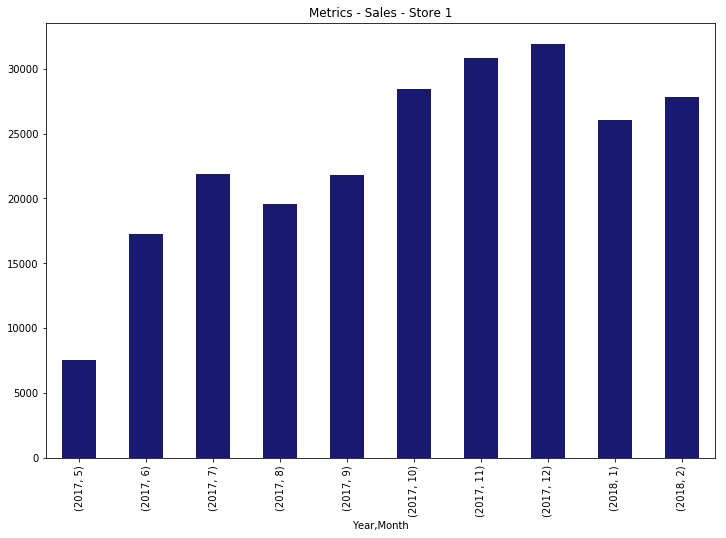

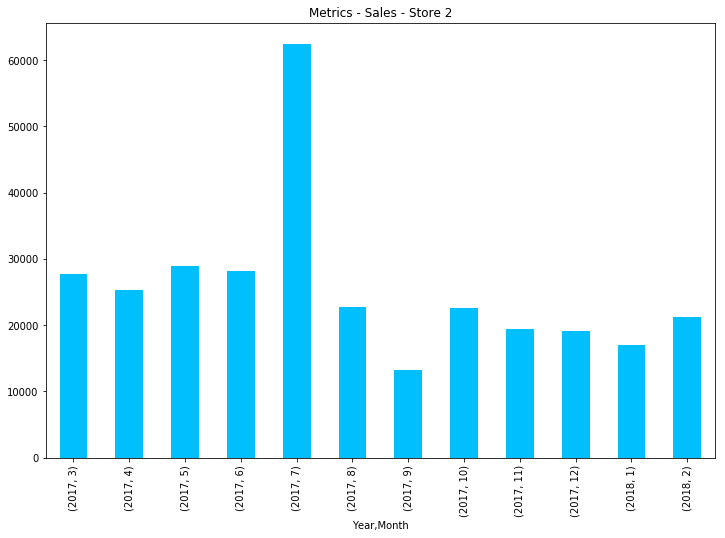

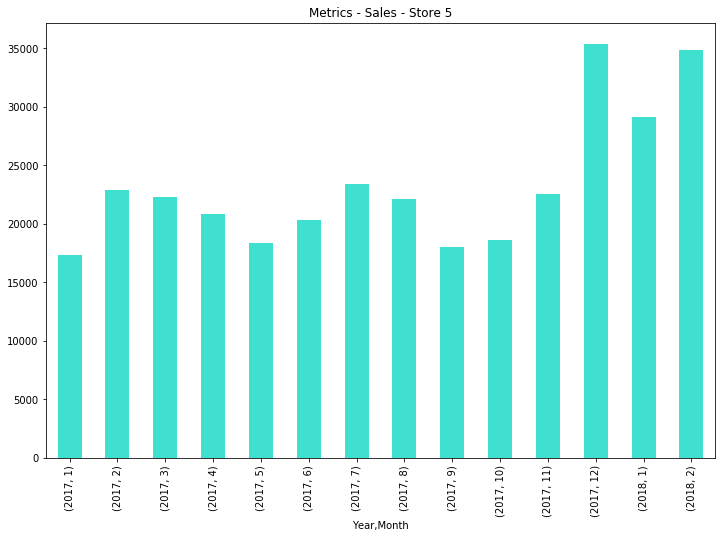

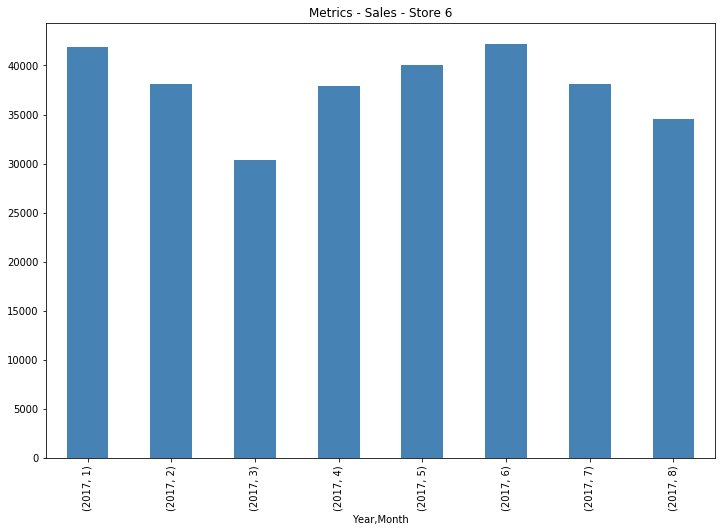

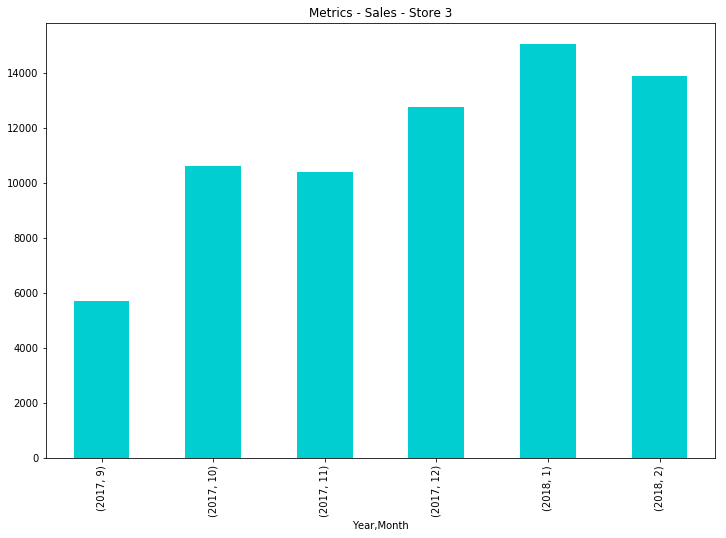

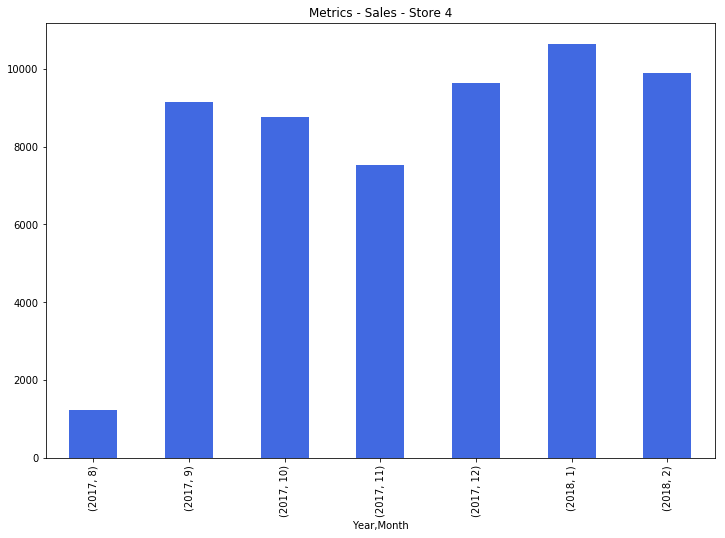

In [7]:
get_metrics_plots(data['sales_metrics'], kind='Sales')

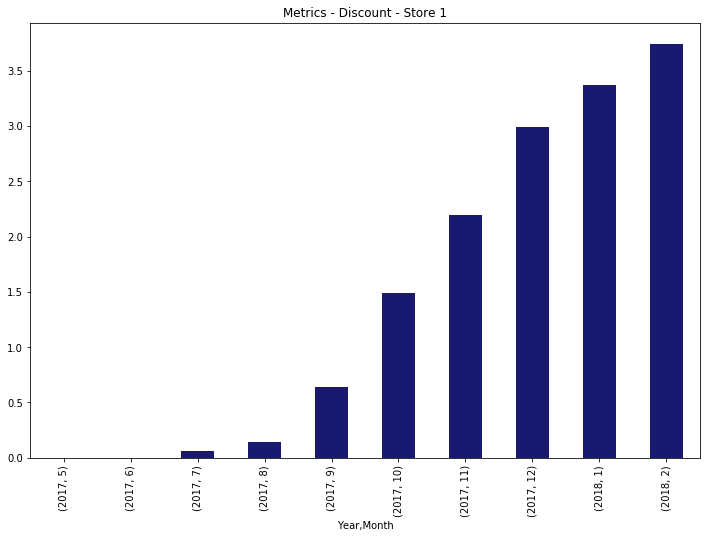

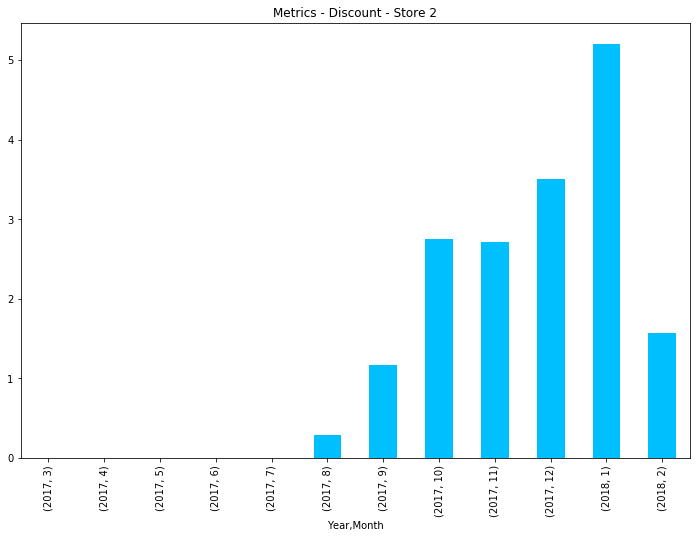

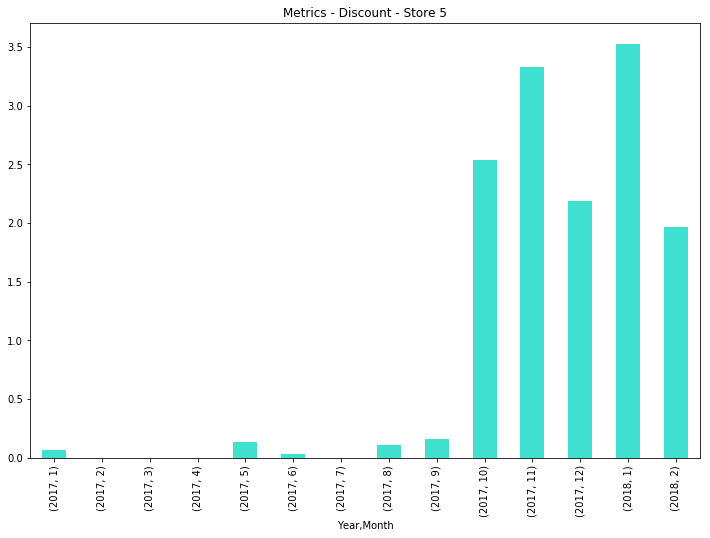

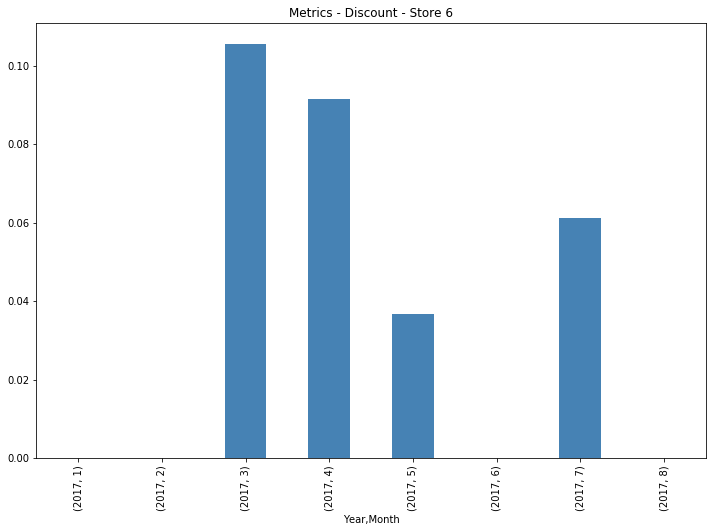

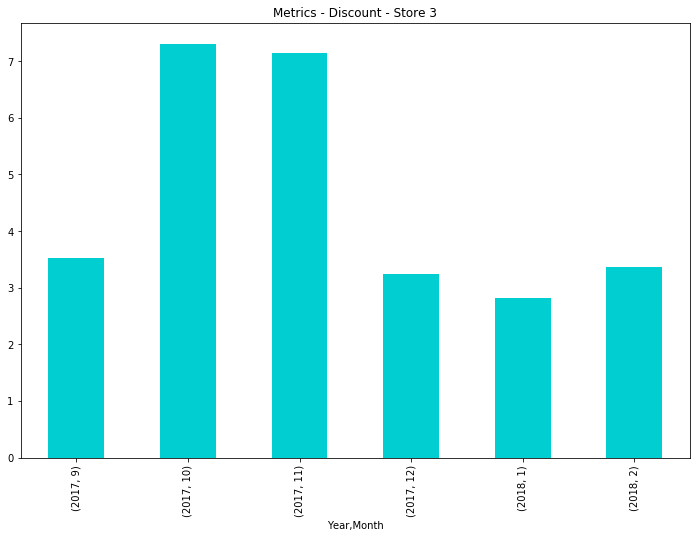

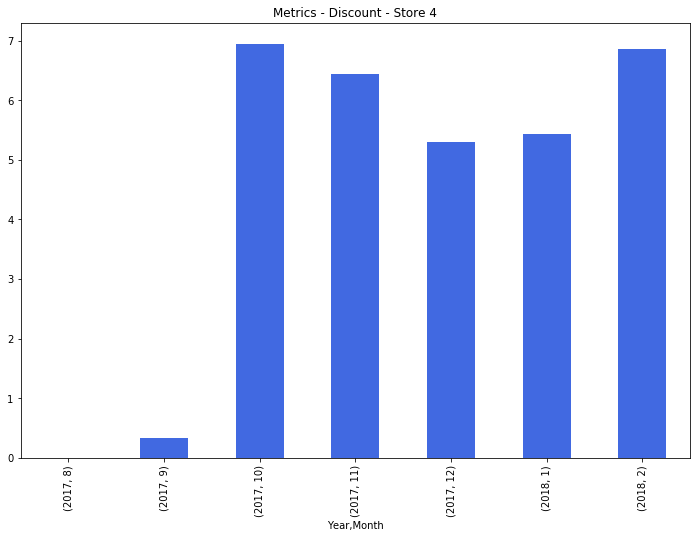

In [8]:
get_metrics_plots(data['disc_metrics'], kind='Discount')

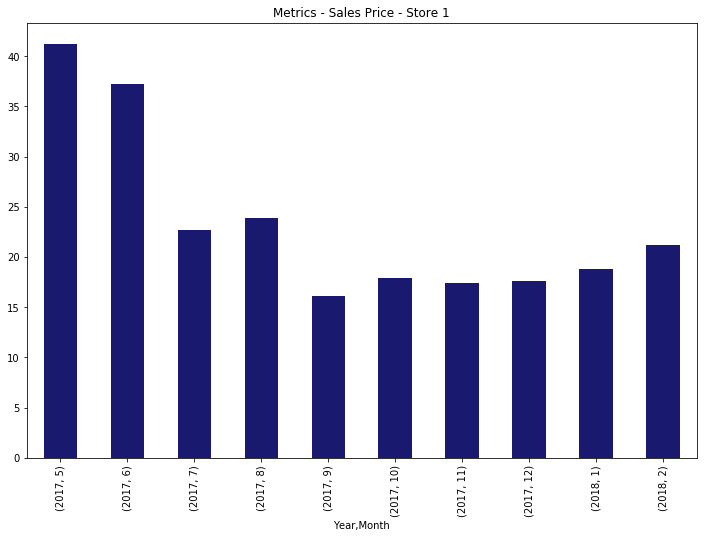

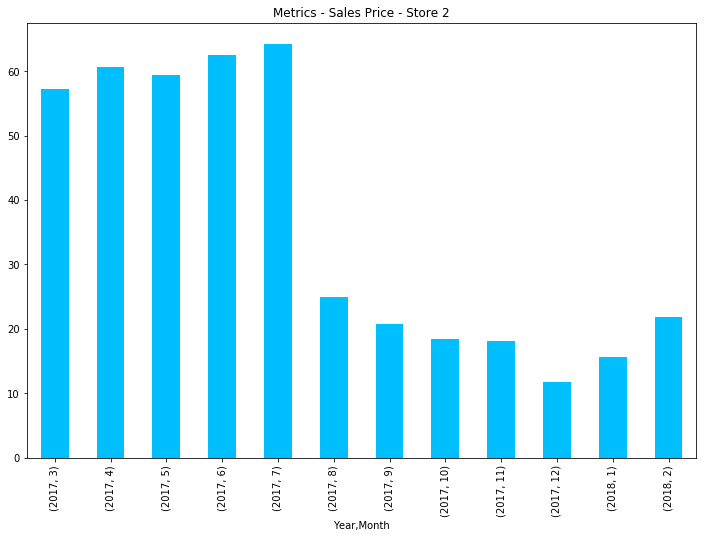

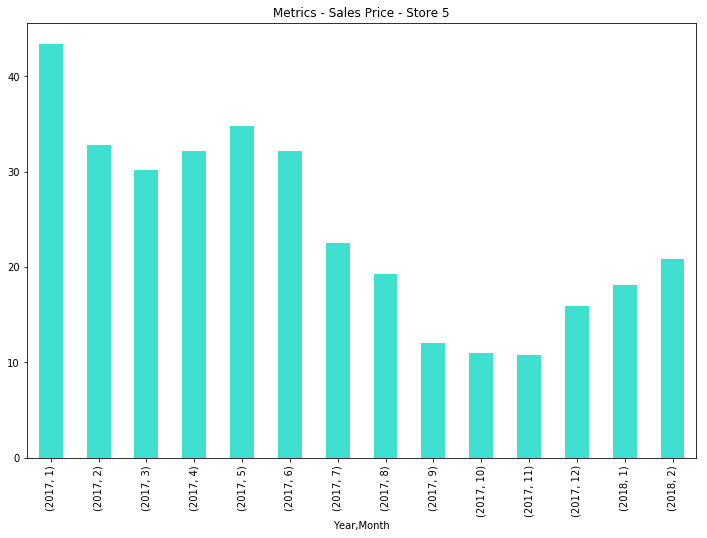

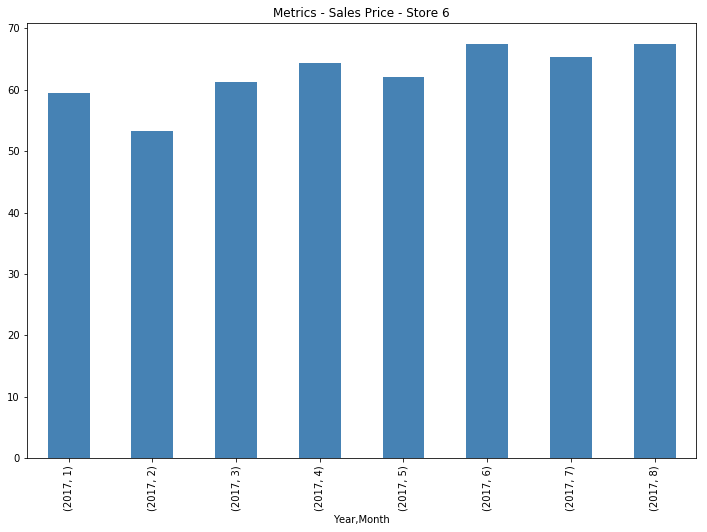

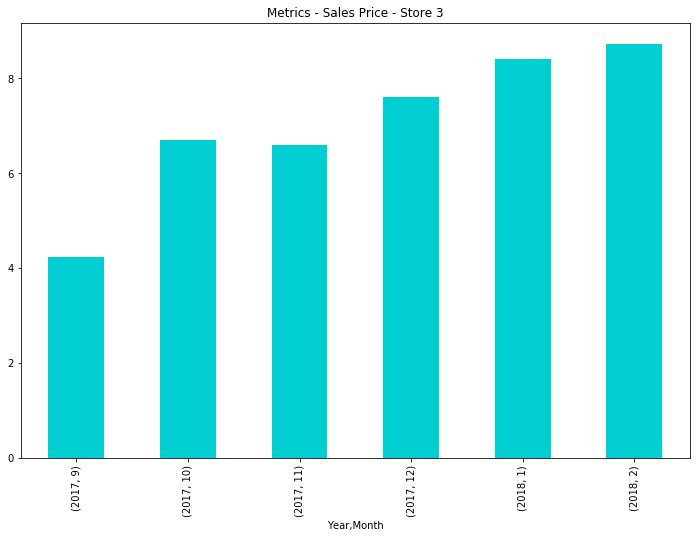

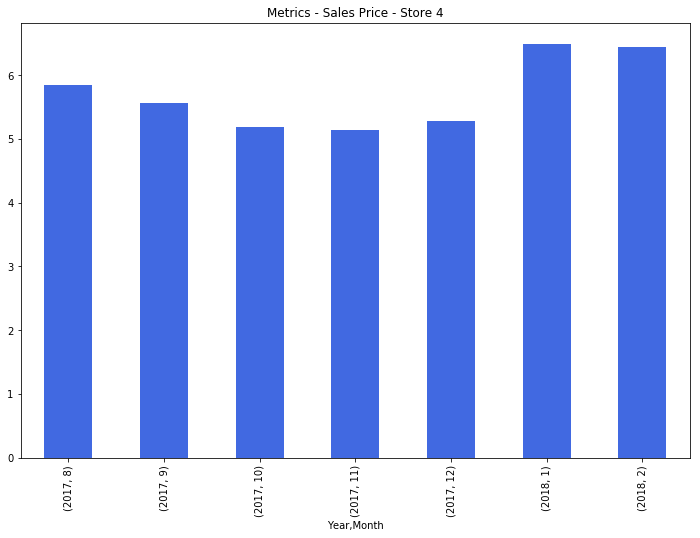

In [9]:
get_metrics_plots(data['sale_price_metrics'], kind='Sales Price')

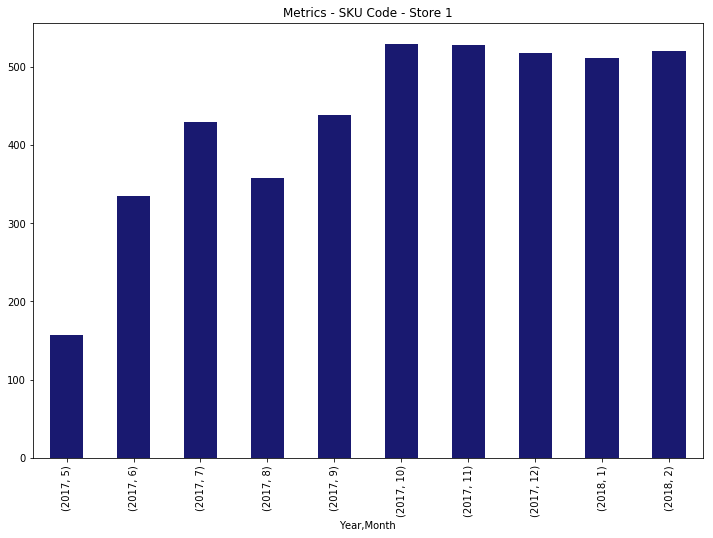

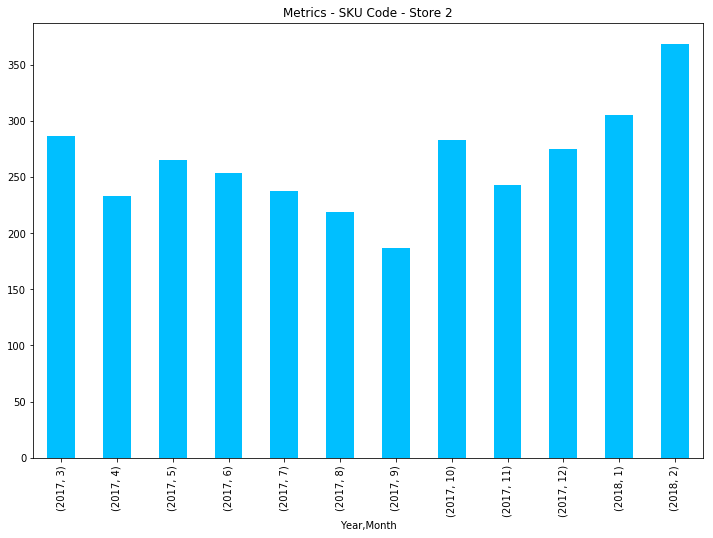

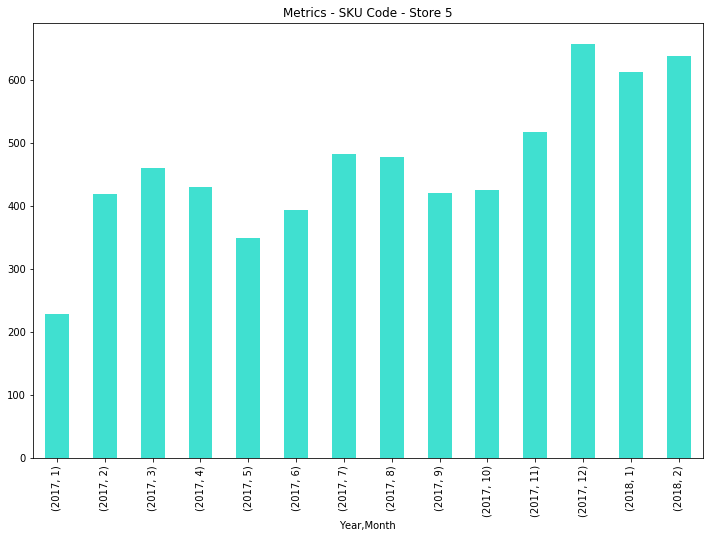

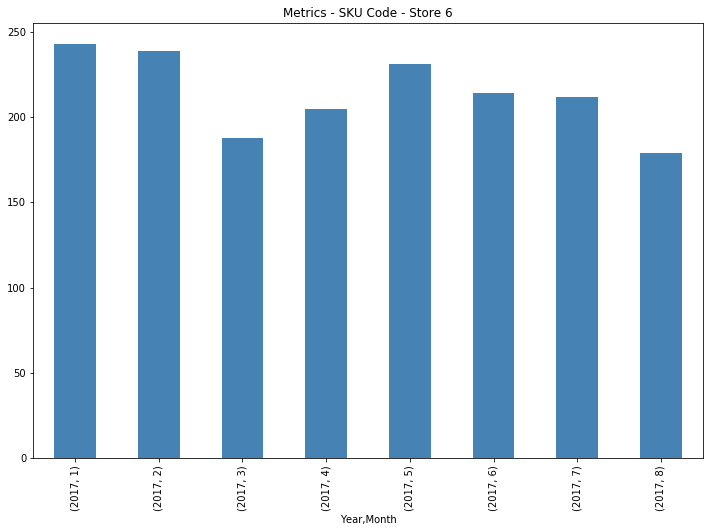

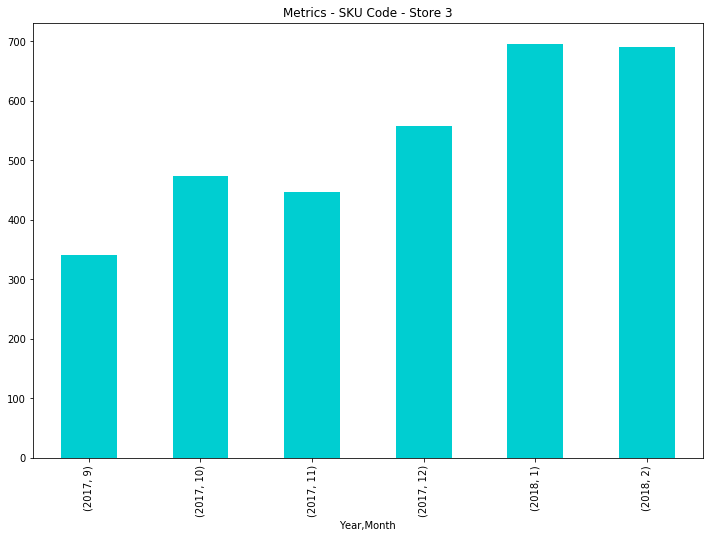

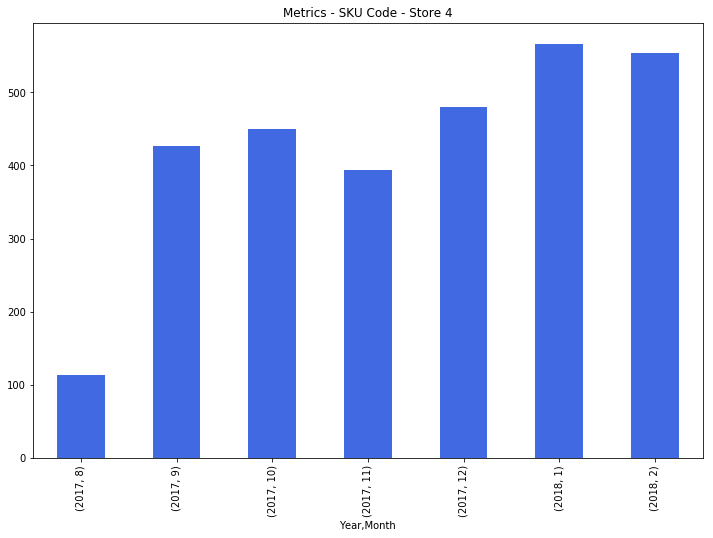

In [10]:
get_metrics_plots(data['sku_metrics'], kind='SKU Code')

In [11]:
def get_category_or_brand_wise_metrics_per_month_plots(metrics_df_dict, plot_kind='Category', df_kind='Sales'):
    kind_dir = 'brand' if plot_kind == 'Brand Code' else 'category'
    plot_kind_dir = os.path.join(plots_dir,df_kind.replace(' ', '_')+'_deep_dive',kind_dir)
    if not os.path.exists(plot_kind_dir):
        os.makedirs(plot_kind_dir)
    for c,store in enumerate(metrics_df_dict):
        if df_kind == 'Sales' or 'Discount':
            df = metrics_df_dict[store].groupby([plot_kind, 'Year', 'Month'])[df_kind].sum().reset_index()
        elif df_kind == 'Sales Price':
            df = metrics_df_dict[store].groupby([plot_kind, 'Year', 'Month'])[df_kind].mean().reset_index()
        elif df_kind == 'SKU Code':
            df = metrics_df_dict[store].groupby([plot_kind, 'Year', 'Month'])[df_kind].nunique().reset_index()
        years = np.unique(df['Year'].values)
        months = np.unique(df['Month'].values)
        plotting_dfs = {}
        for year in years:
            for month in months:
                plot_df = df[df['Year'] == year]
                plot_df =  plot_df[plot_df['Month'] == month]
                plot_df.drop(['Month', 'Year'], axis=1, inplace=True)
                if not plot_df.empty:
                    plot_df.set_index(plot_kind, inplace=True)
                    plotting_dfs[str(month)+'/'+str(year)] = plot_df
        i = 0
        j = 0
        columns = 3
        nb_plots = len(plotting_dfs)
        rows = int(nb_plots/columns) if nb_plots % columns == 0 else int(nb_plots/columns) + 1
        fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(12*columns,8*rows))        
        for p,month in enumerate(plotting_dfs):
            plot_df = plotting_dfs[month]
            title = store + ' ' + plot_kind + ' Wise ' + df_kind + ' - ' + month
            plot_df.plot(kind='bar', 
                         ax=axes[i,j],
                         title=title,
                         color=colors[c])
            if j < columns - 1:
                j += 1
            elif j == columns - 1:
                j = 0
                i += 1 
        store_name = 'store_' + store.split(' ')[-1]
        file_name = store_name + '.png'
        fig.savefig(os.path.join(plot_kind_dir, file_name))

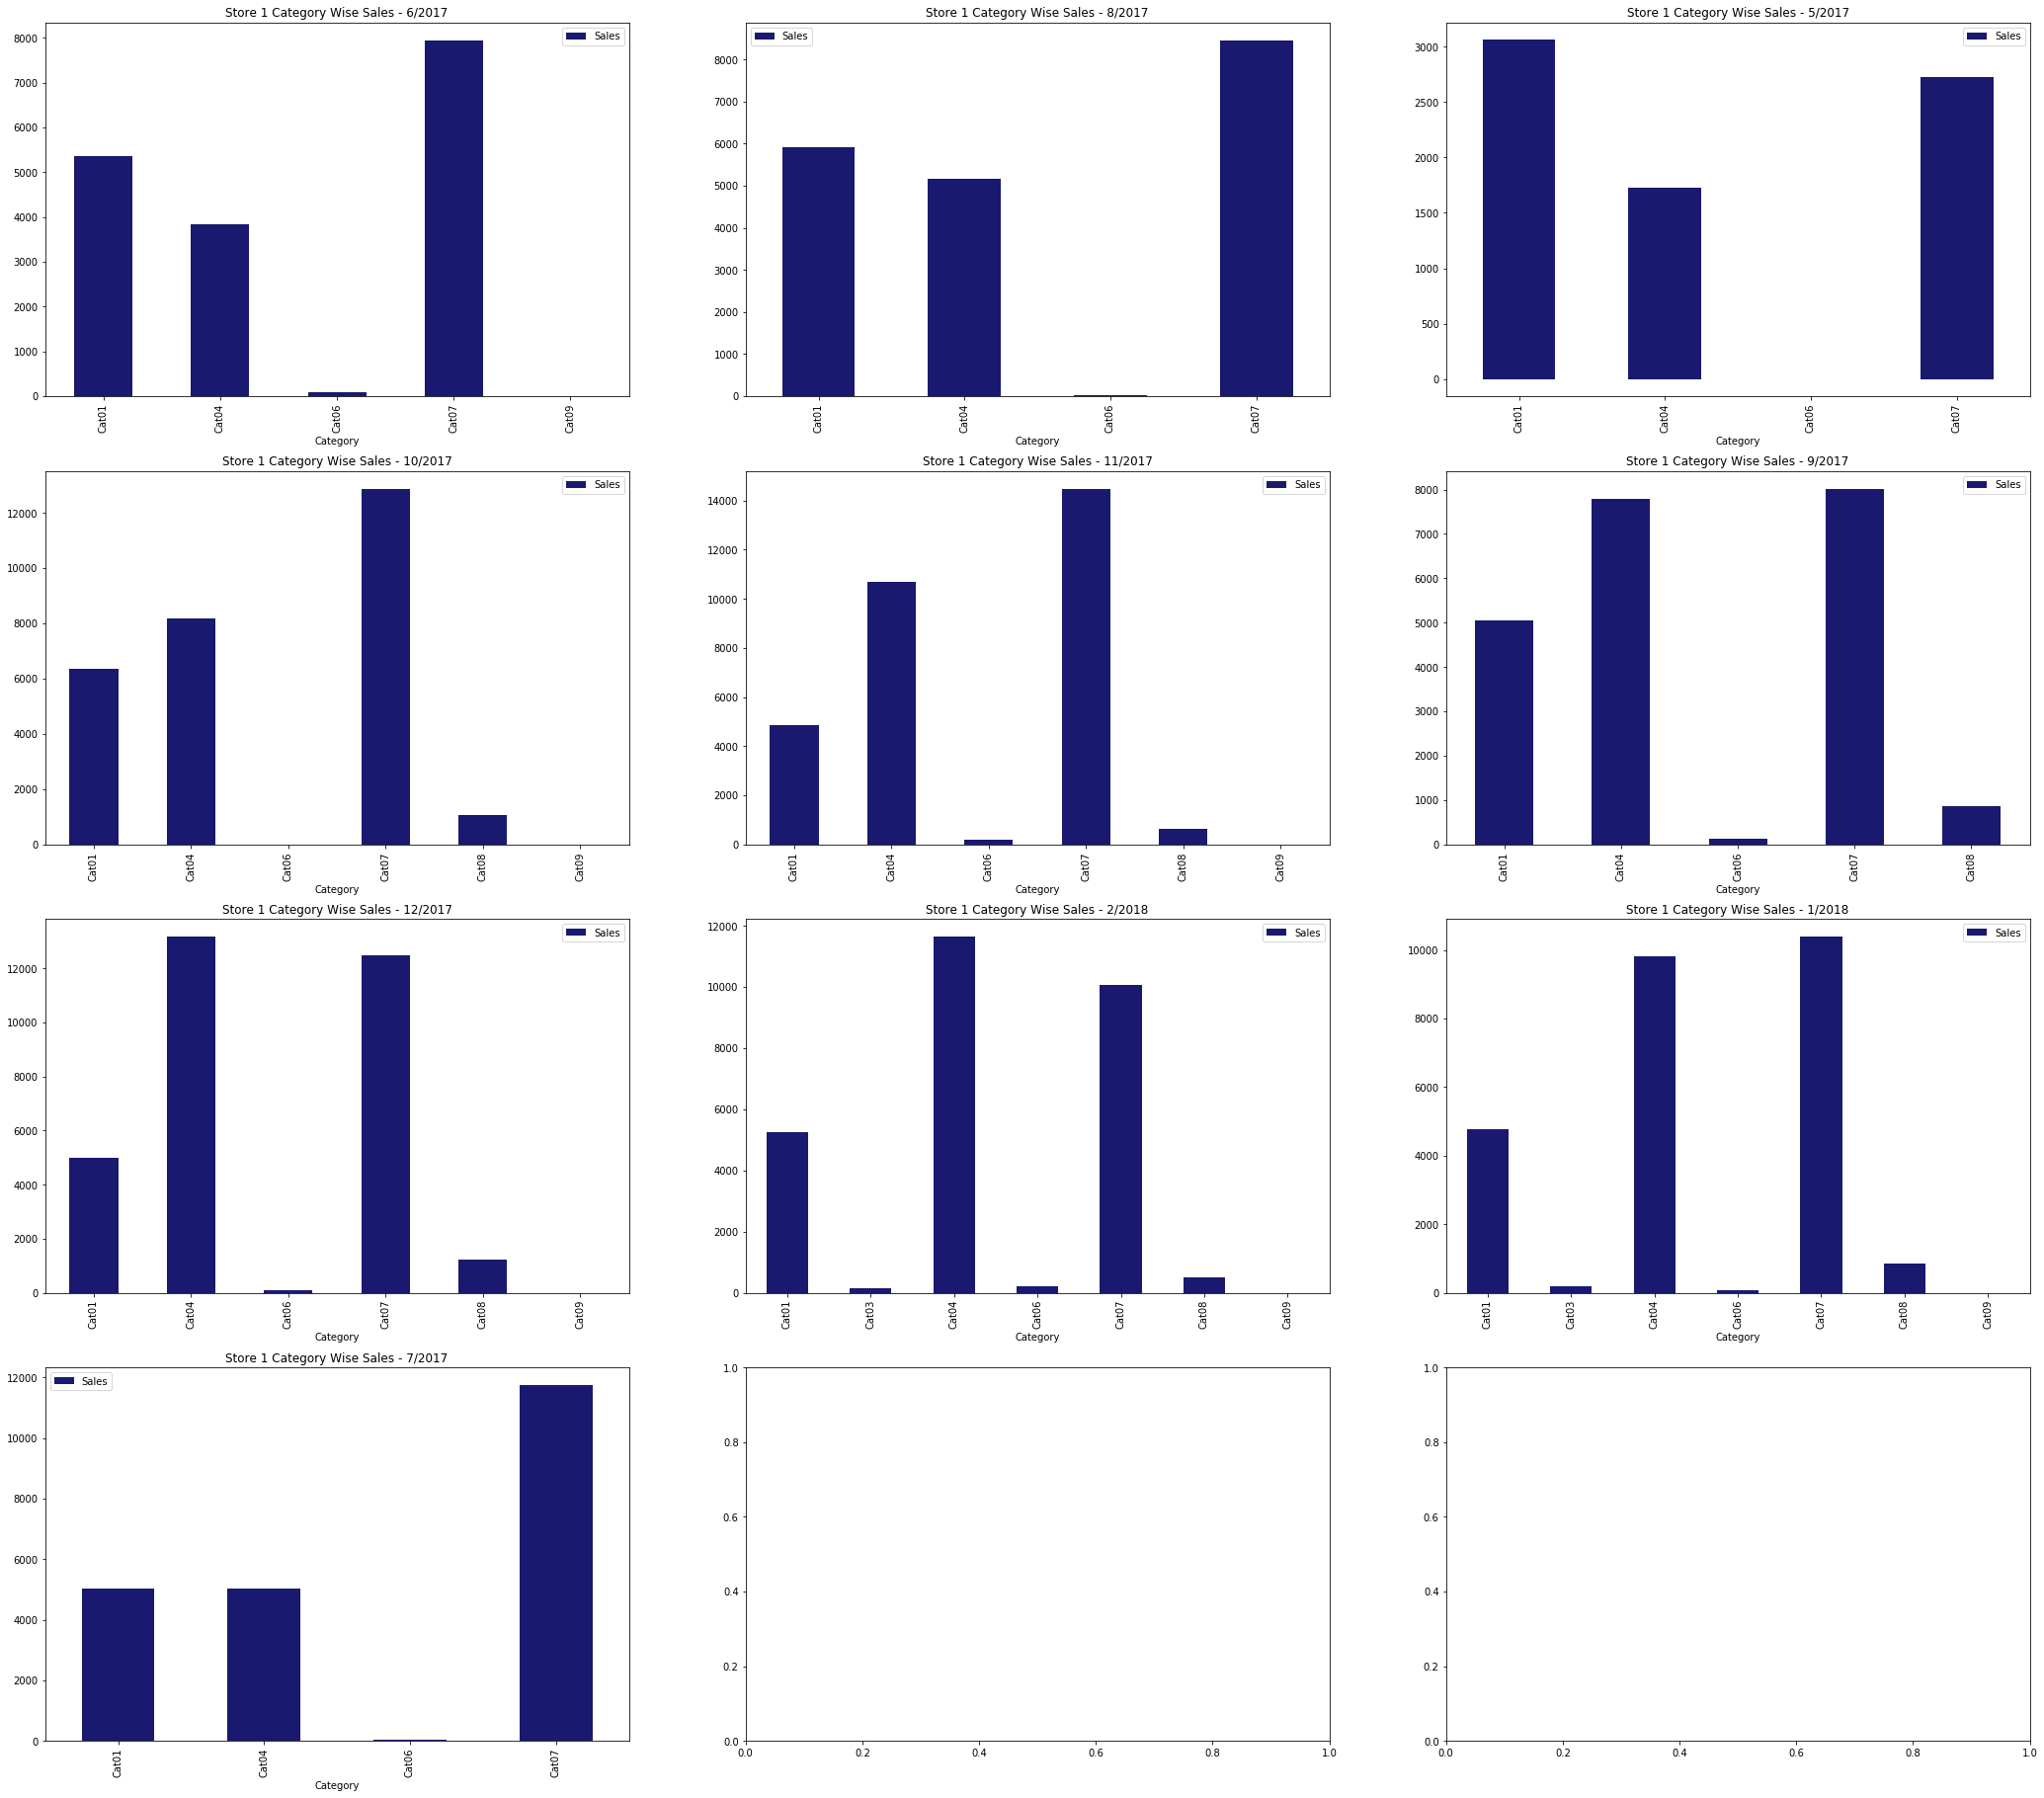

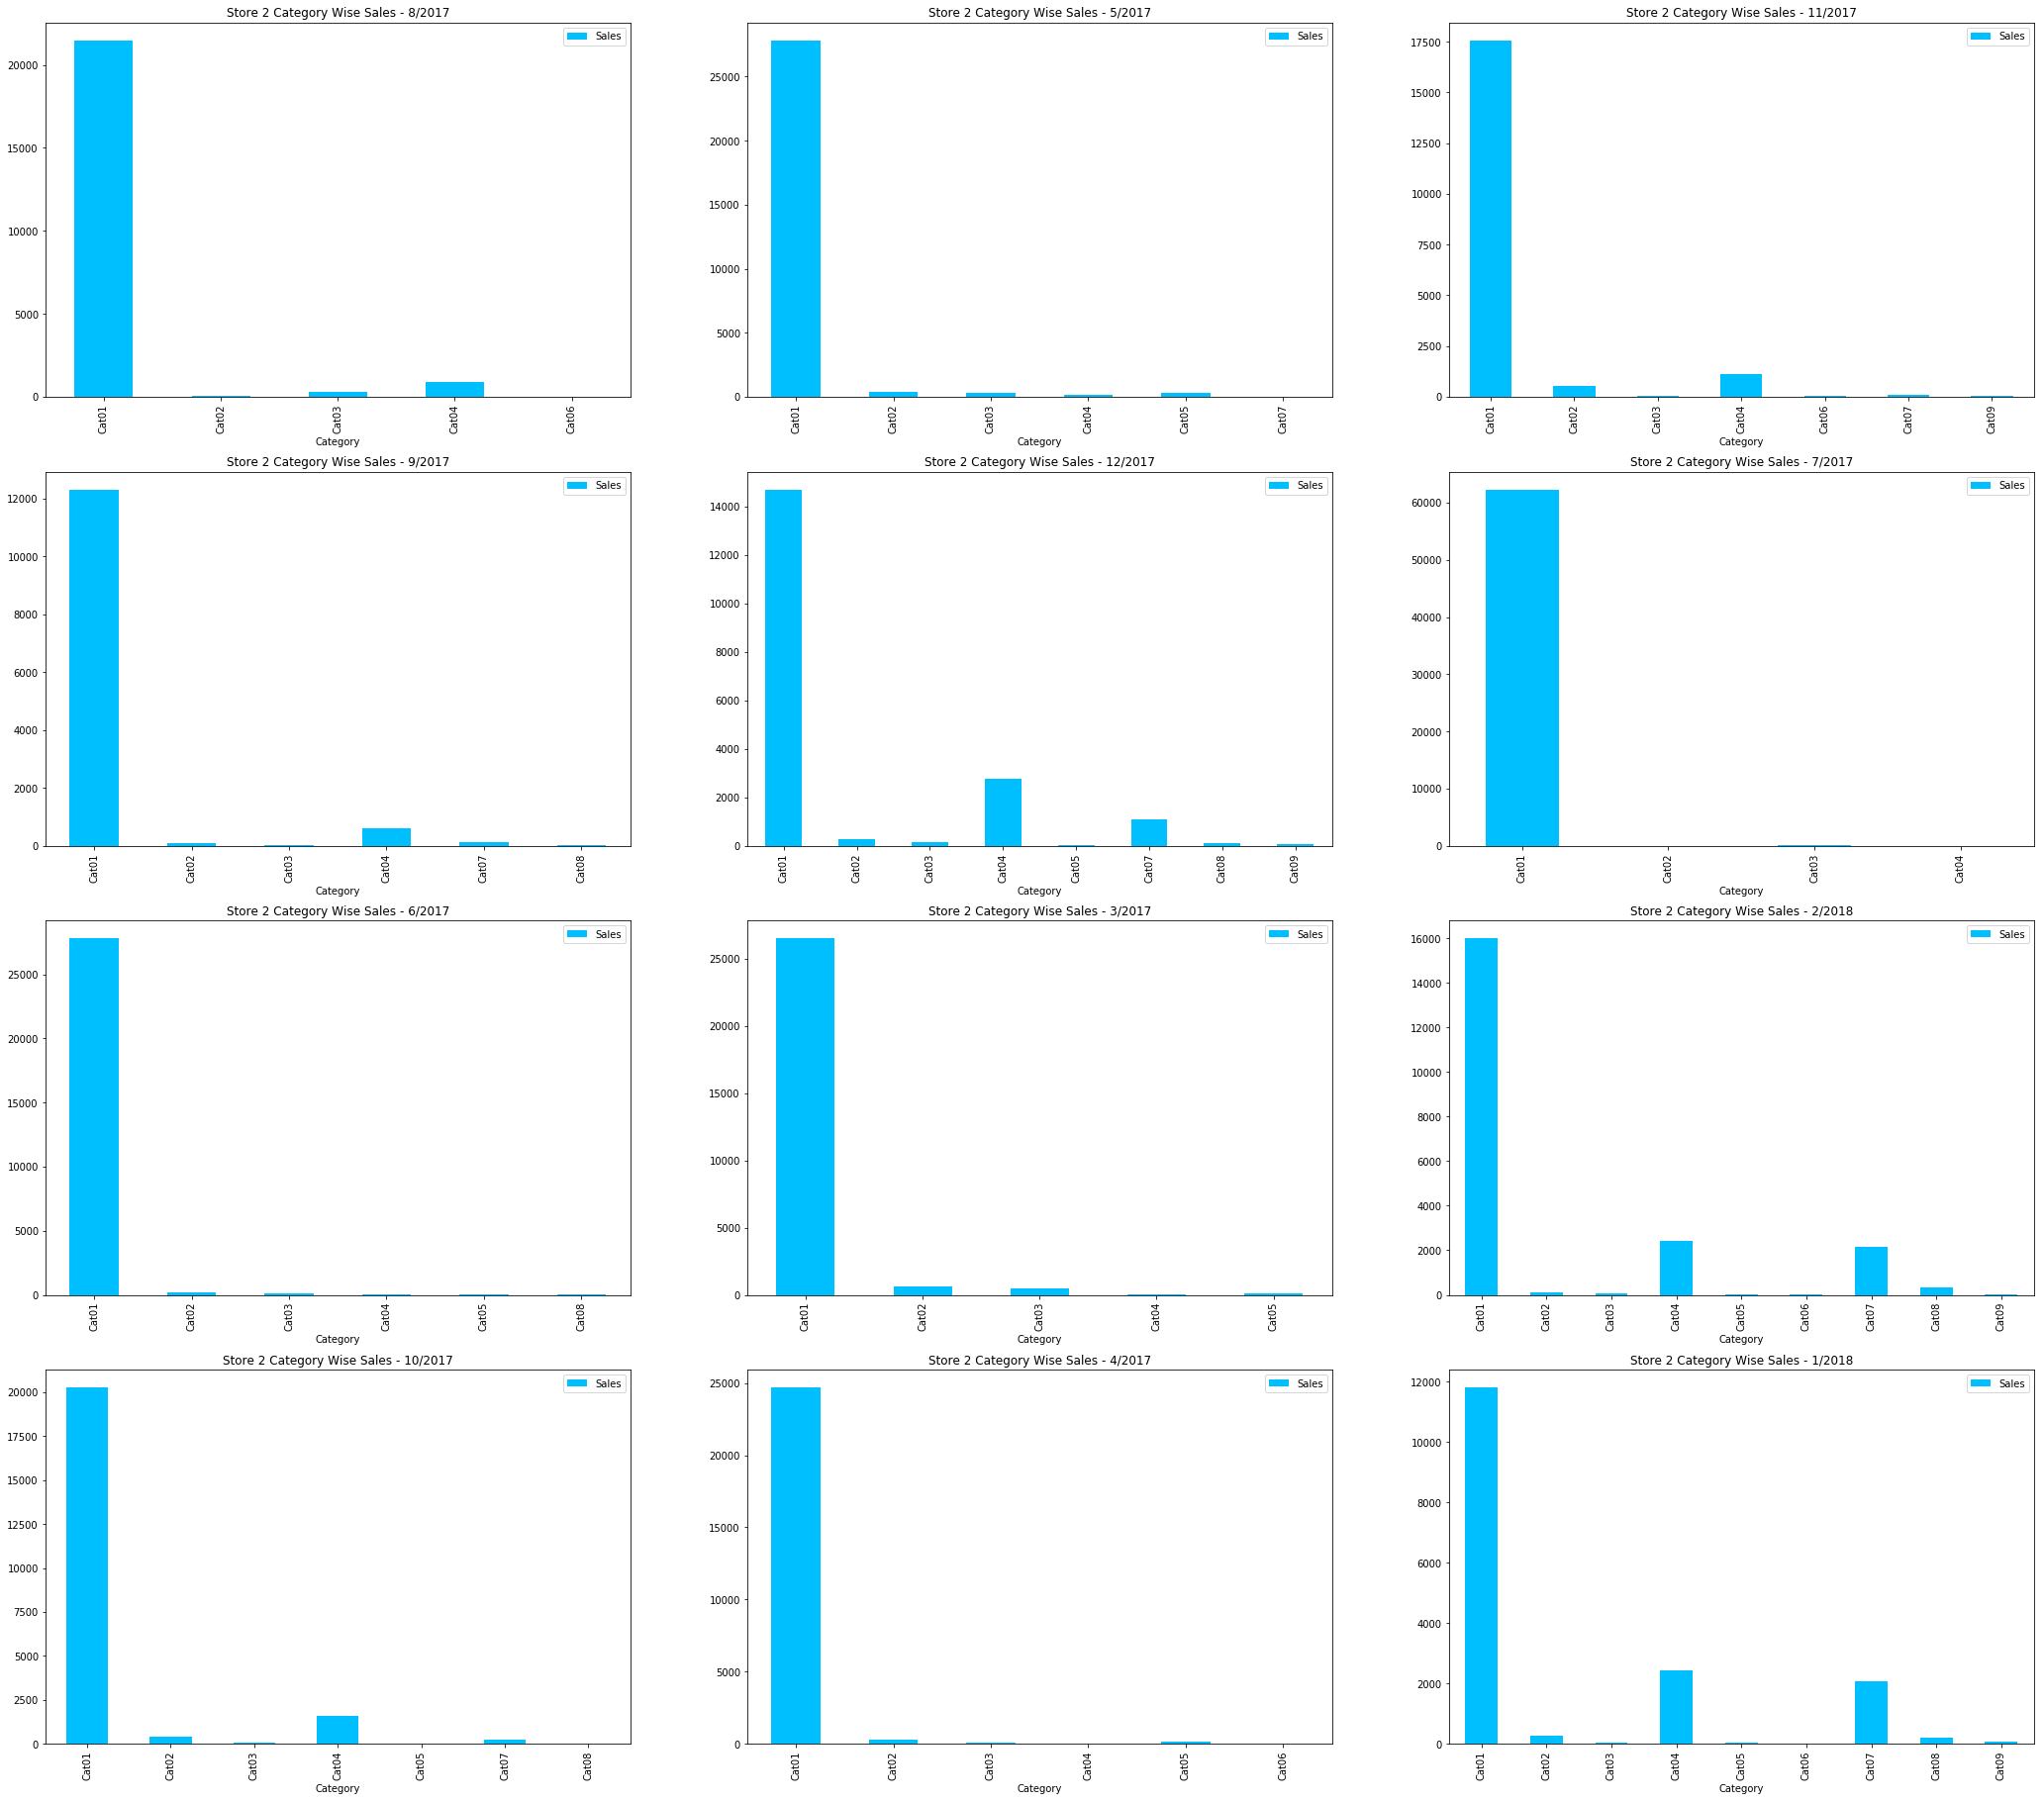

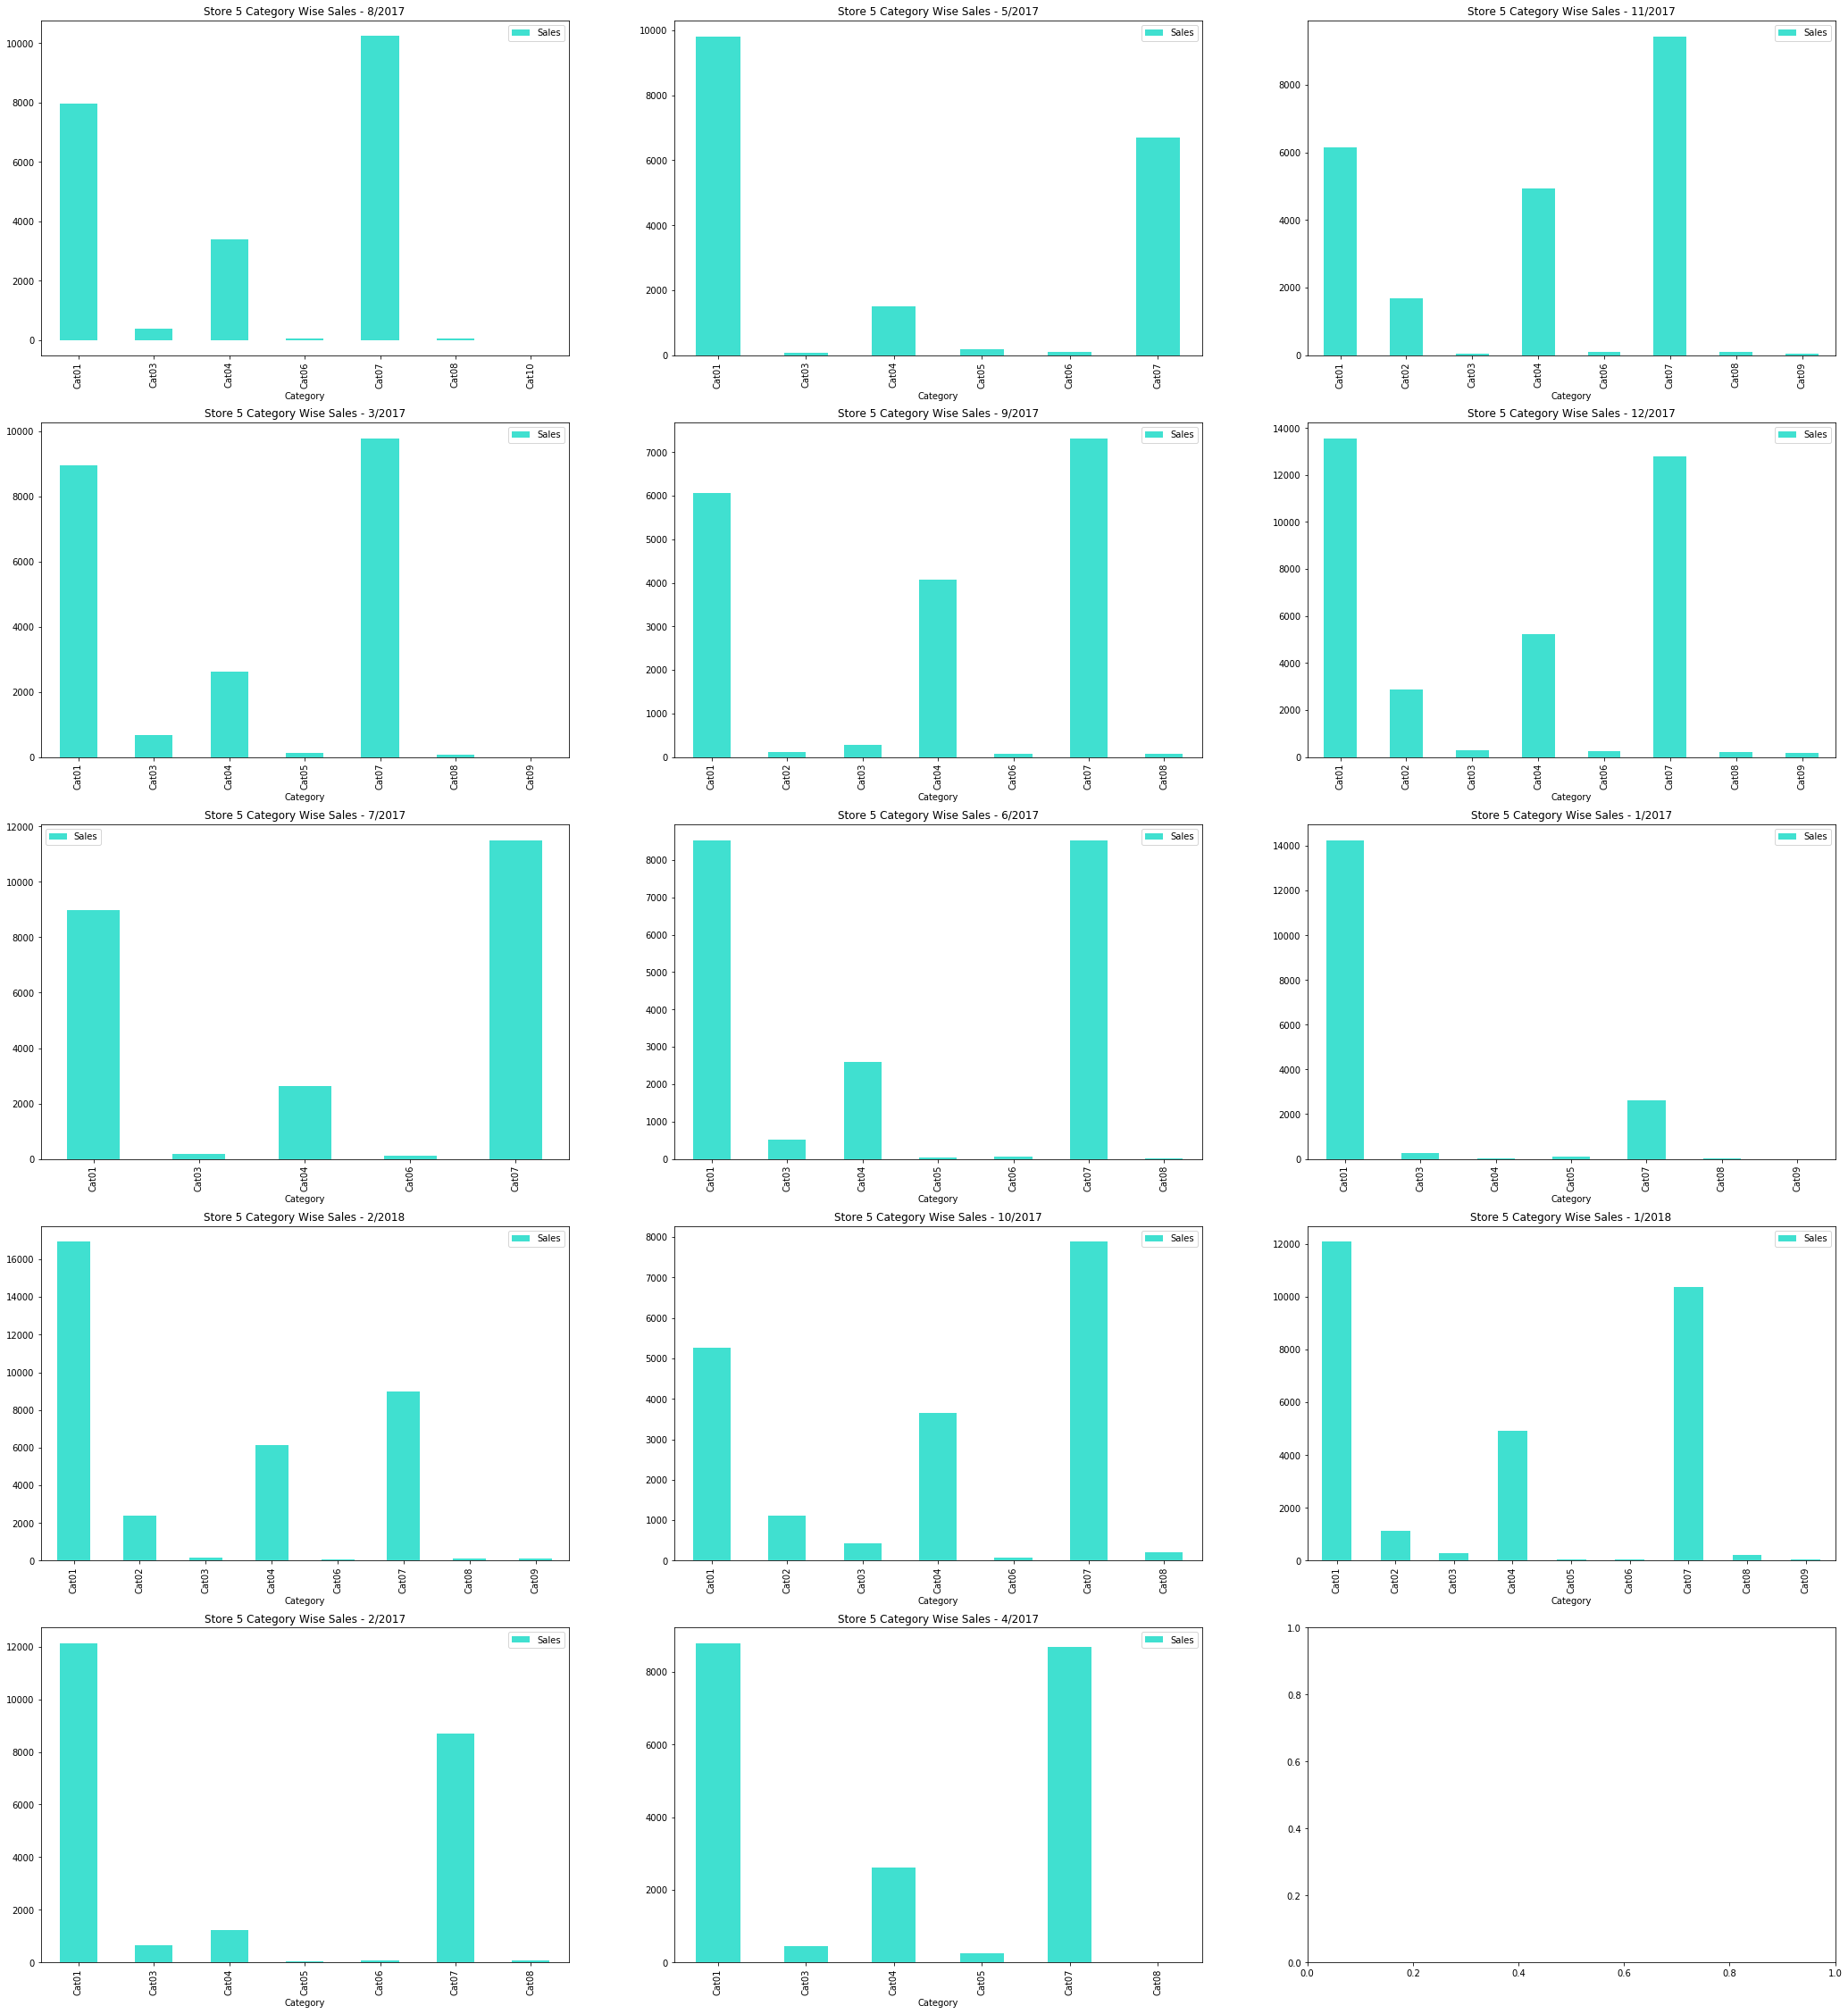

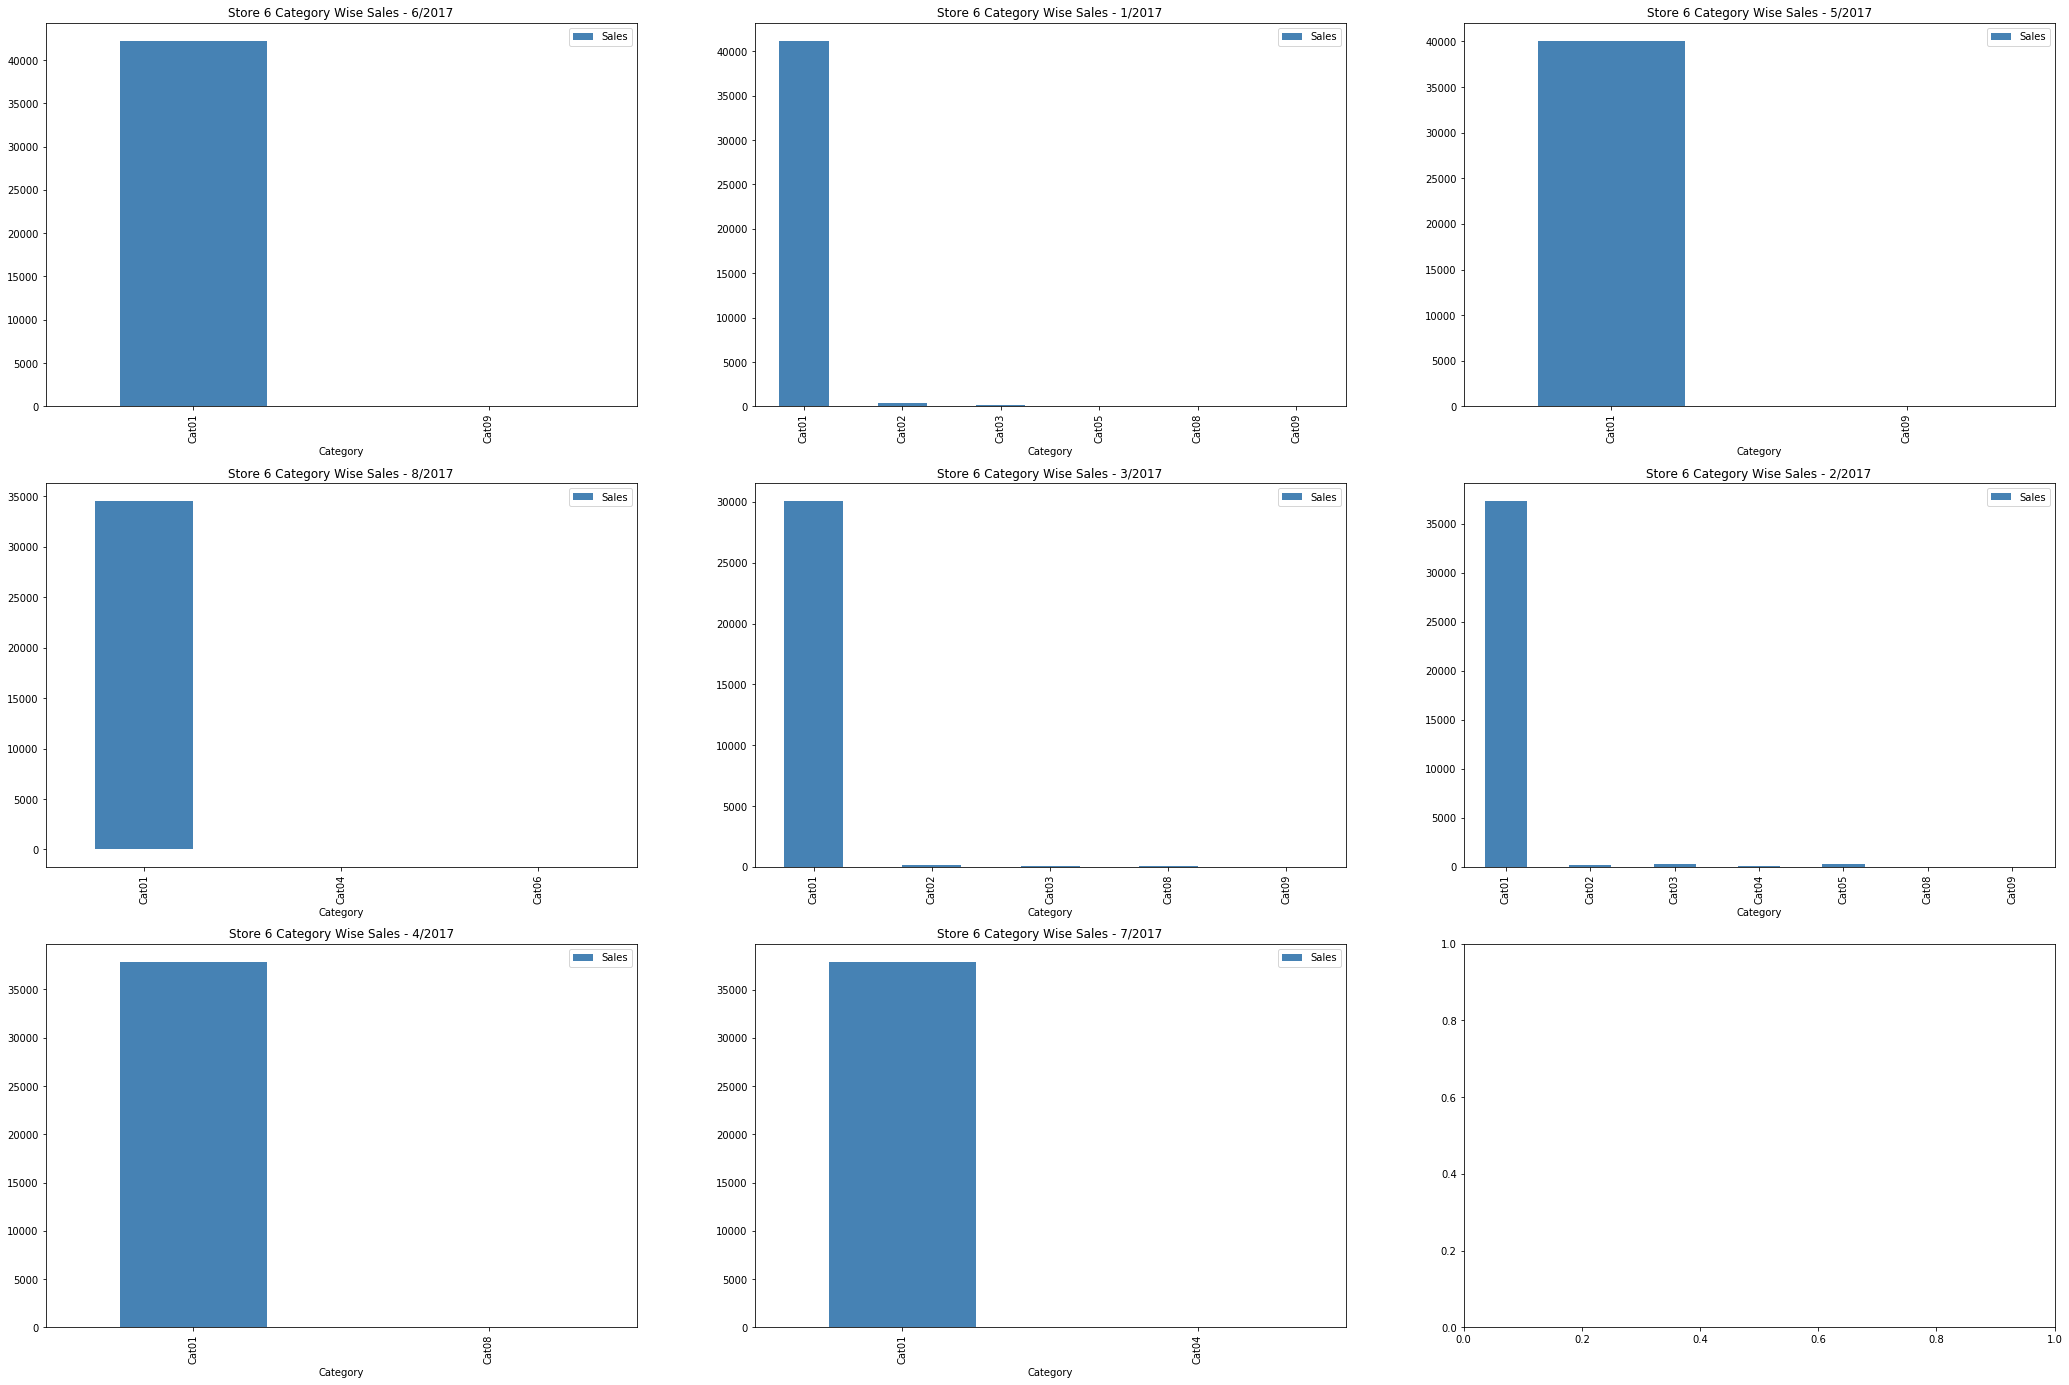

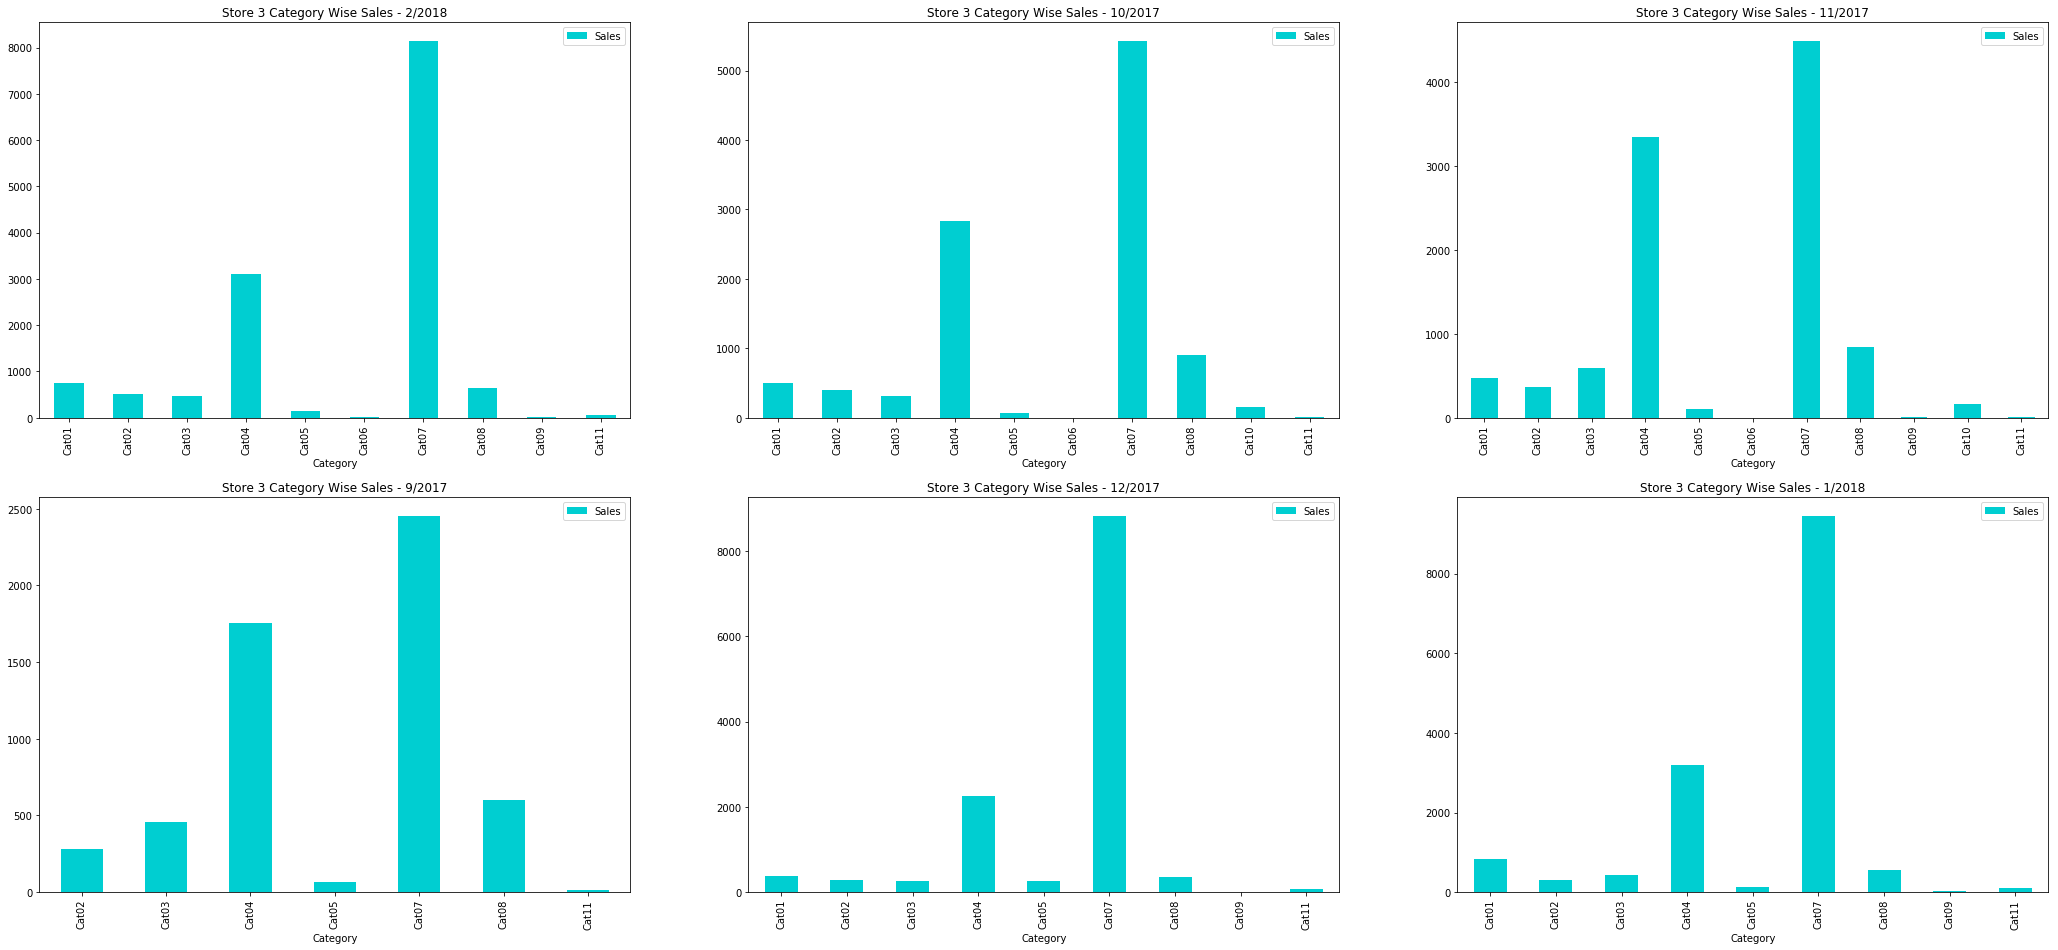

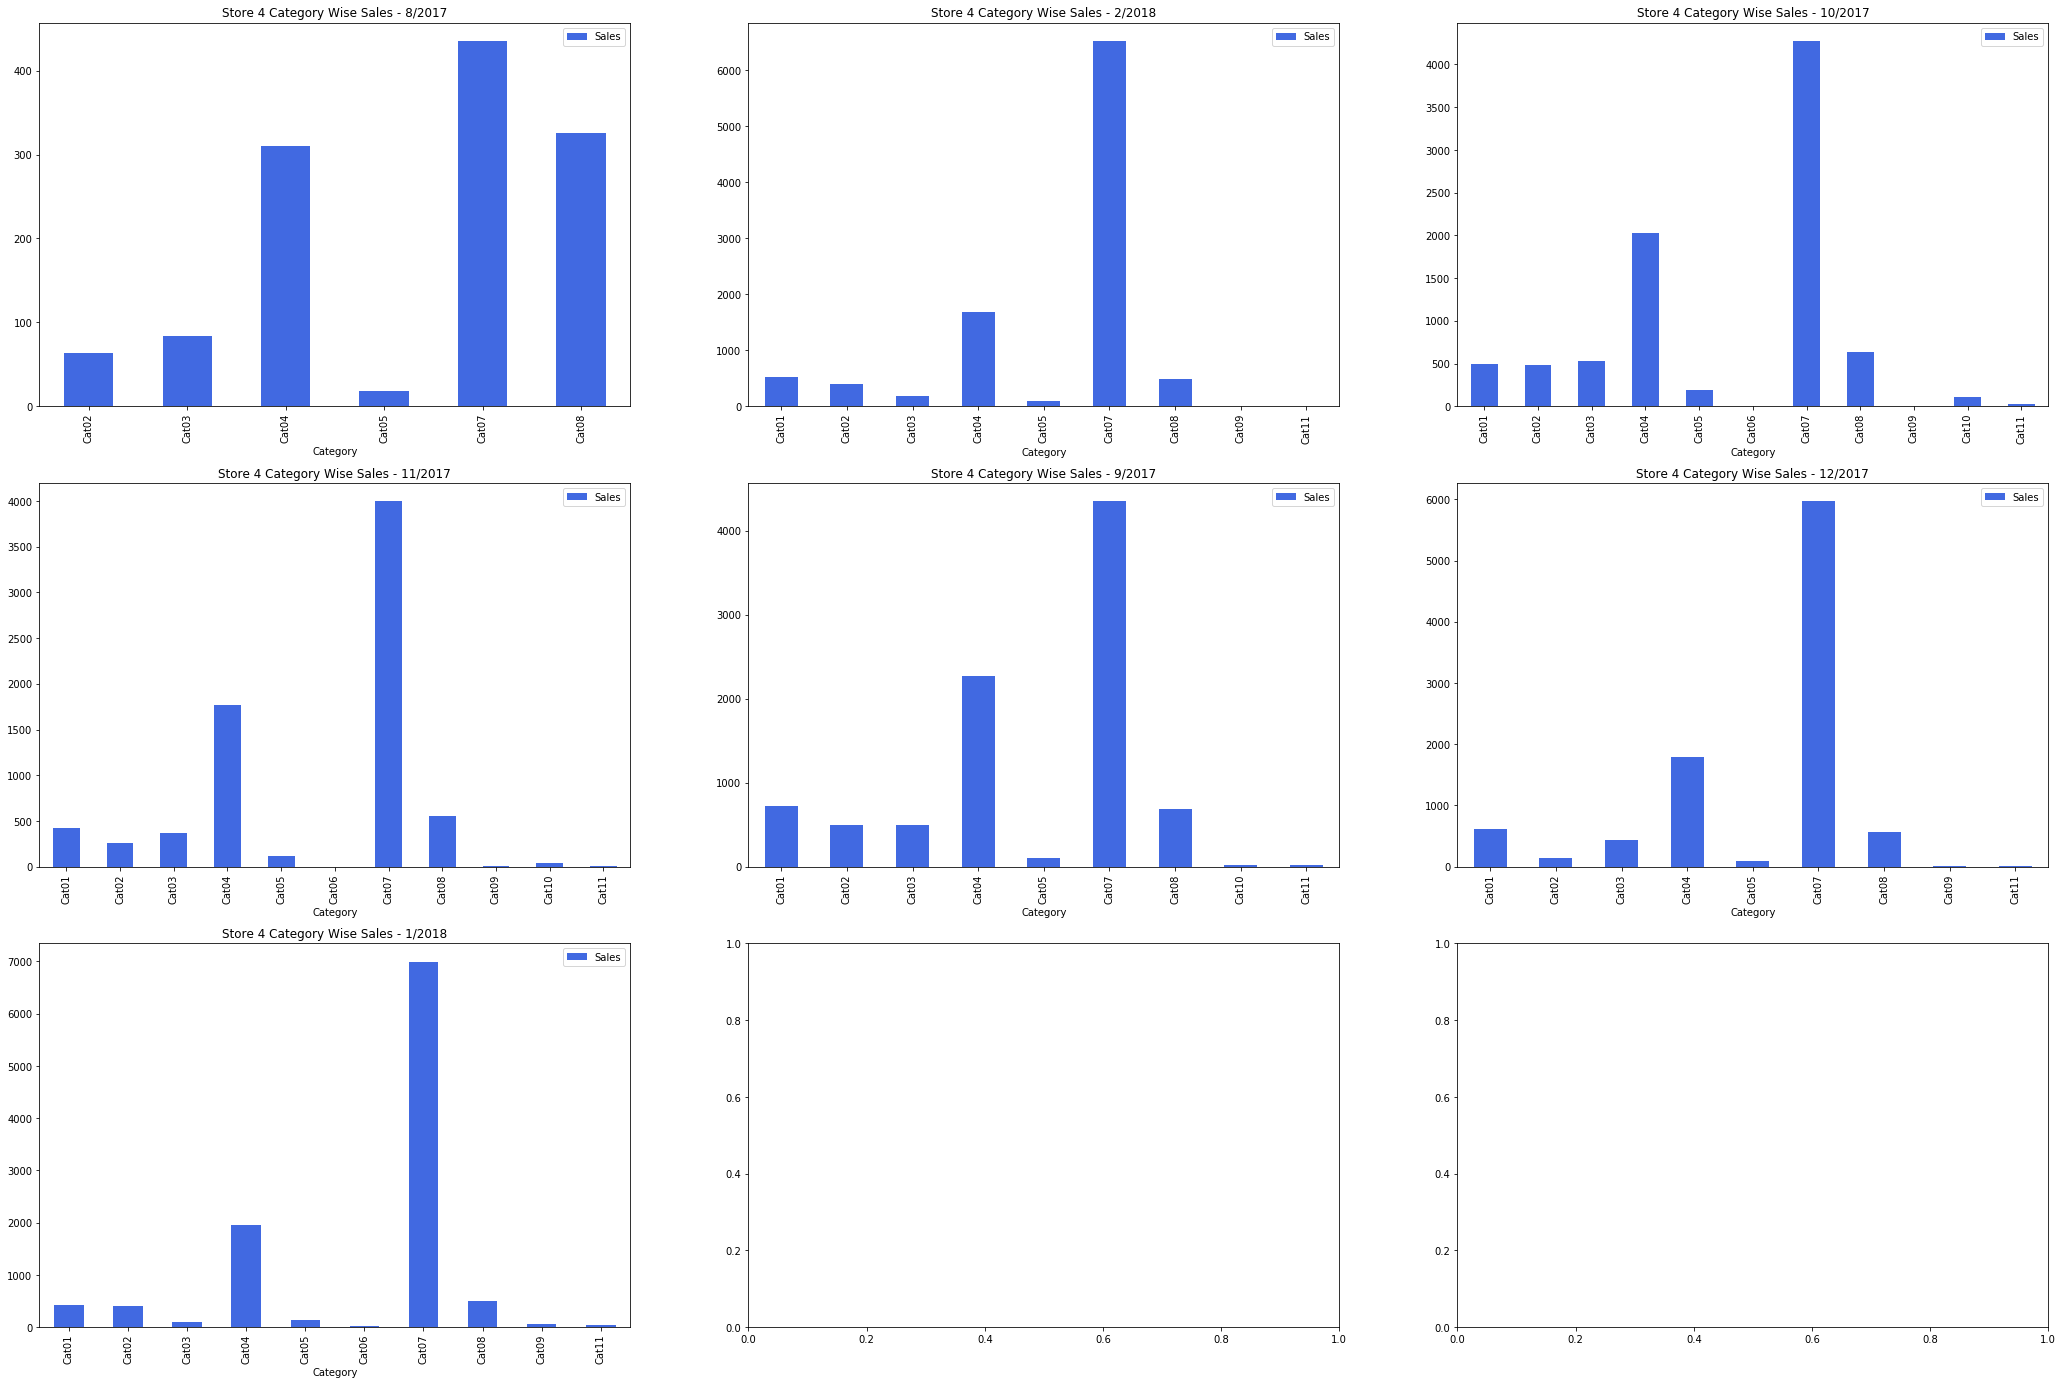

In [12]:
get_category_or_brand_wise_metrics_per_month_plots(data['sales_metrics_deep'])

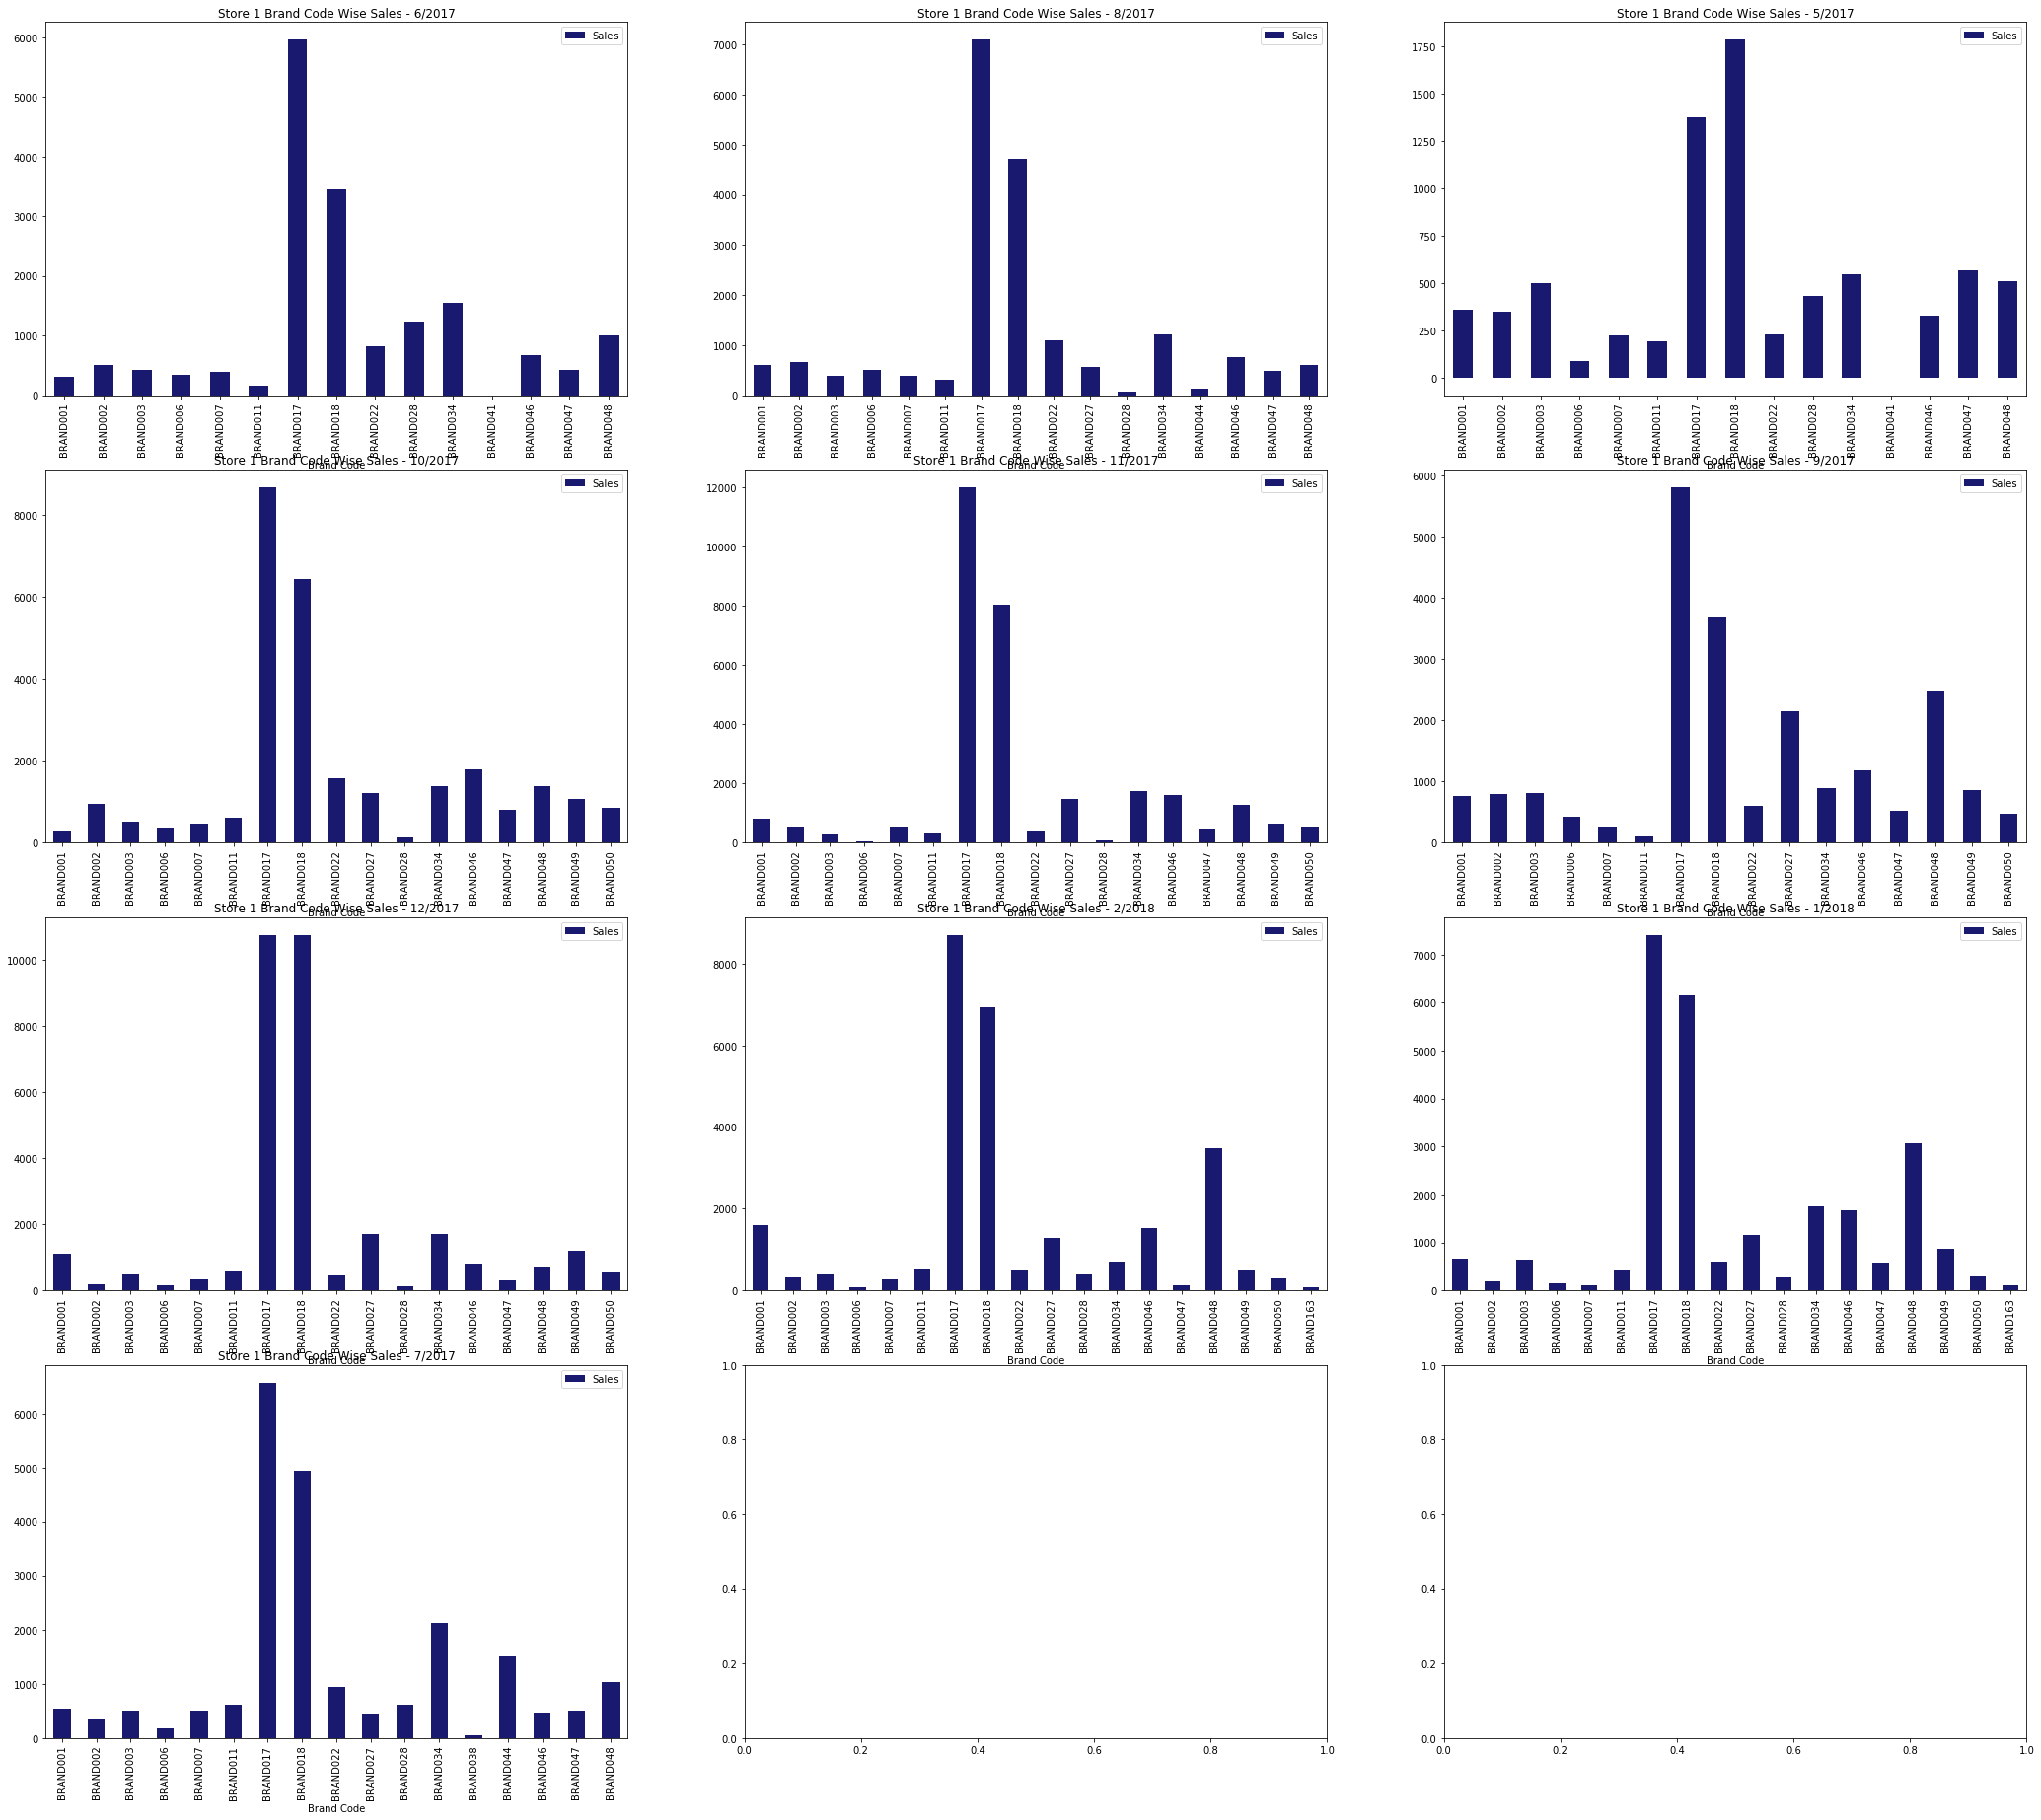

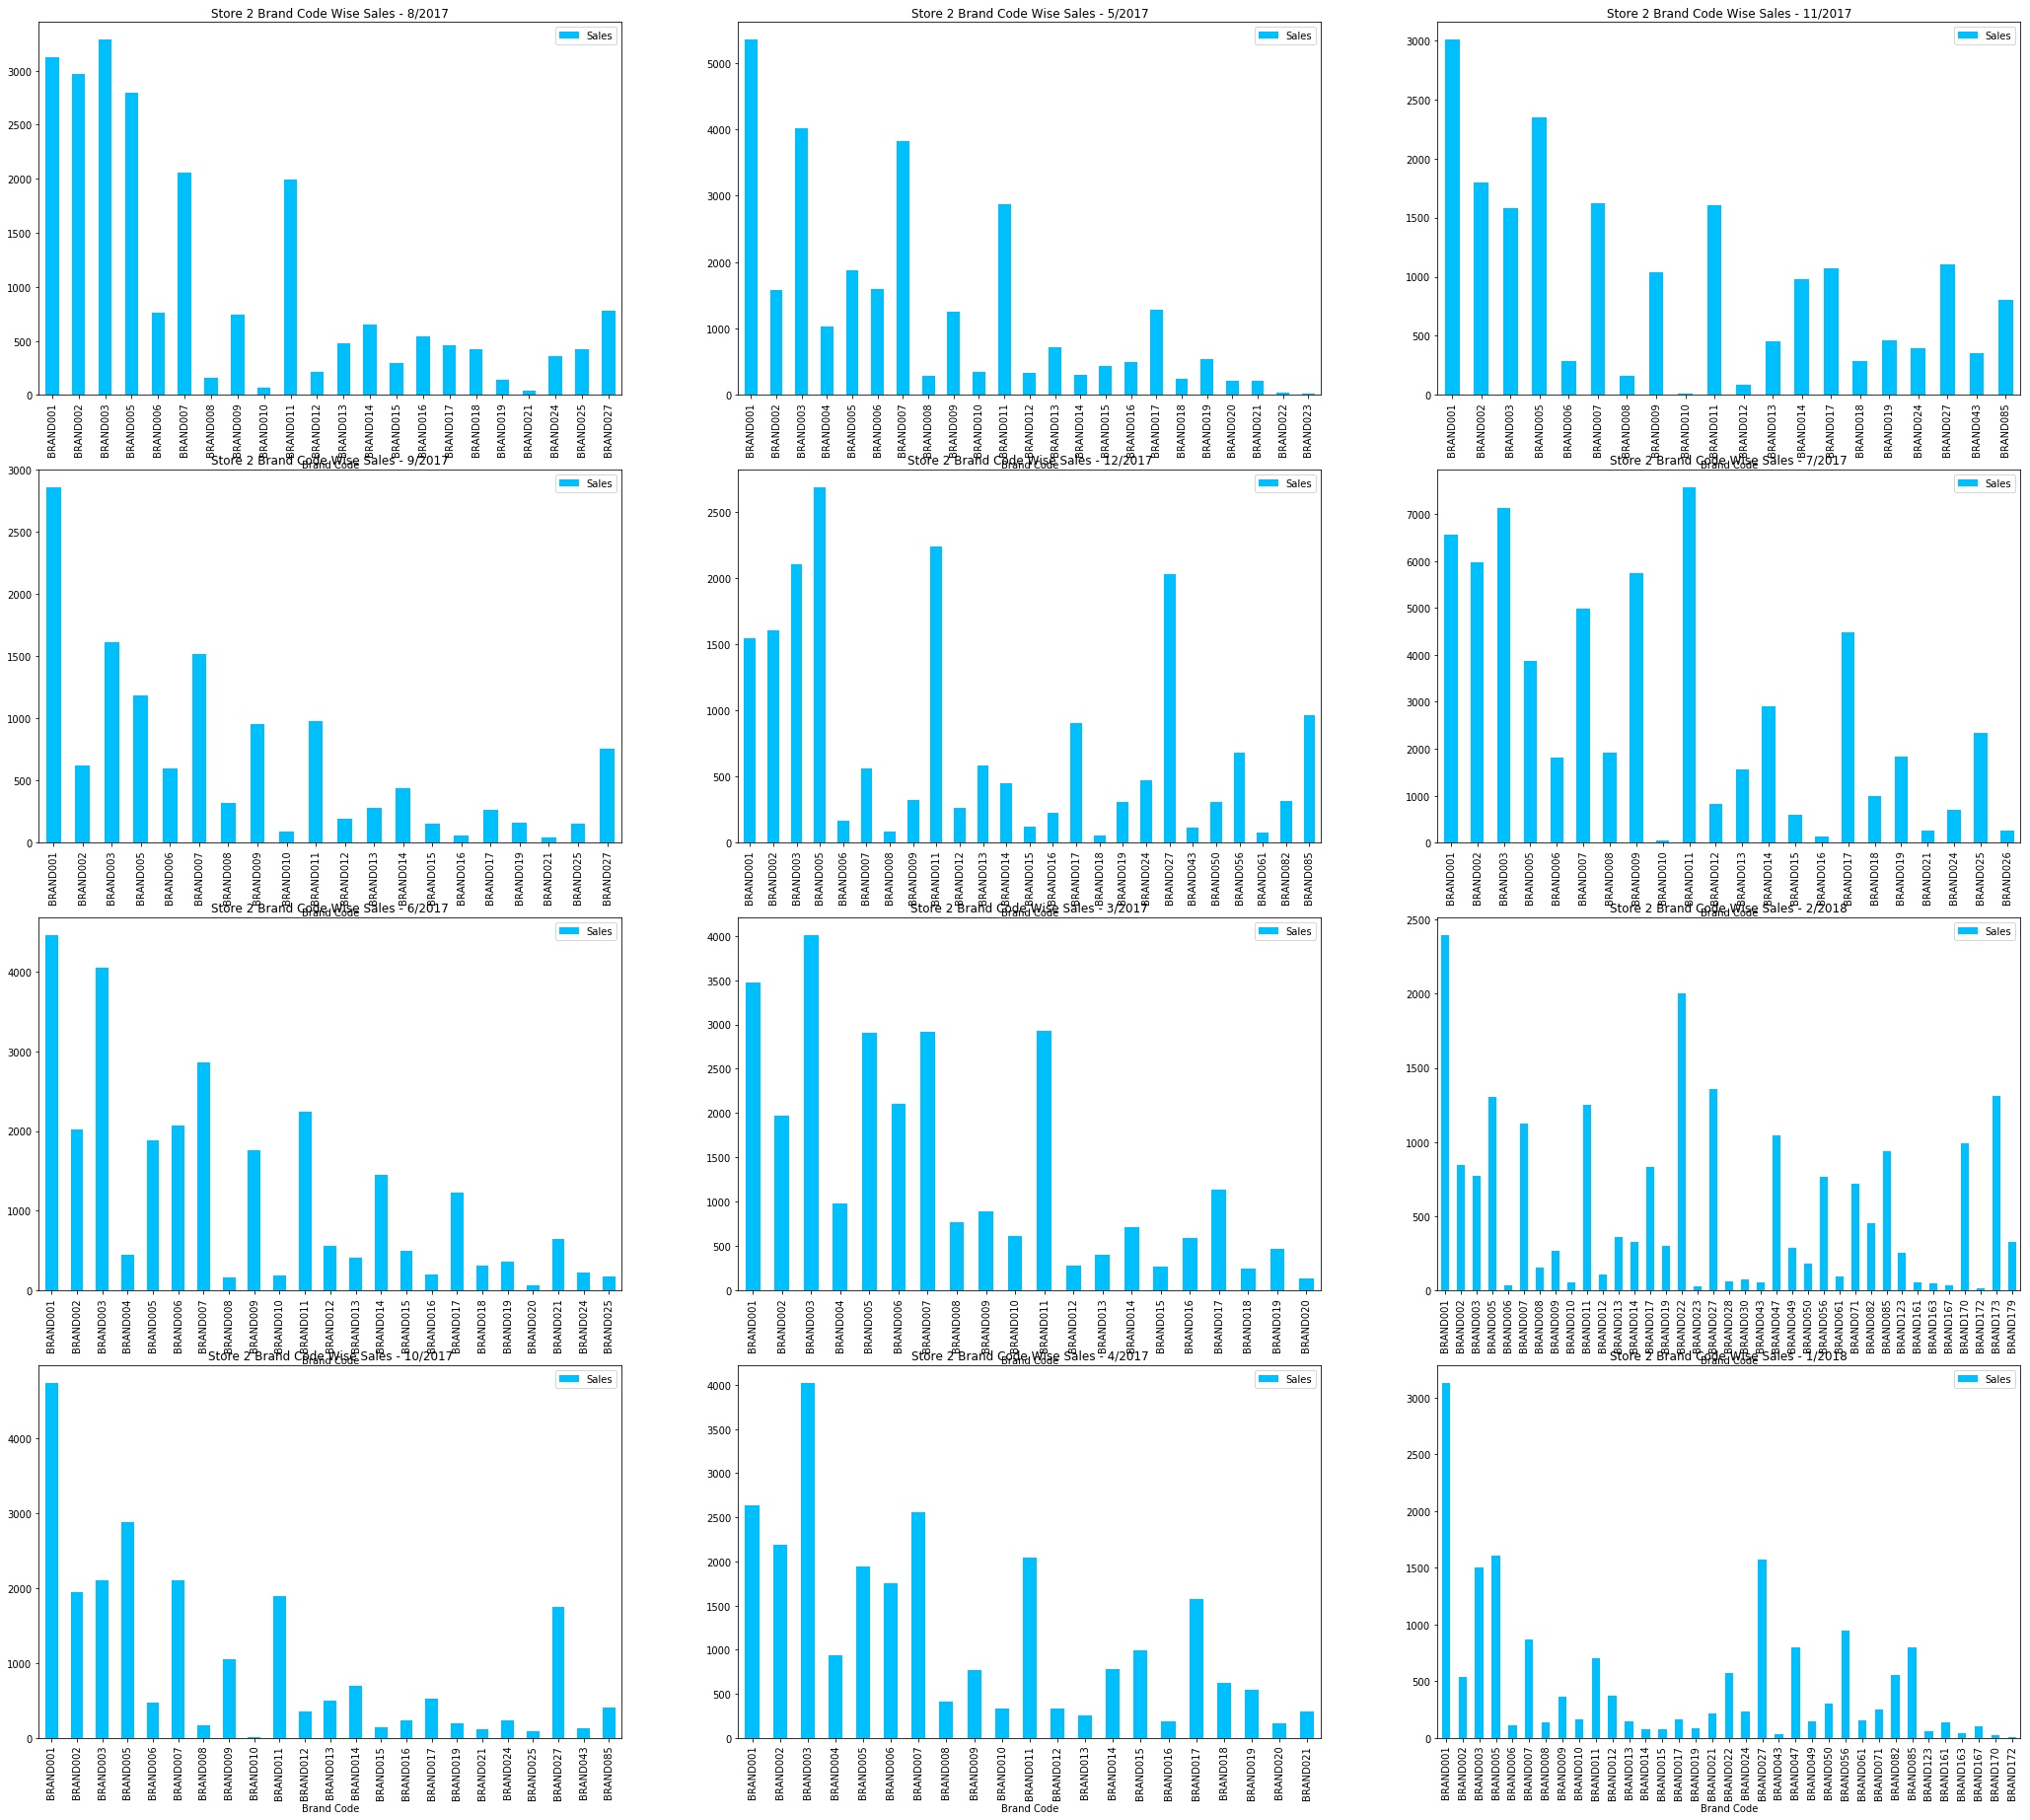

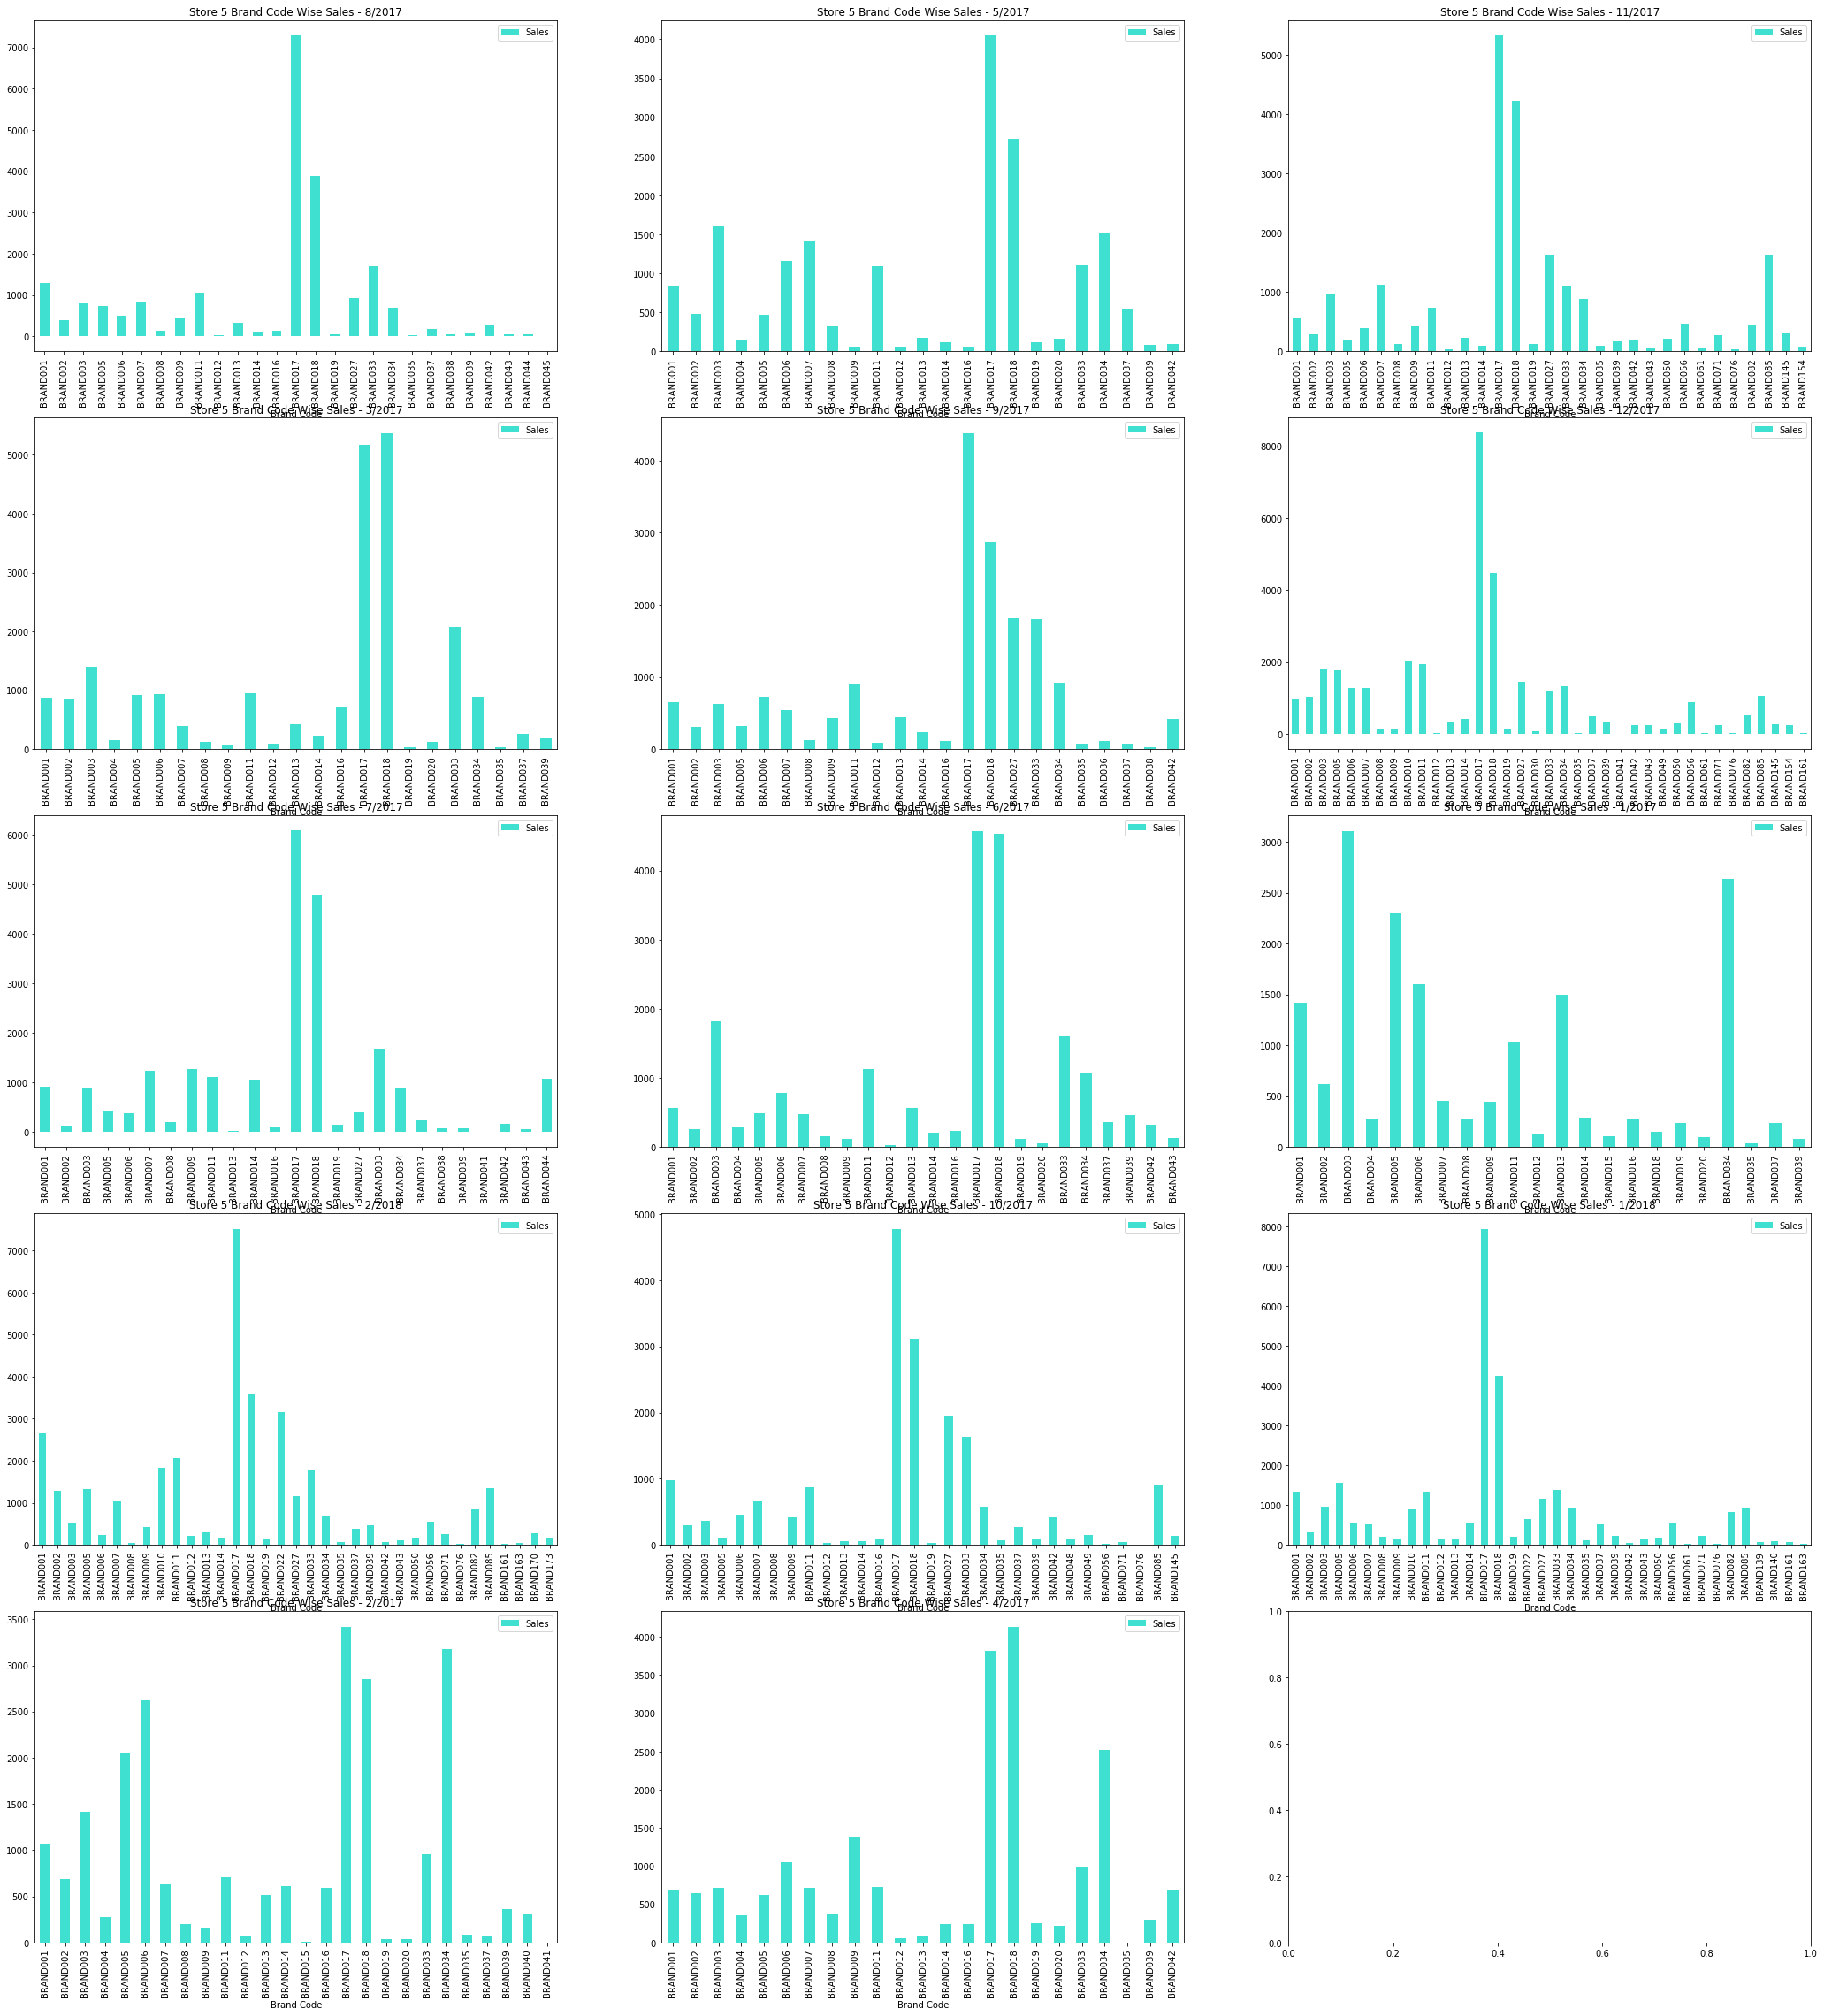

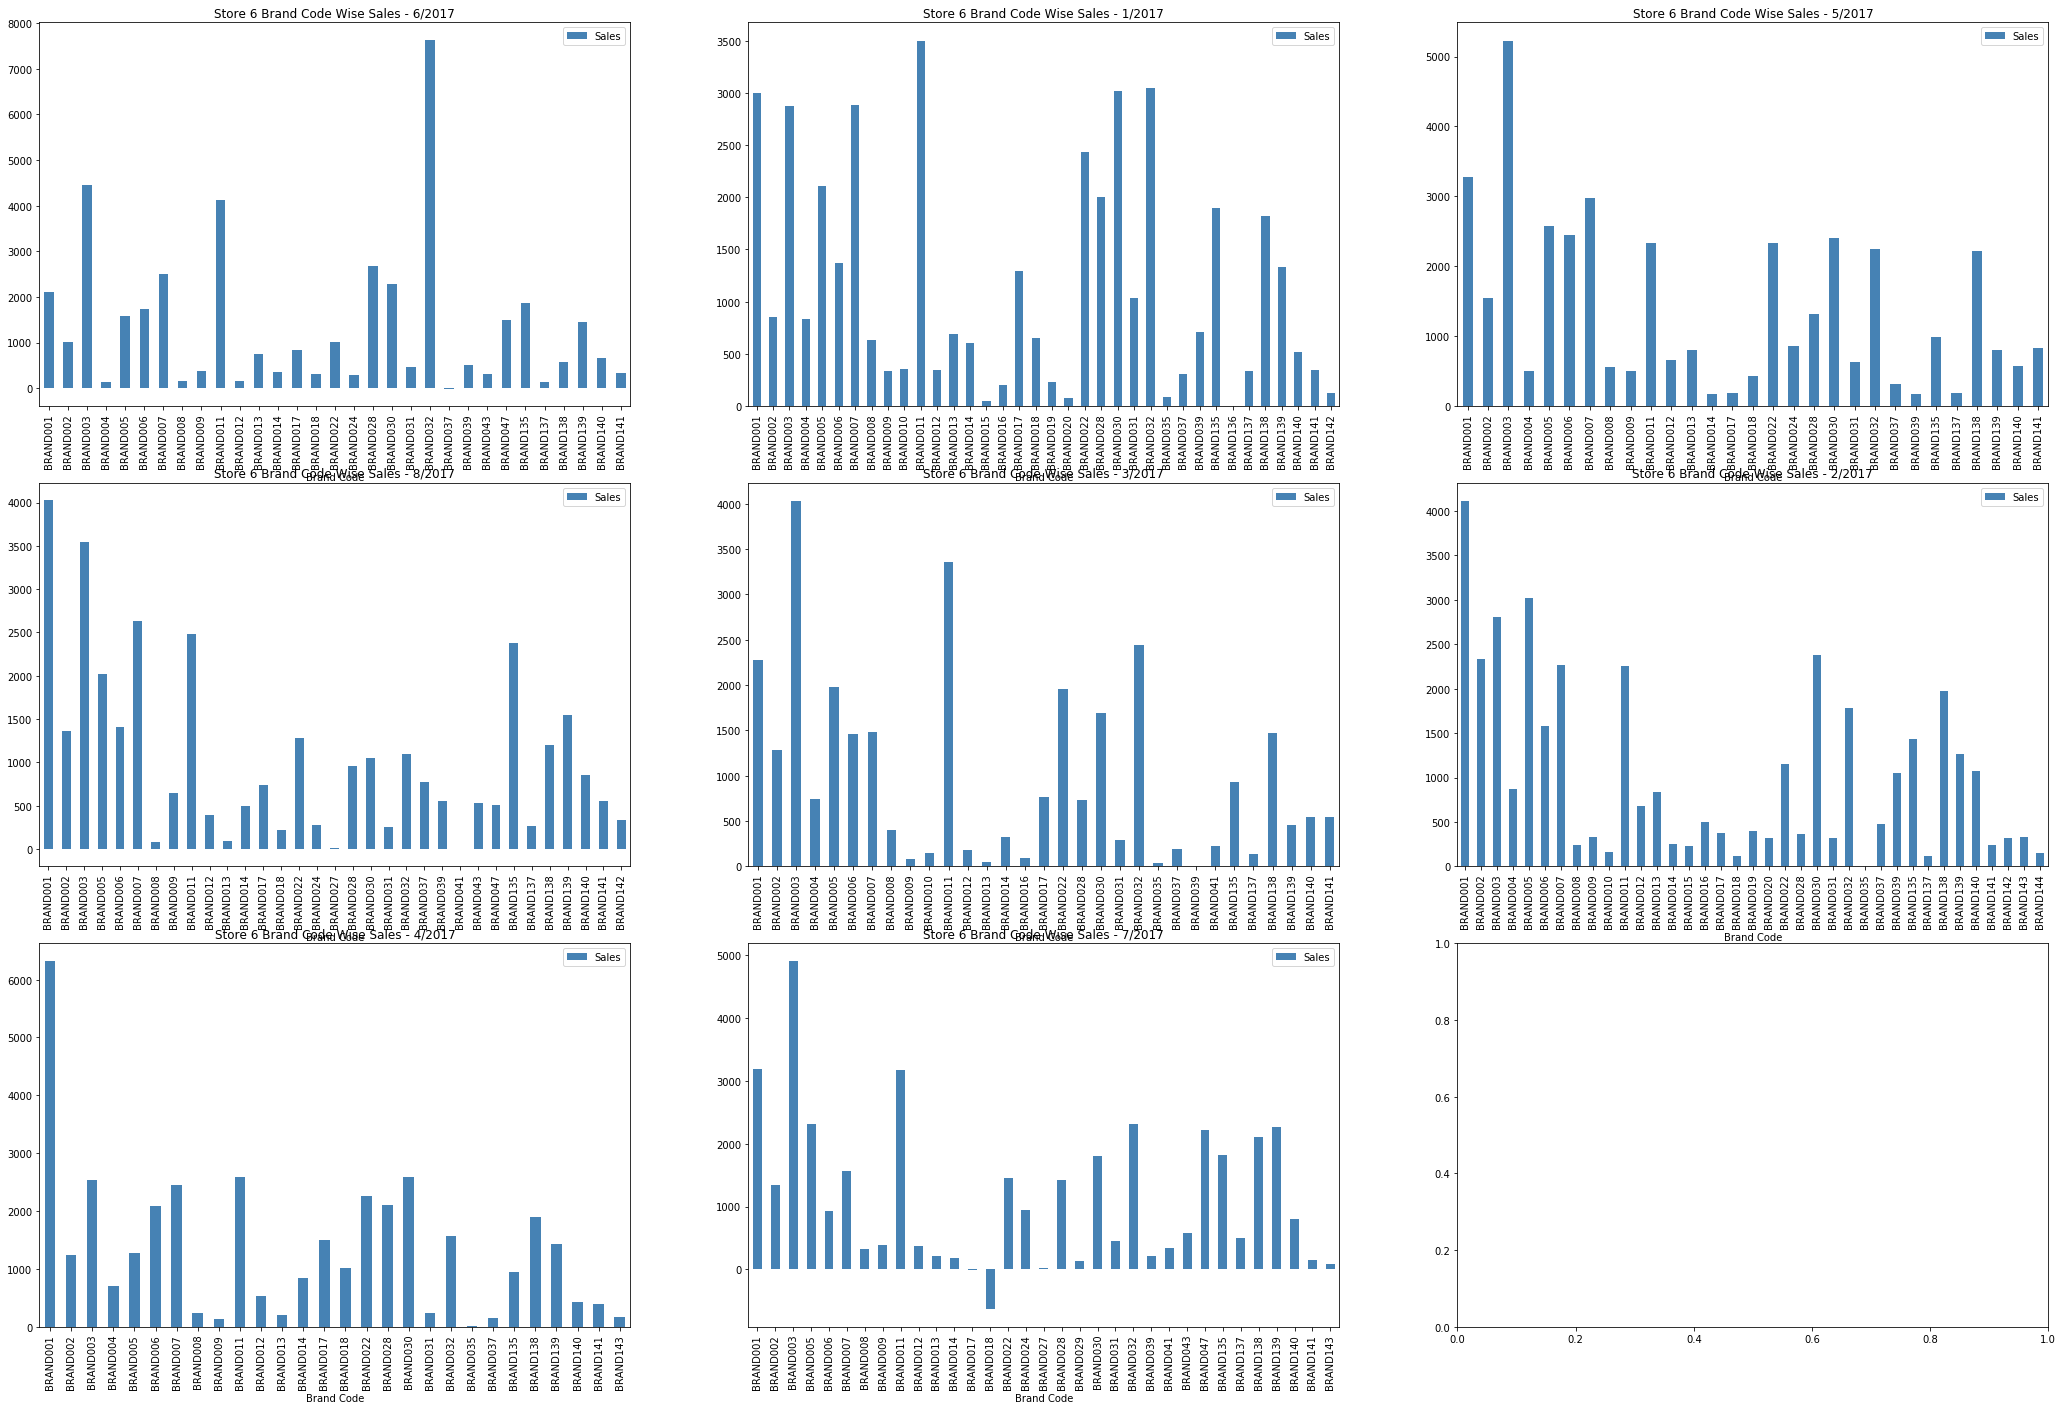

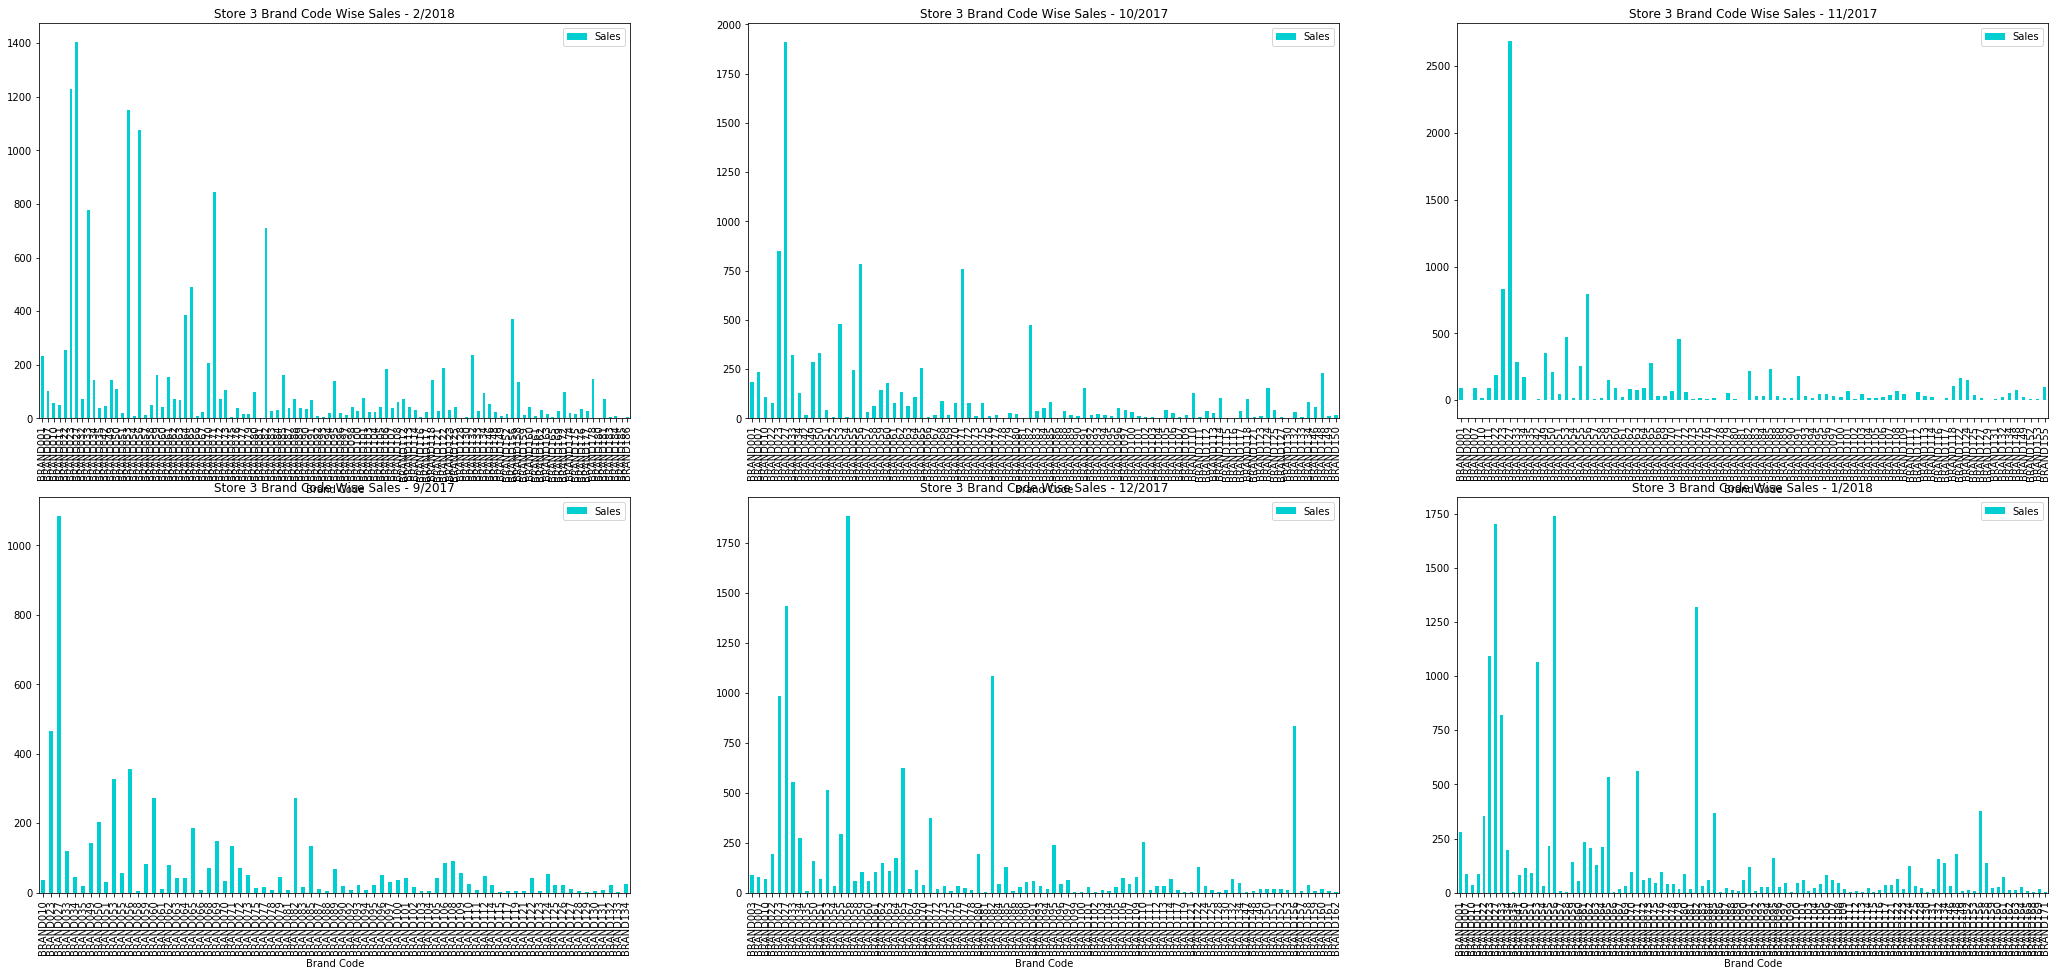

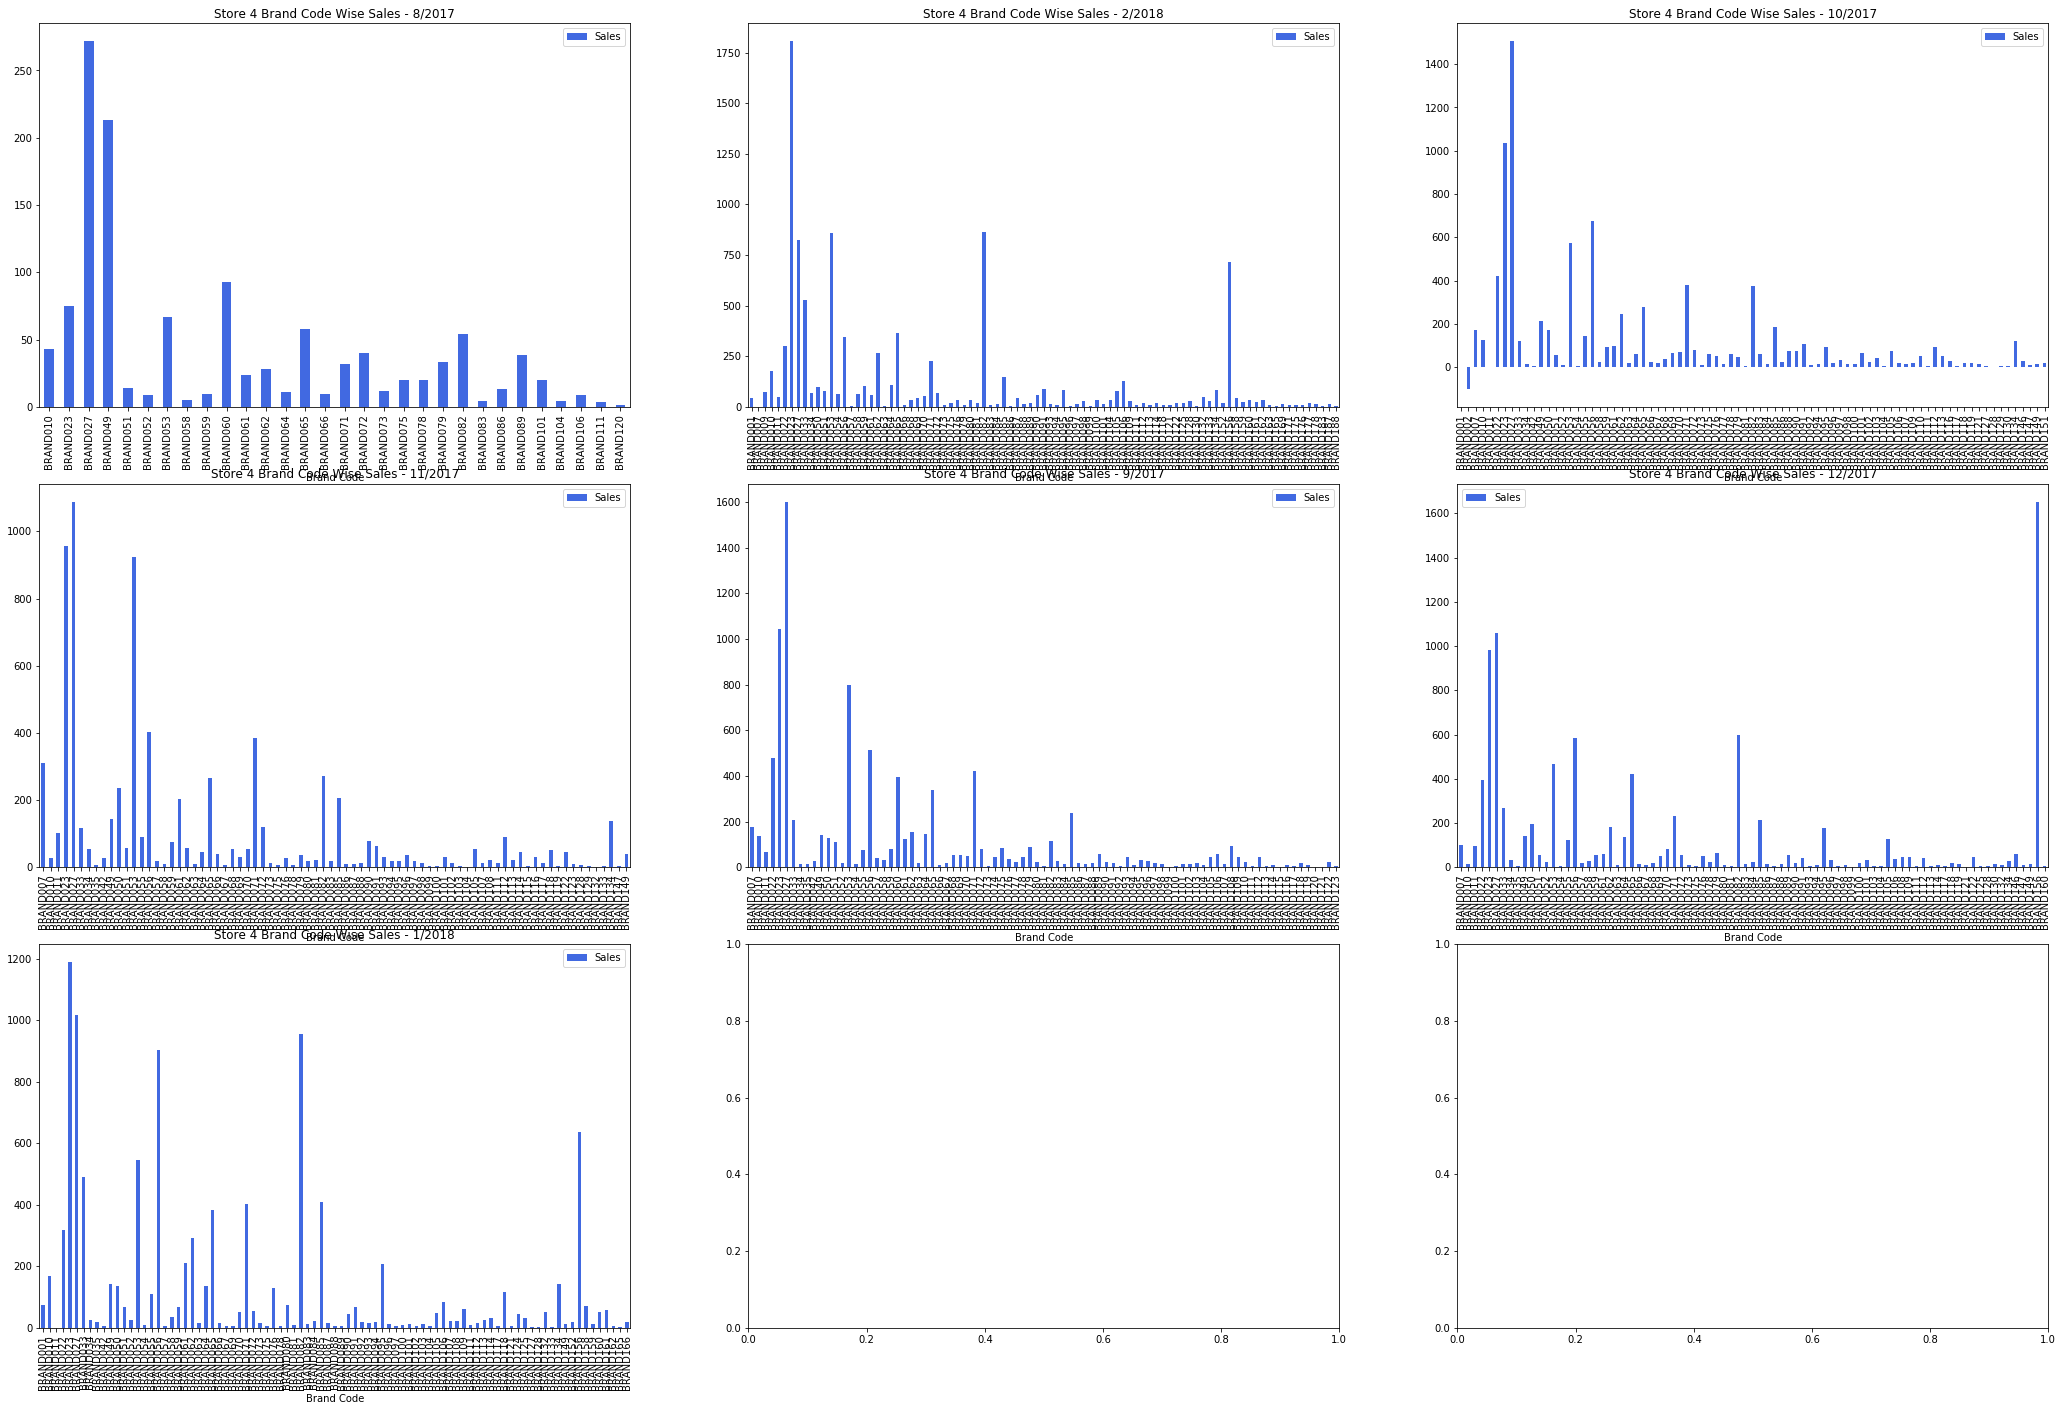

In [13]:
get_category_or_brand_wise_metrics_per_month_plots(data['sales_metrics_deep'], plot_kind='Brand Code')

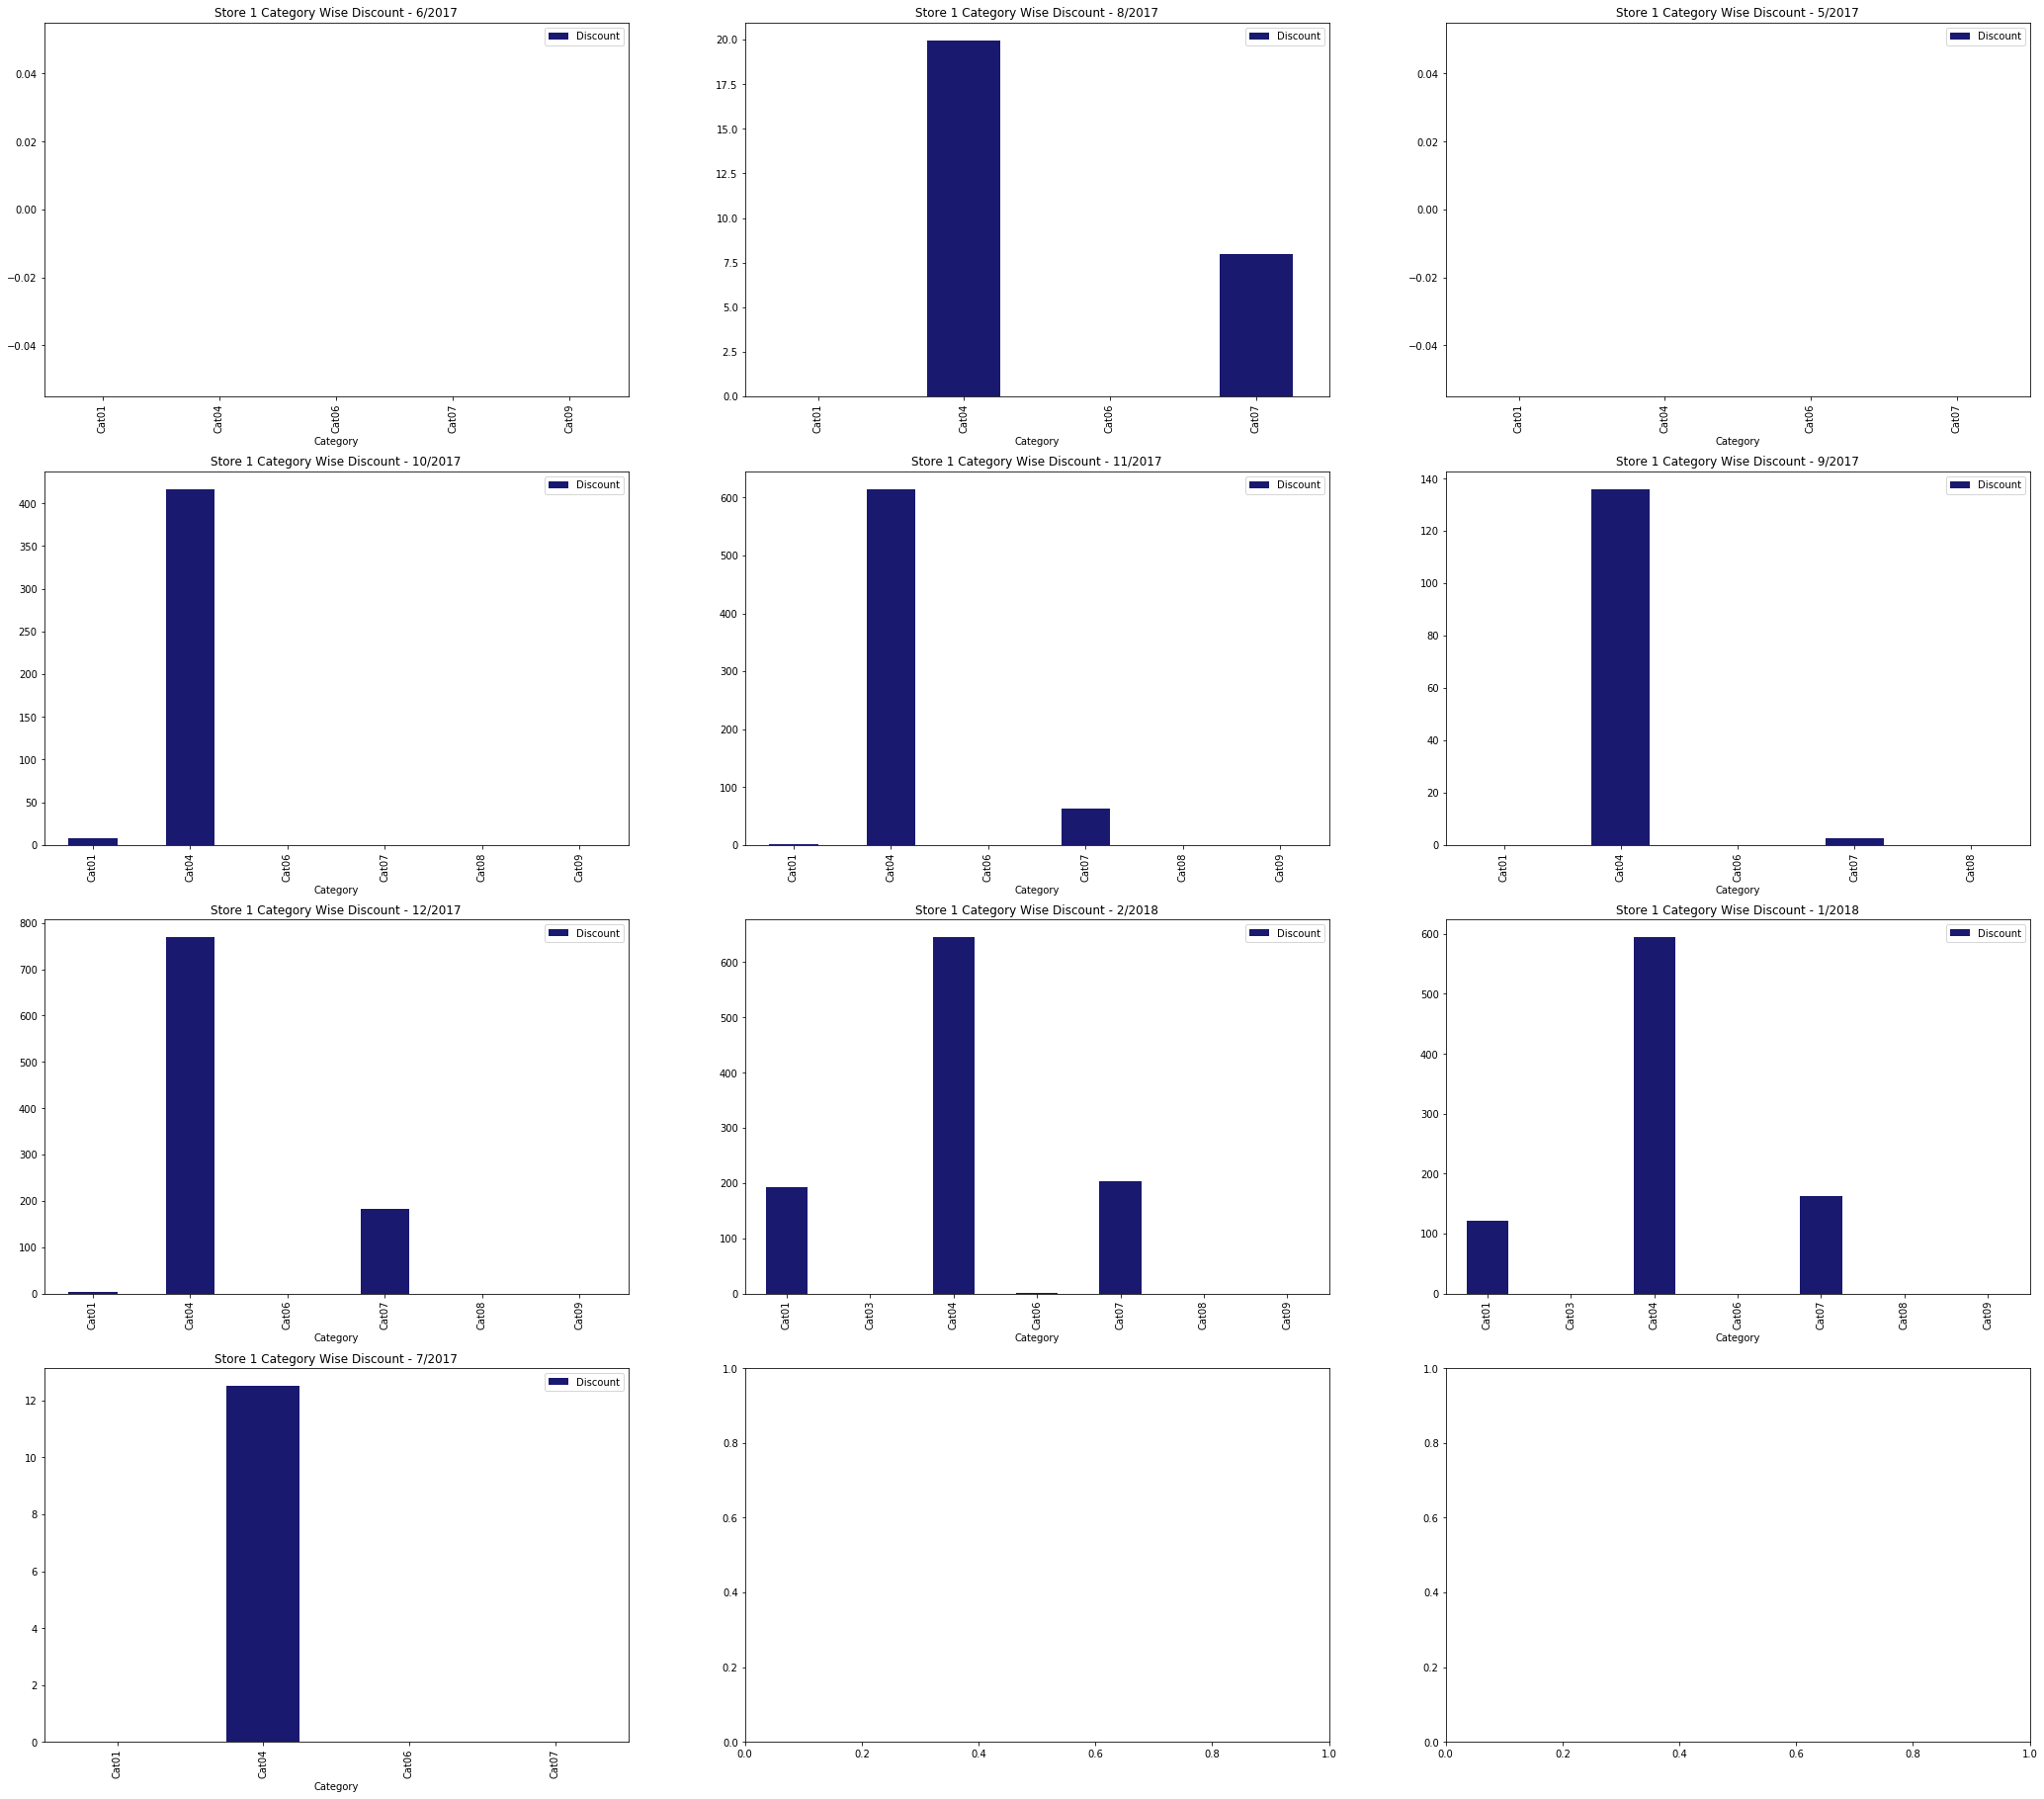

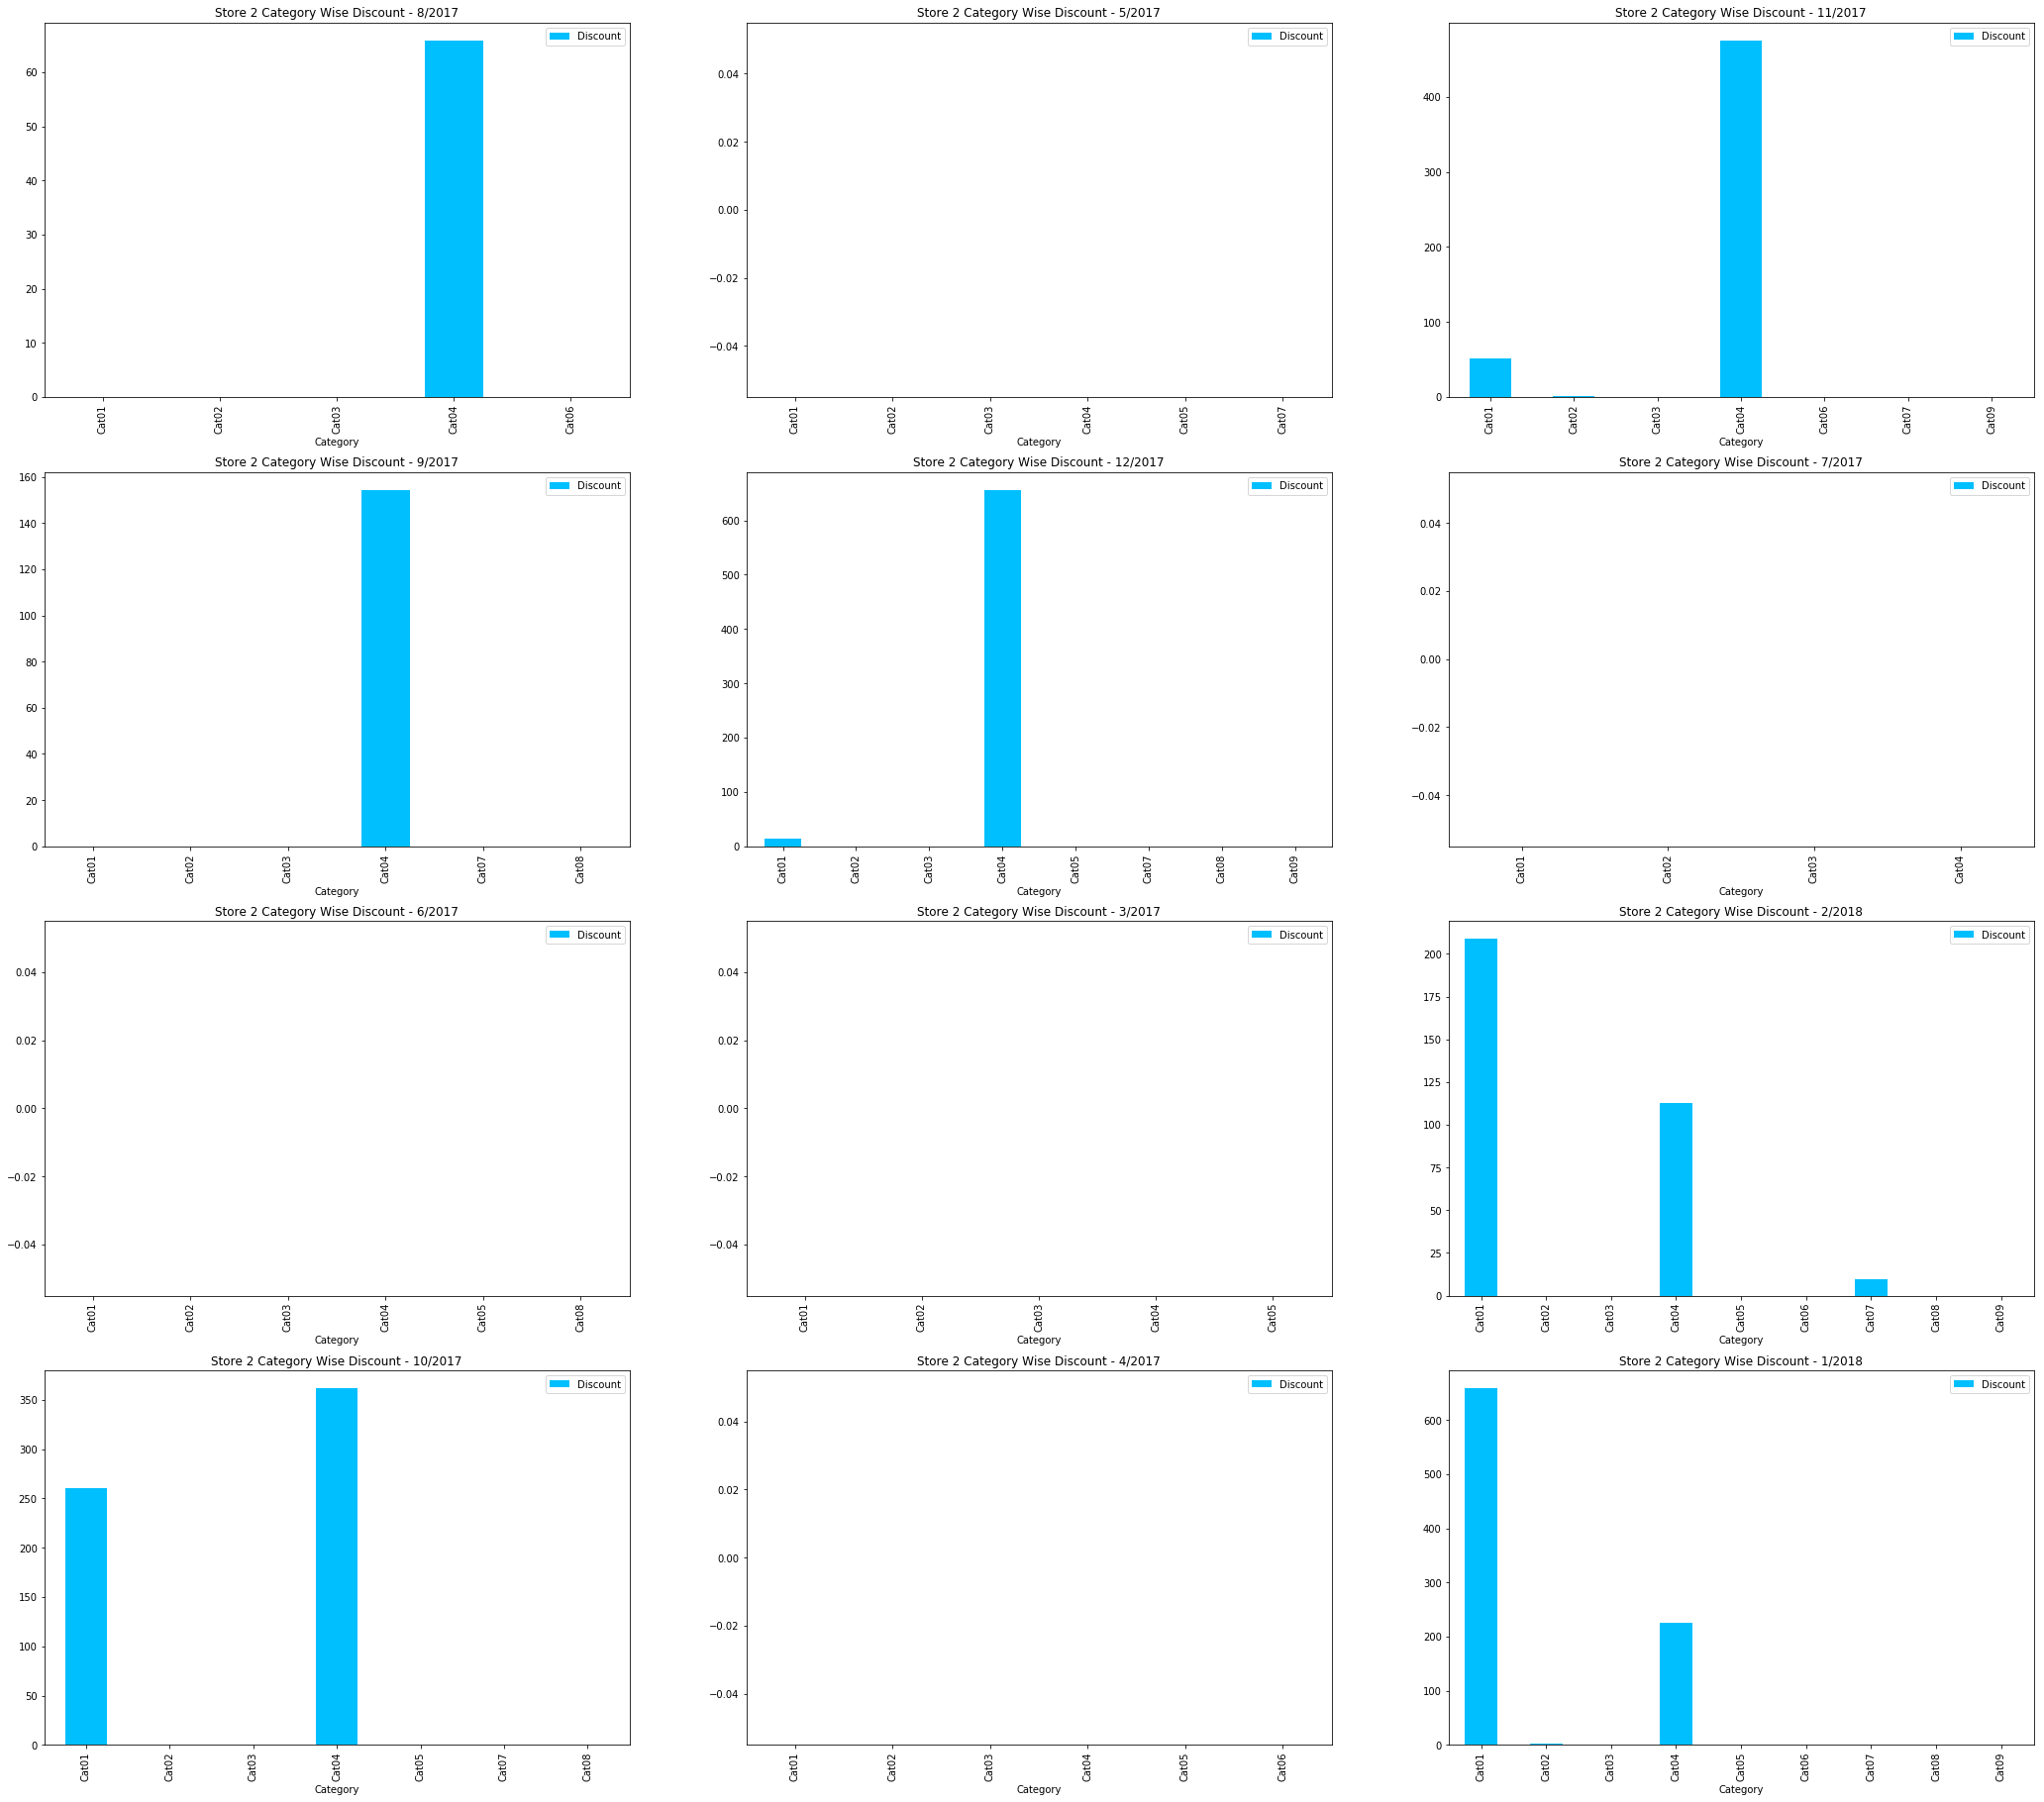

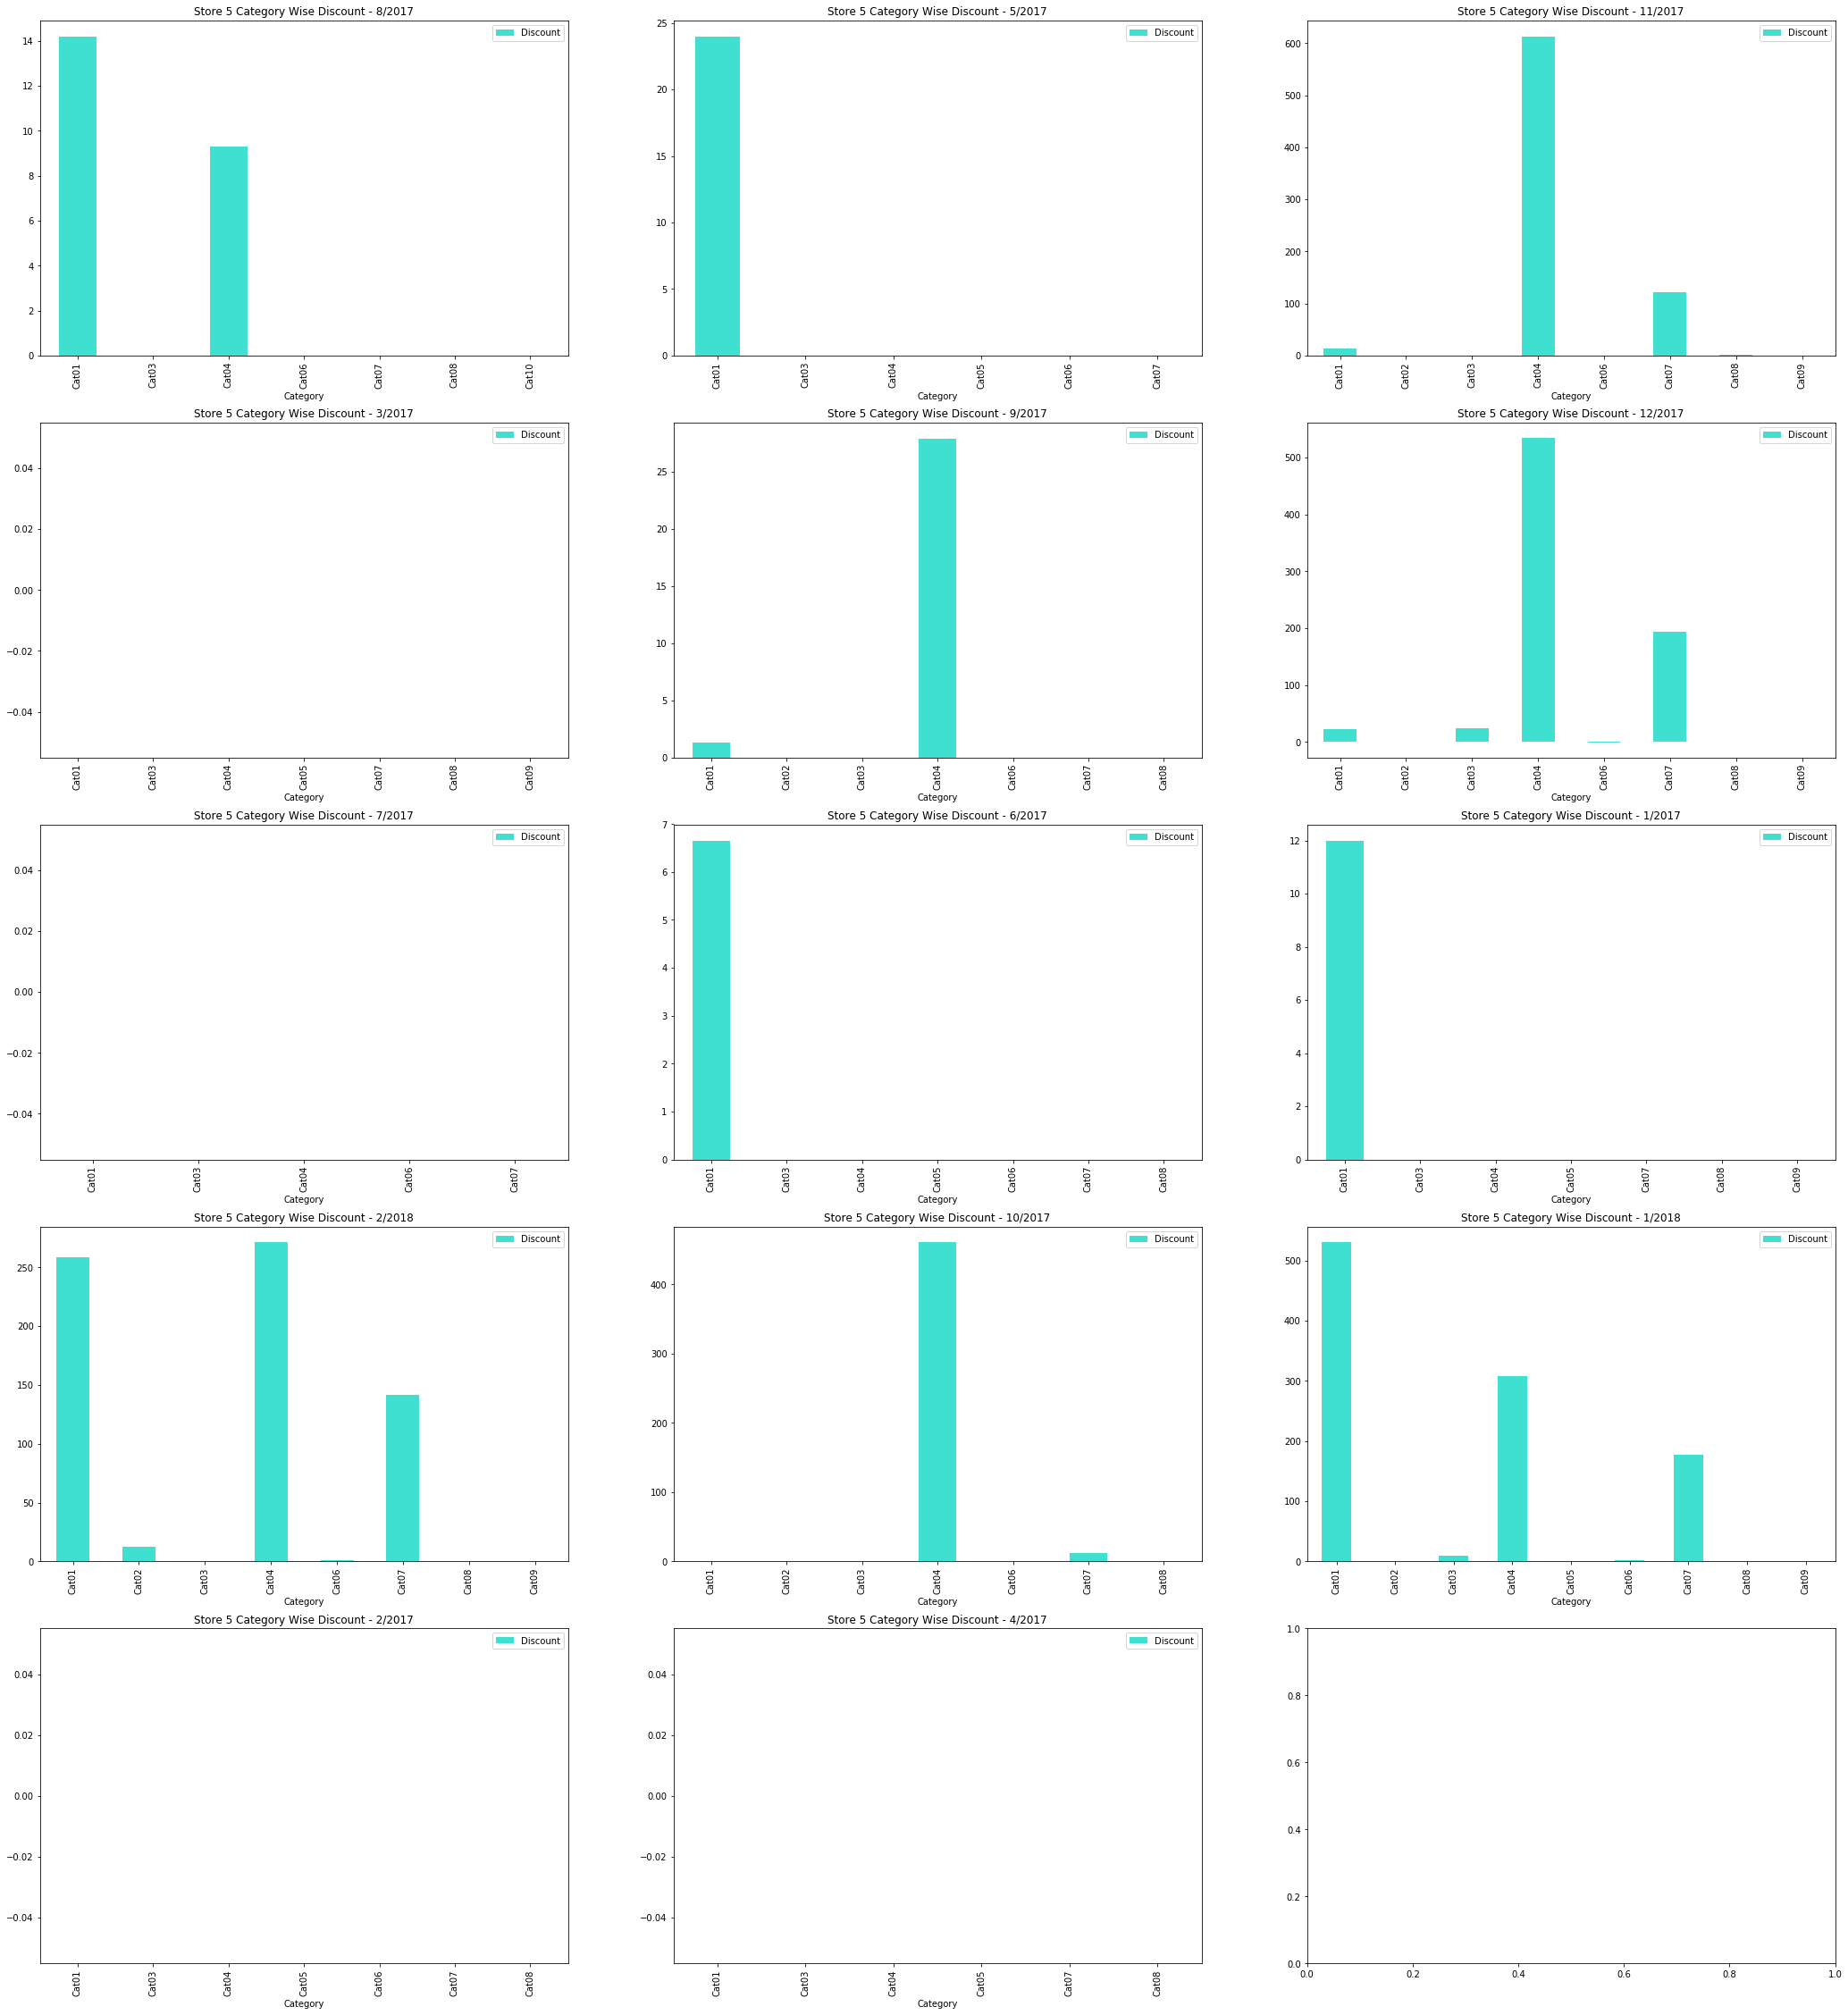

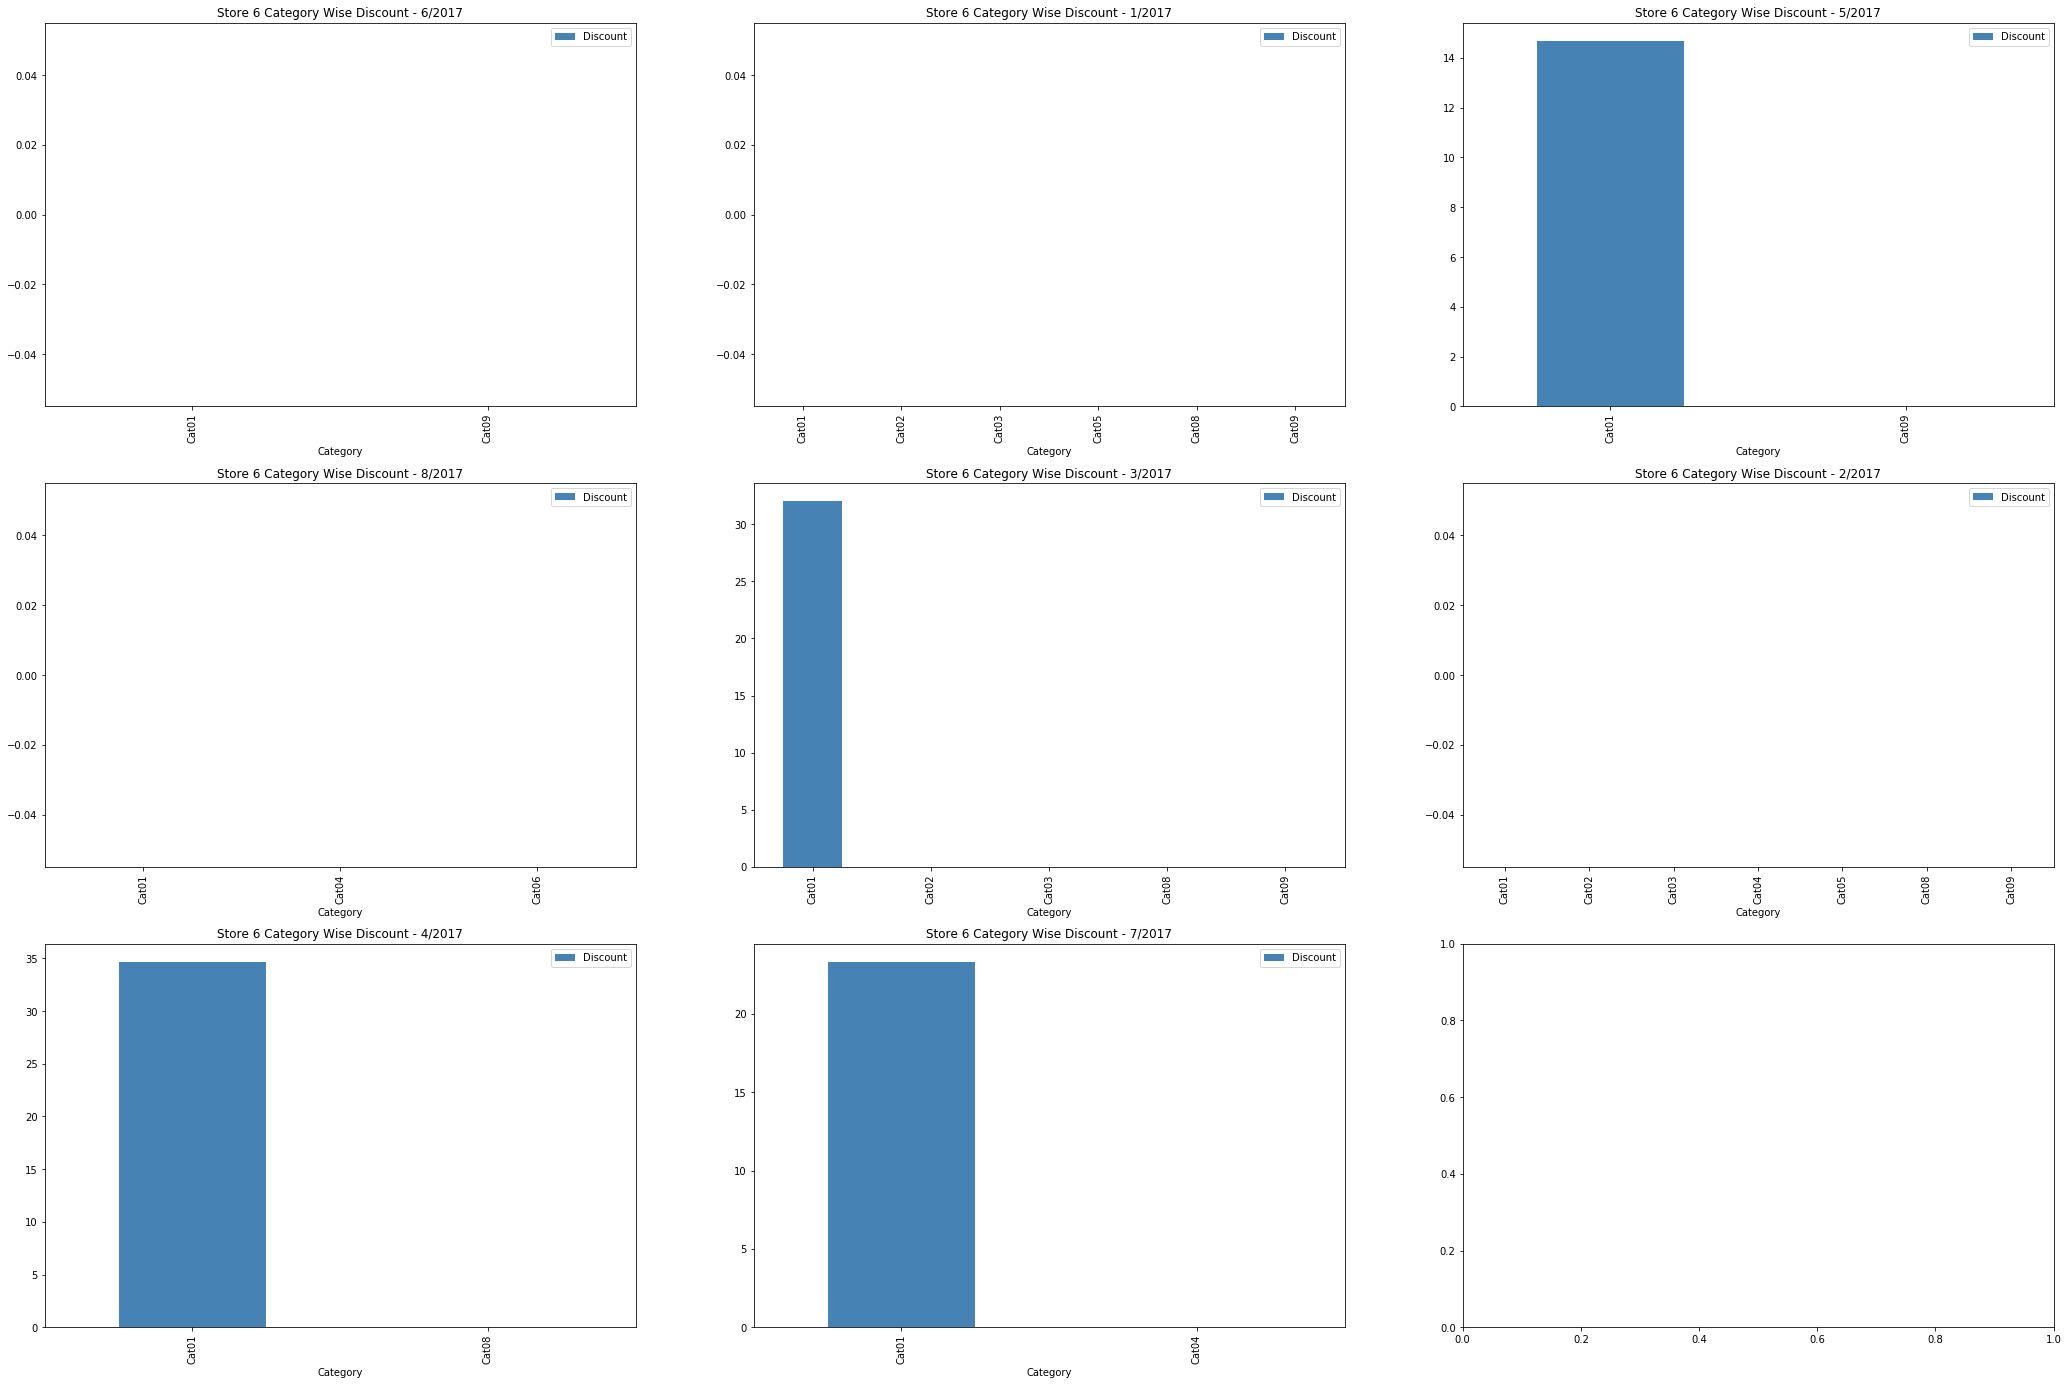

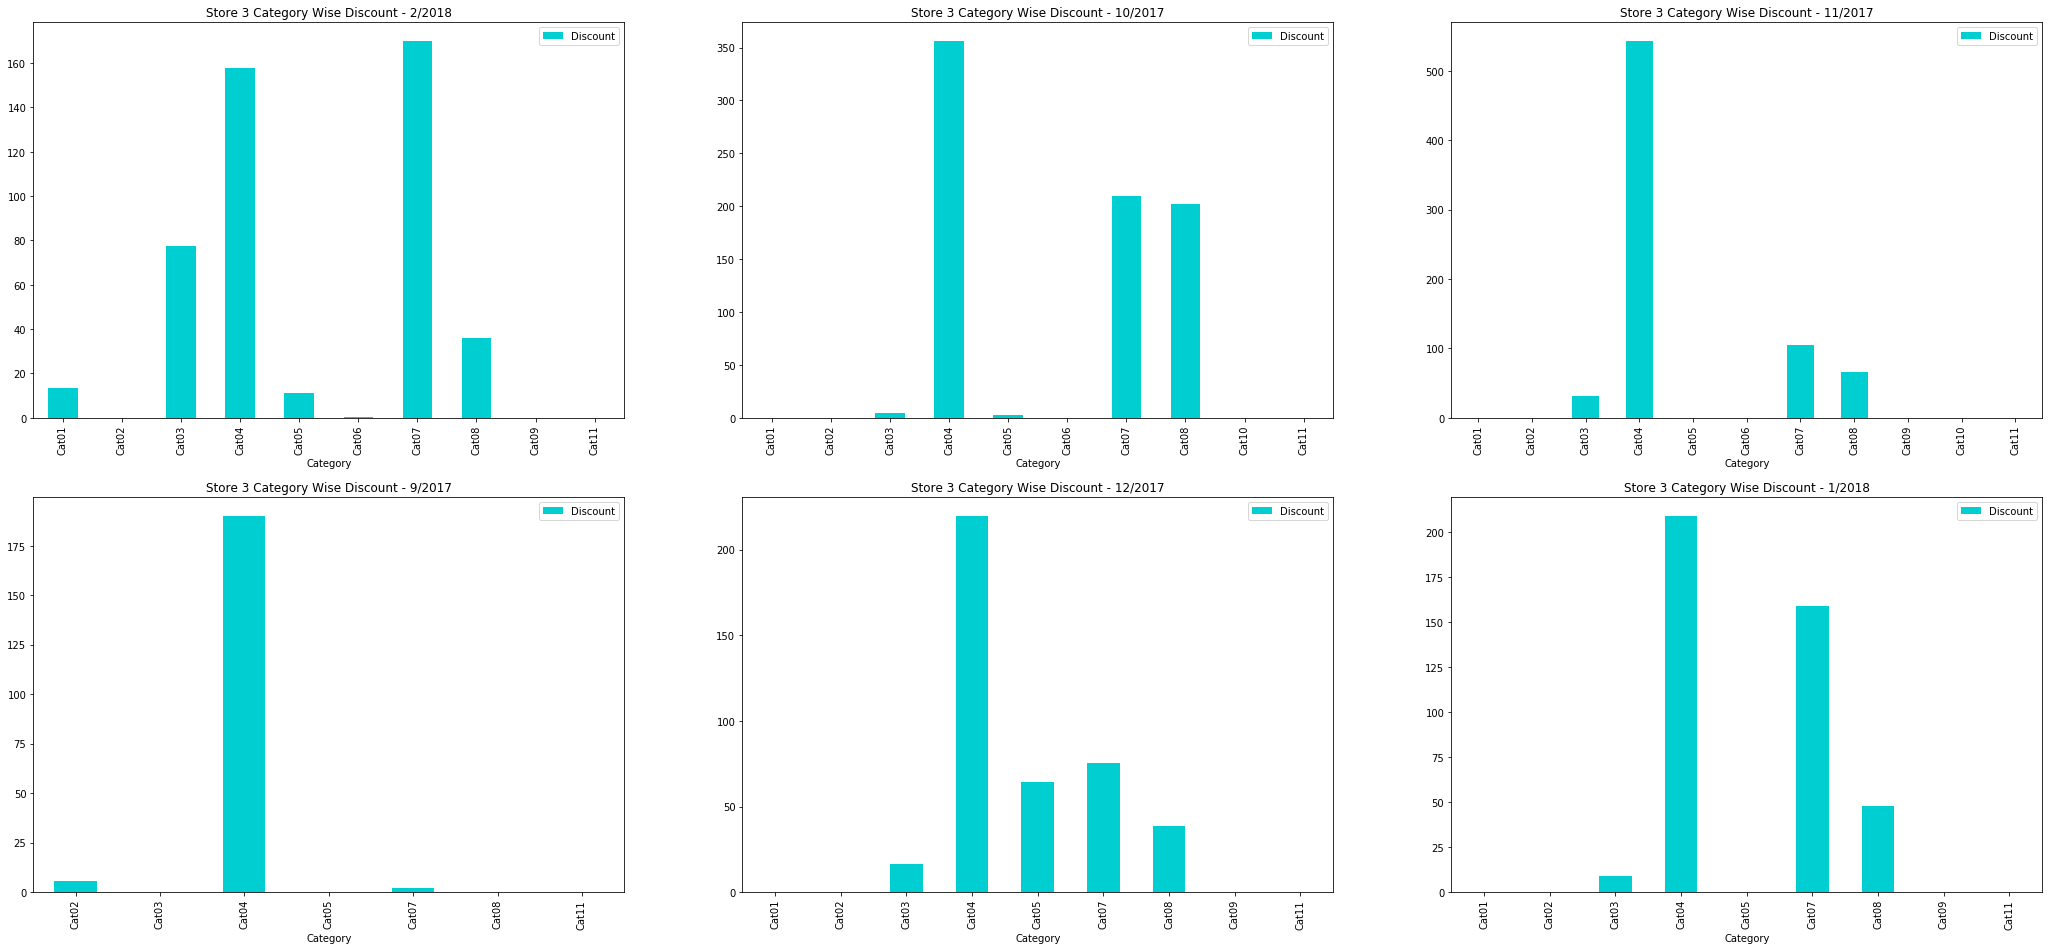

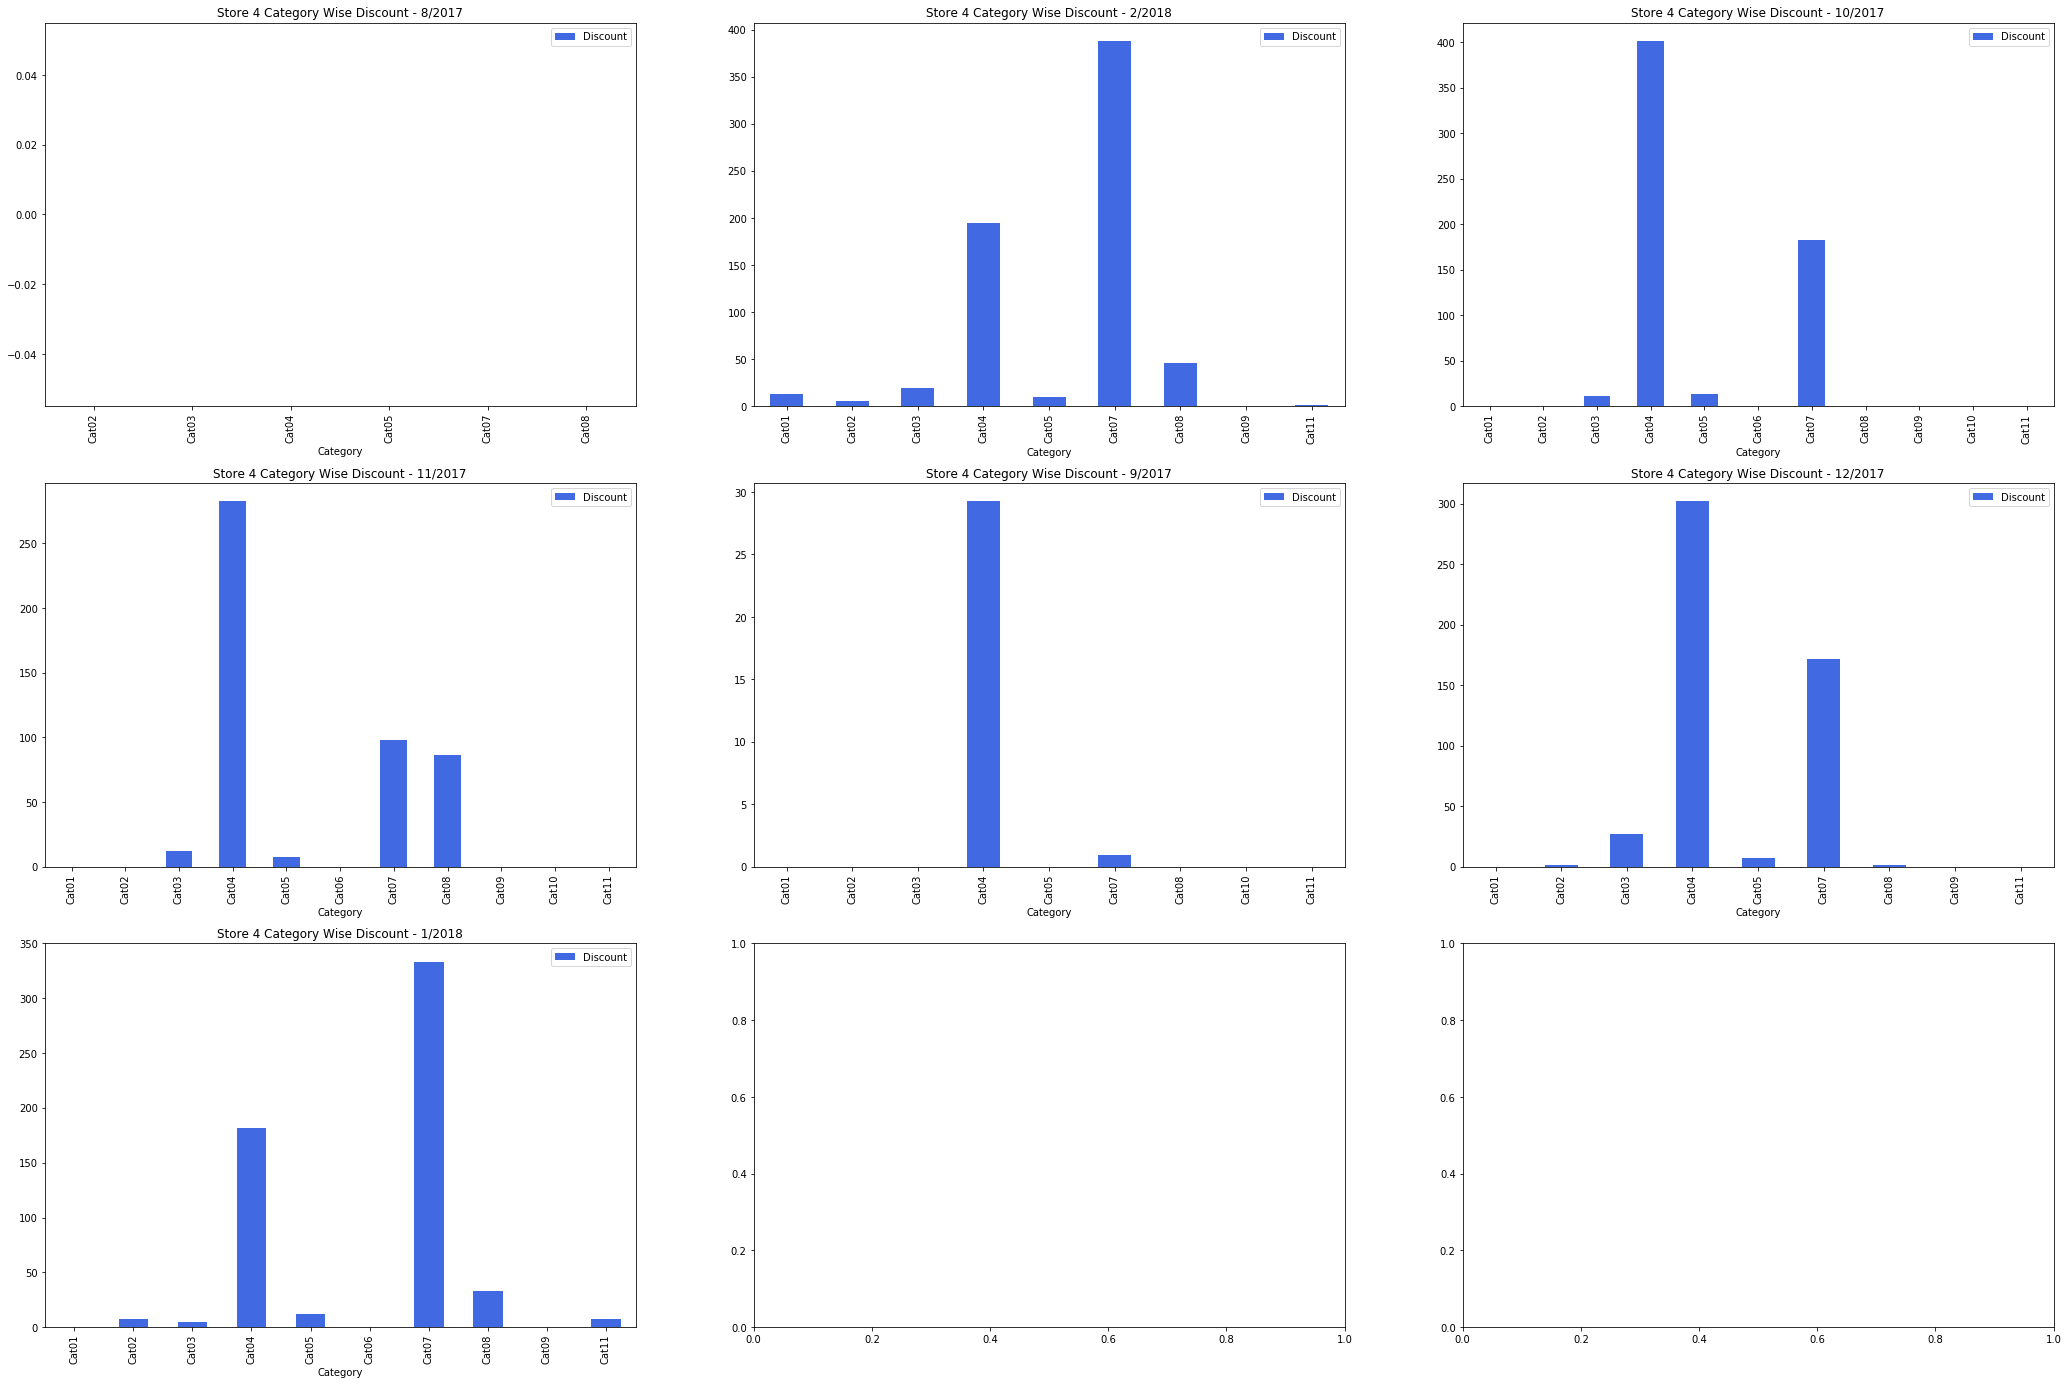

In [14]:
get_category_or_brand_wise_metrics_per_month_plots(data['disc_metrics_deep'], df_kind='Discount')

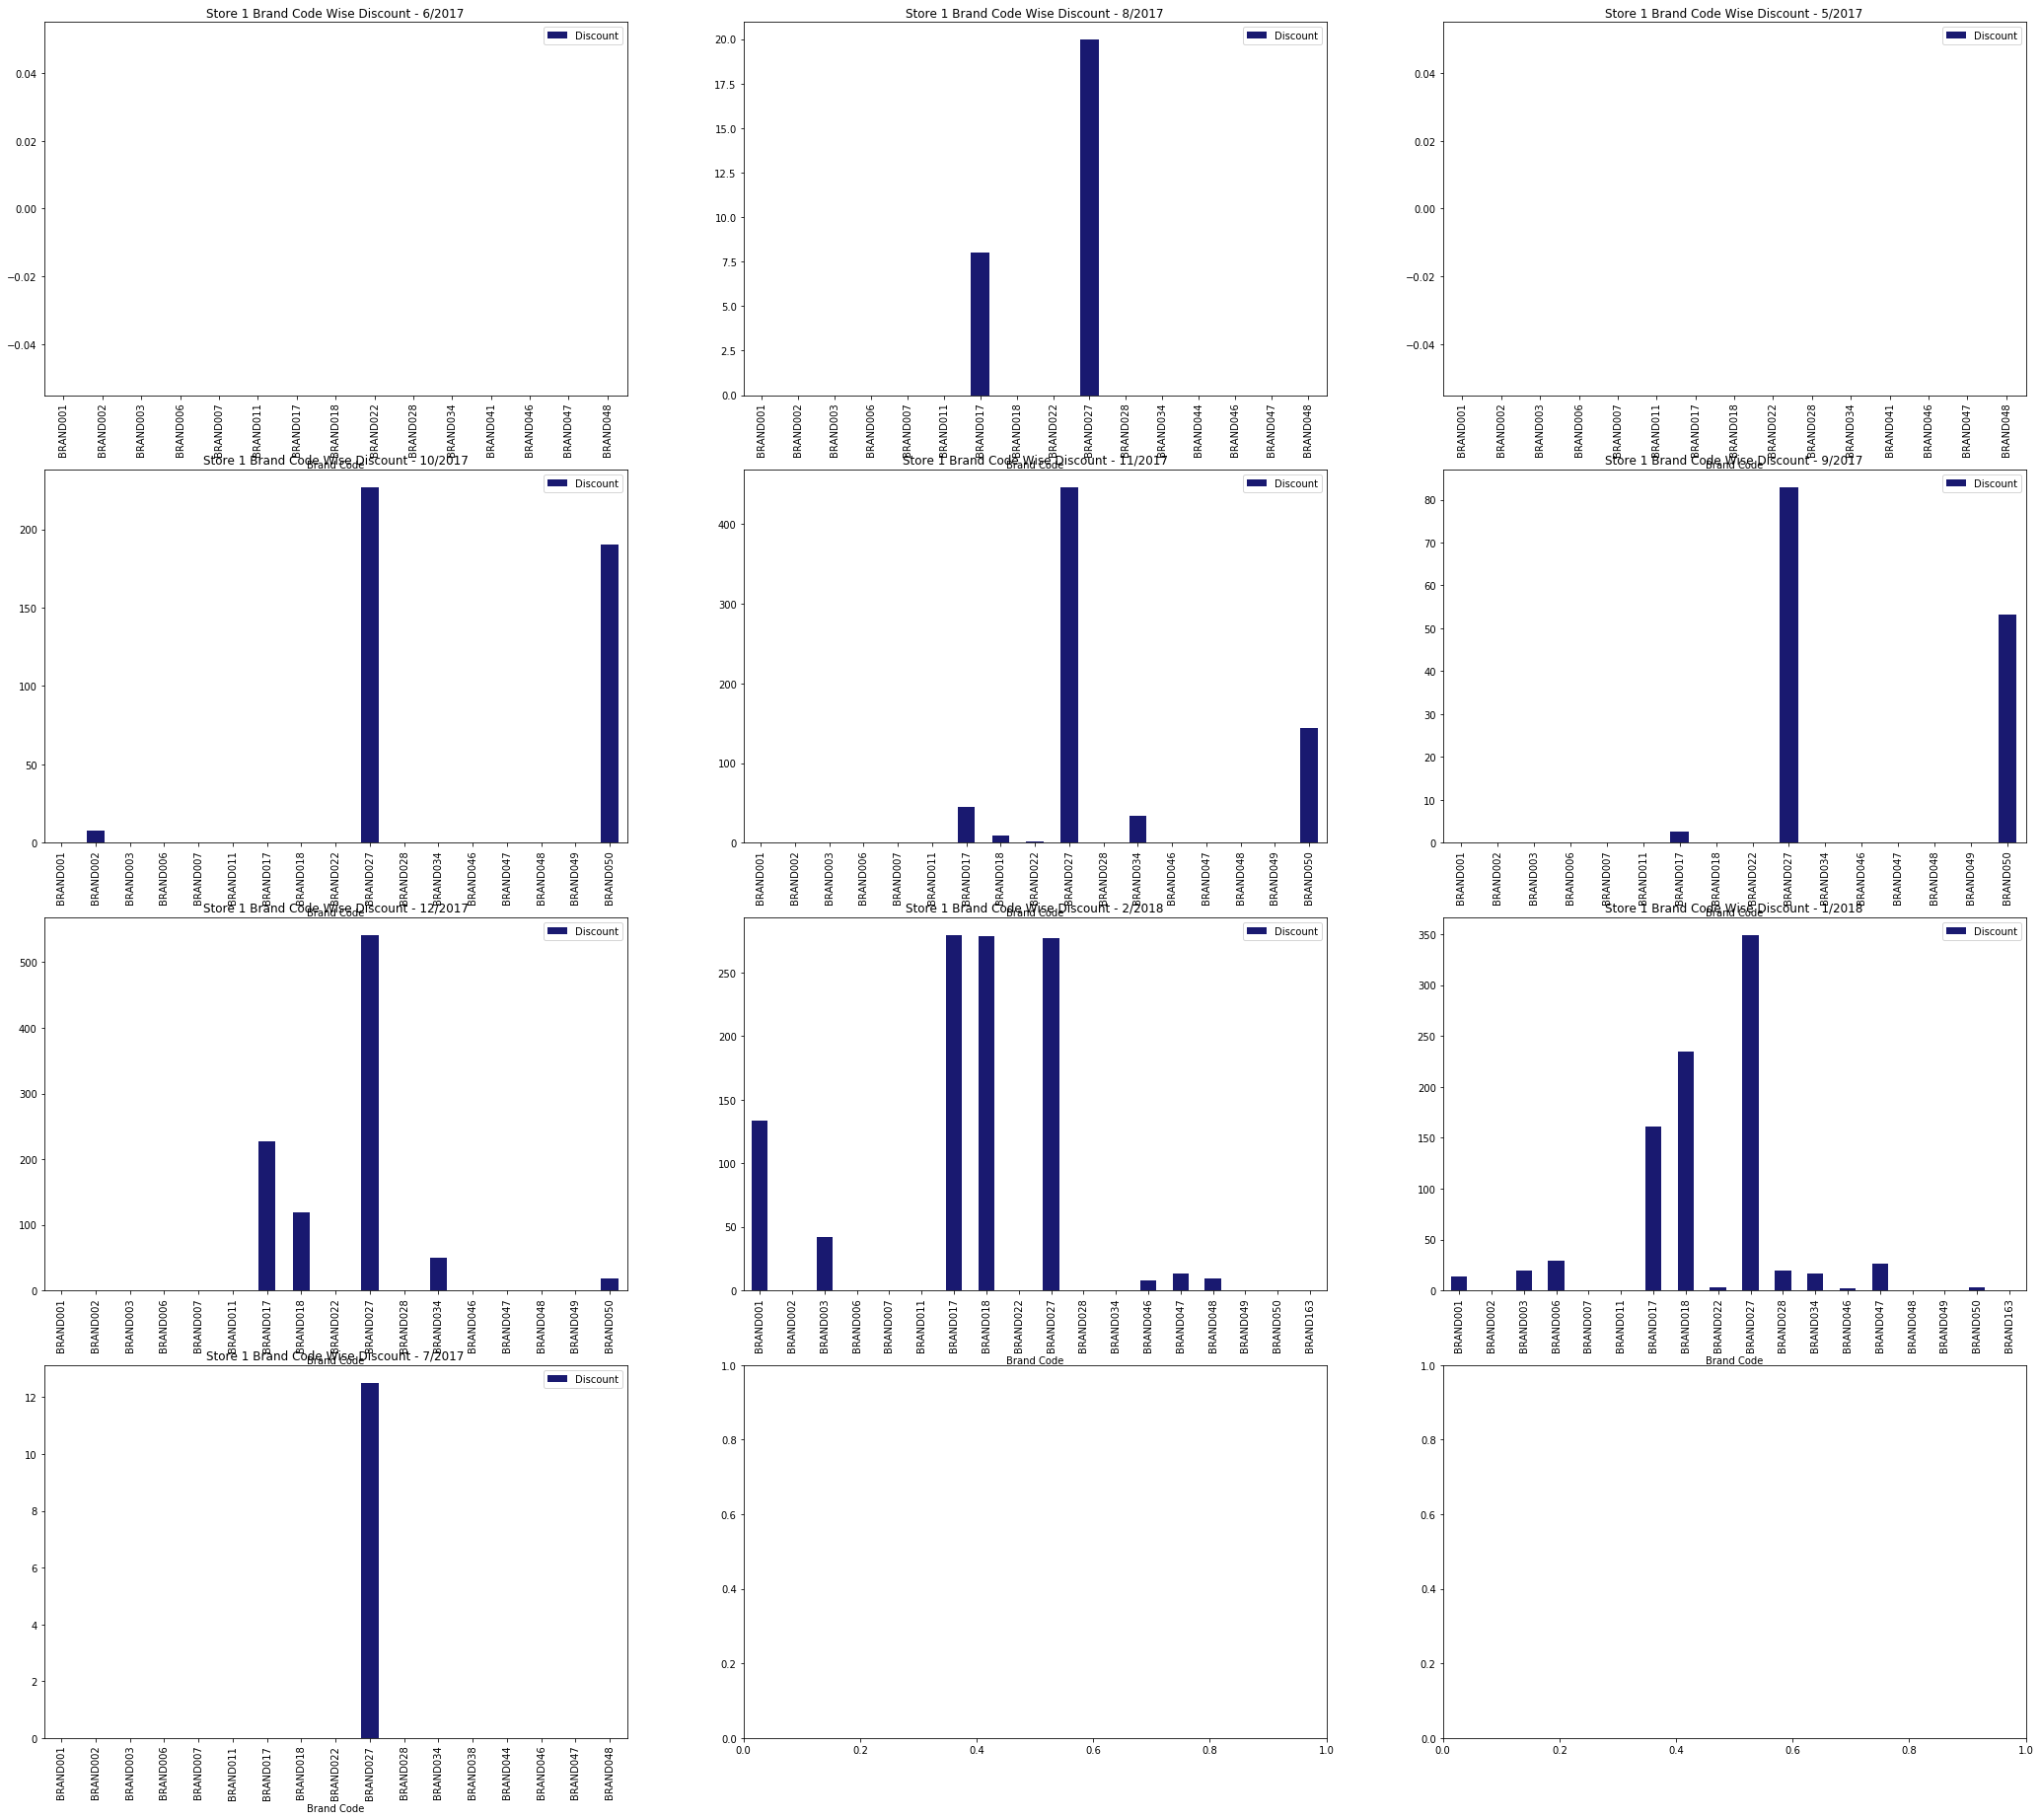

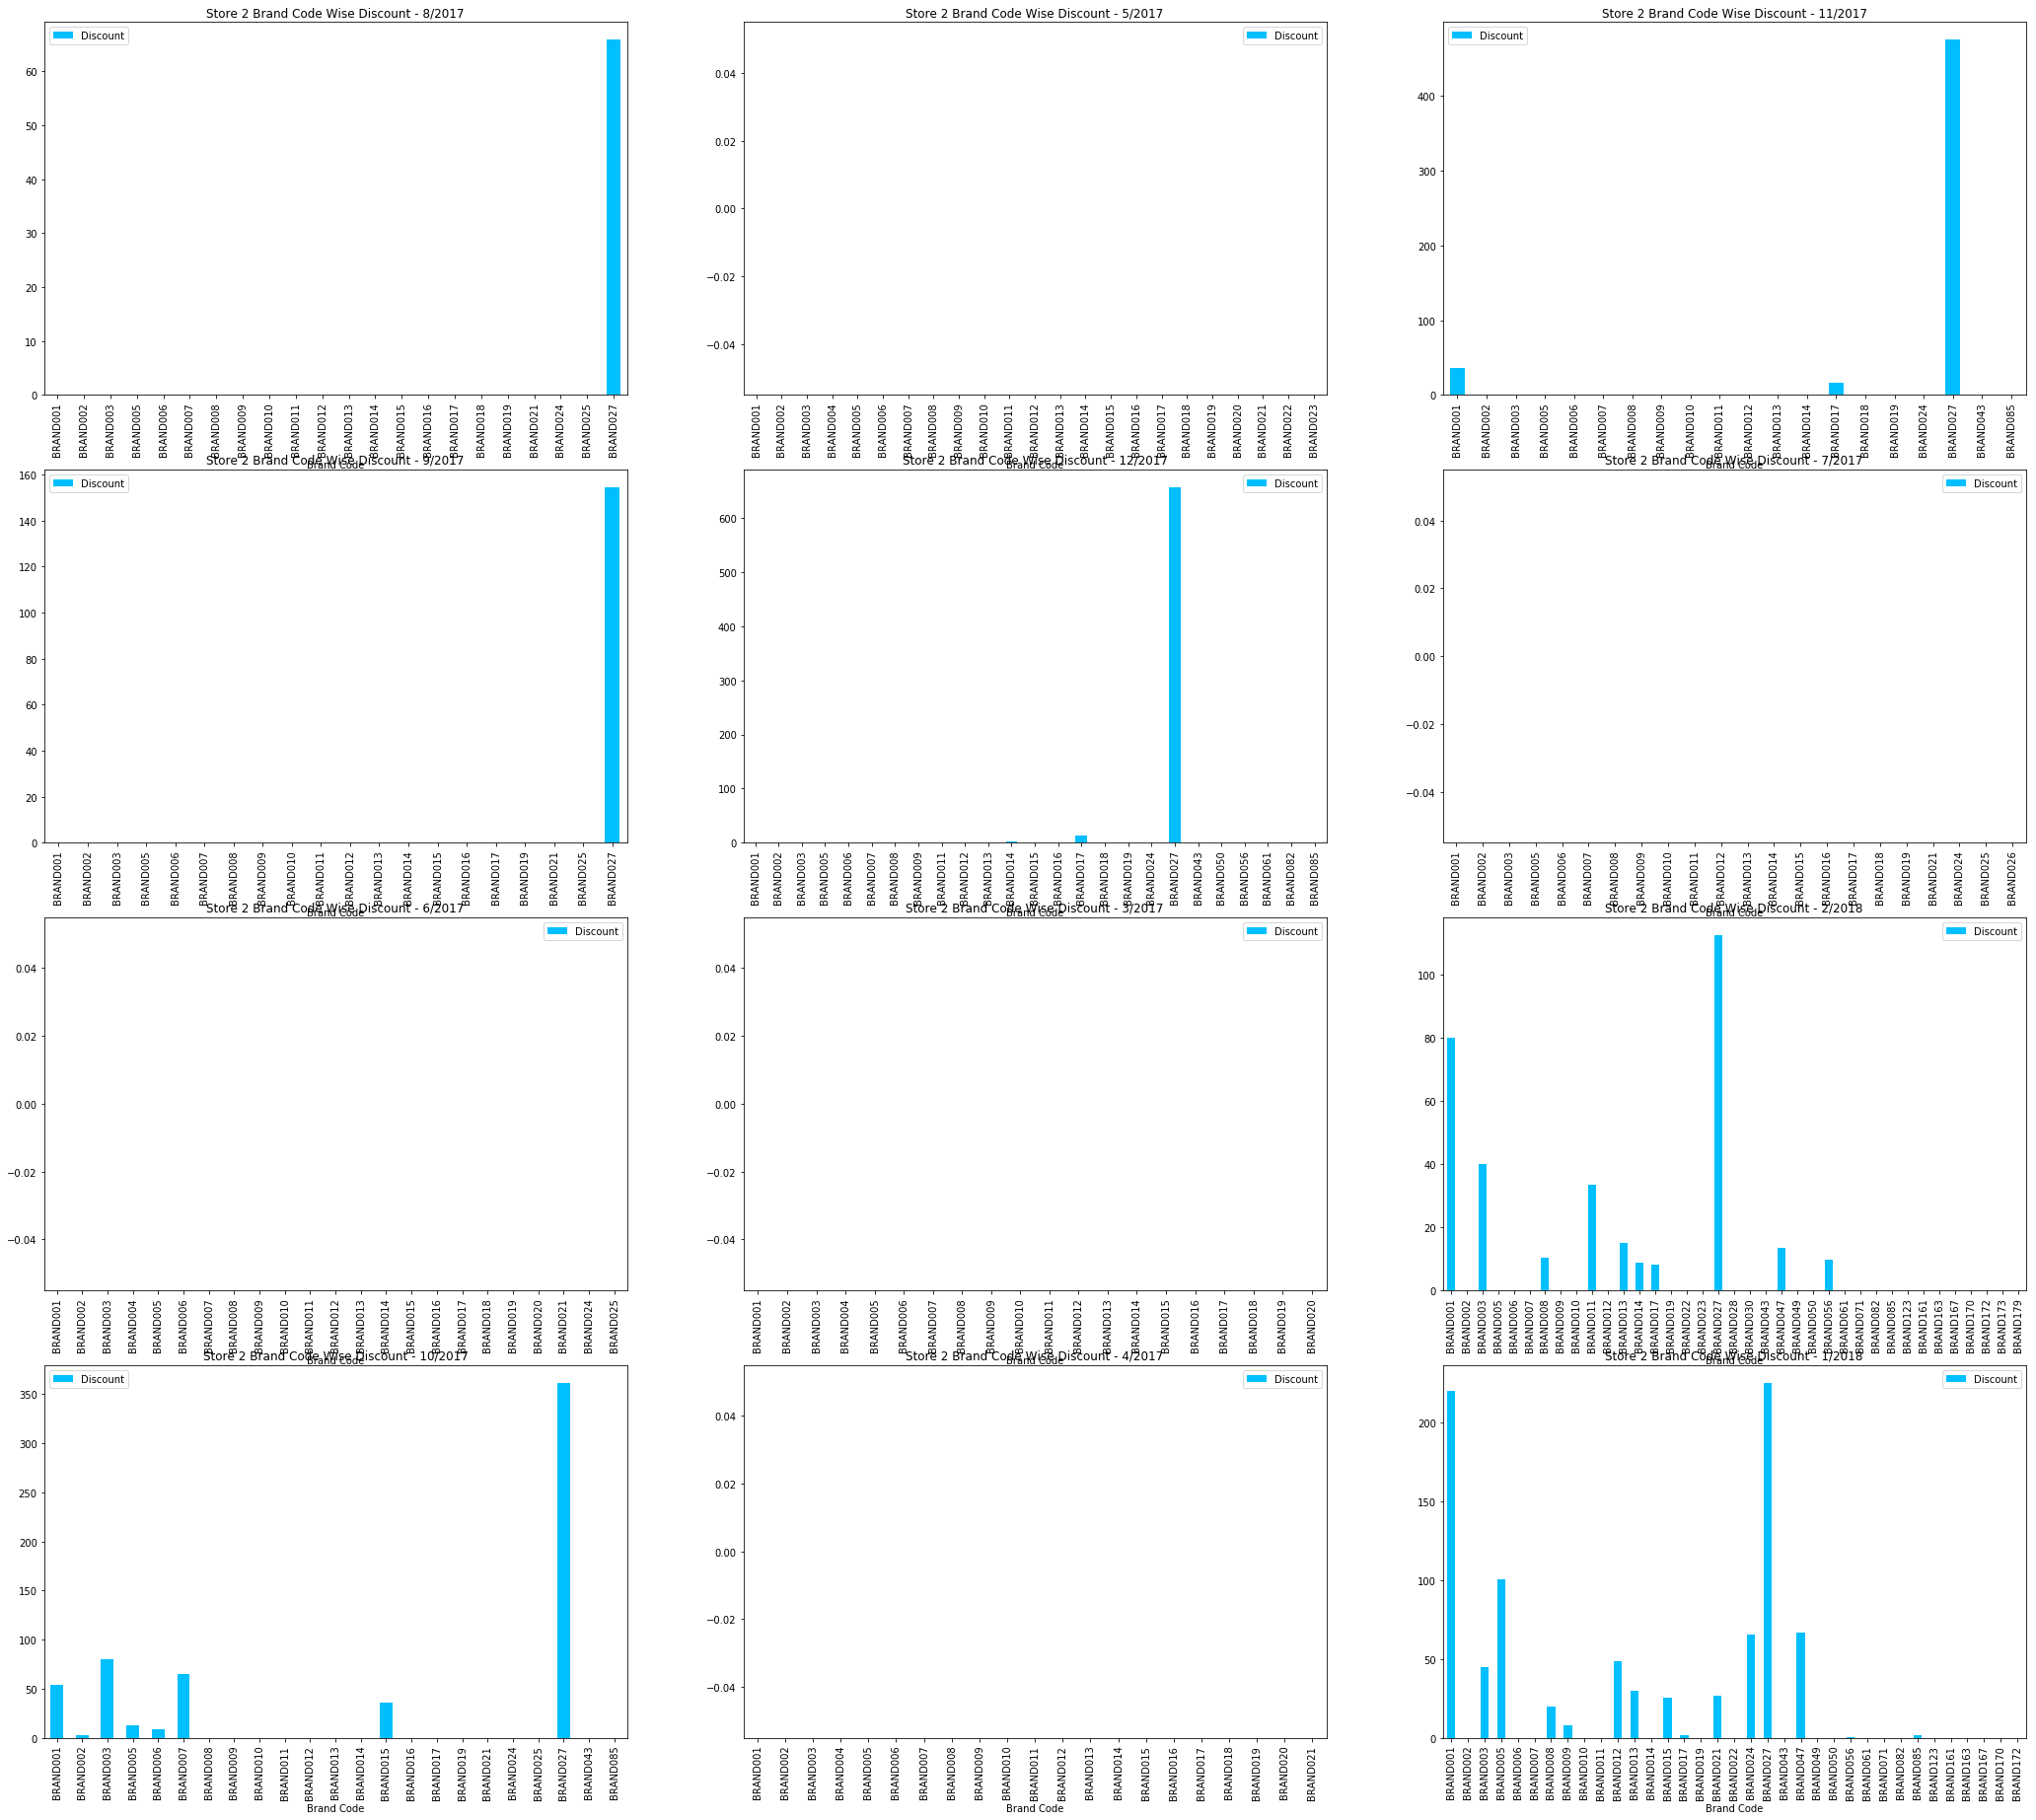

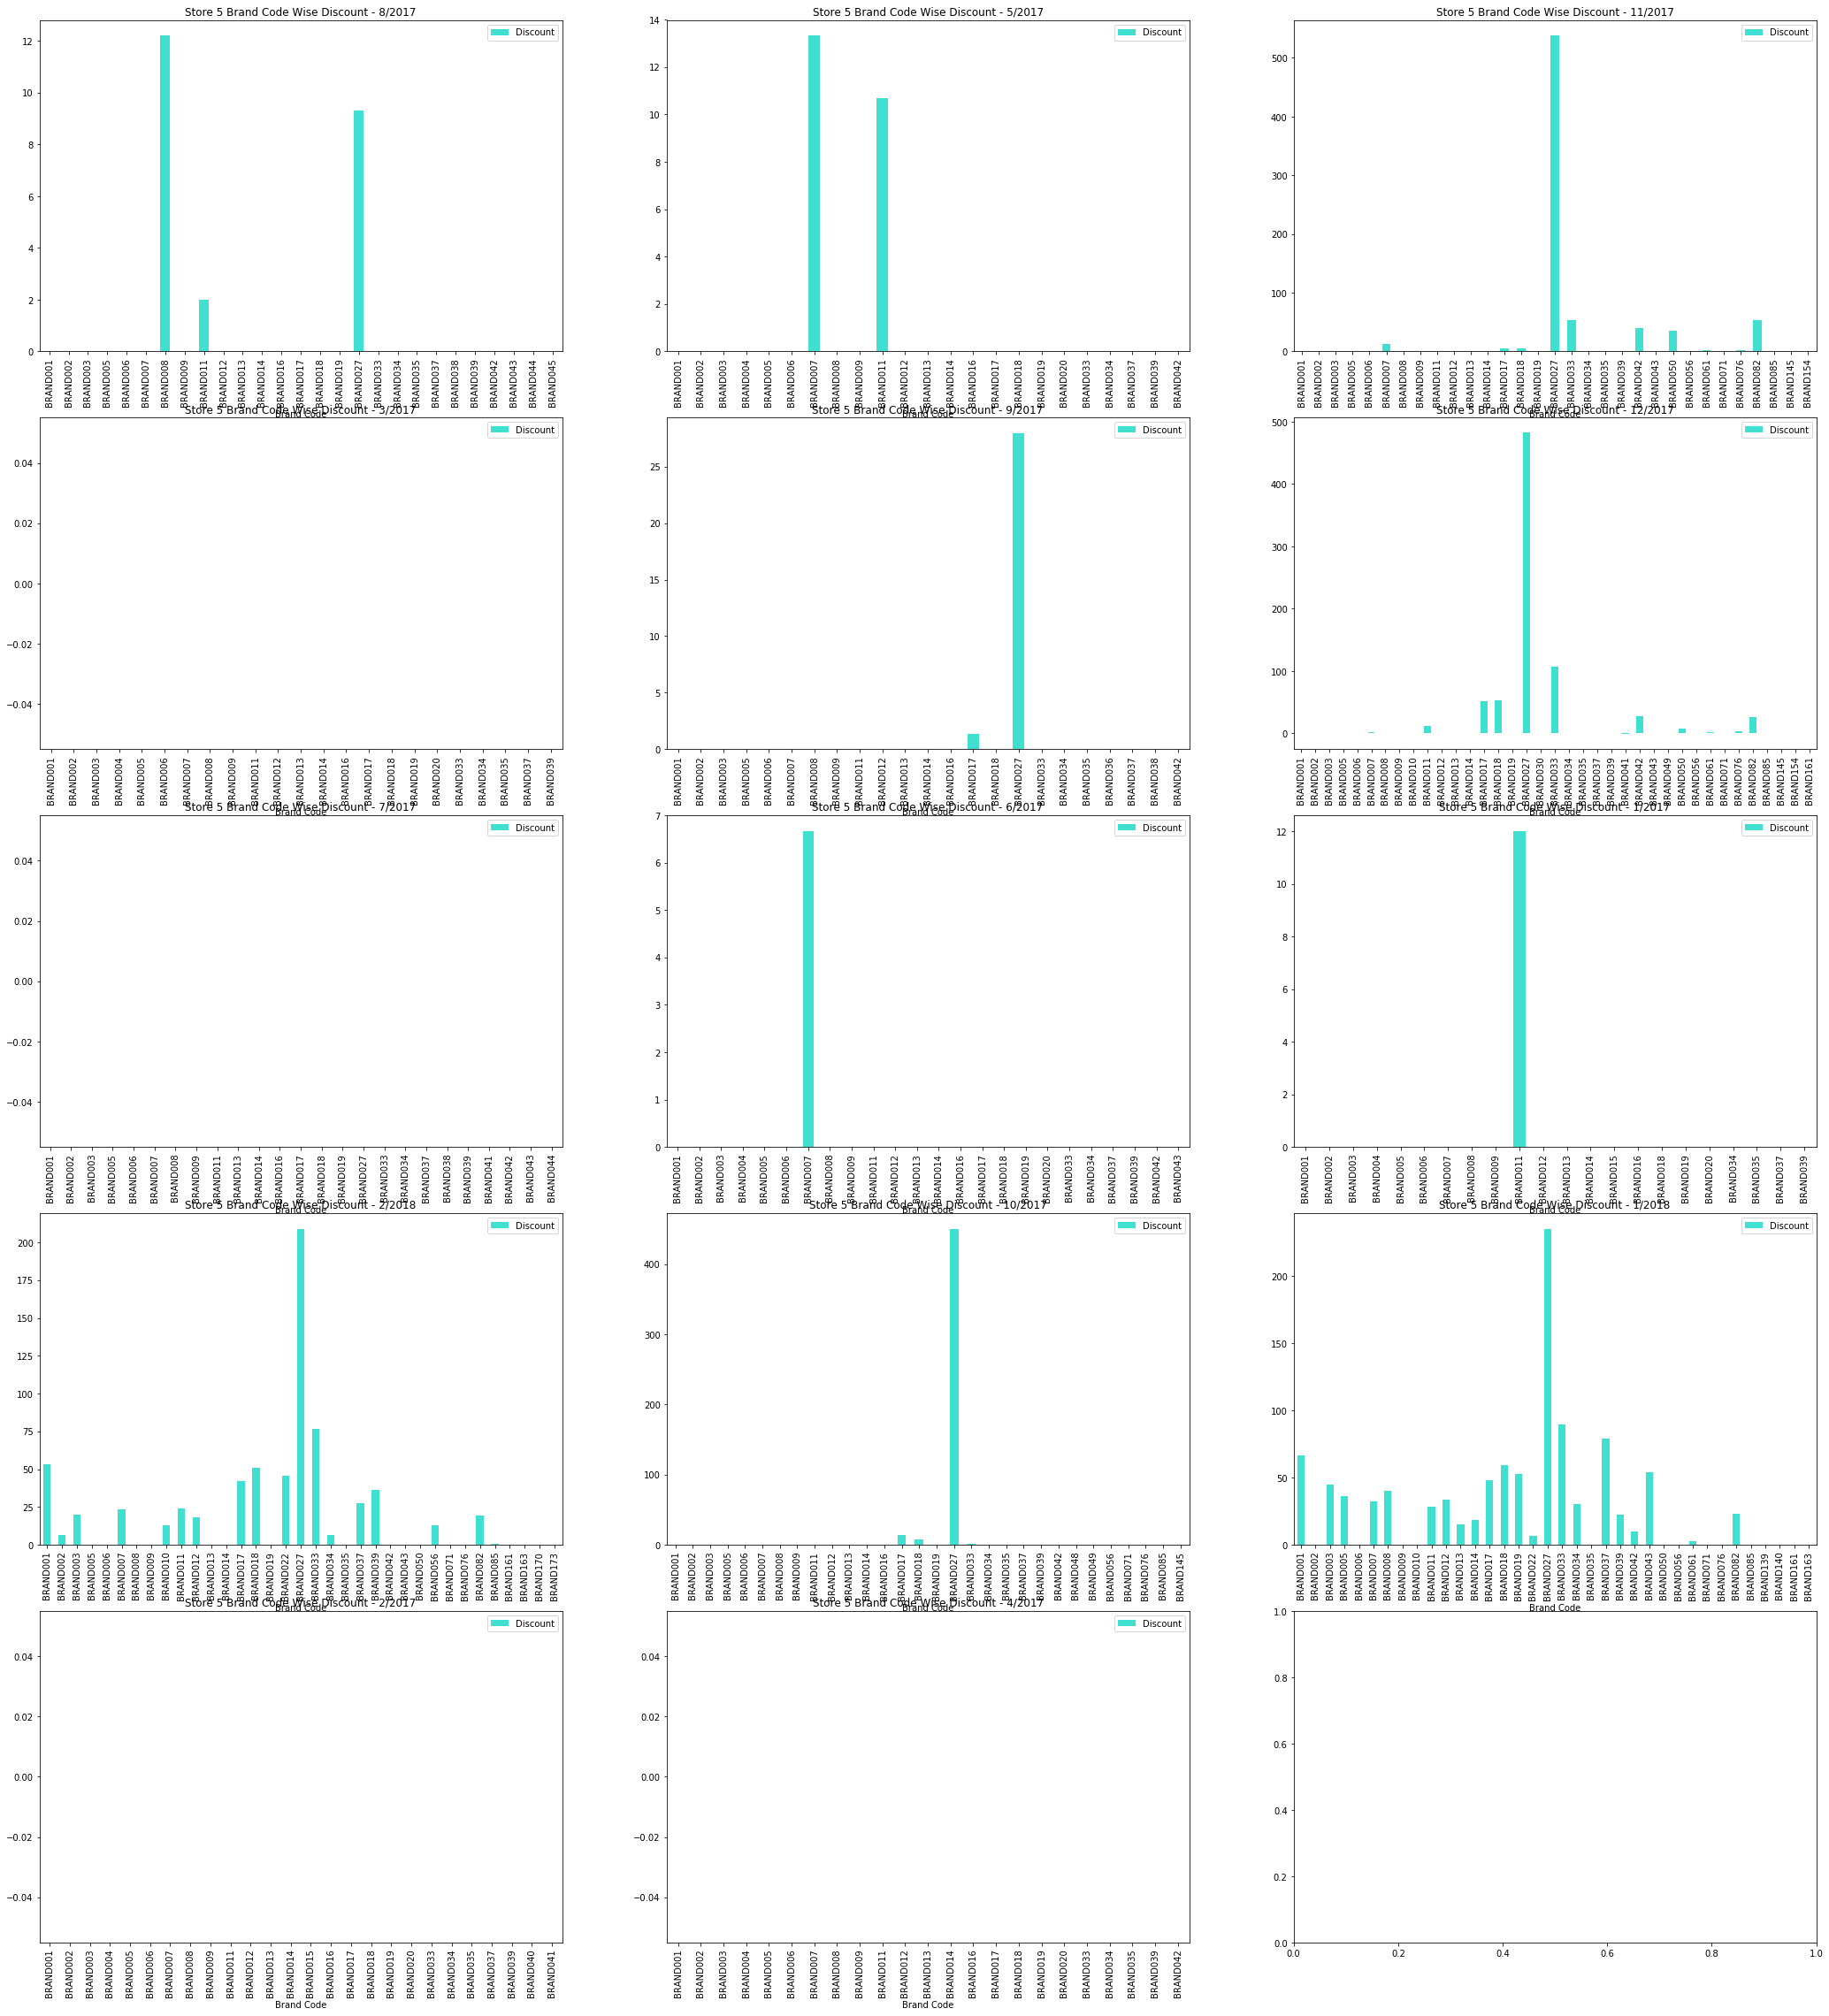

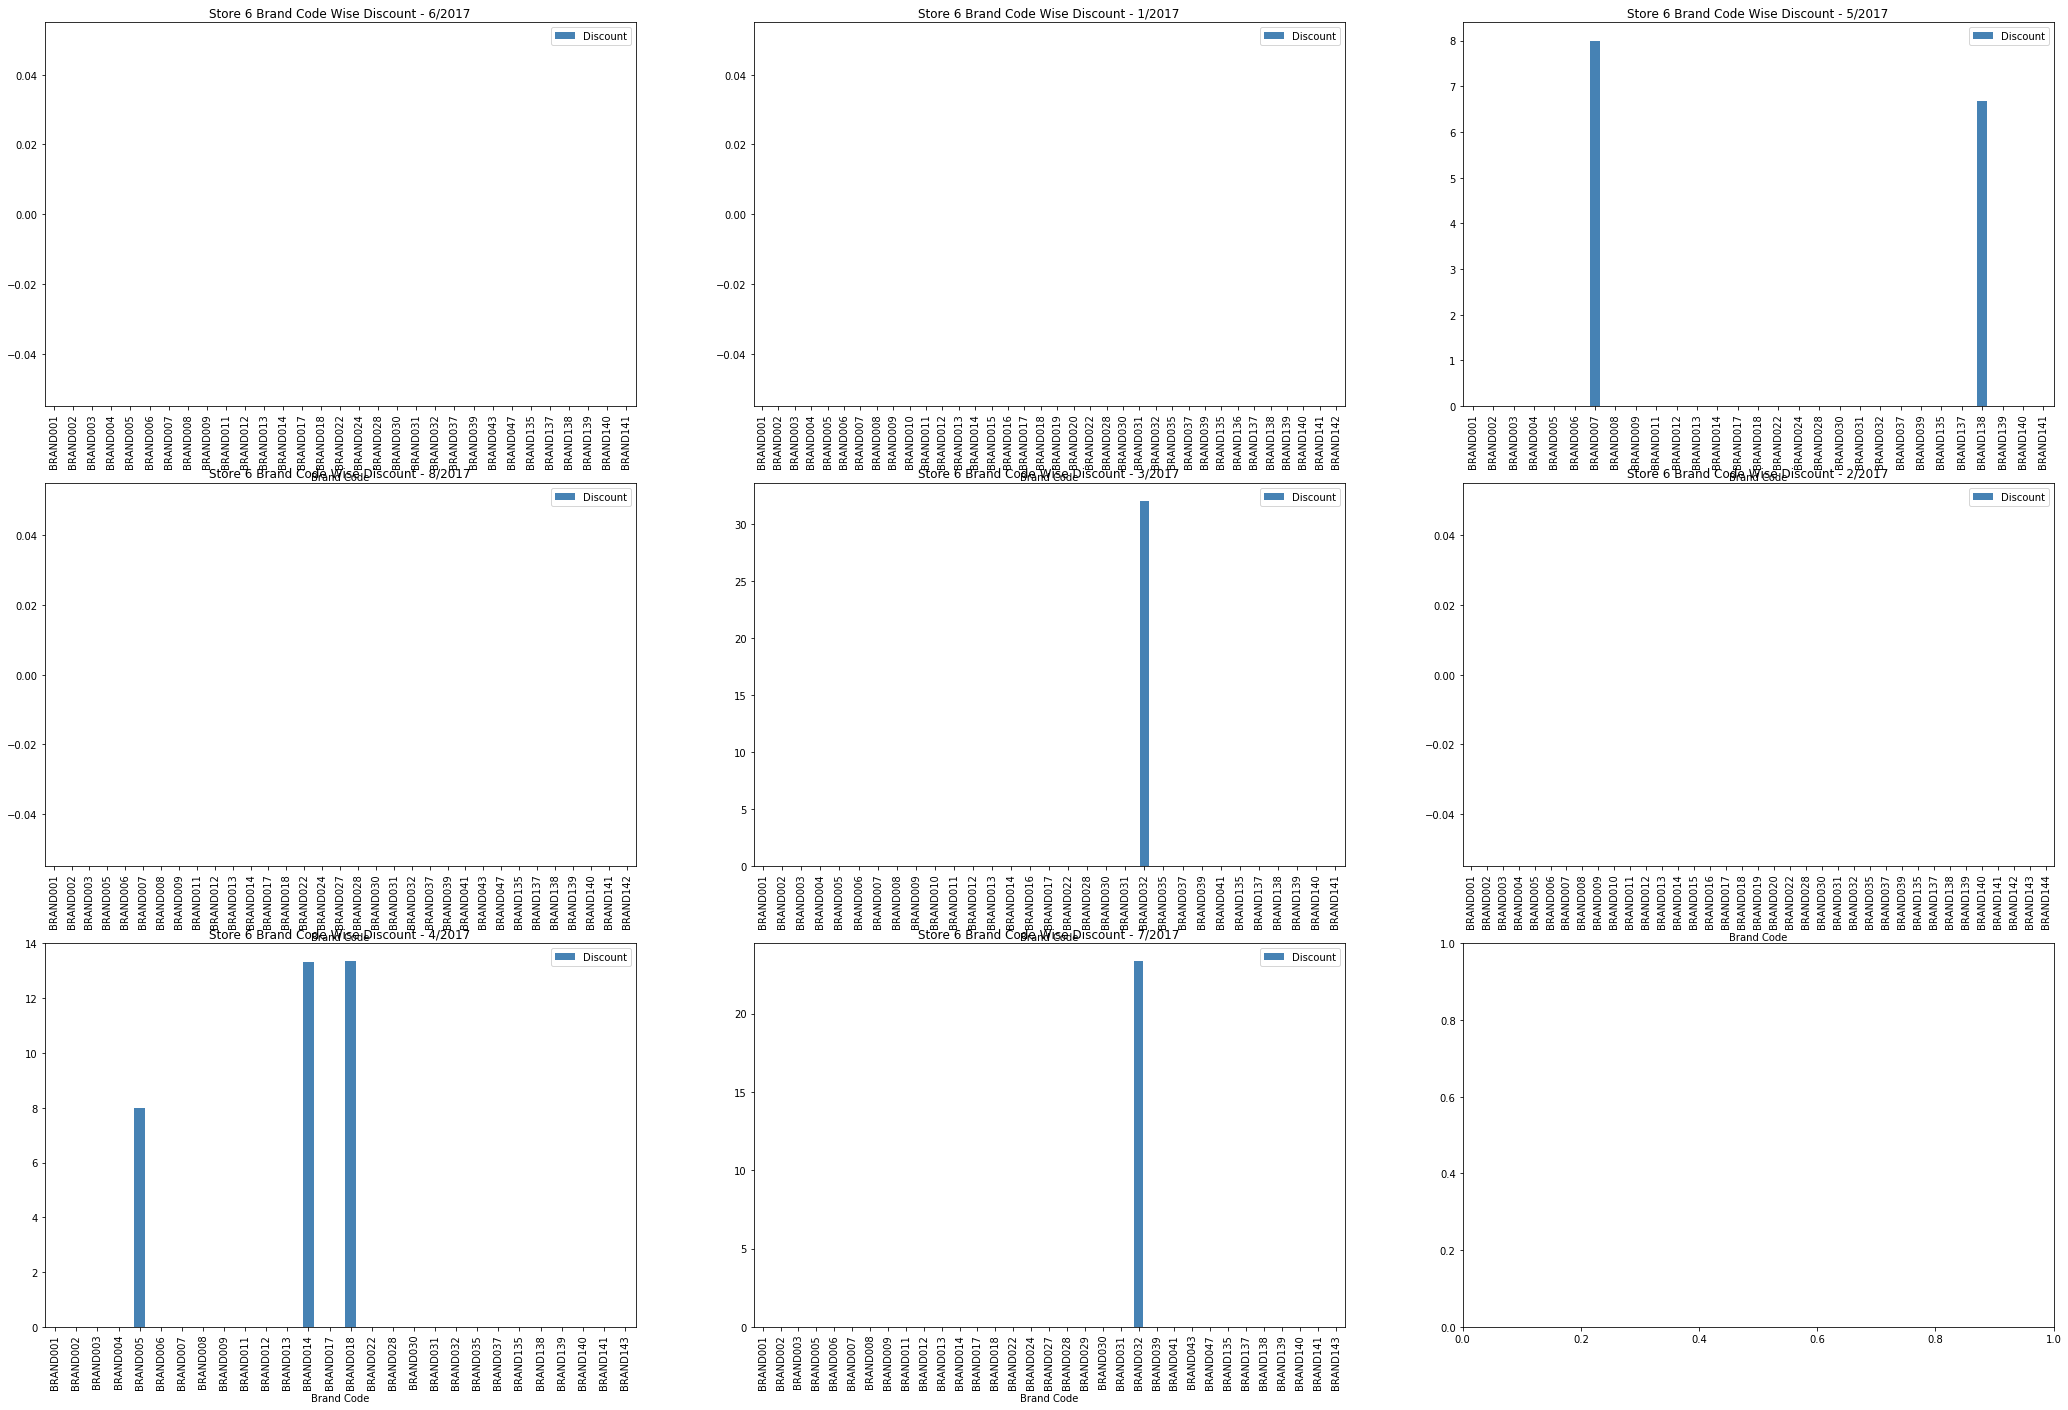

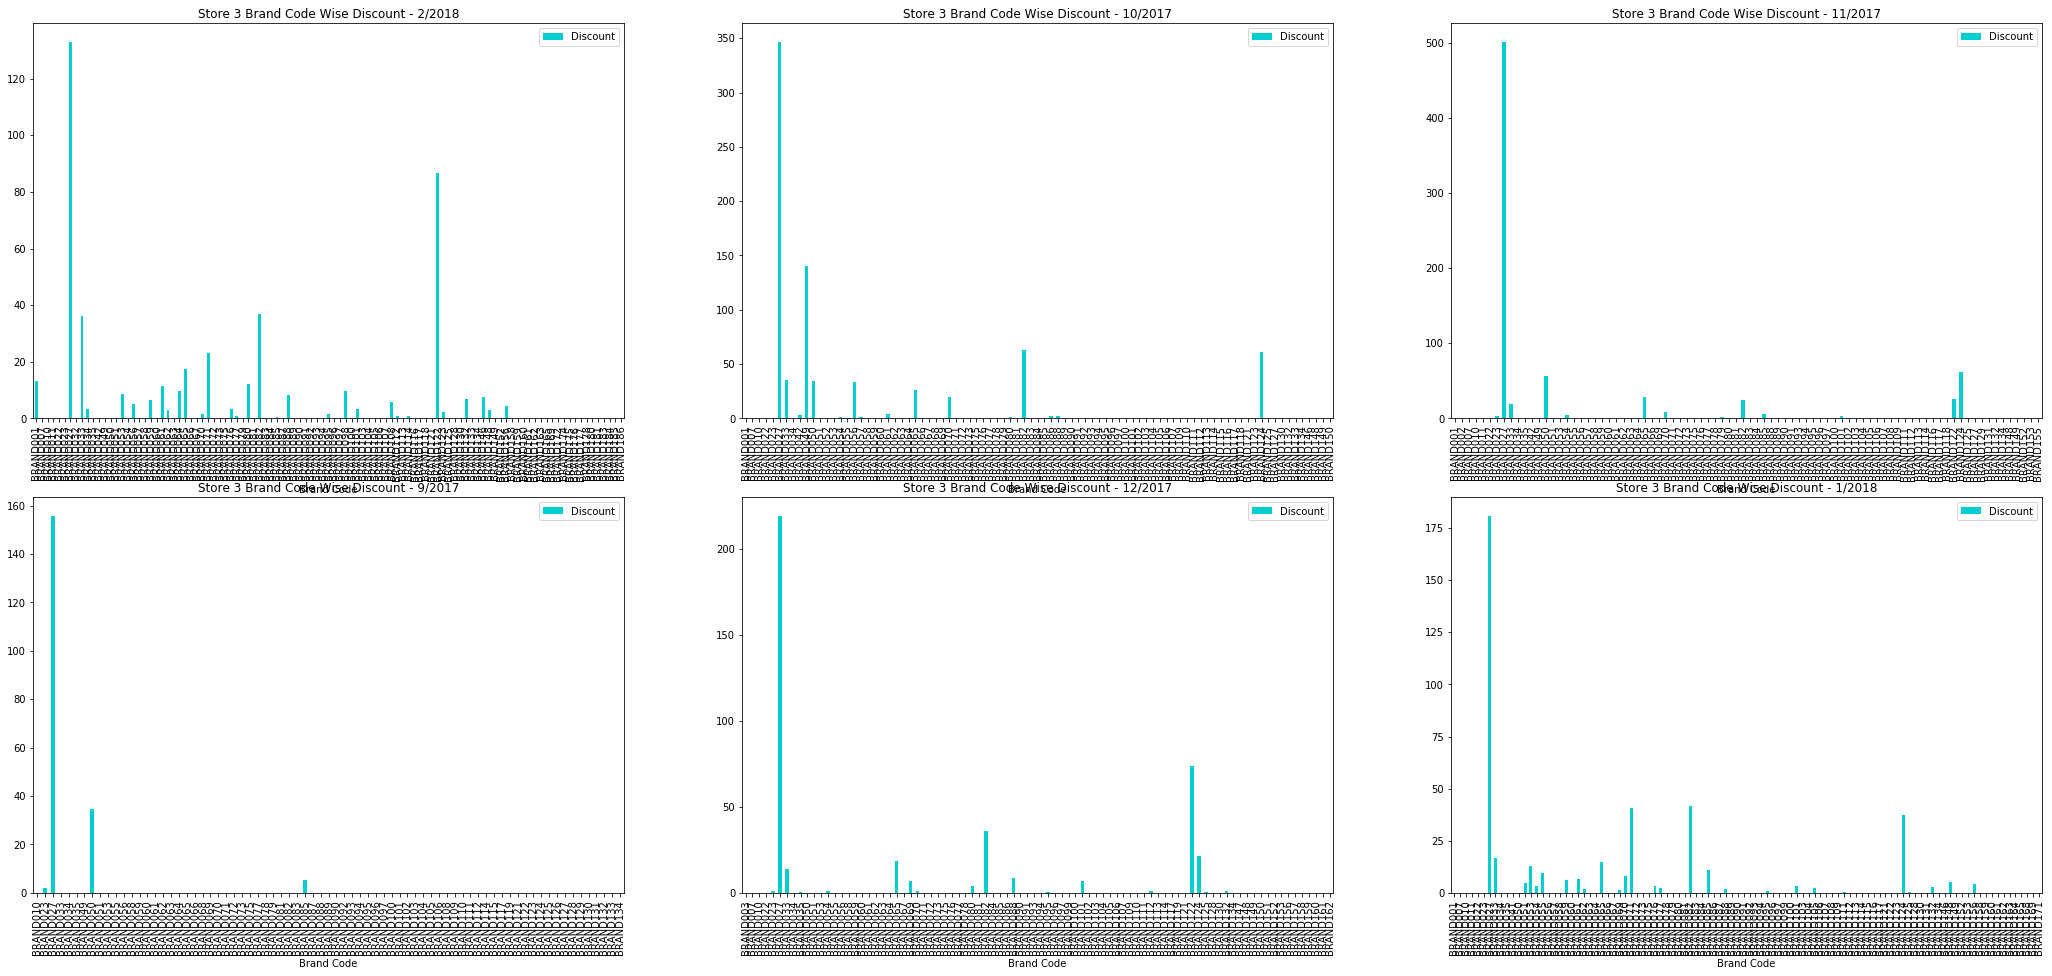

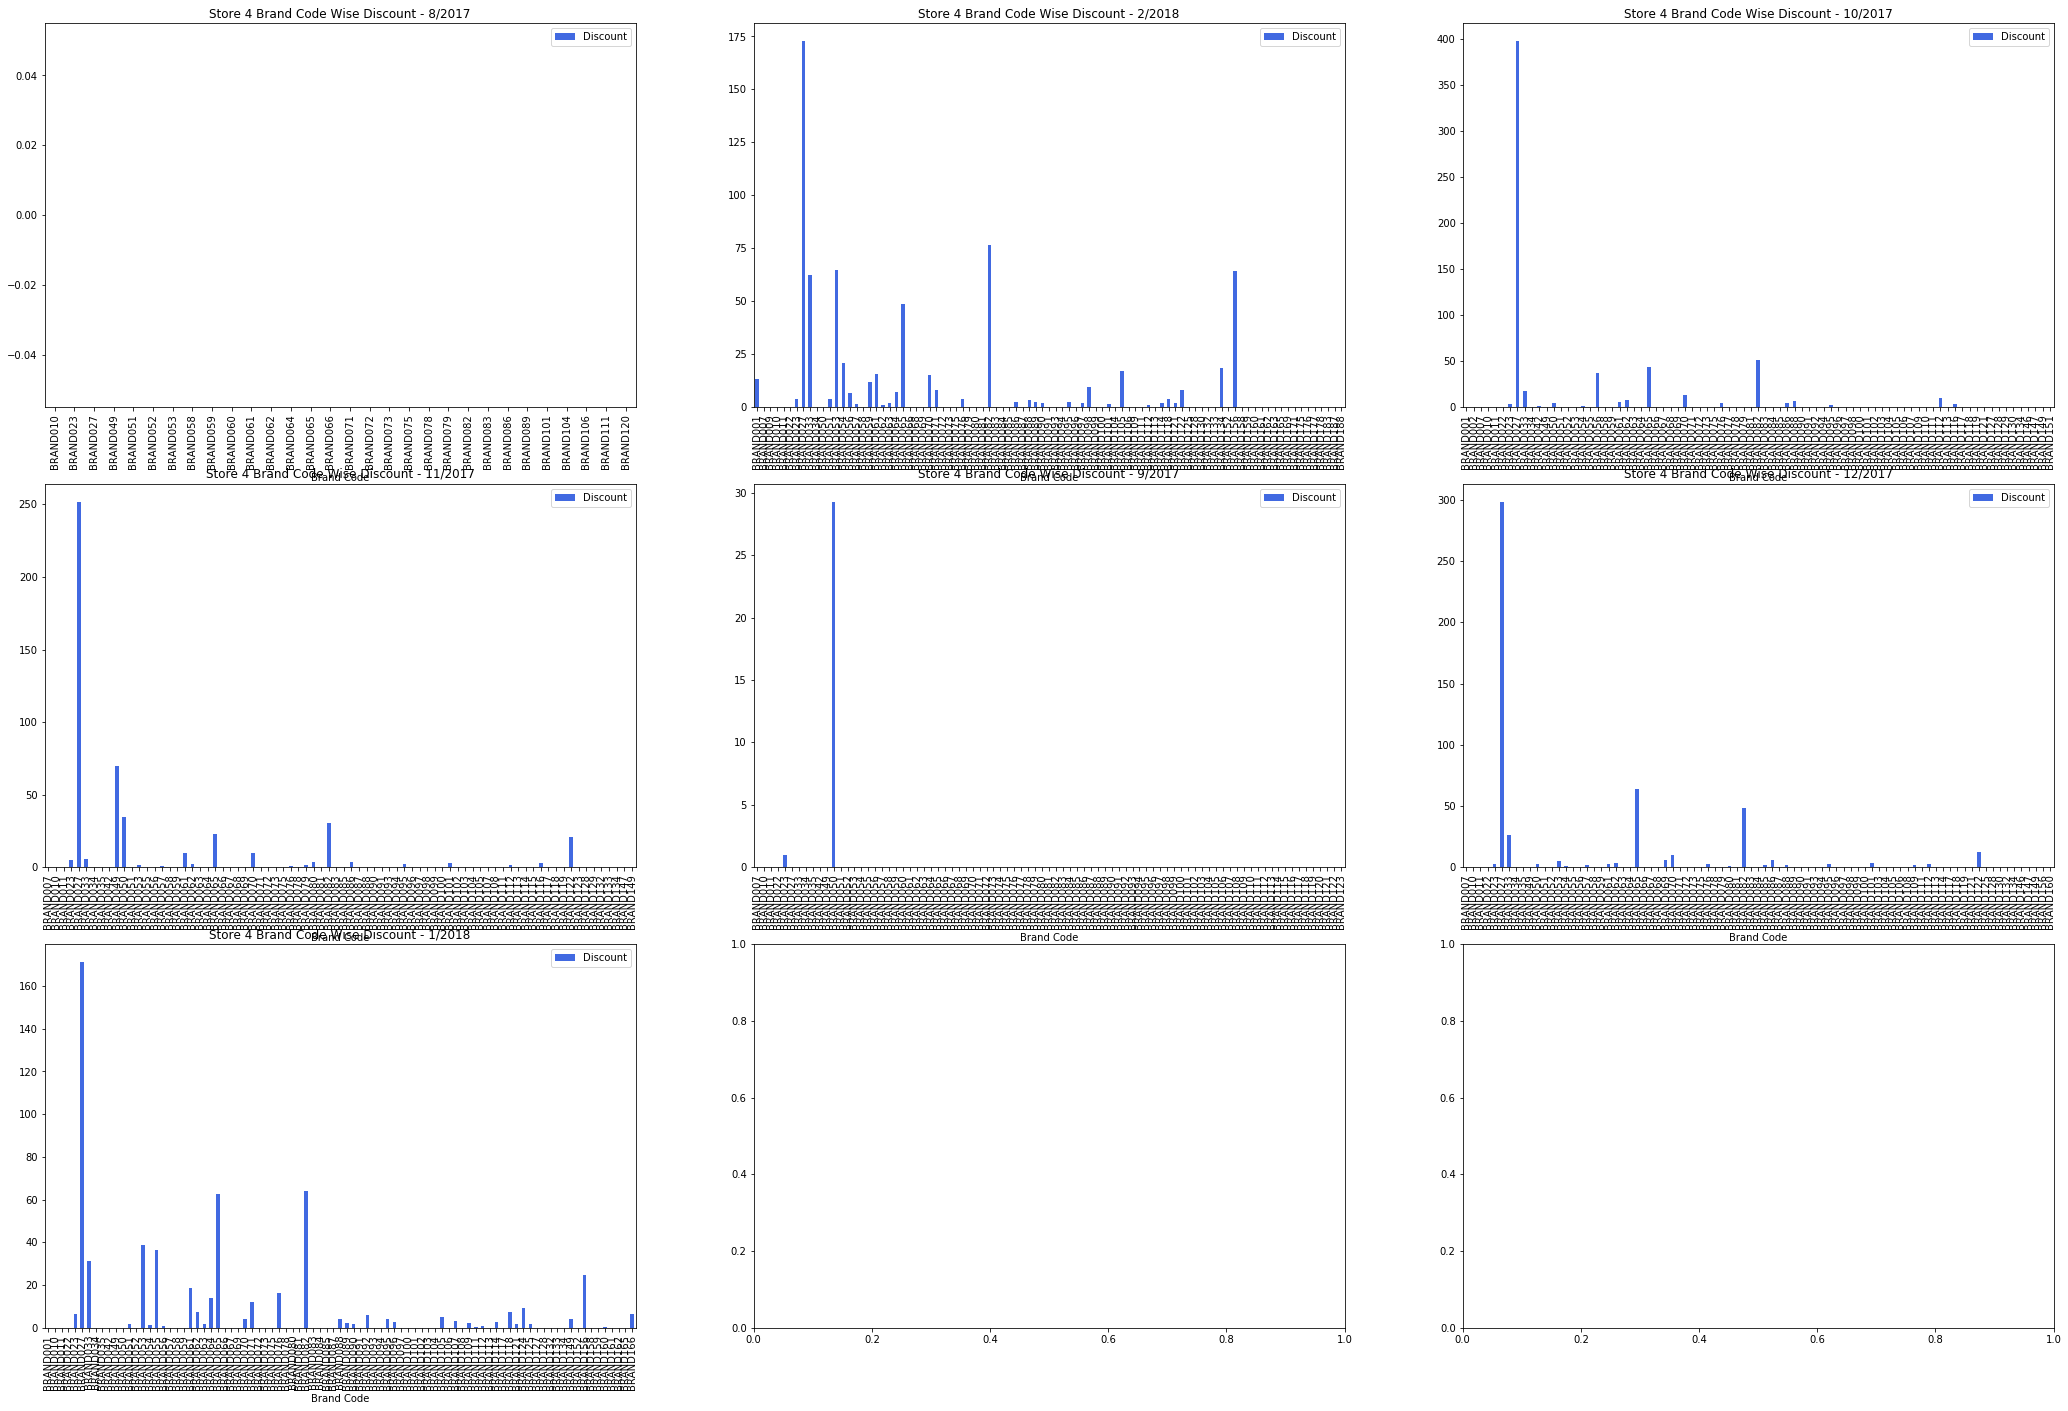

In [15]:
get_category_or_brand_wise_metrics_per_month_plots(data['disc_metrics_deep'], plot_kind='Brand Code', df_kind='Discount')

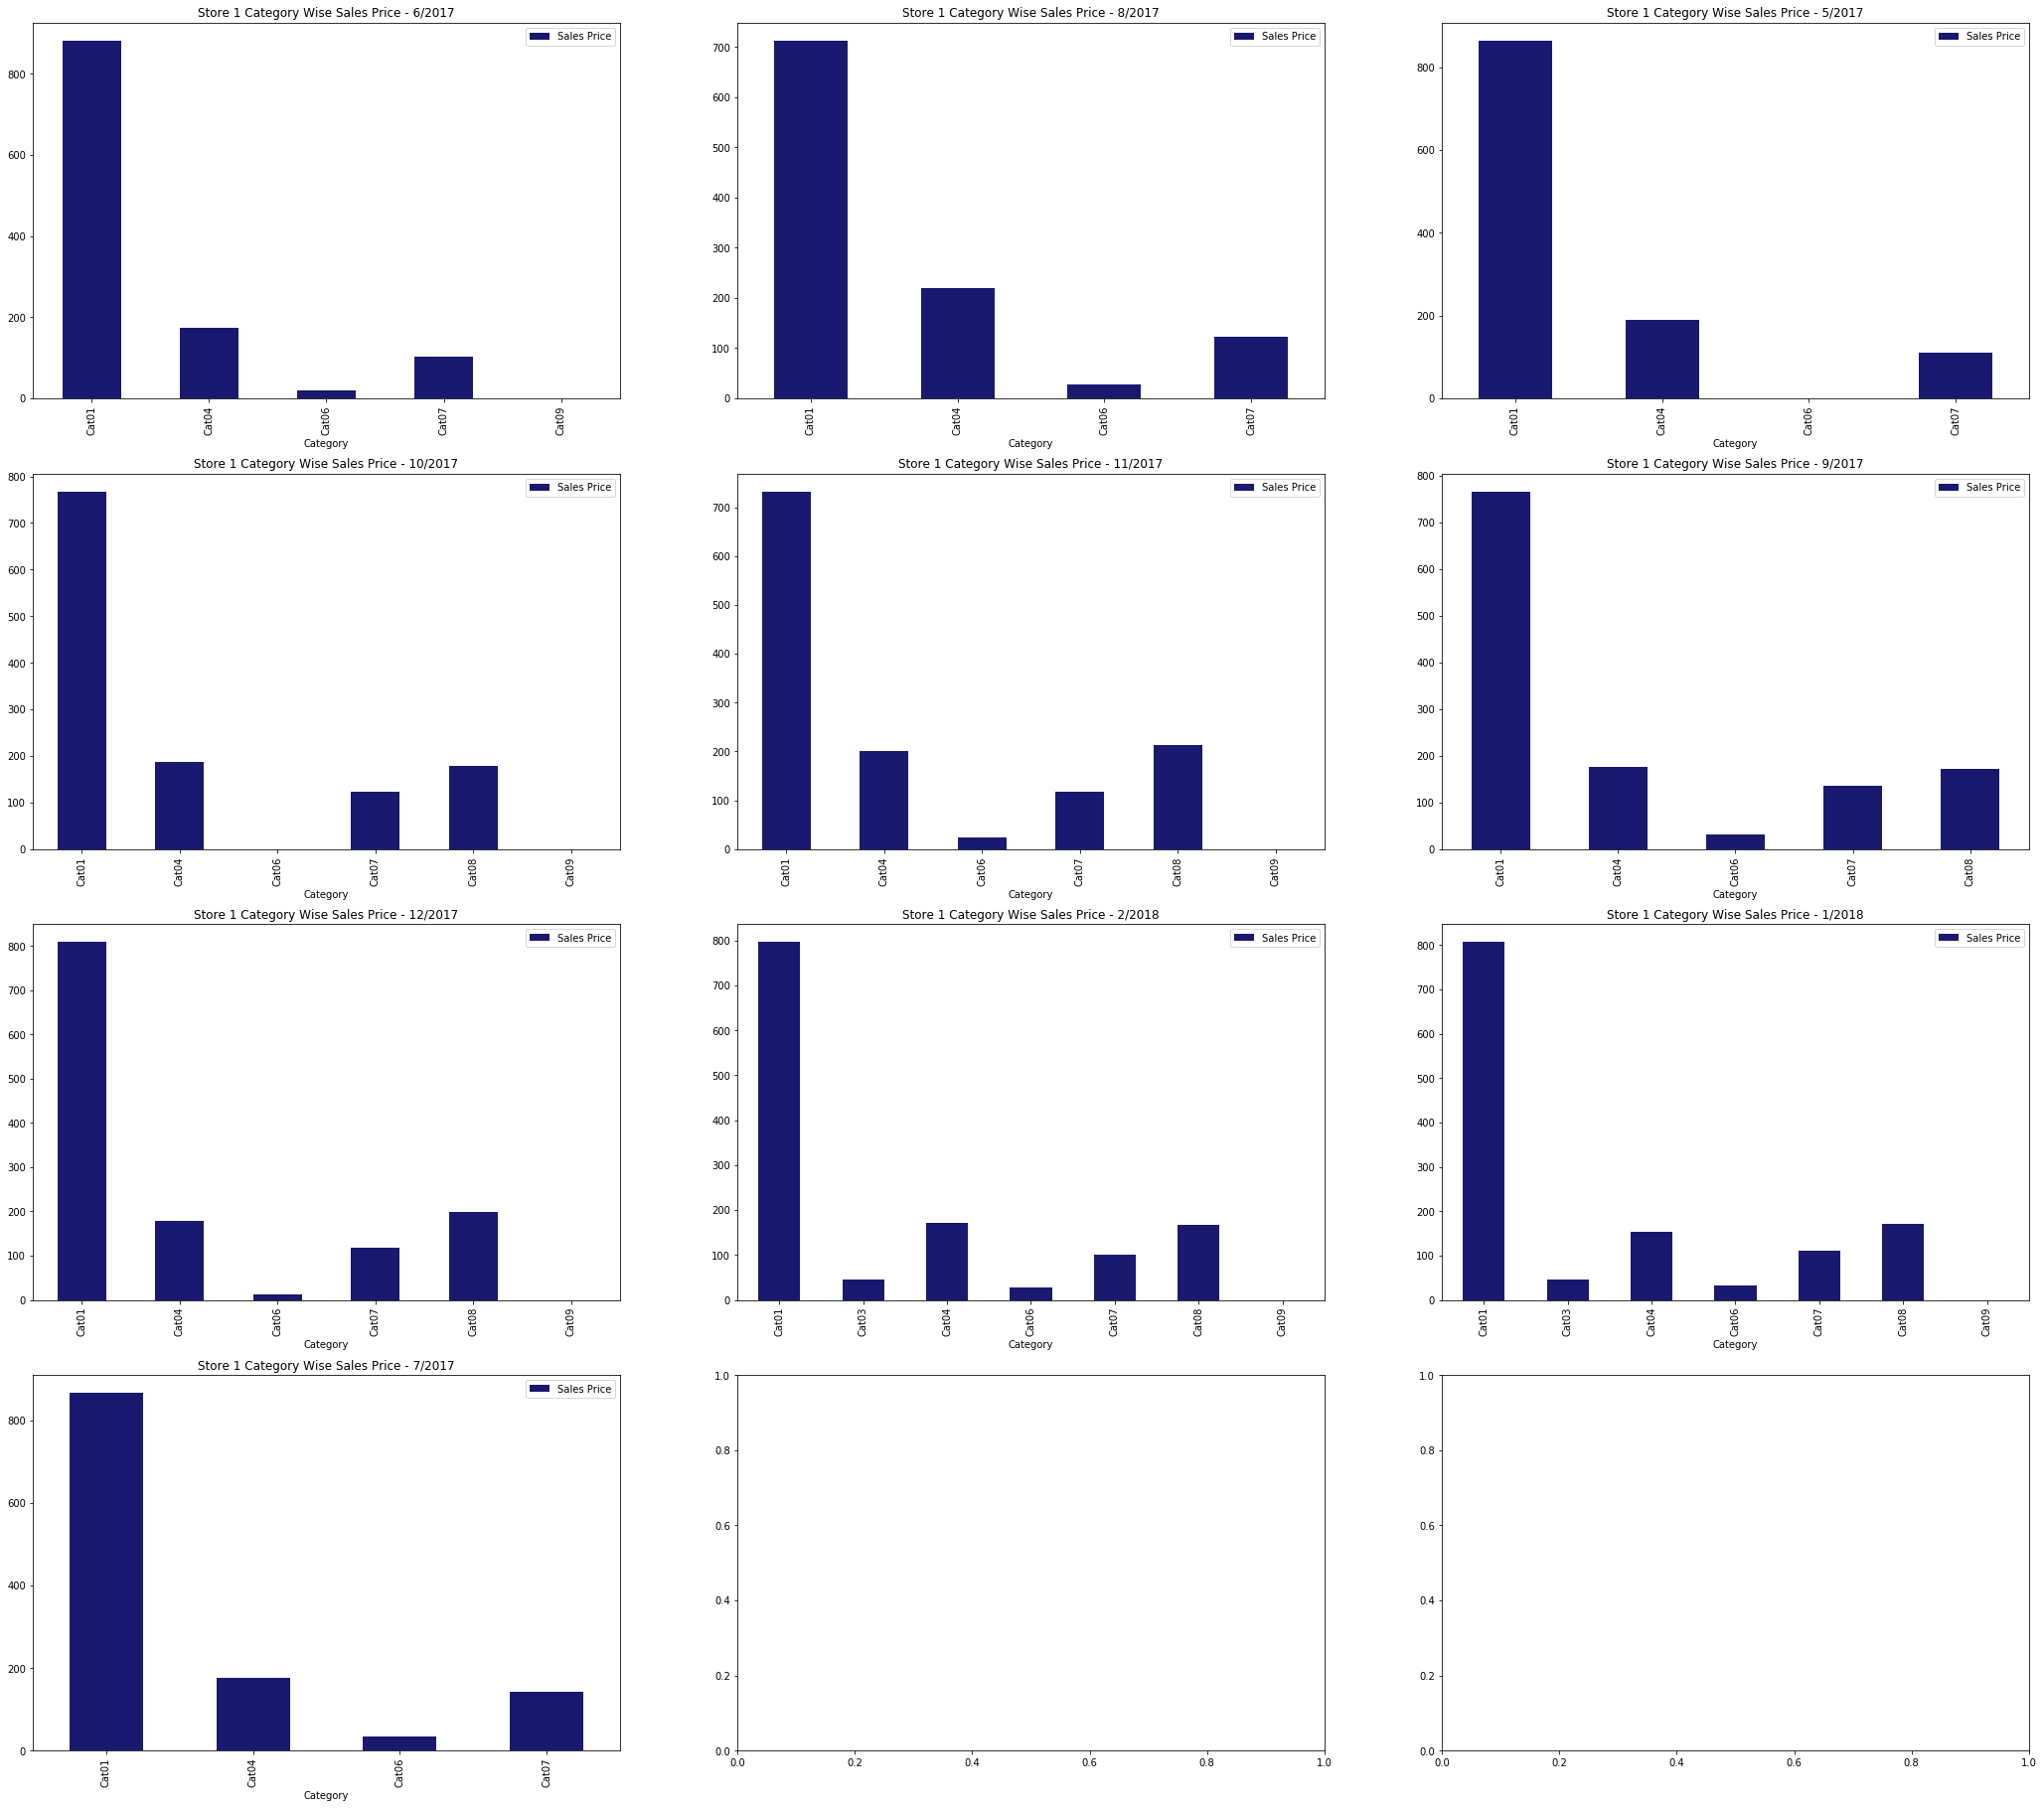

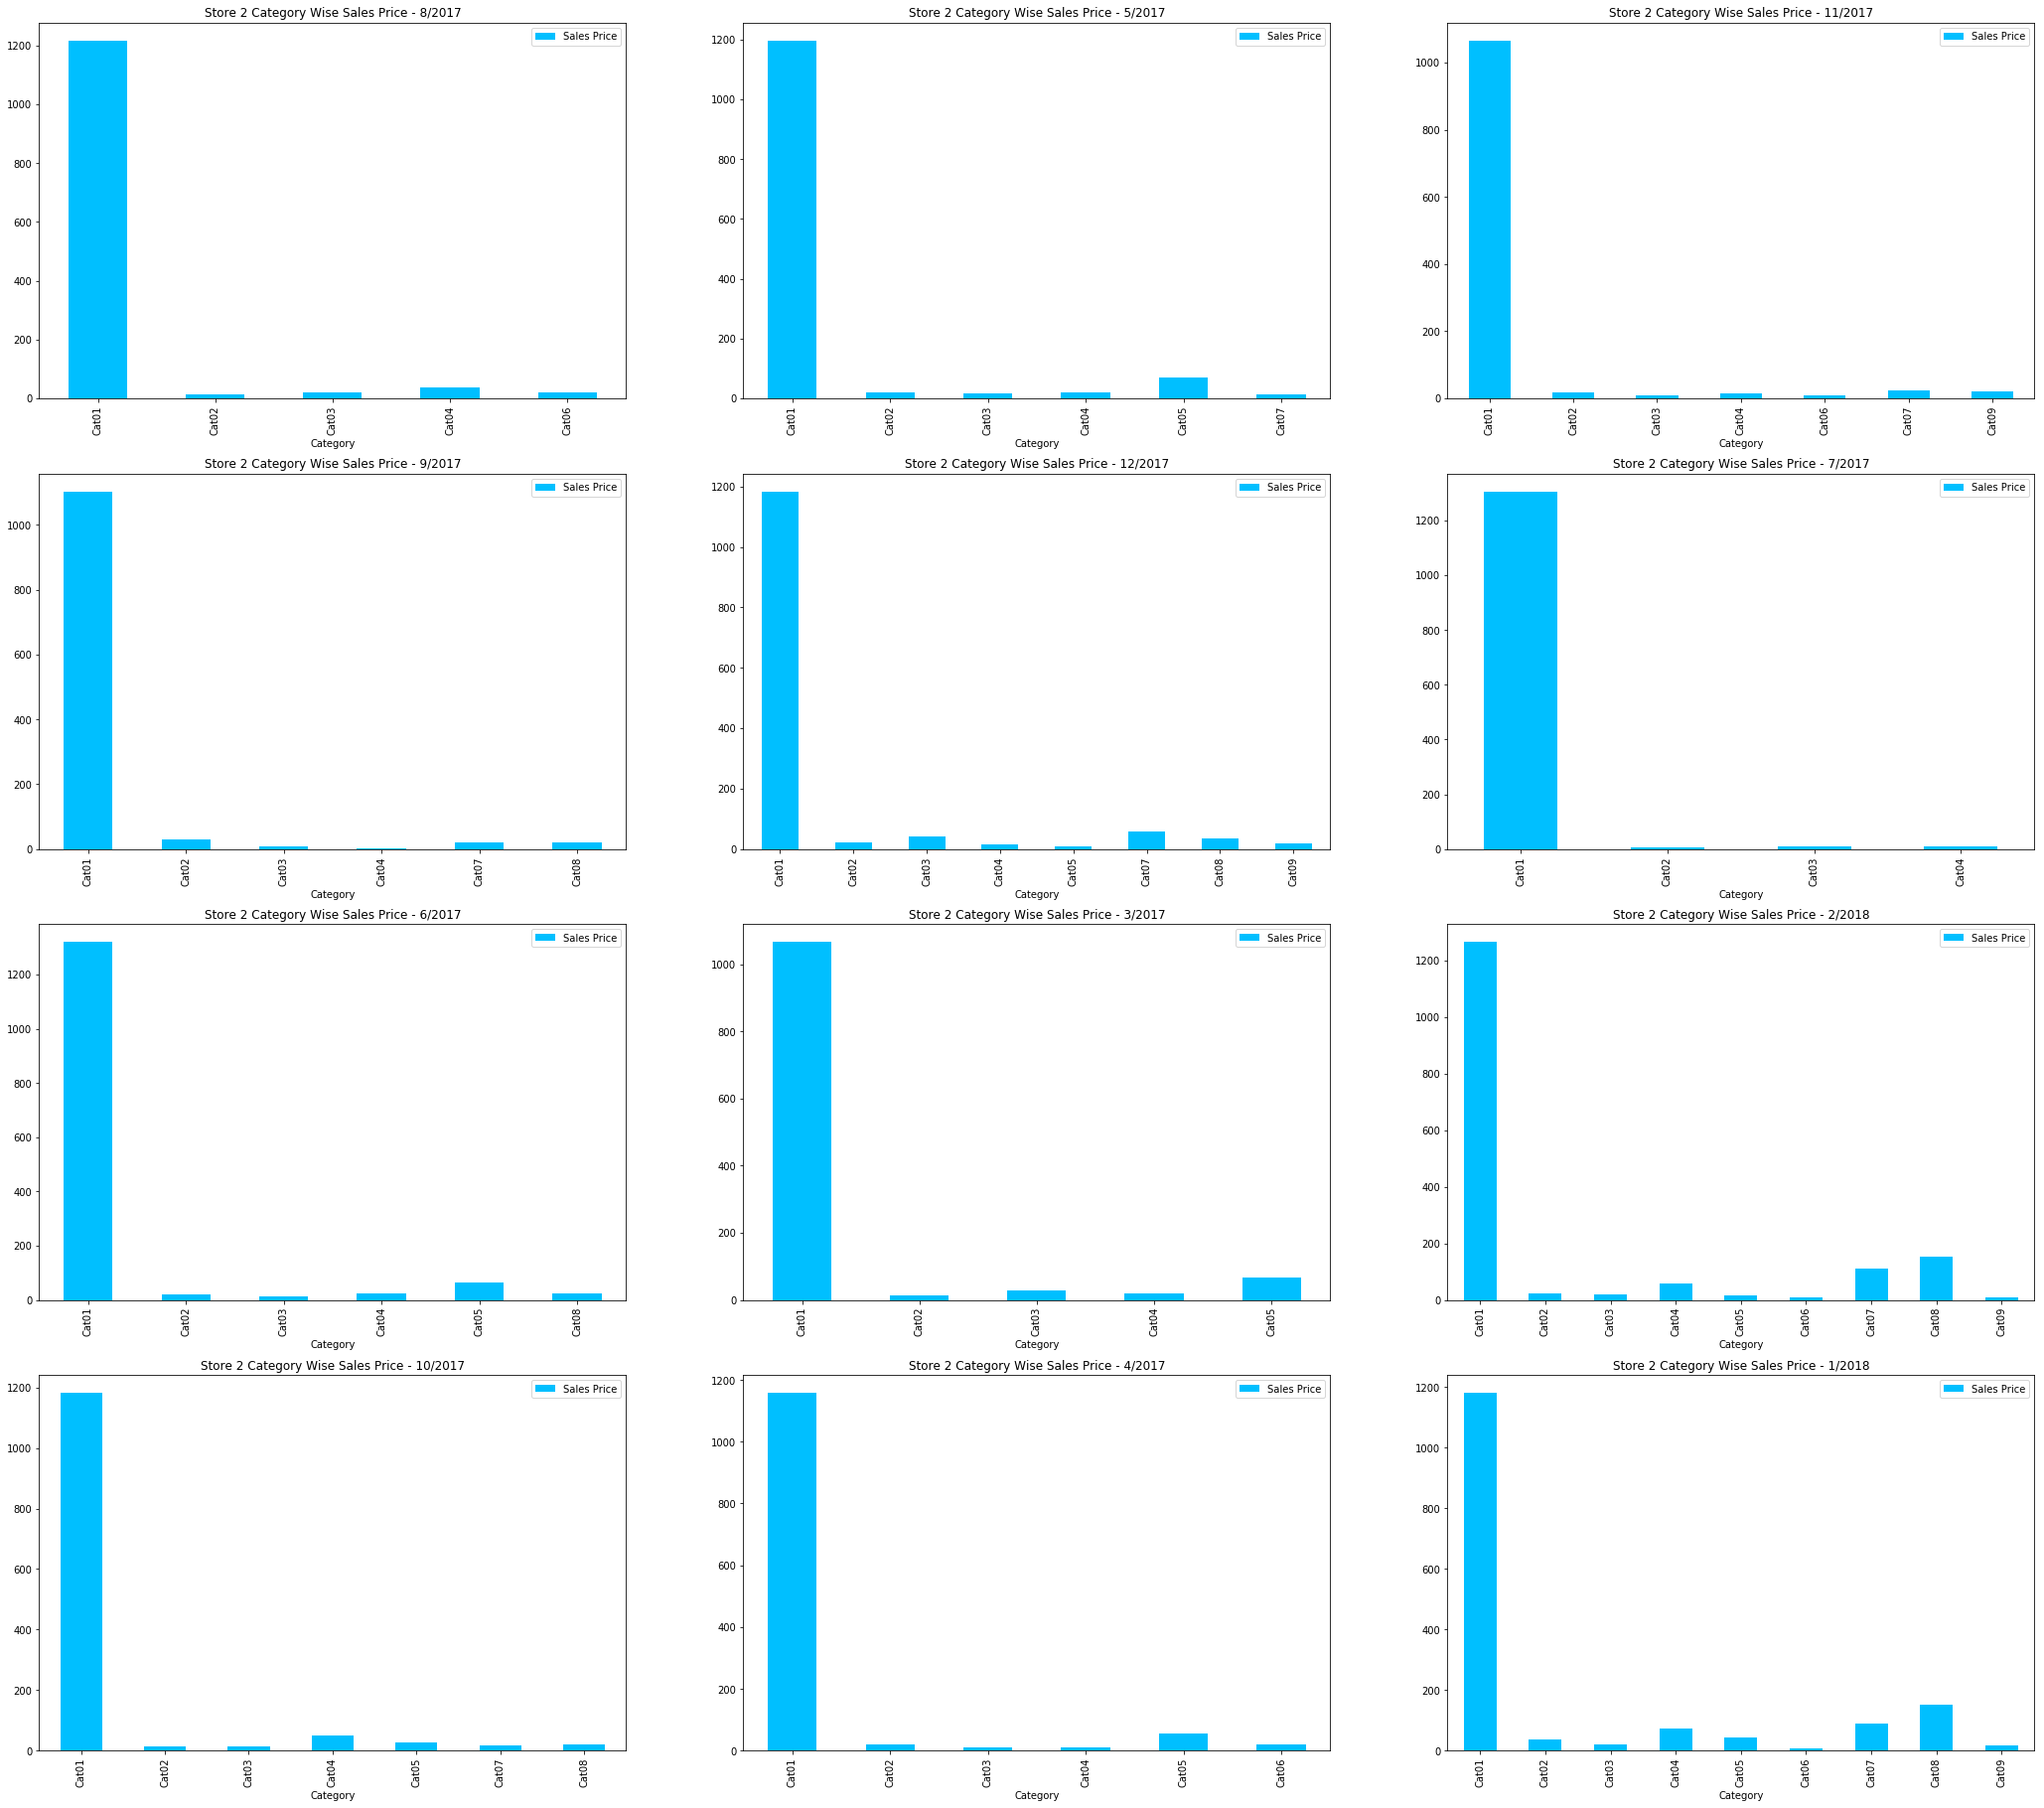

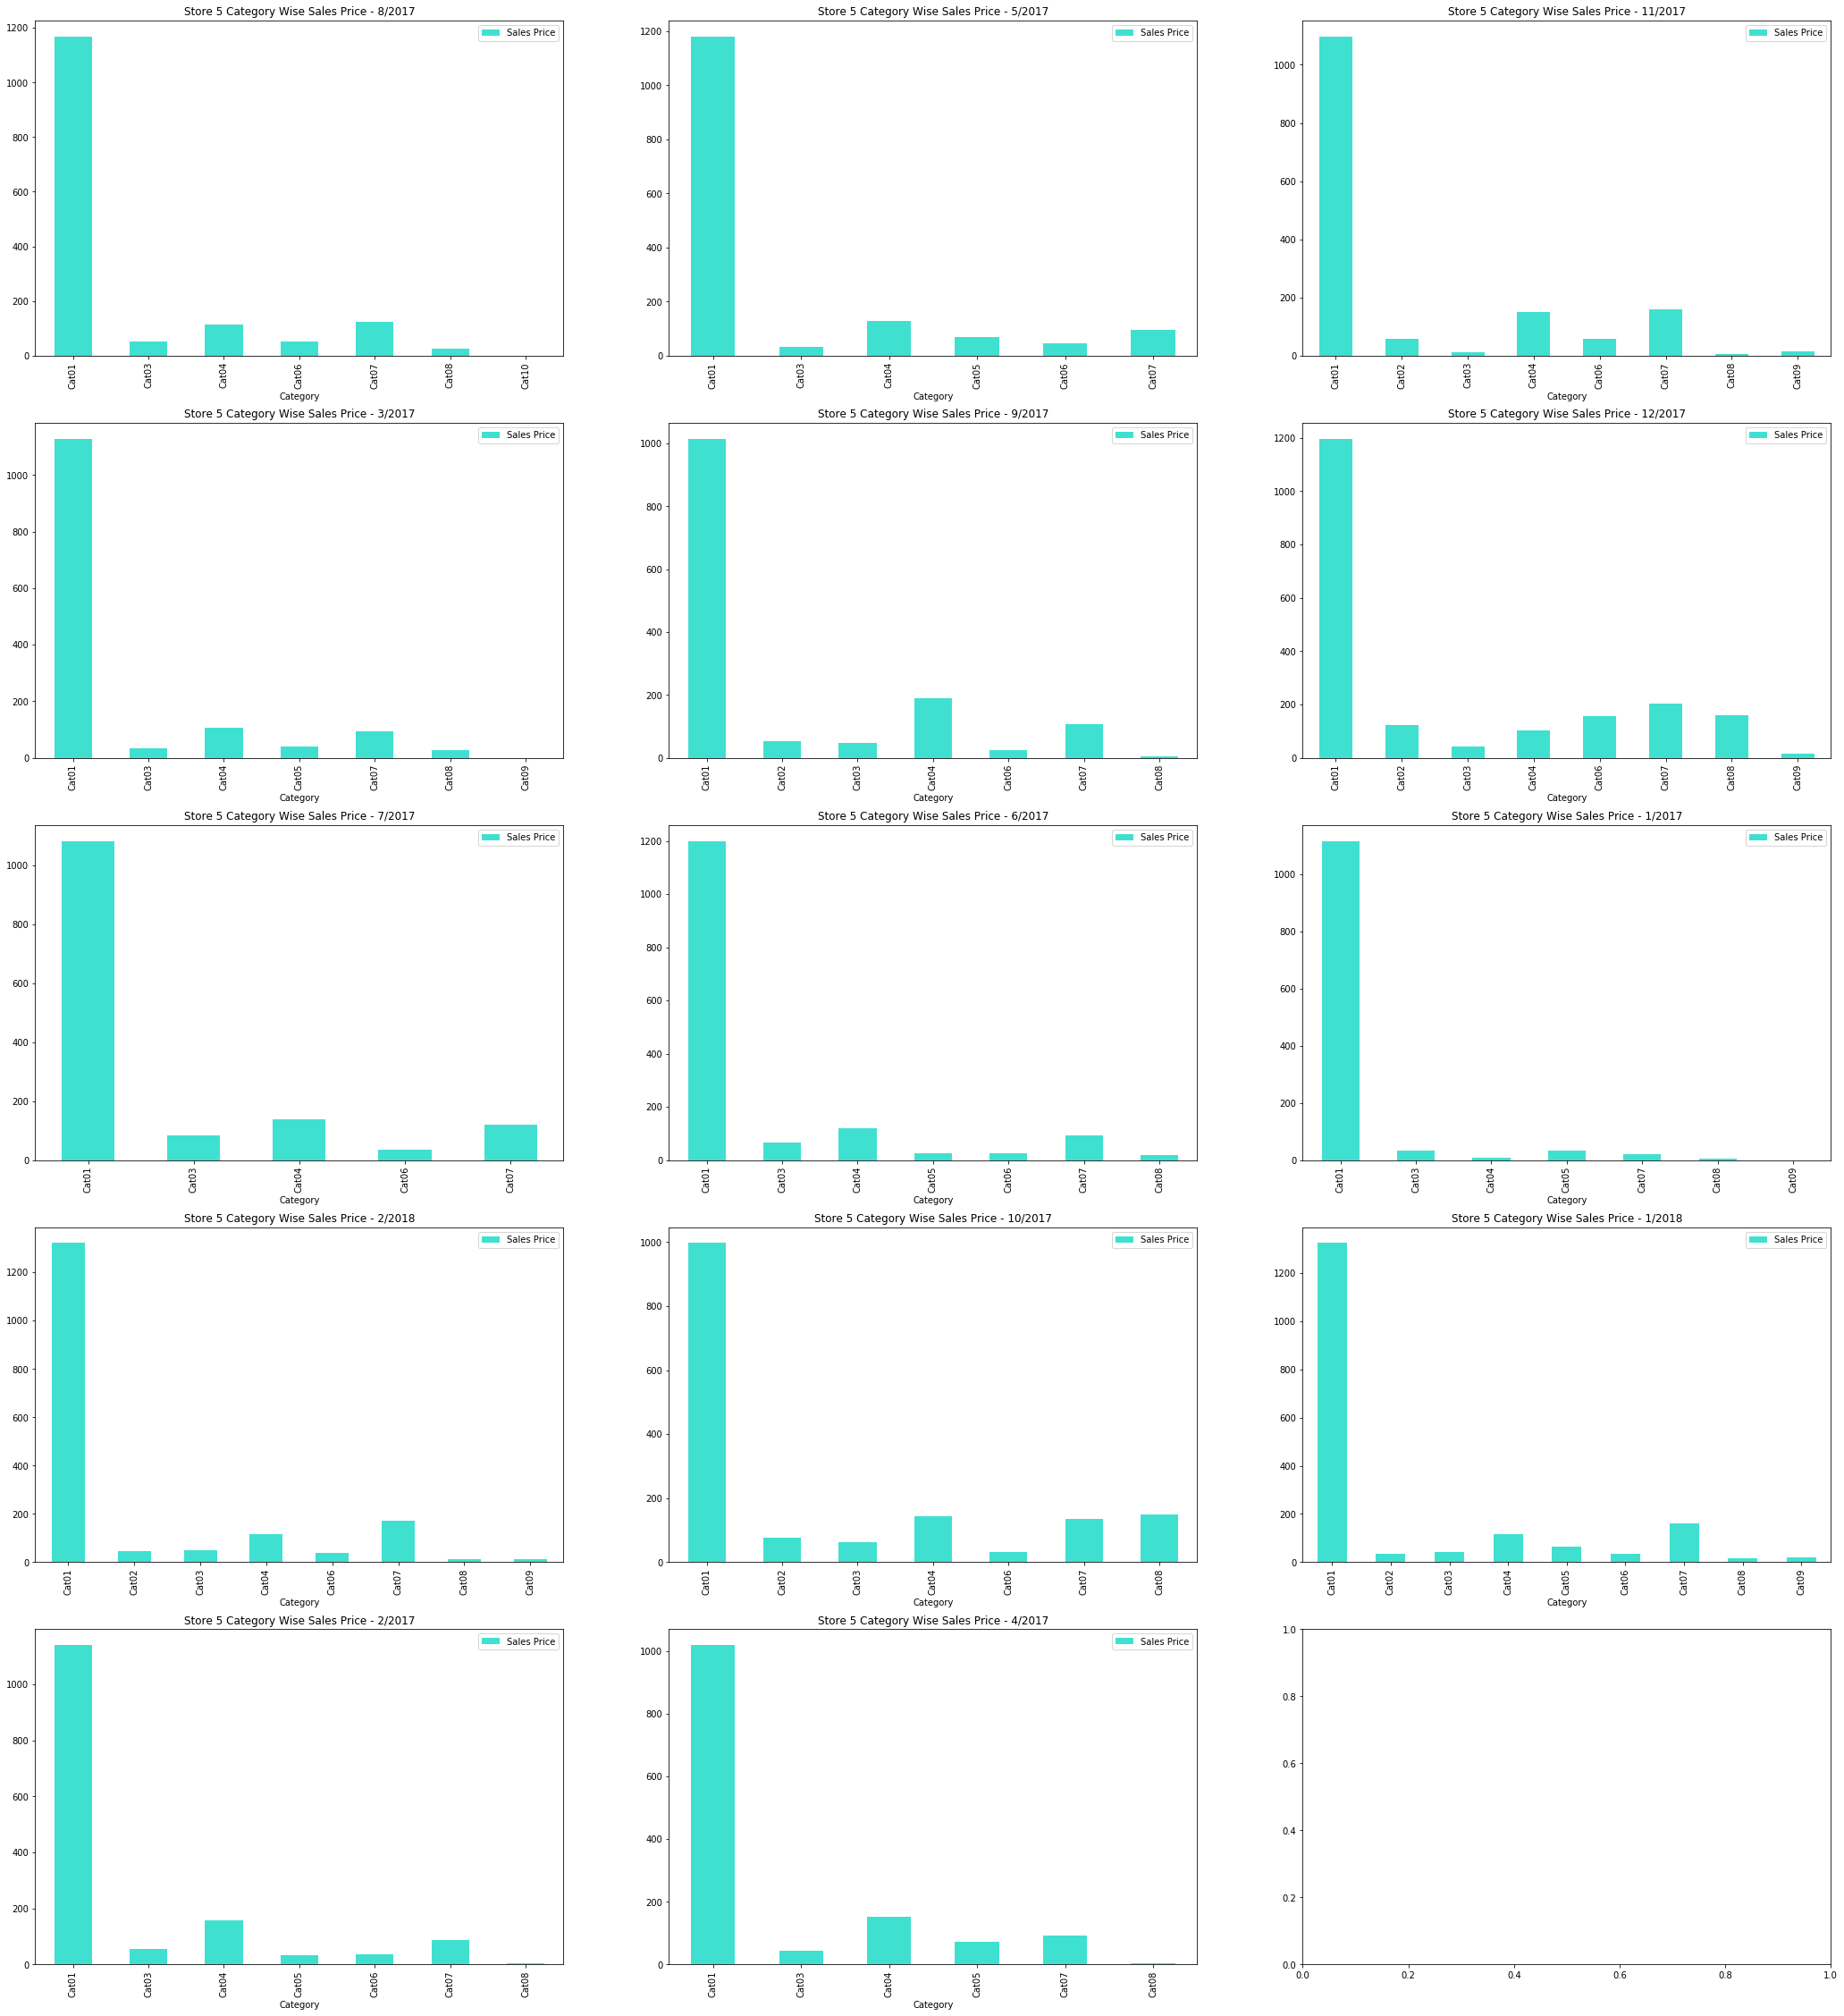

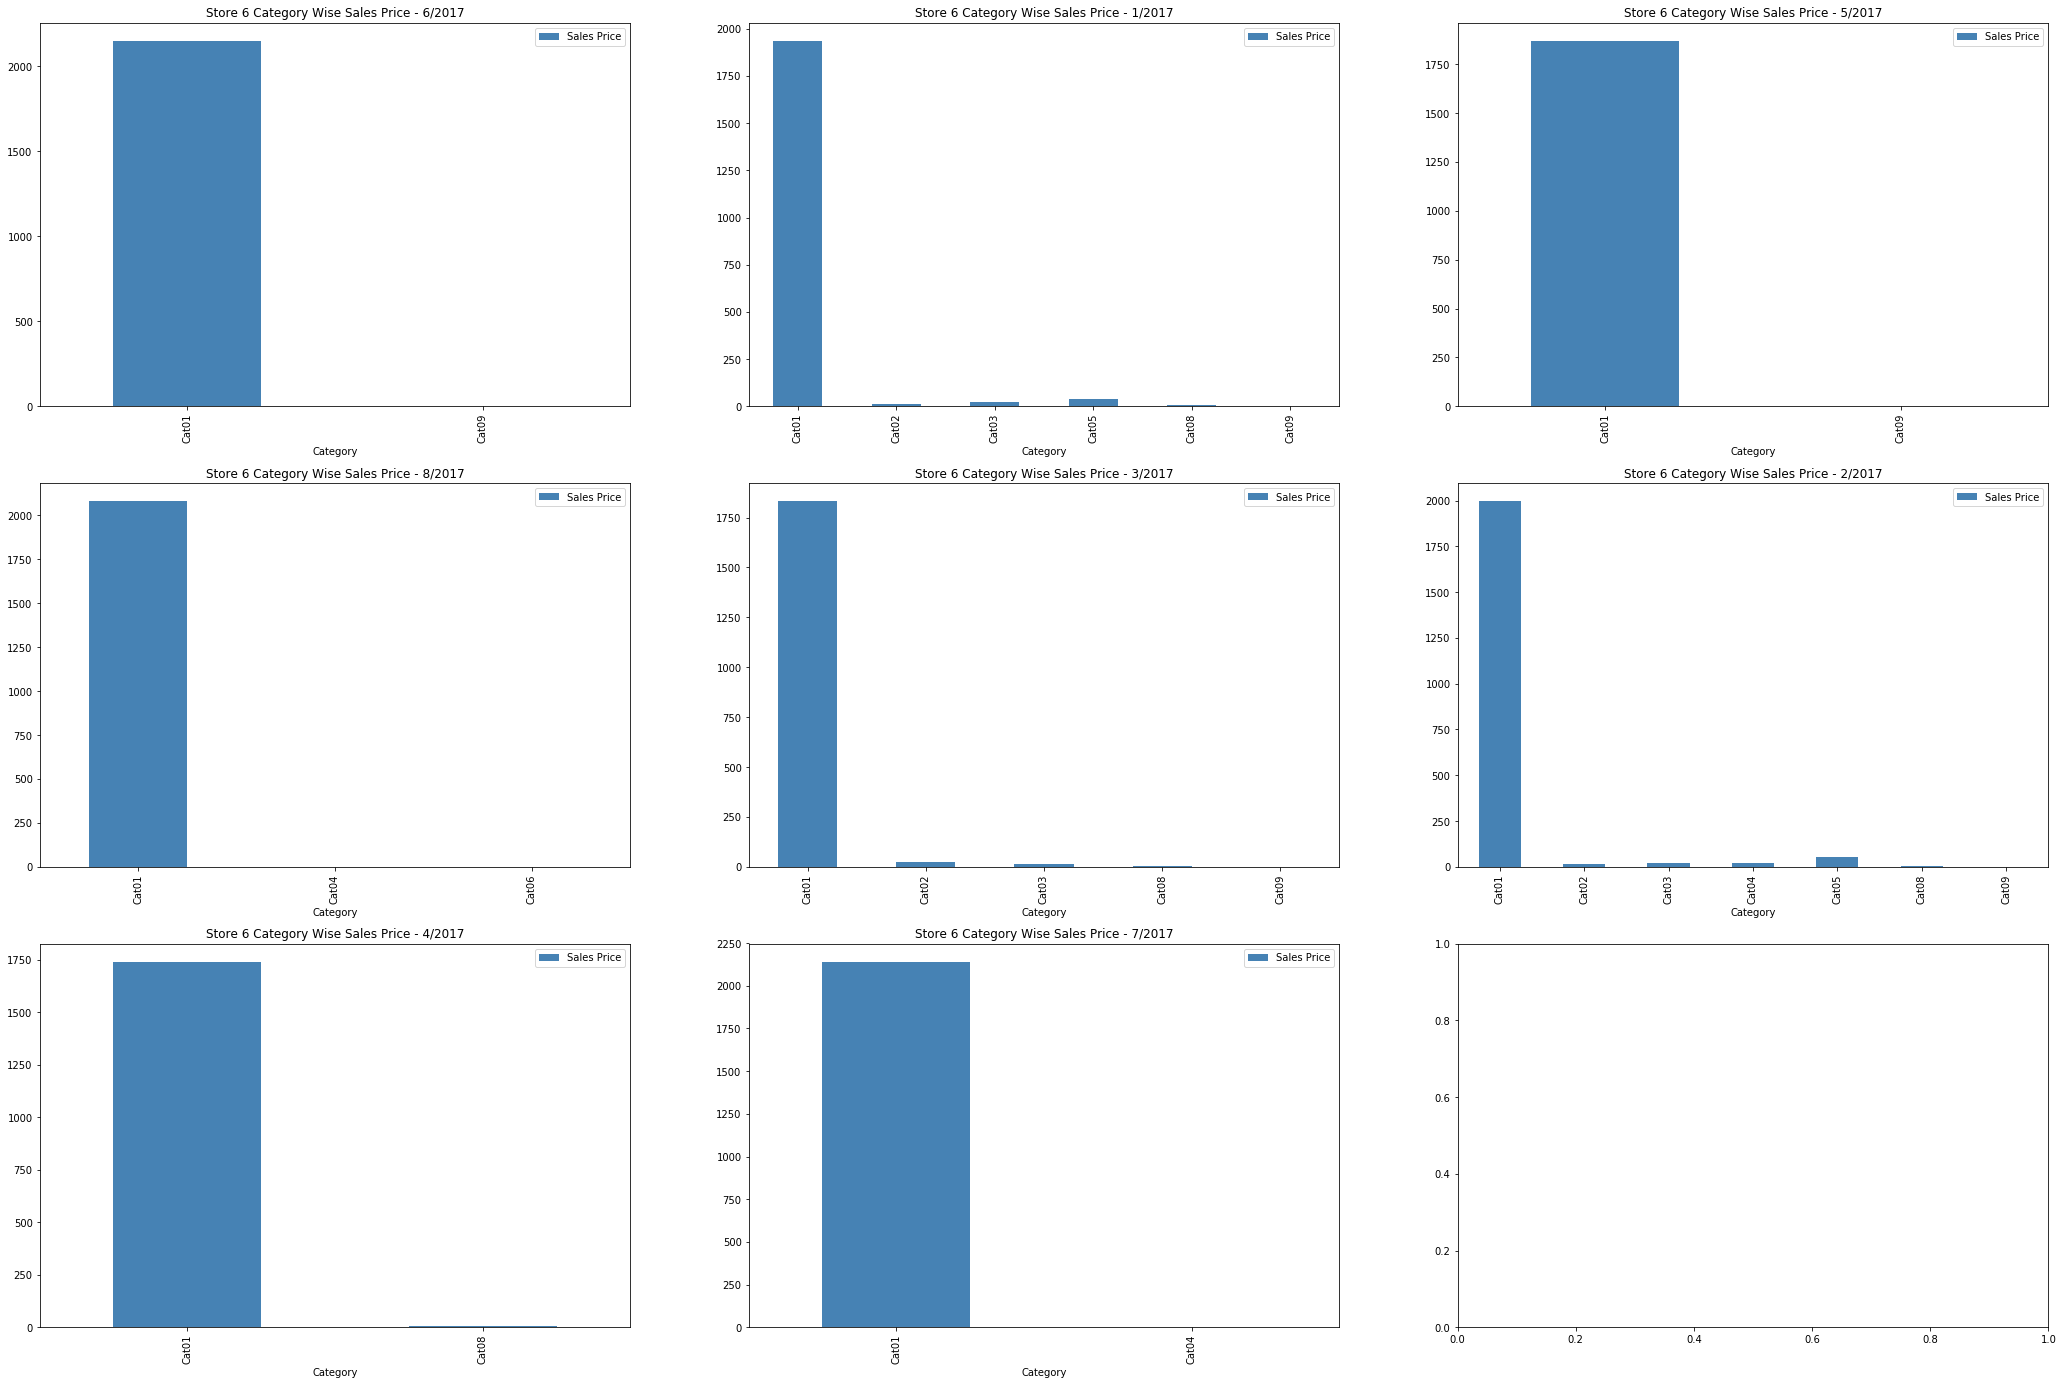

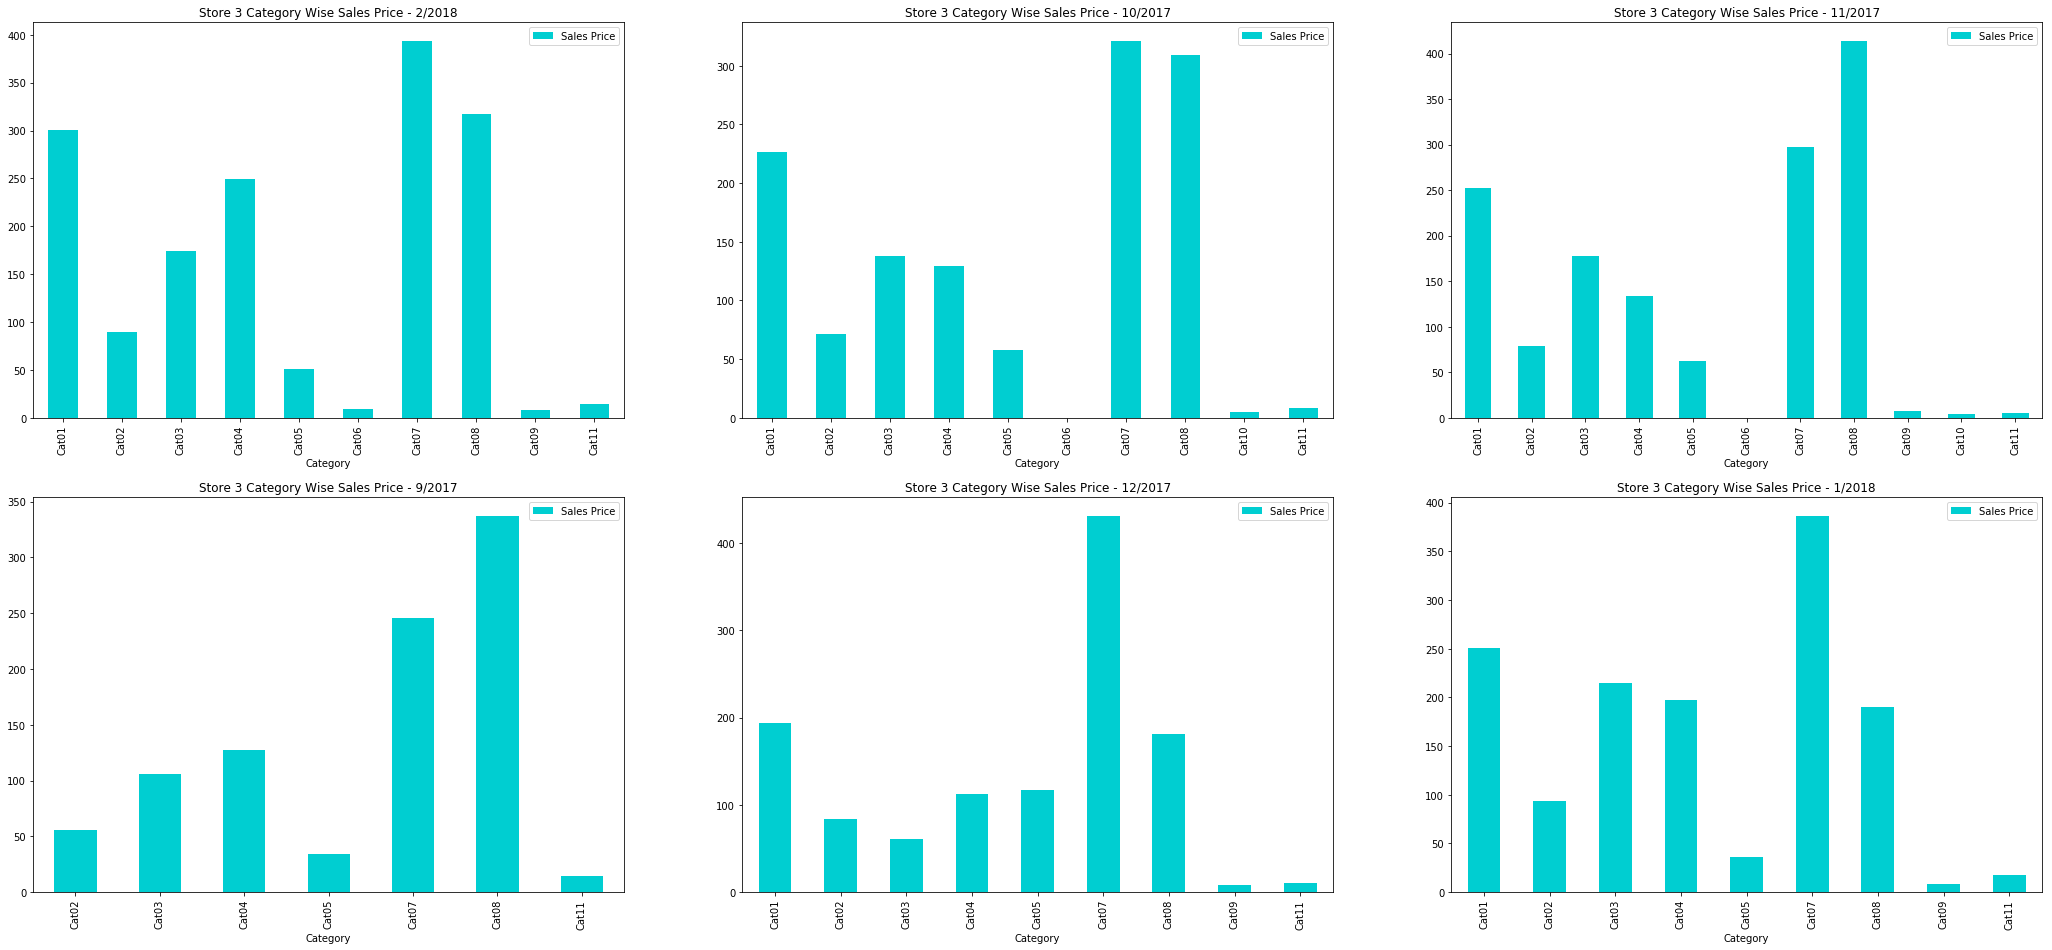

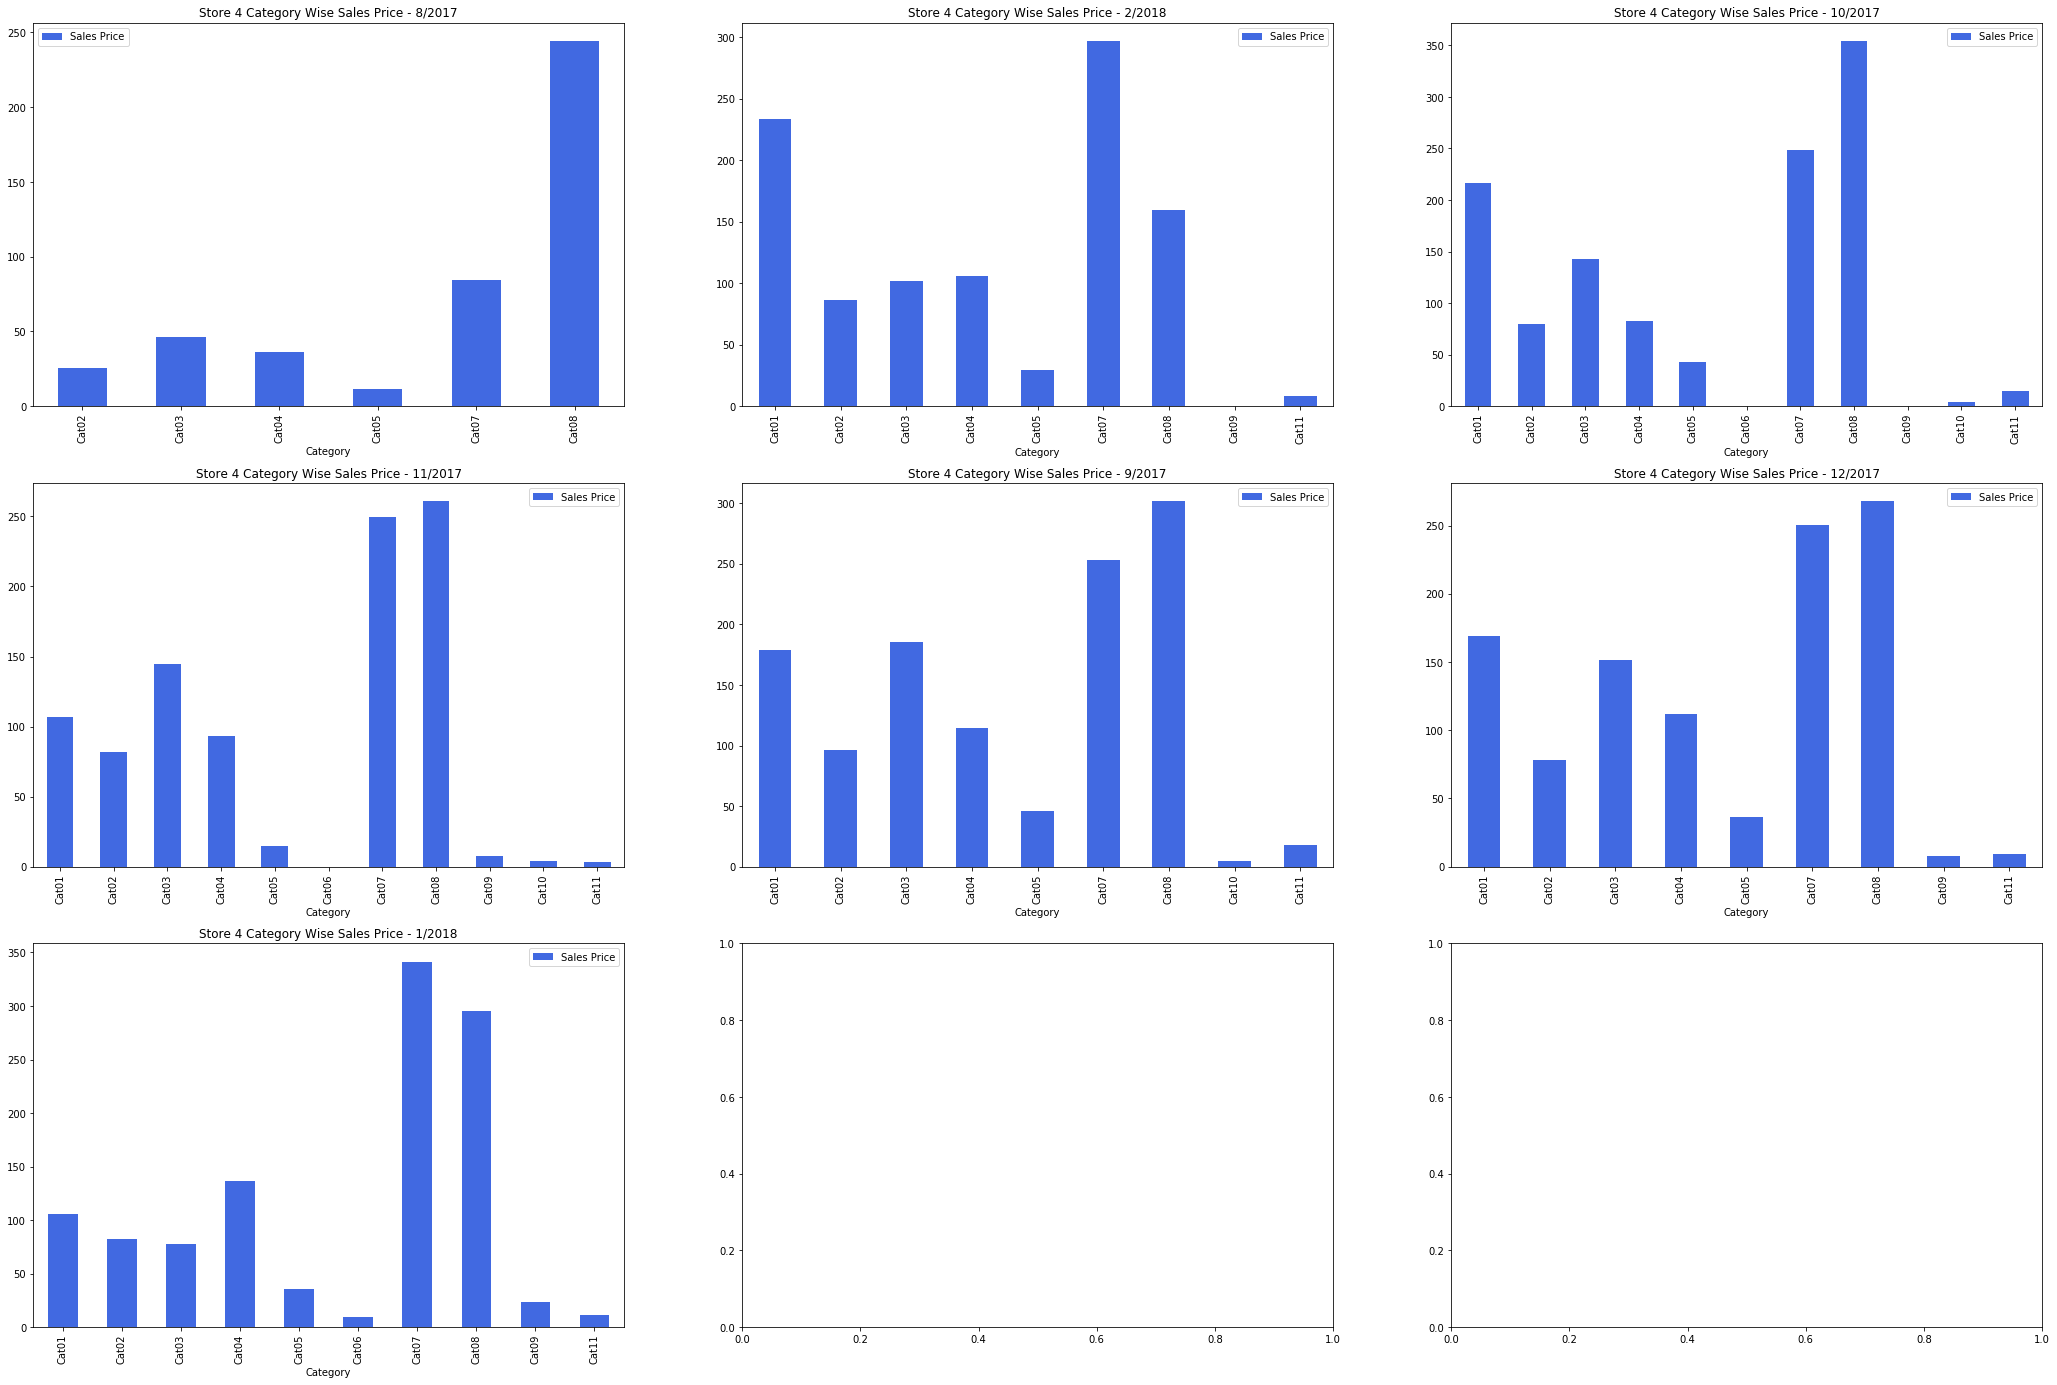

In [16]:
get_category_or_brand_wise_metrics_per_month_plots(data['sale_price_metrics_deep'], plot_kind='Category', df_kind='Sales Price')

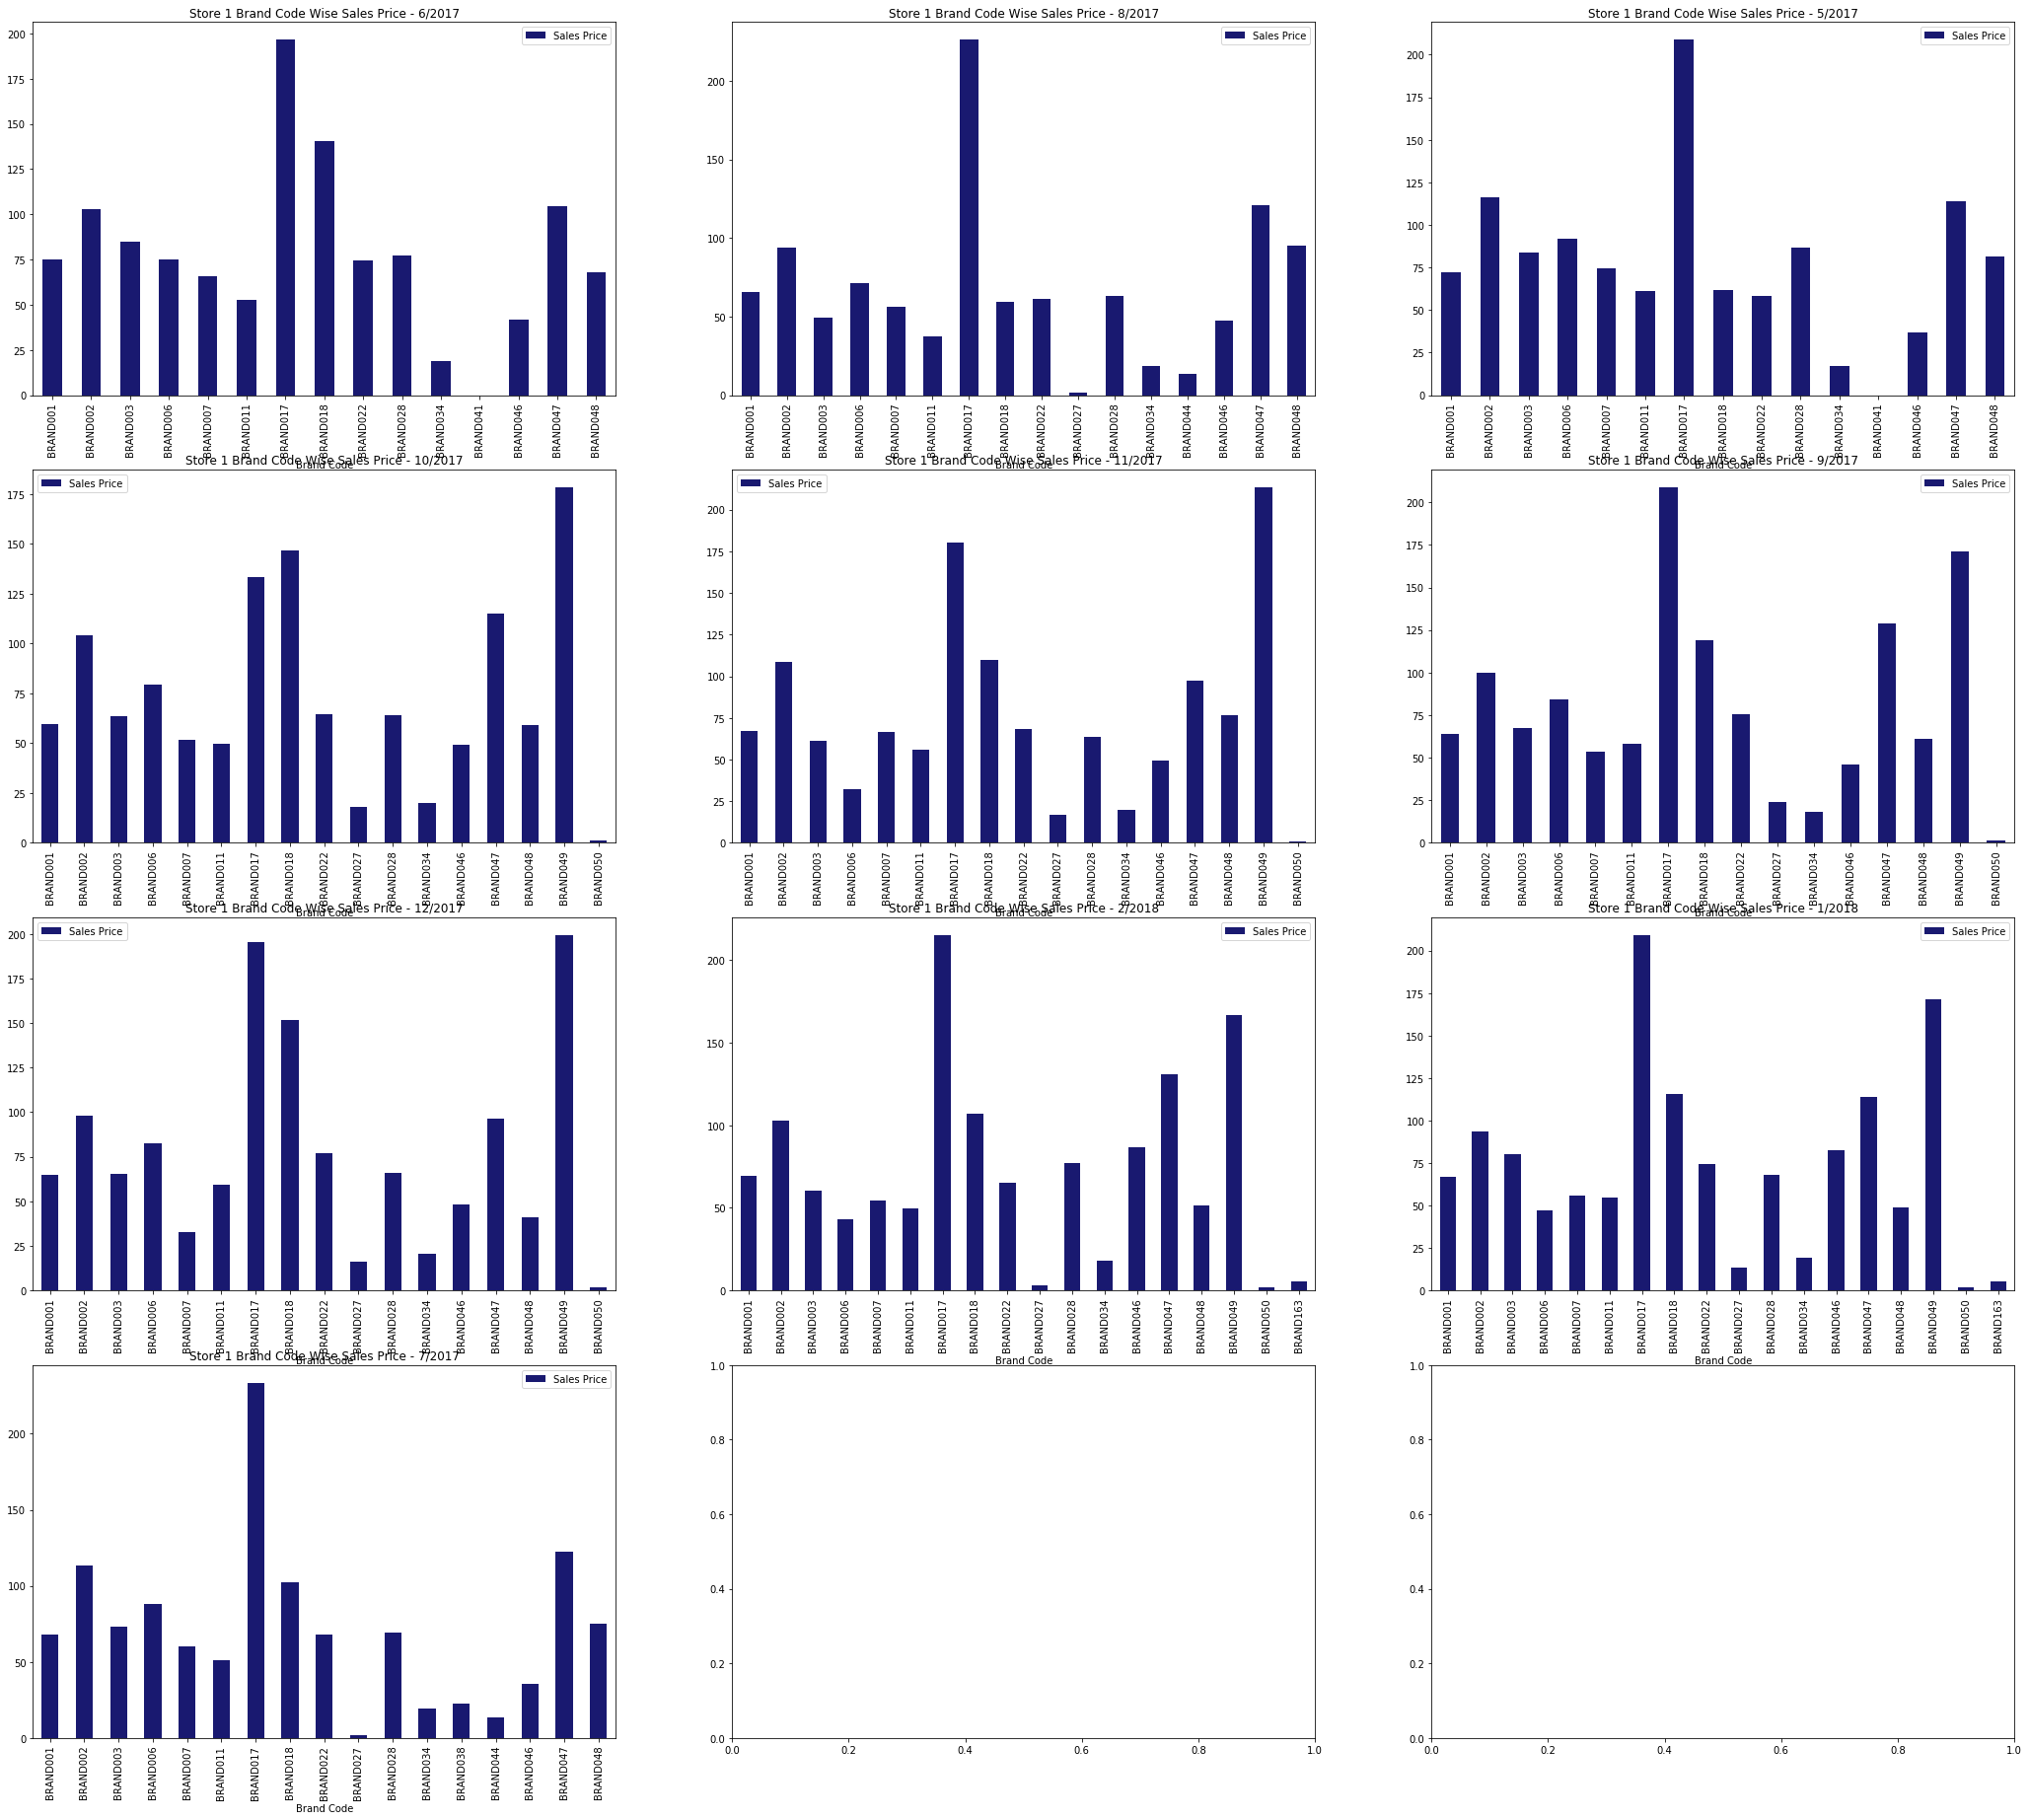

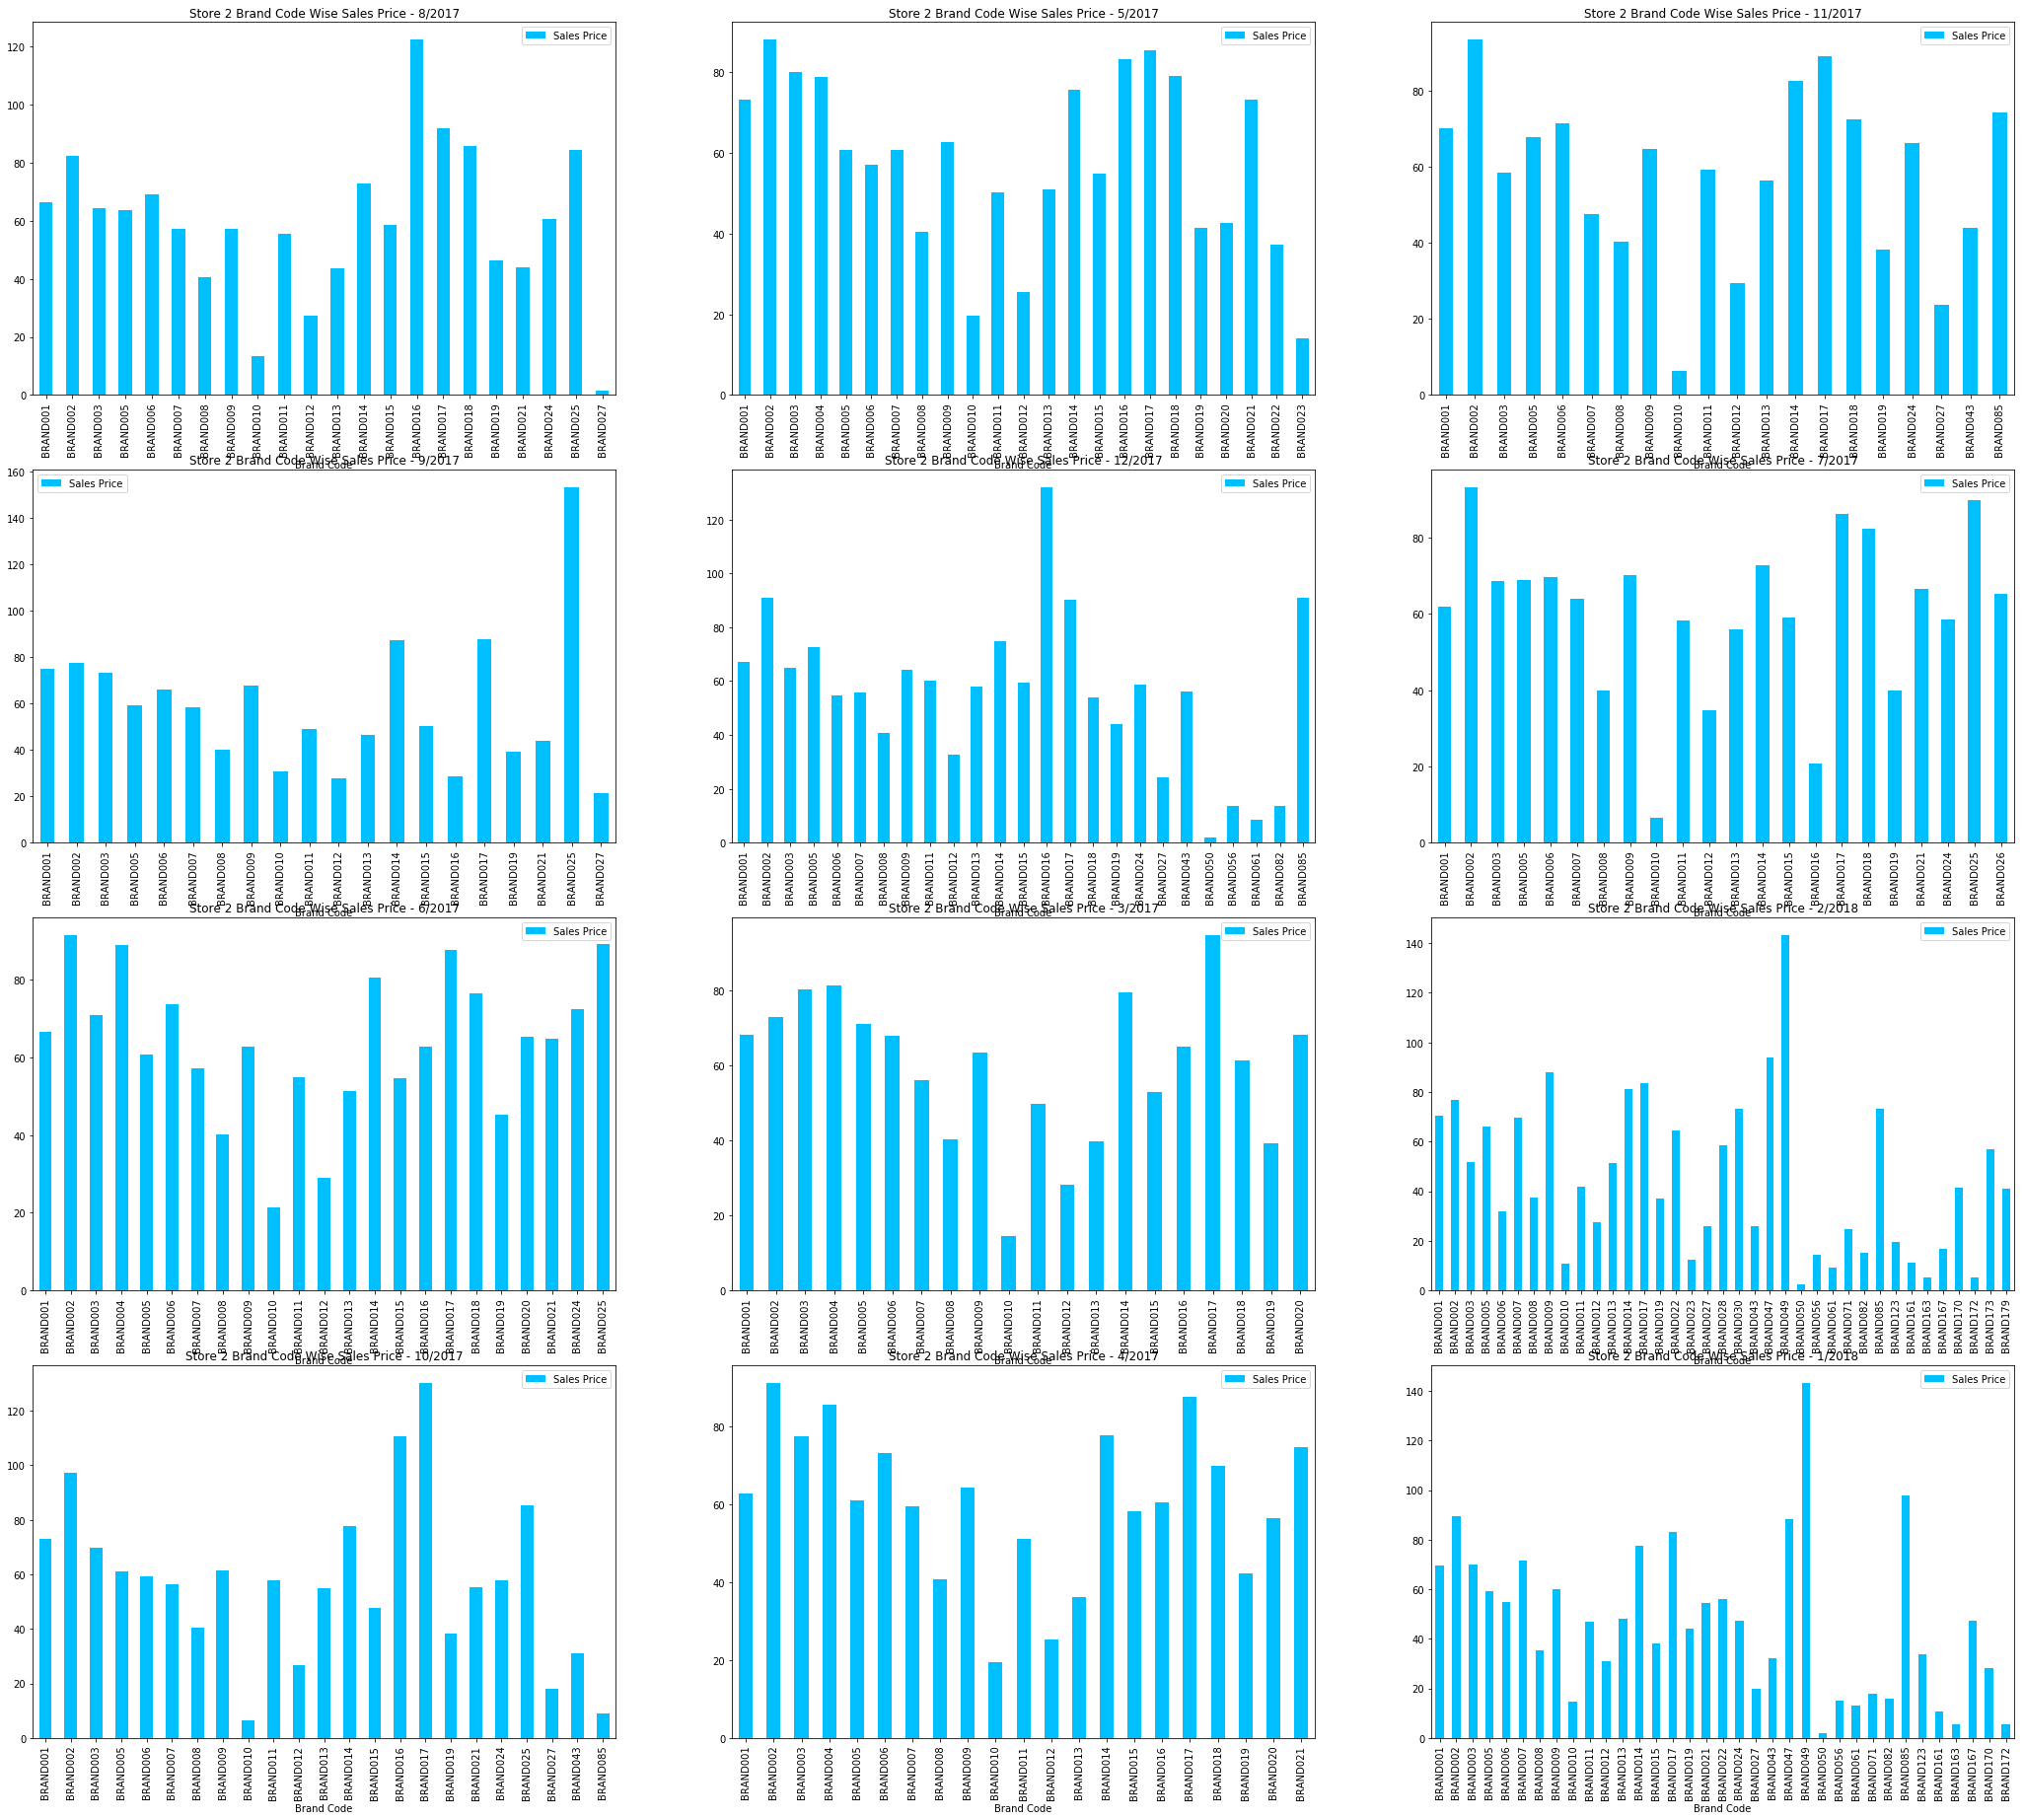

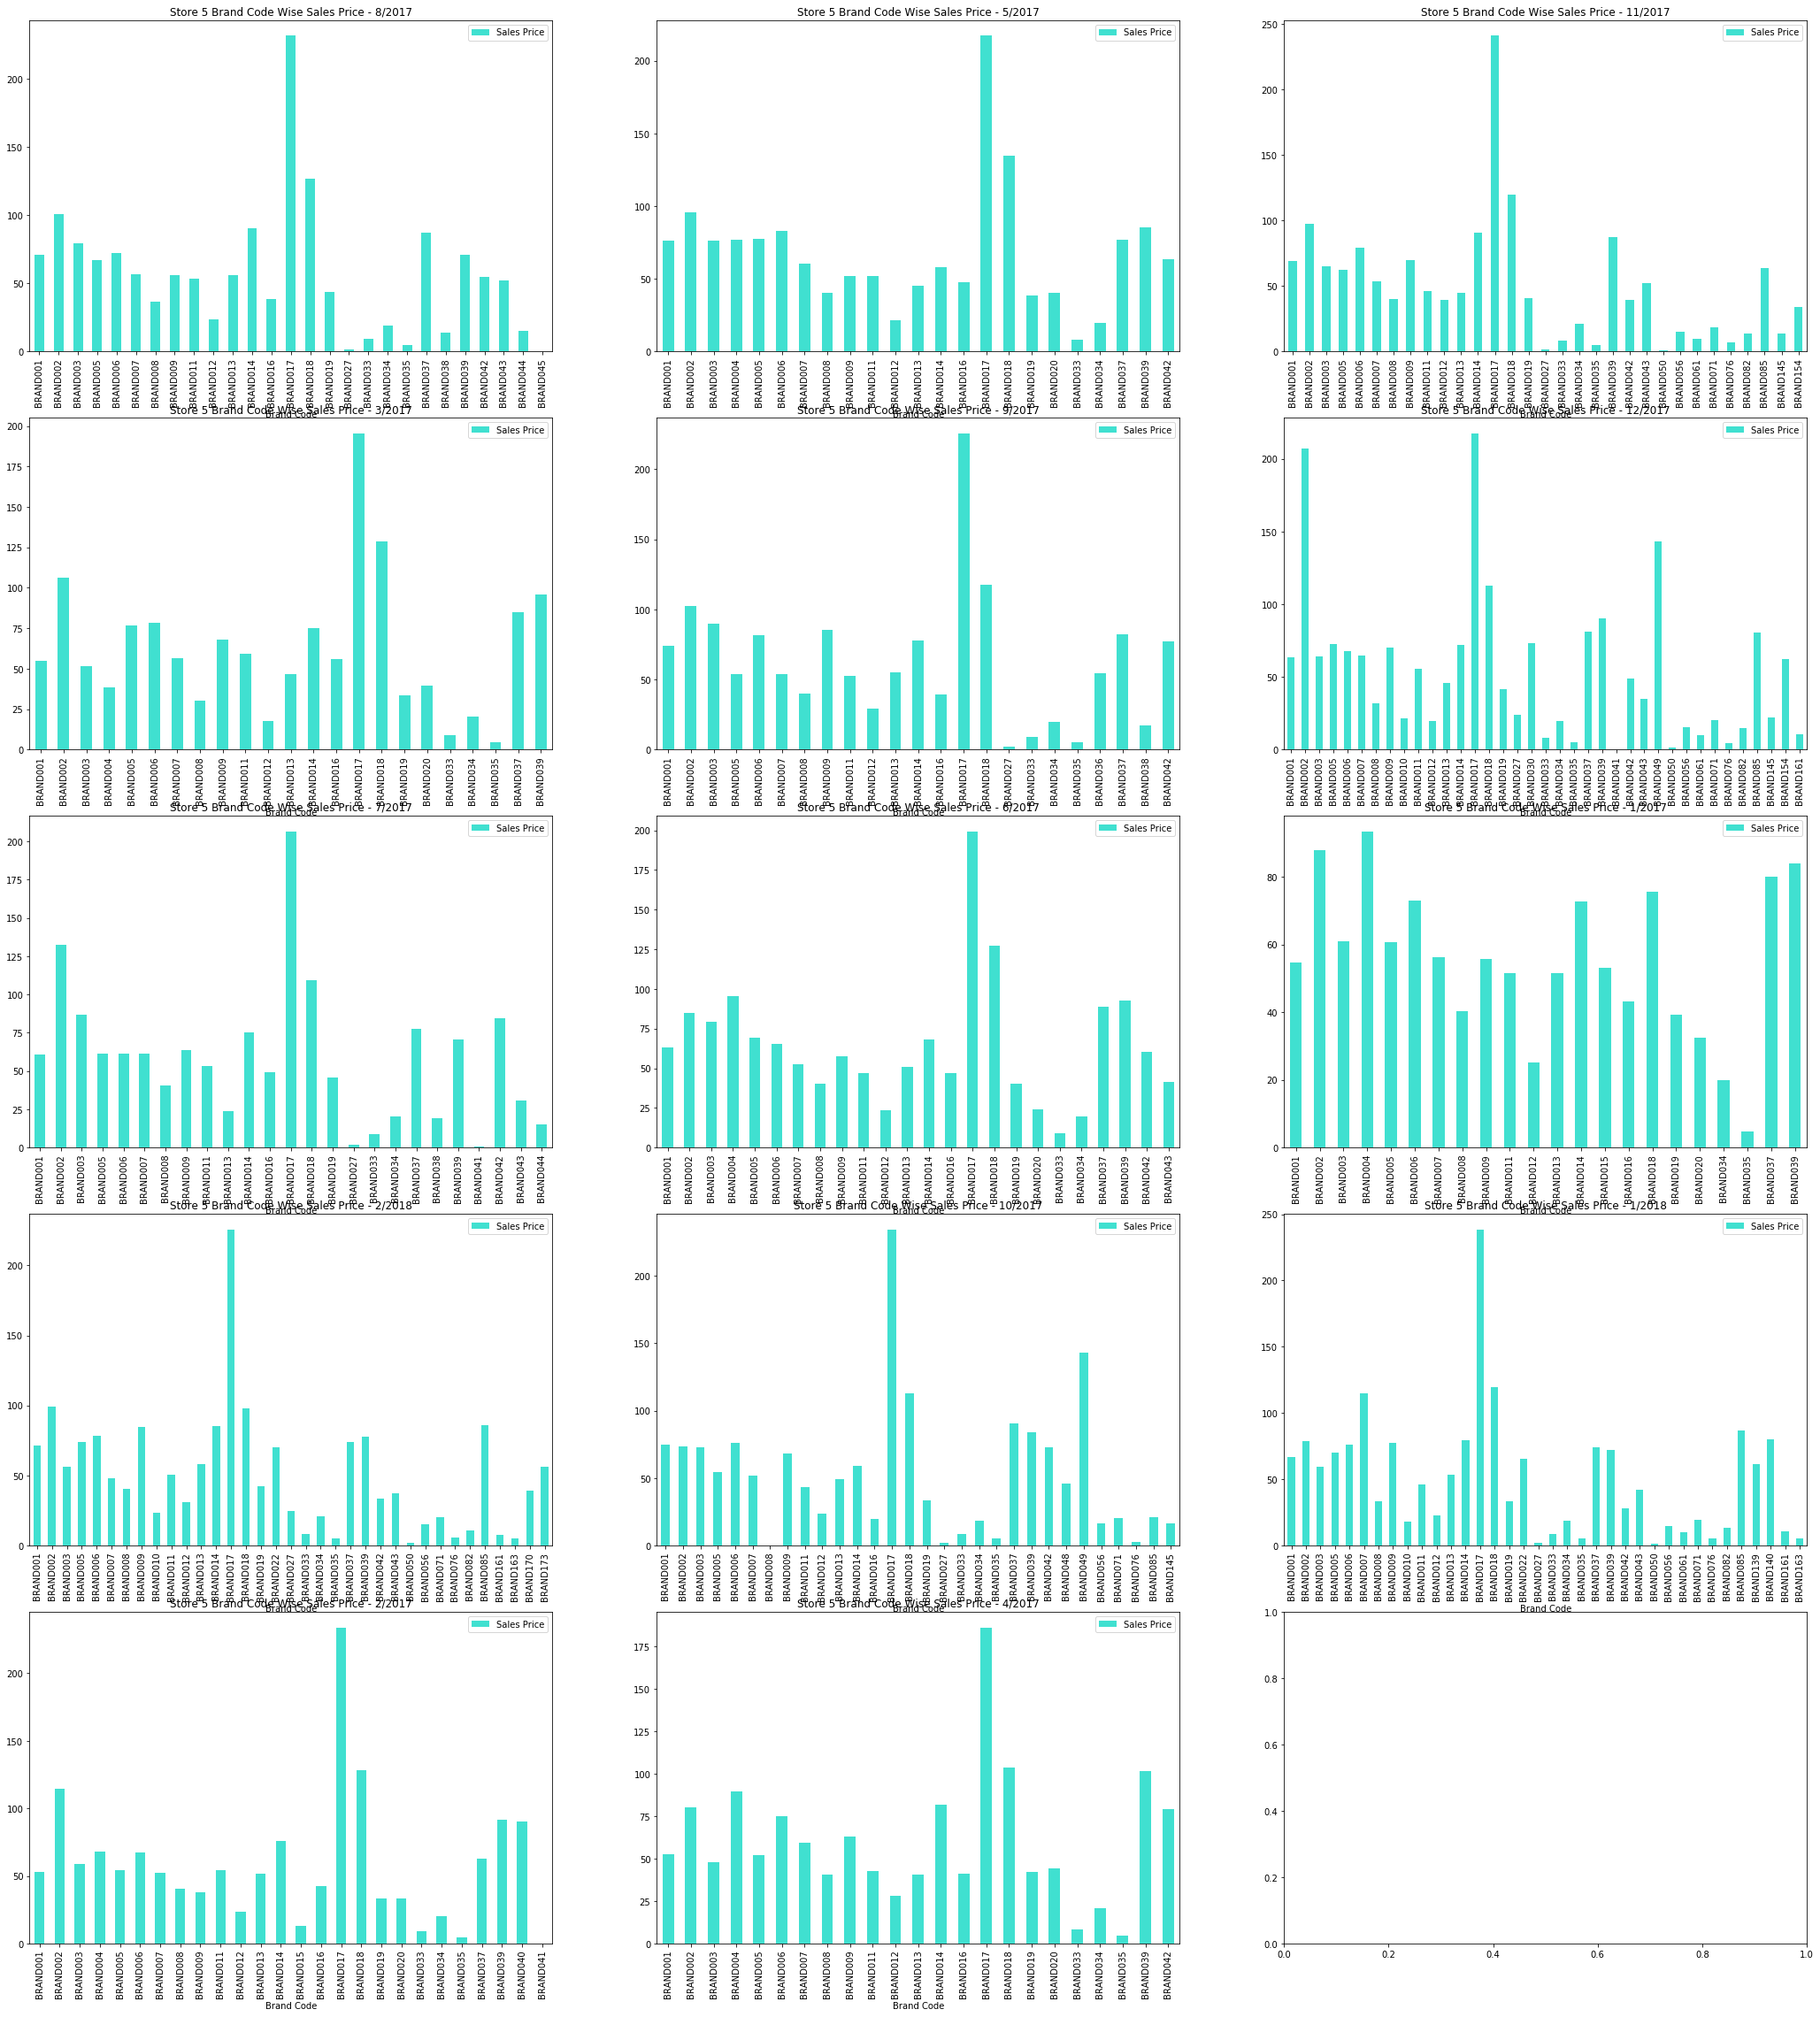

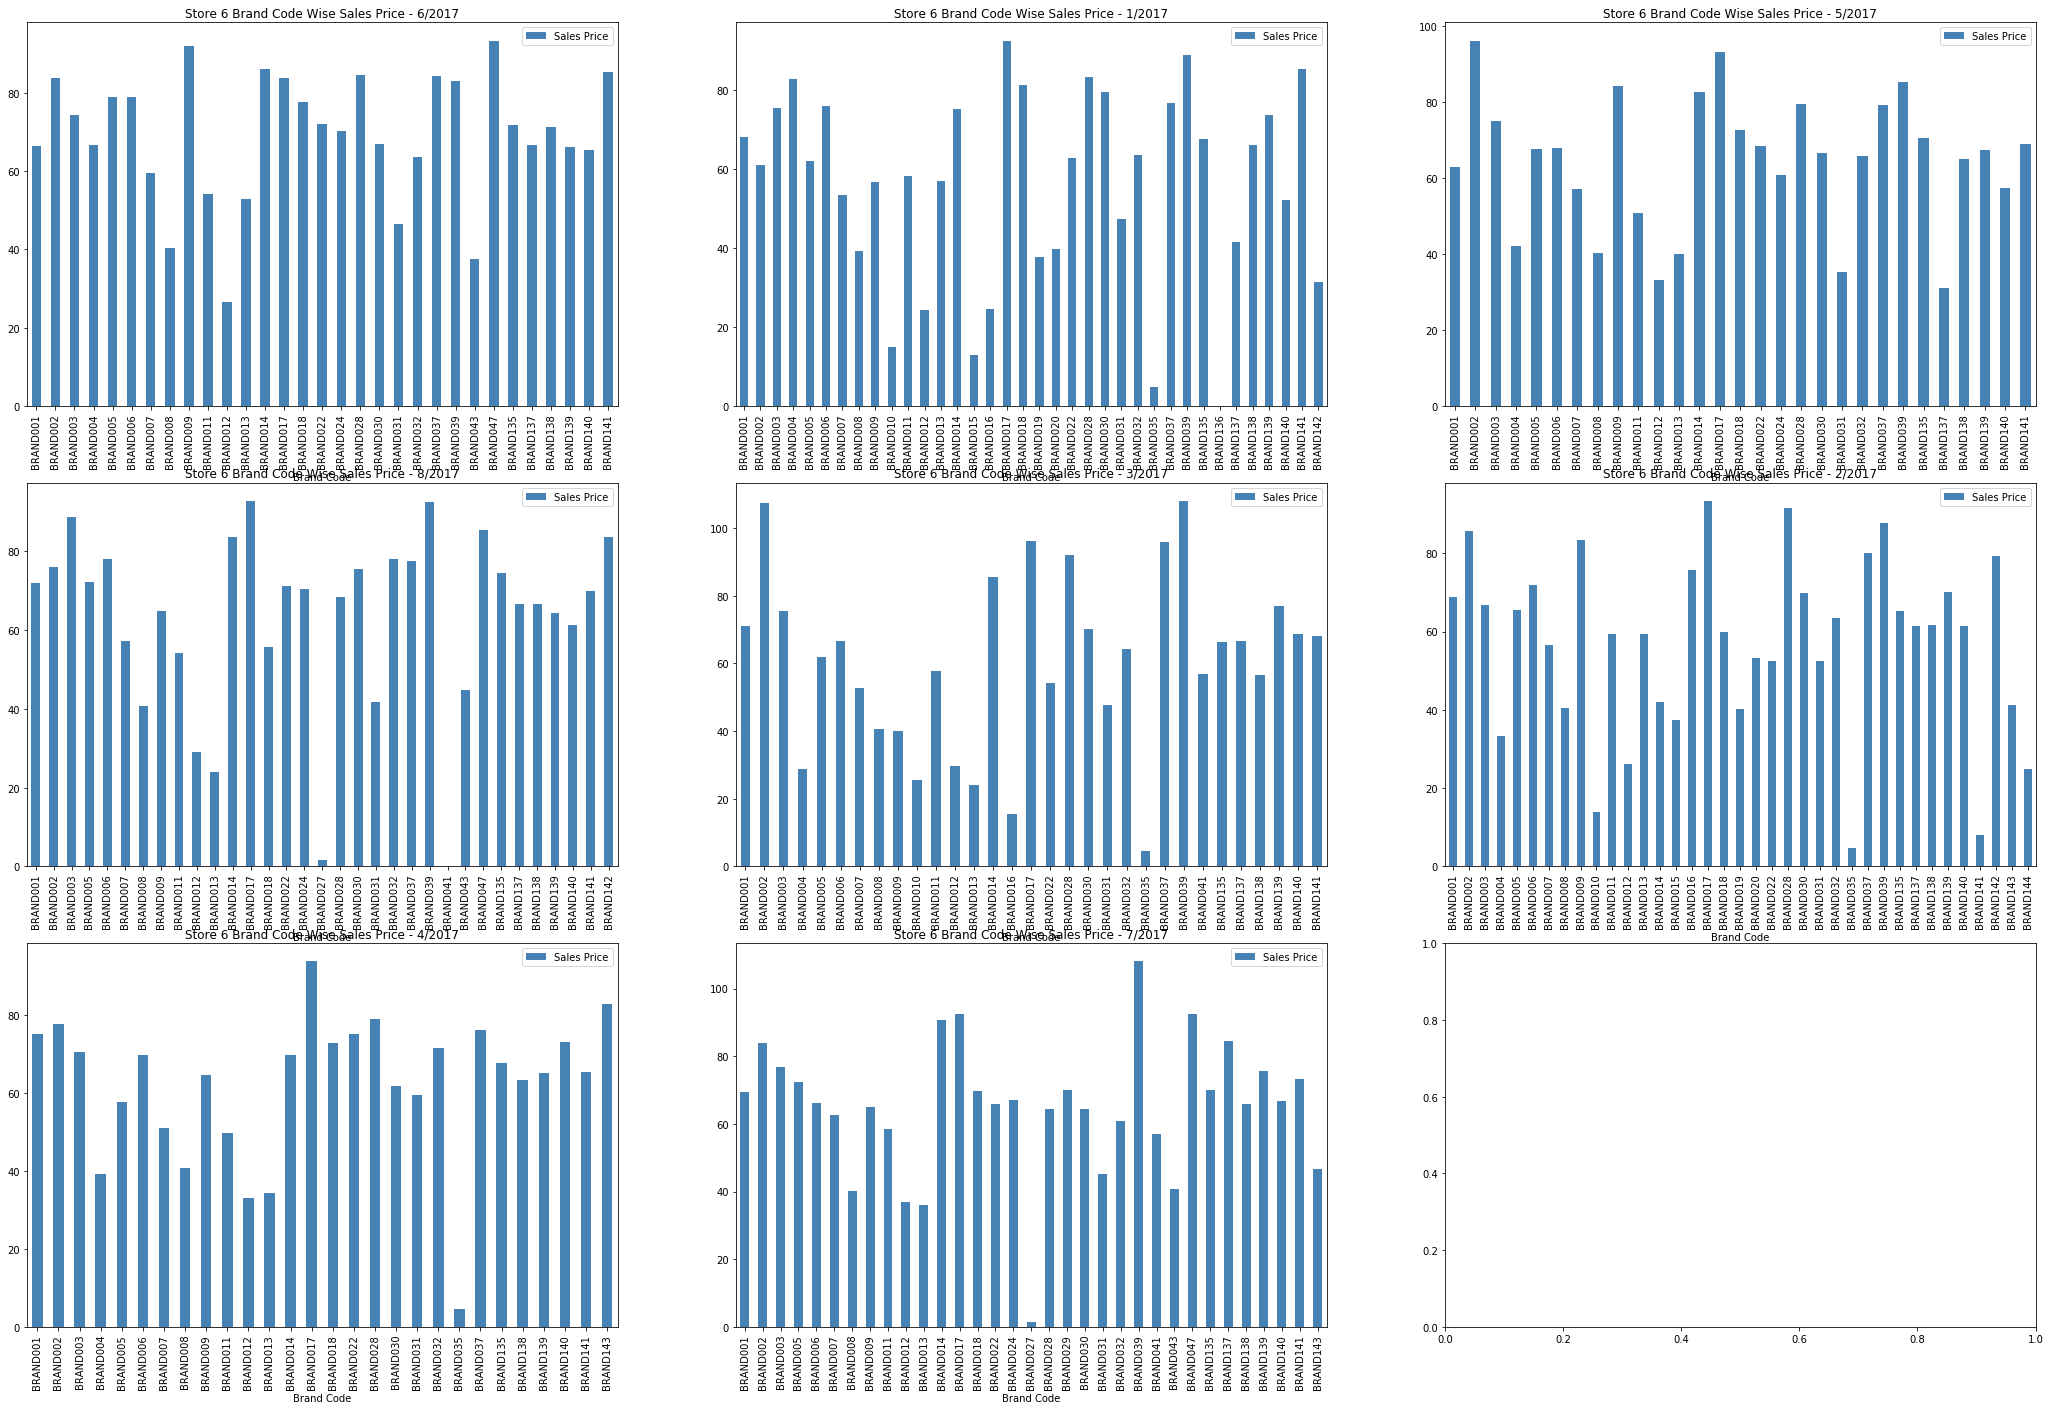

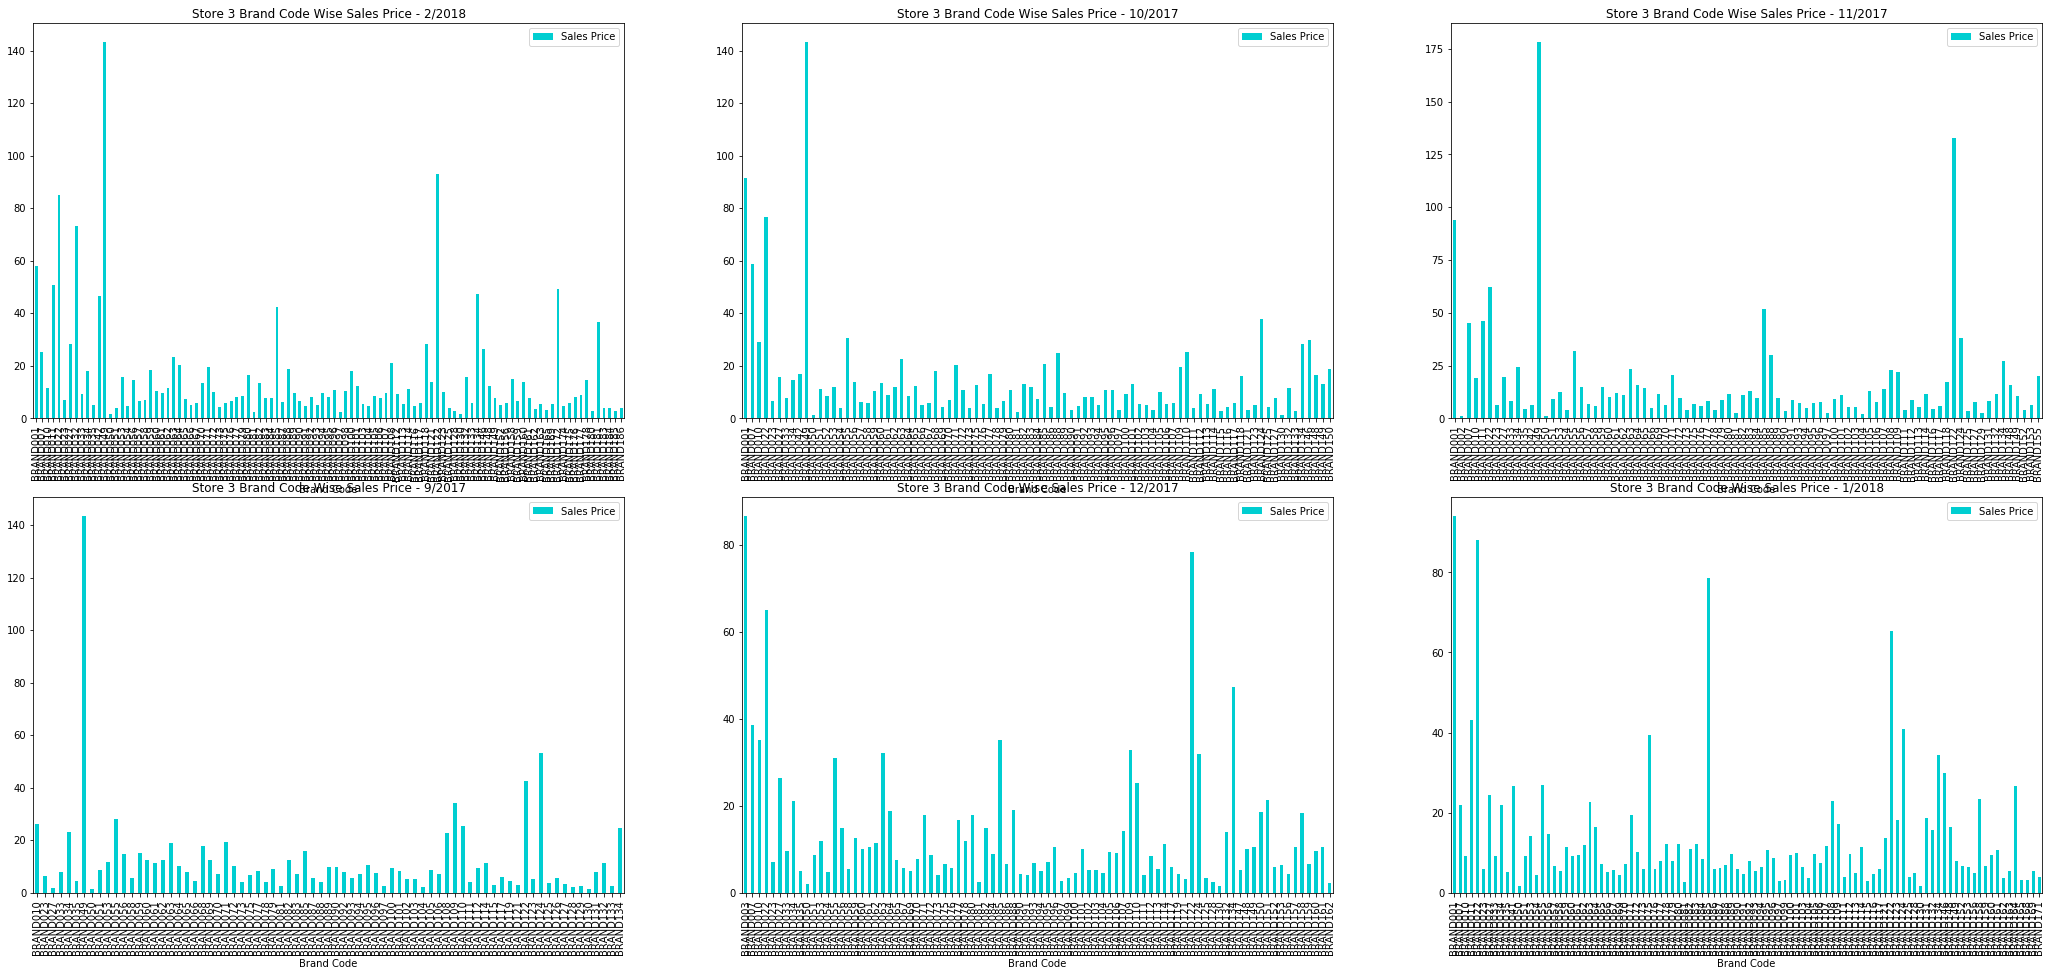

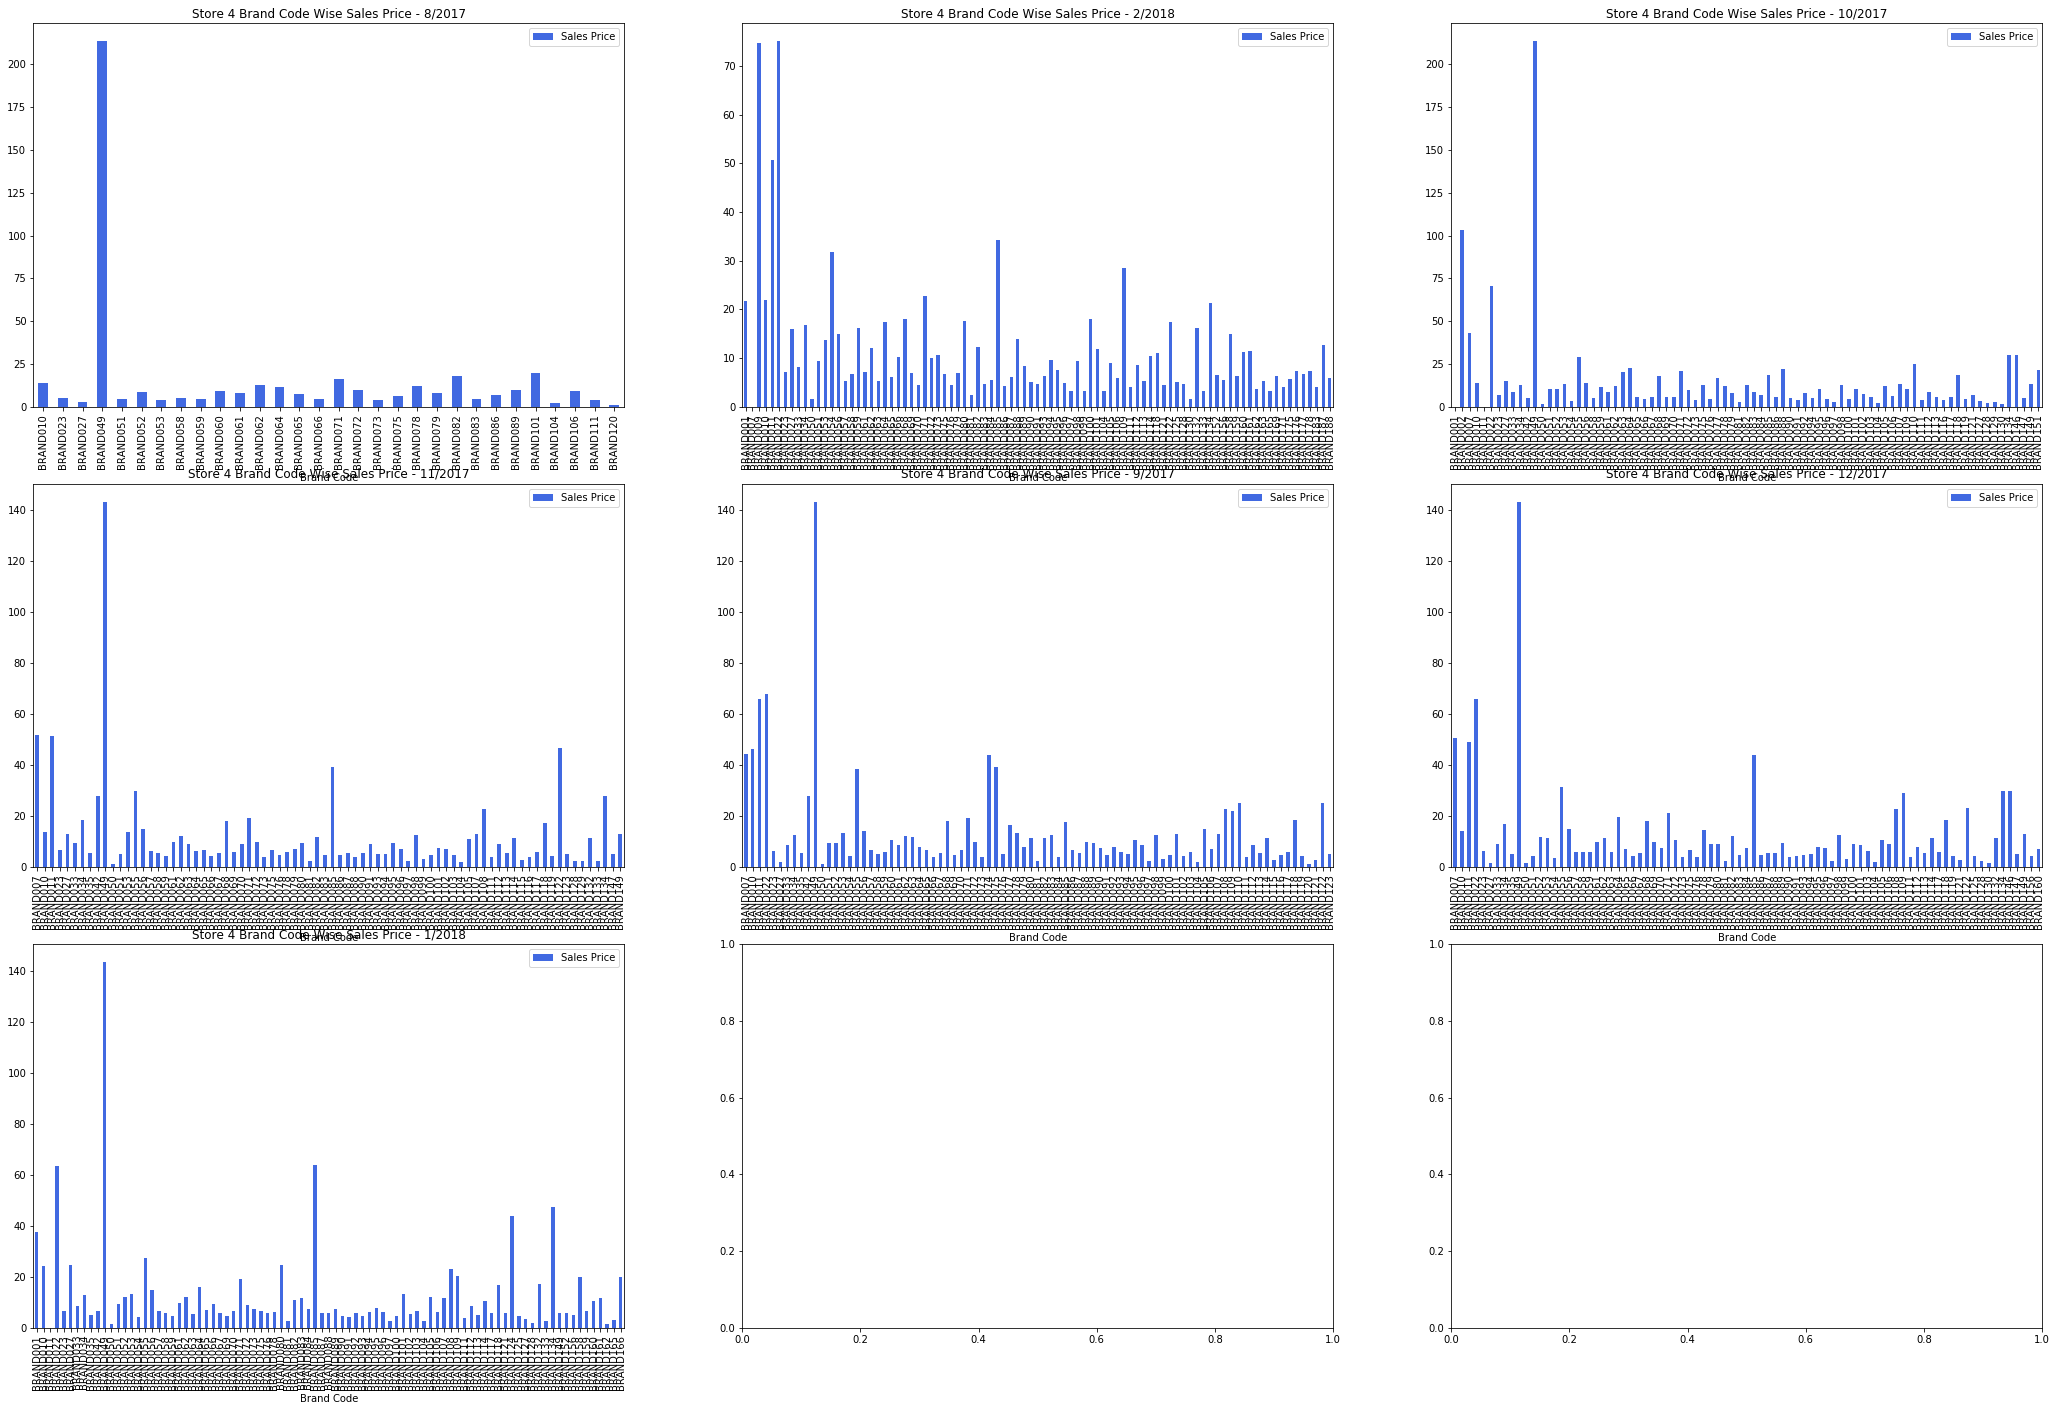

In [17]:
get_category_or_brand_wise_metrics_per_month_plots(data['sale_price_metrics_deep'], plot_kind='Brand Code', df_kind='Sales Price')

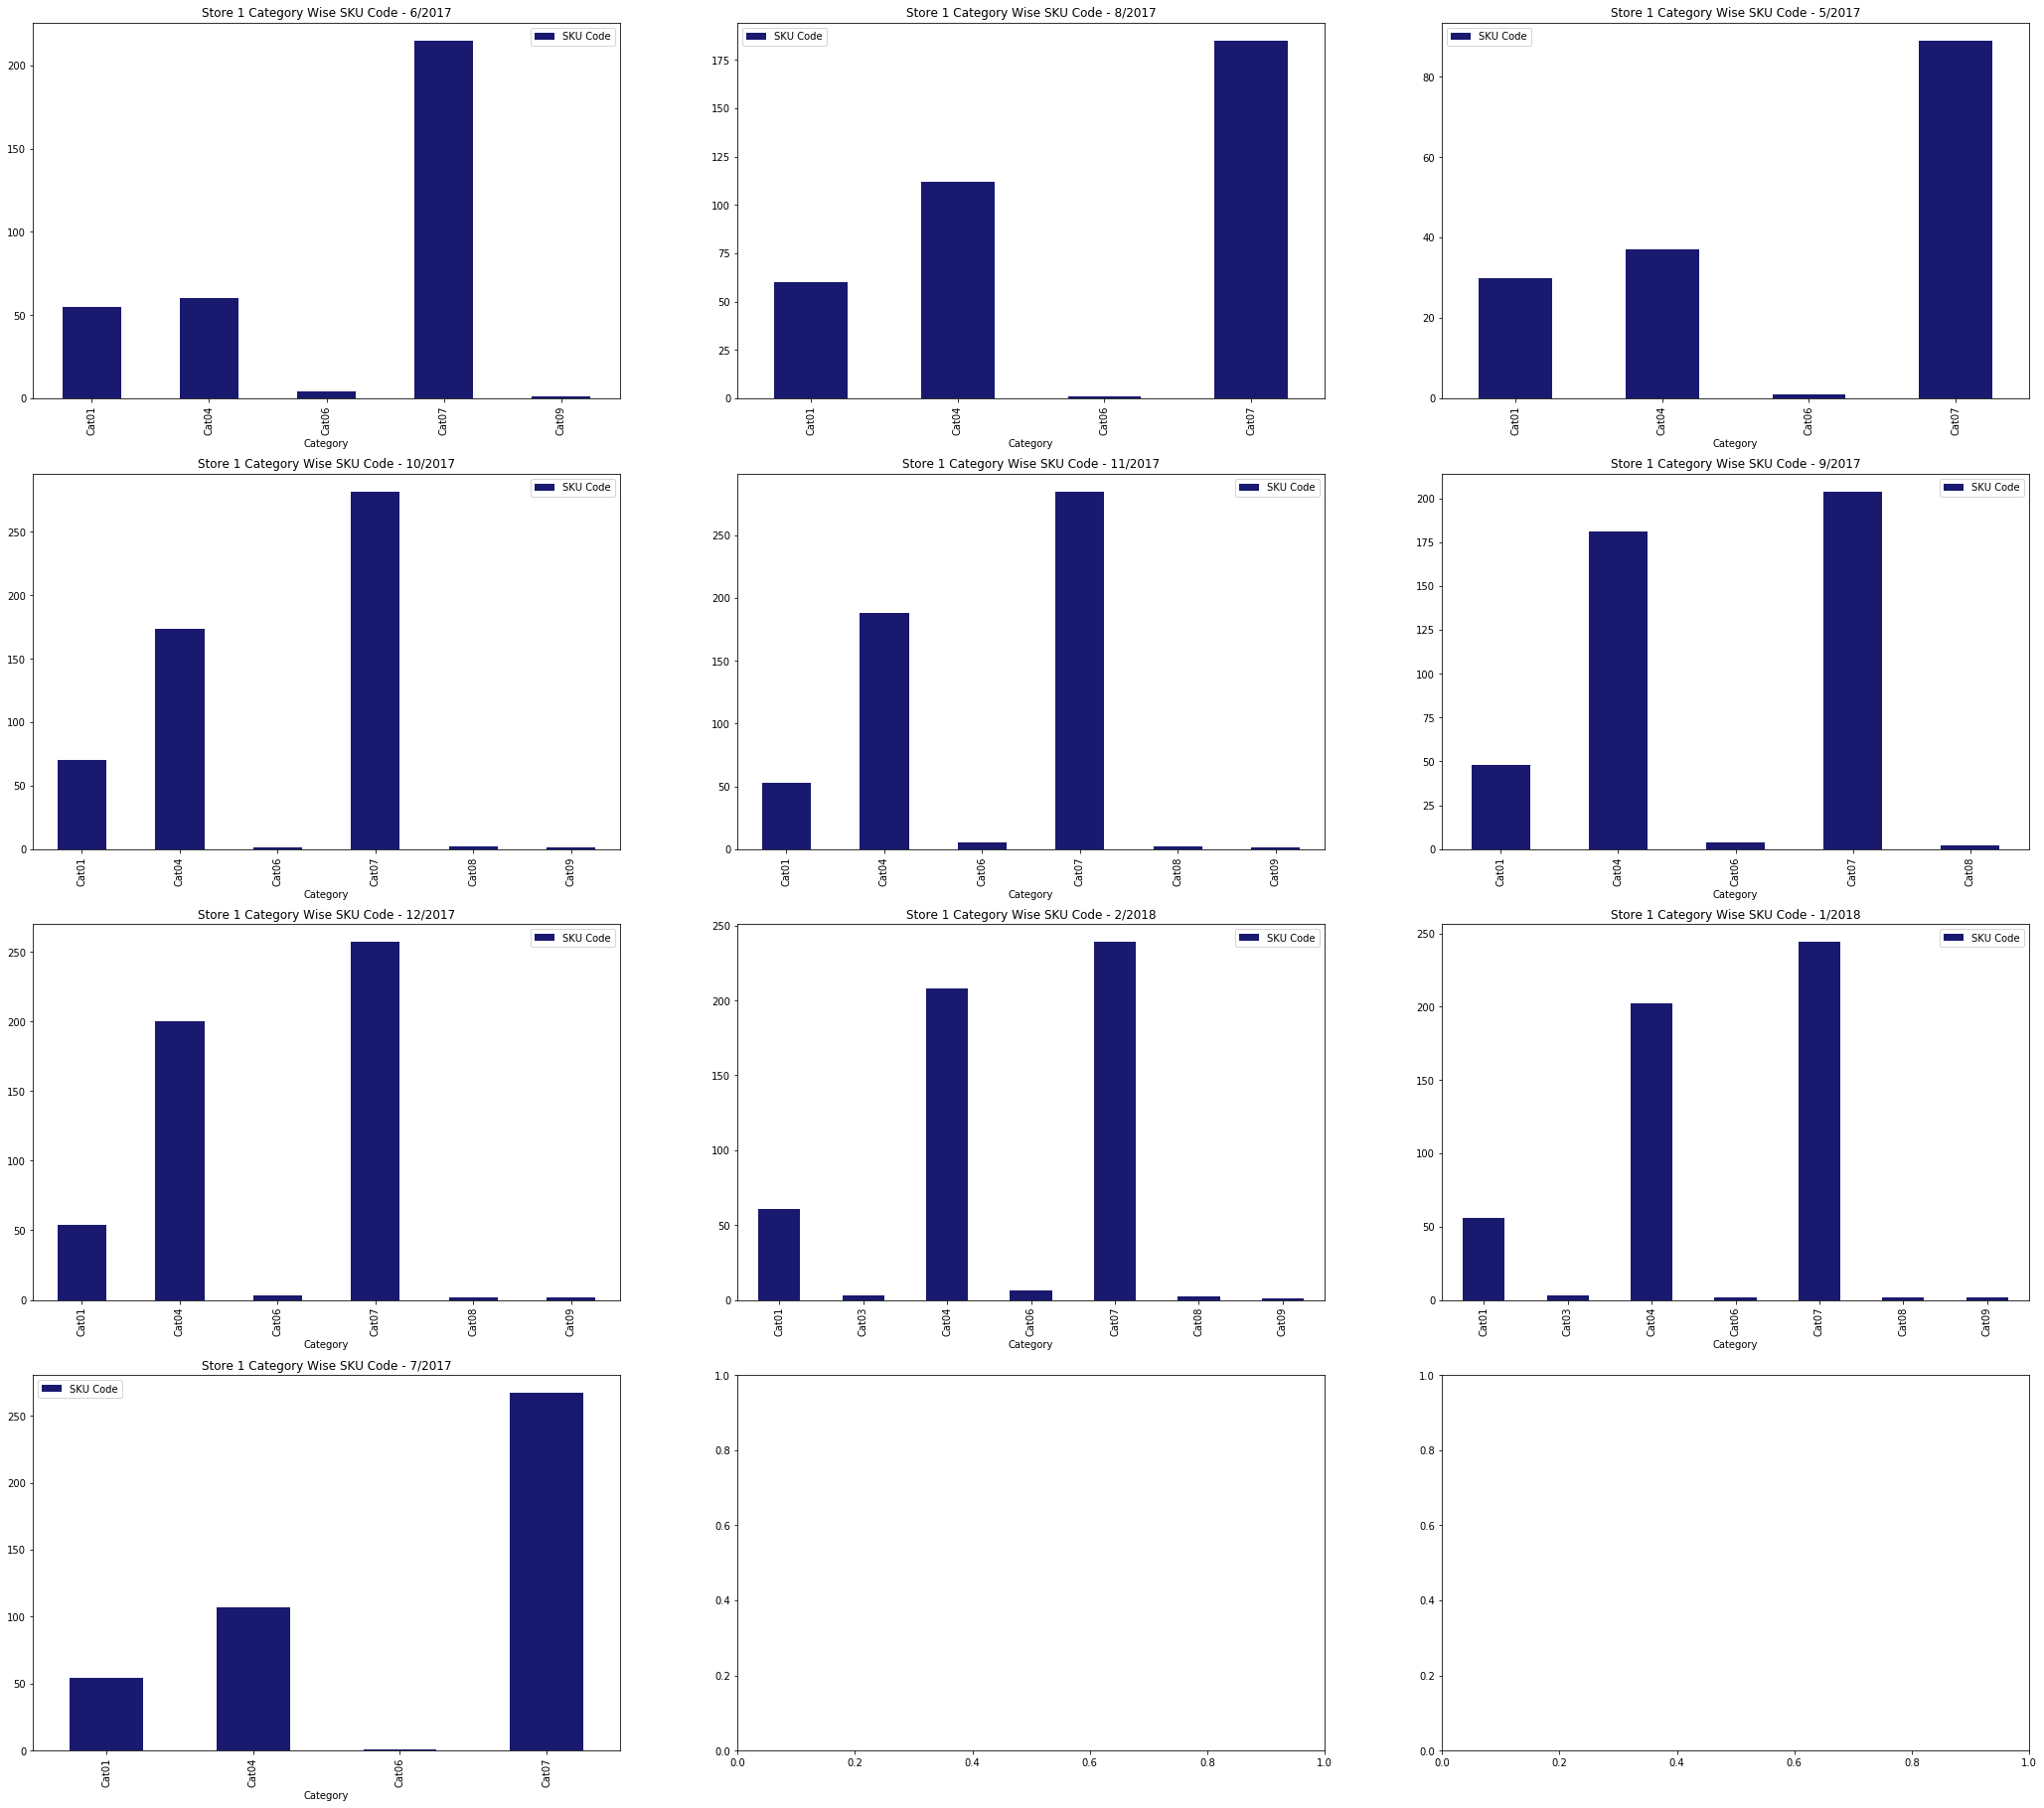

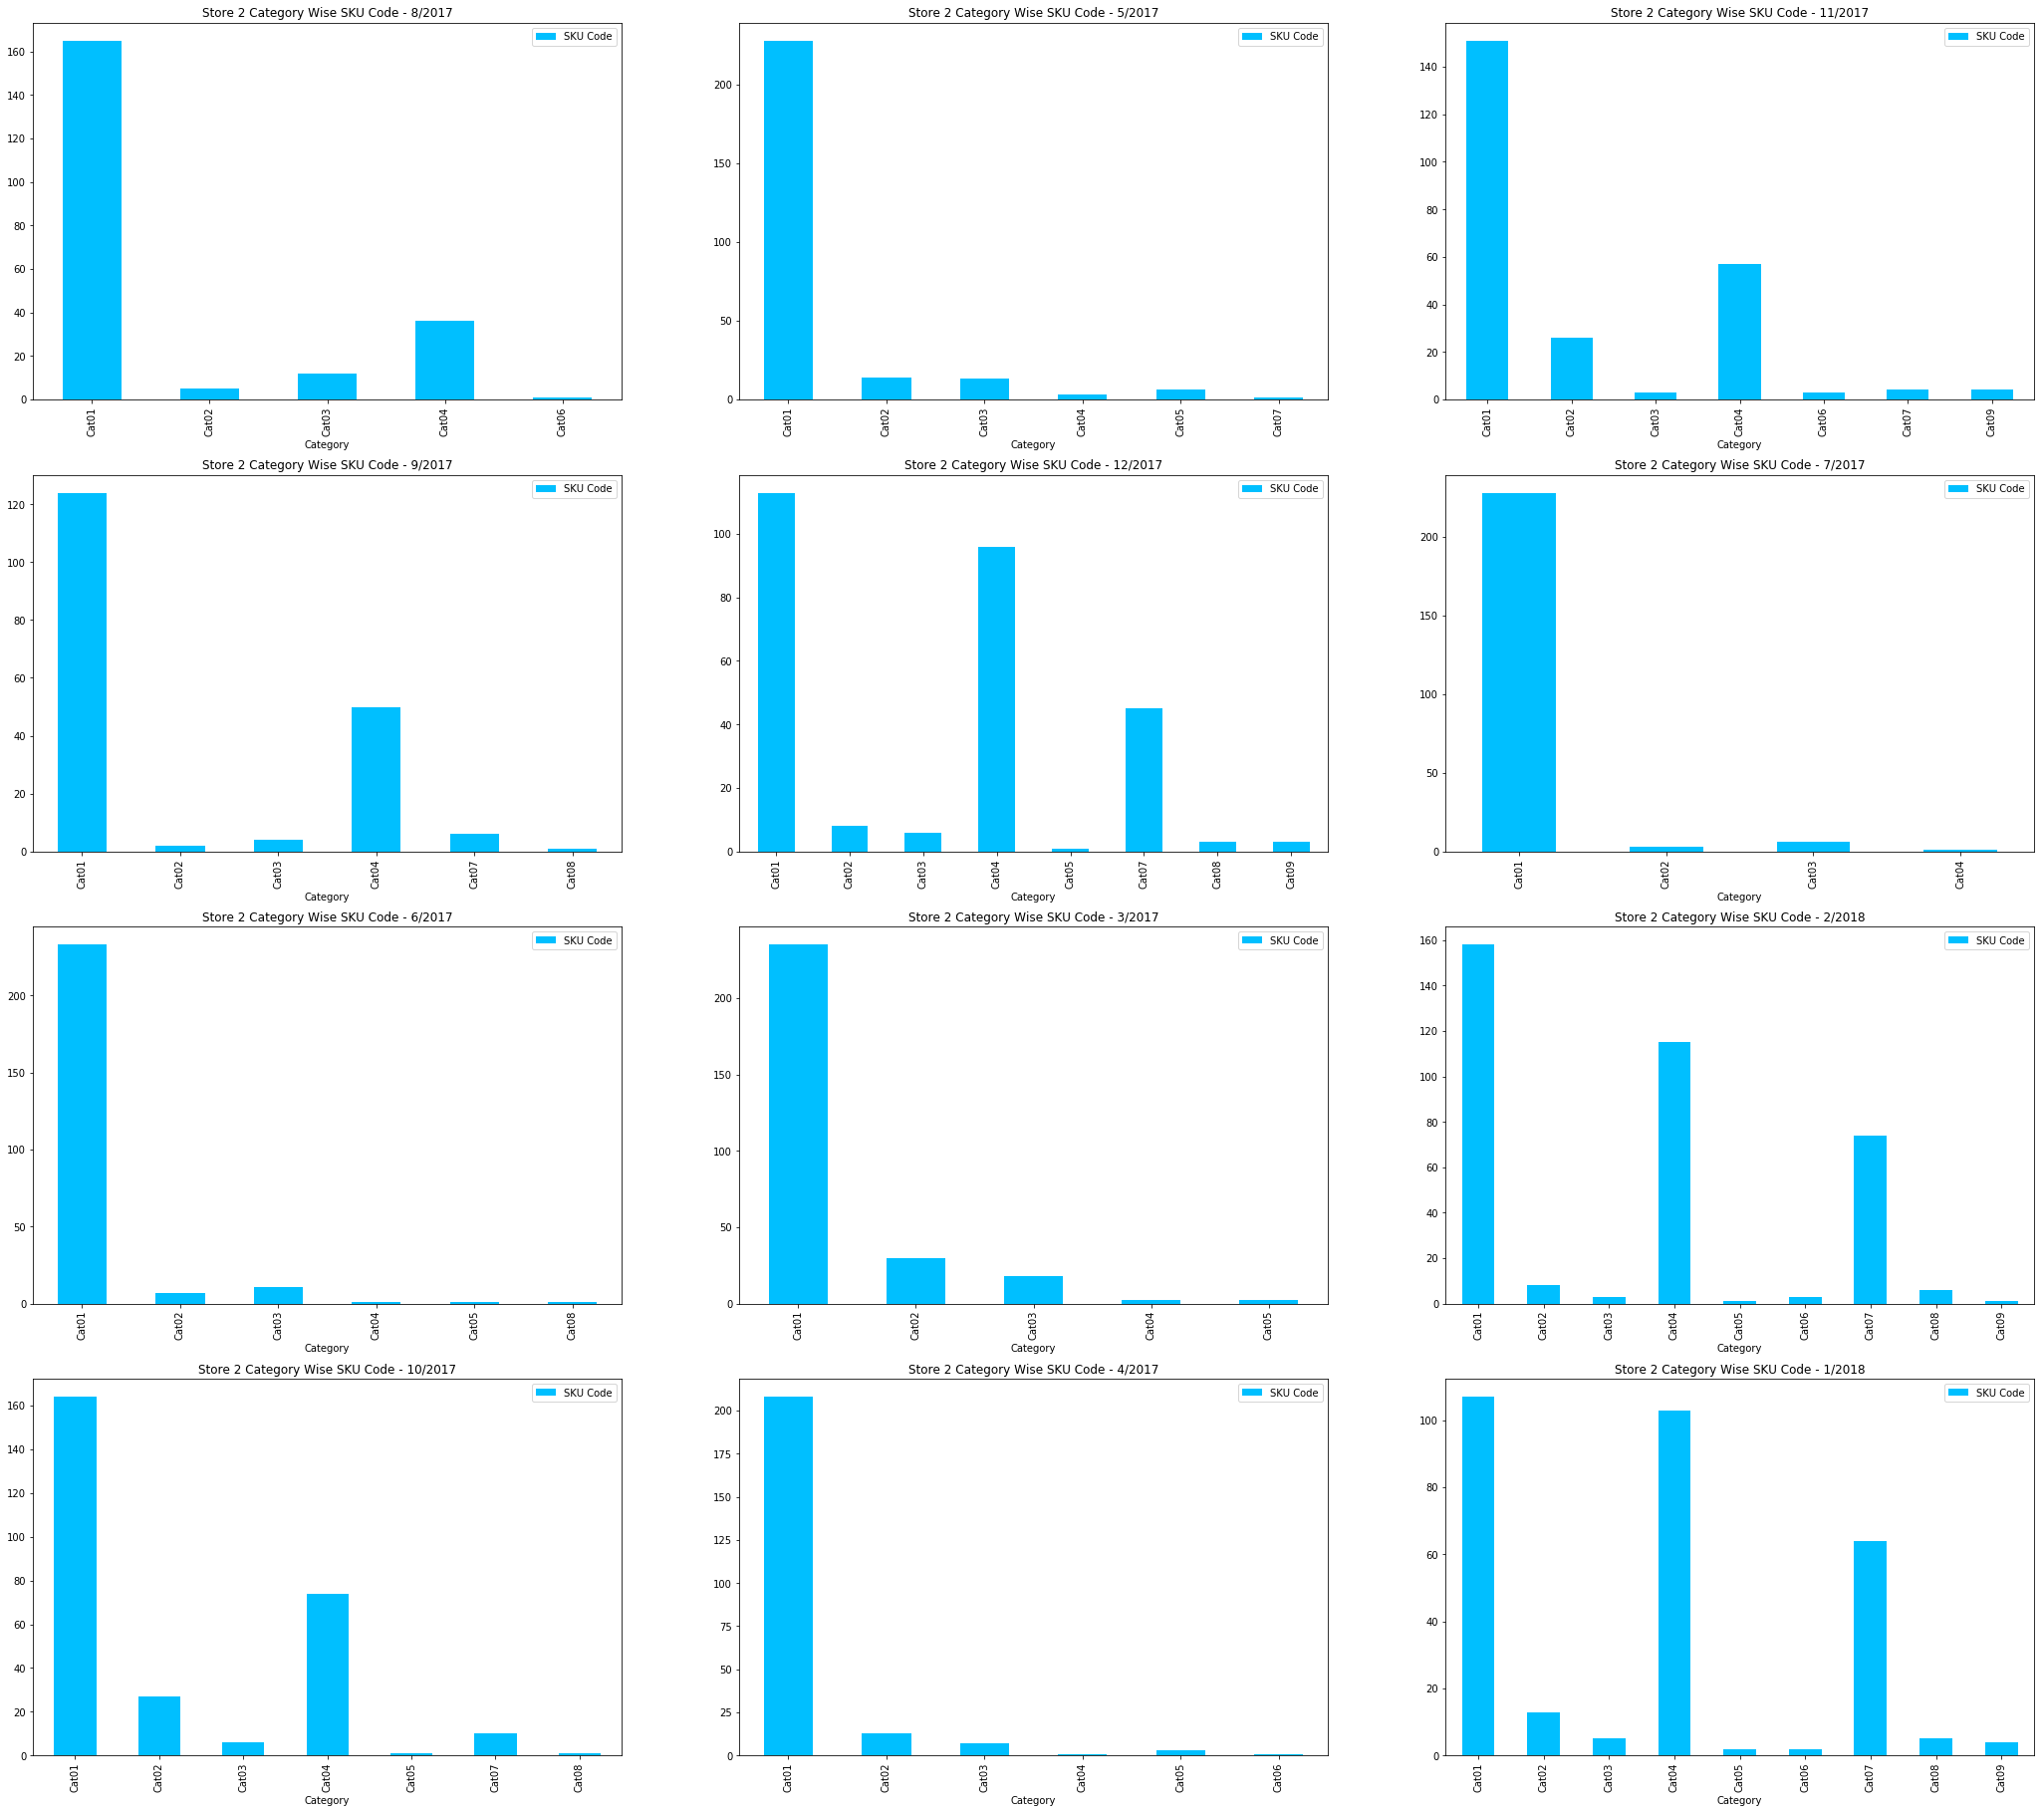

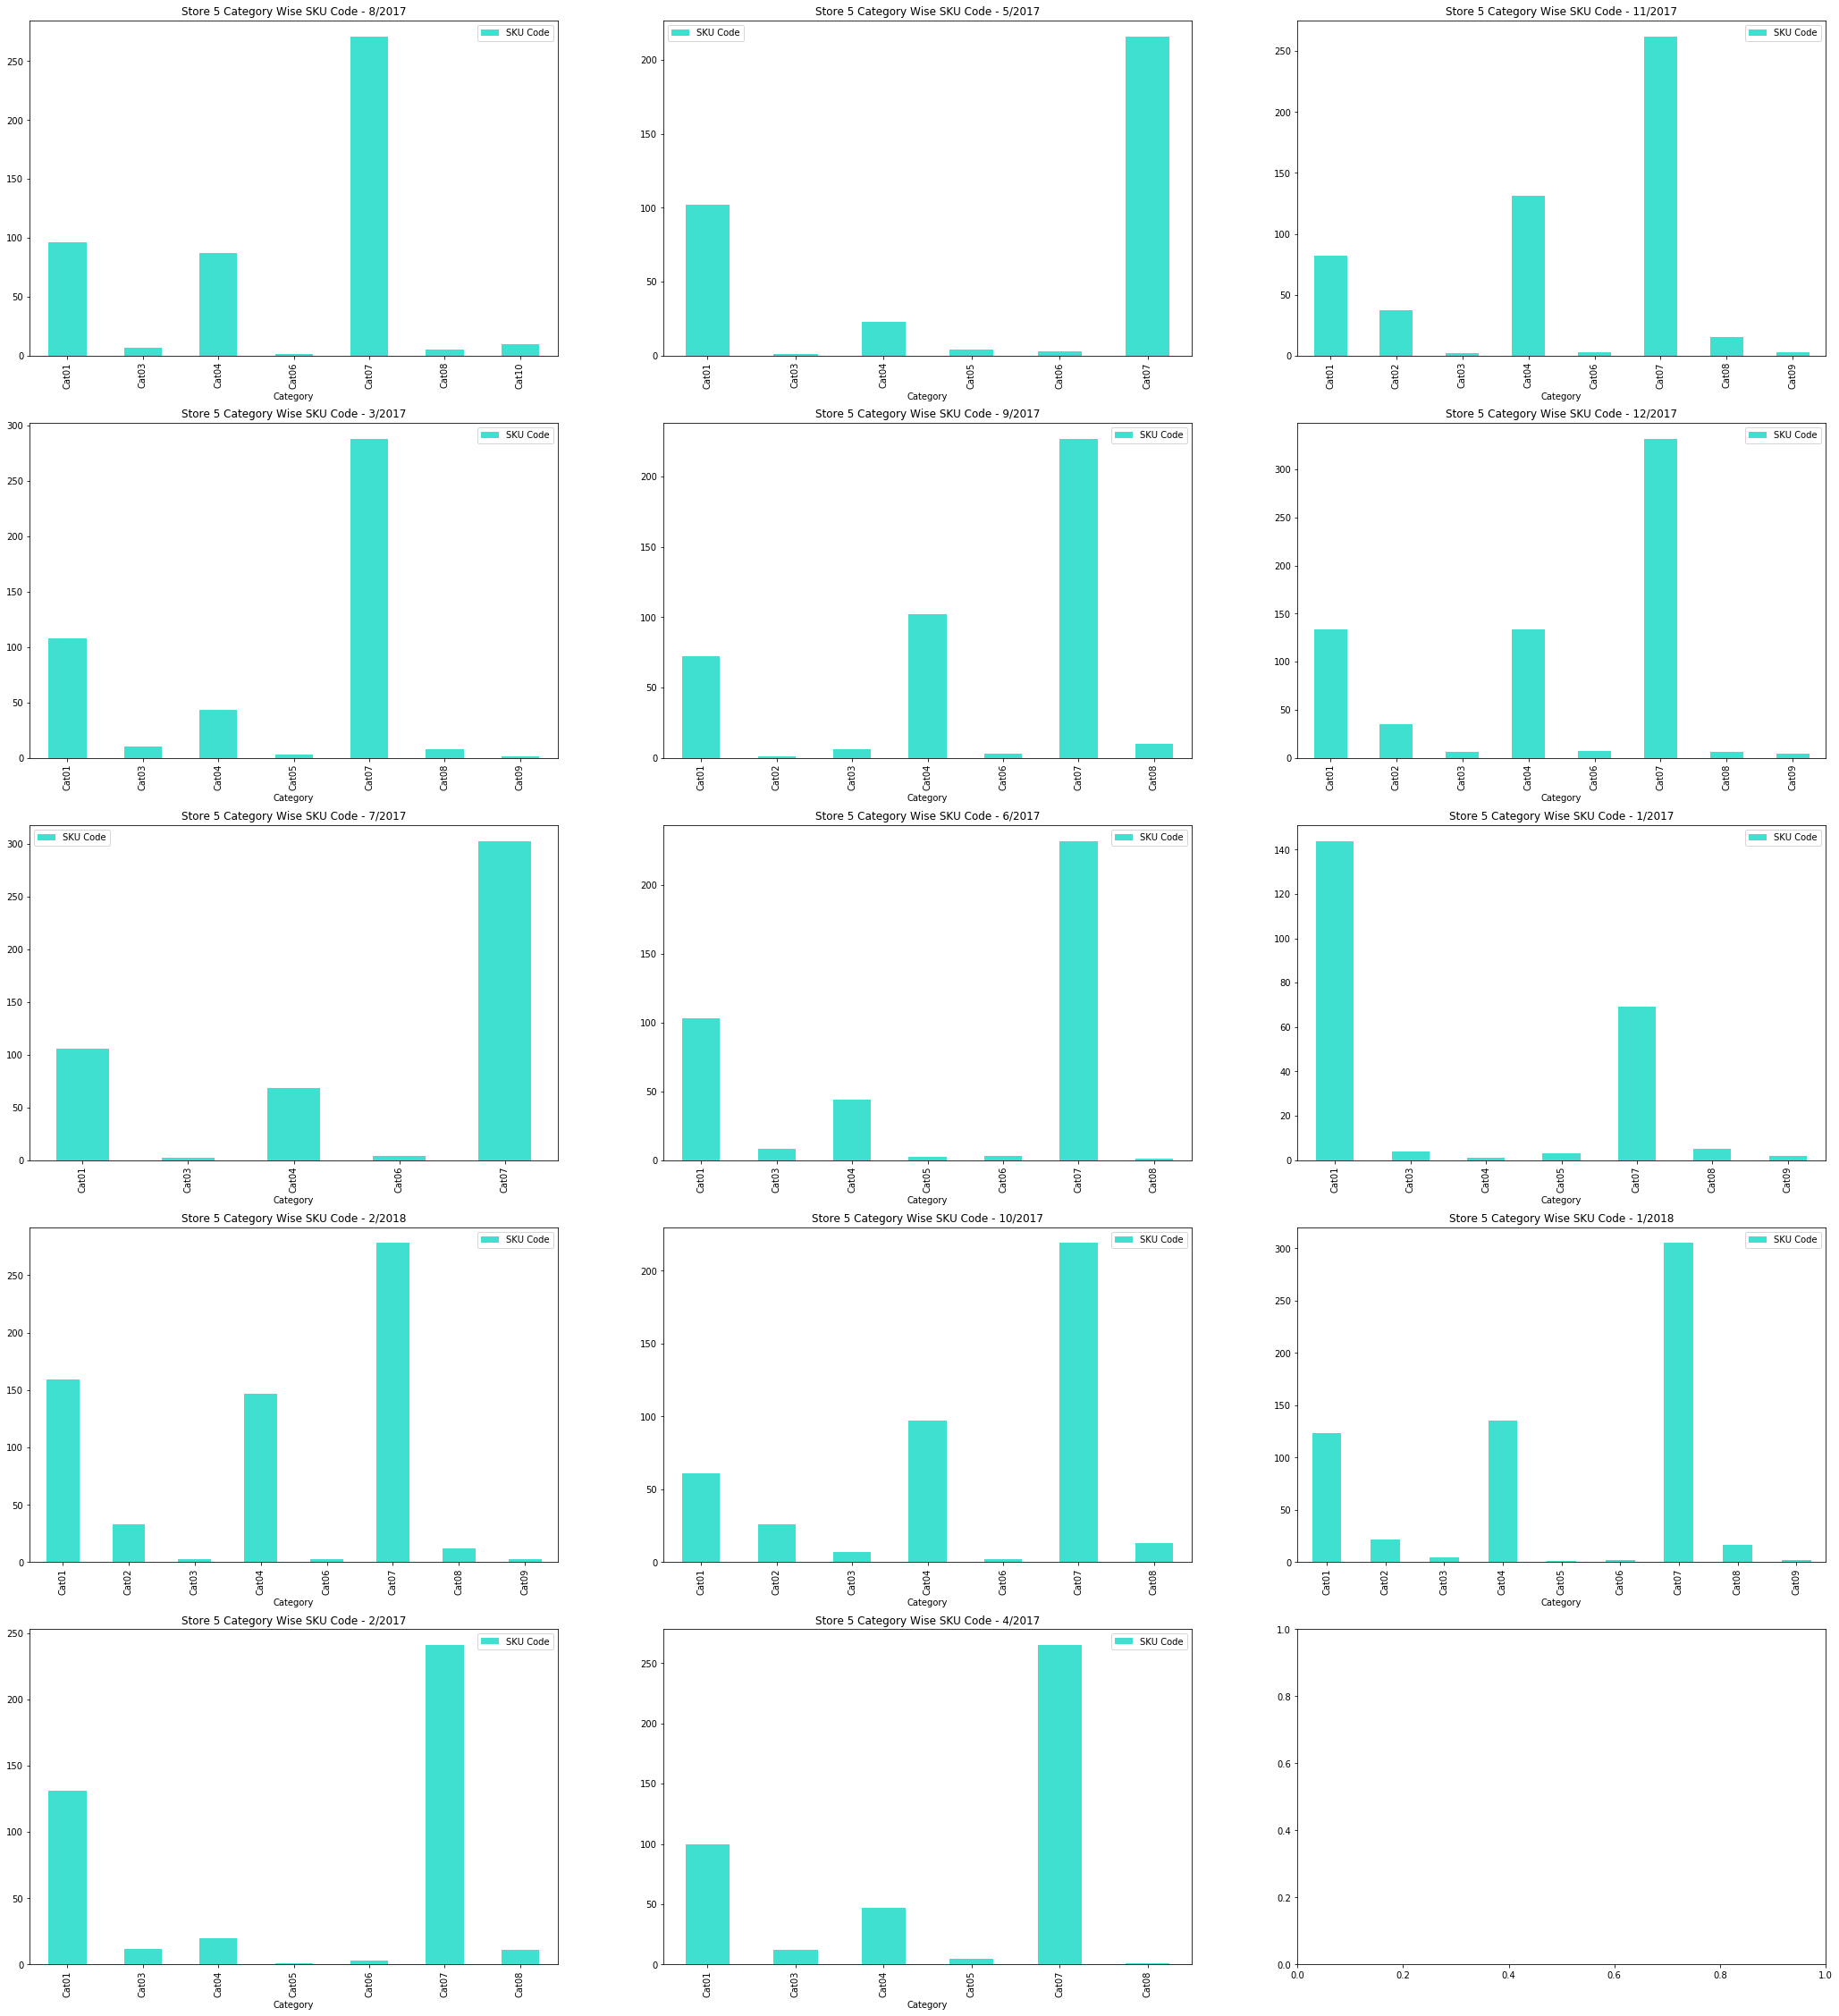

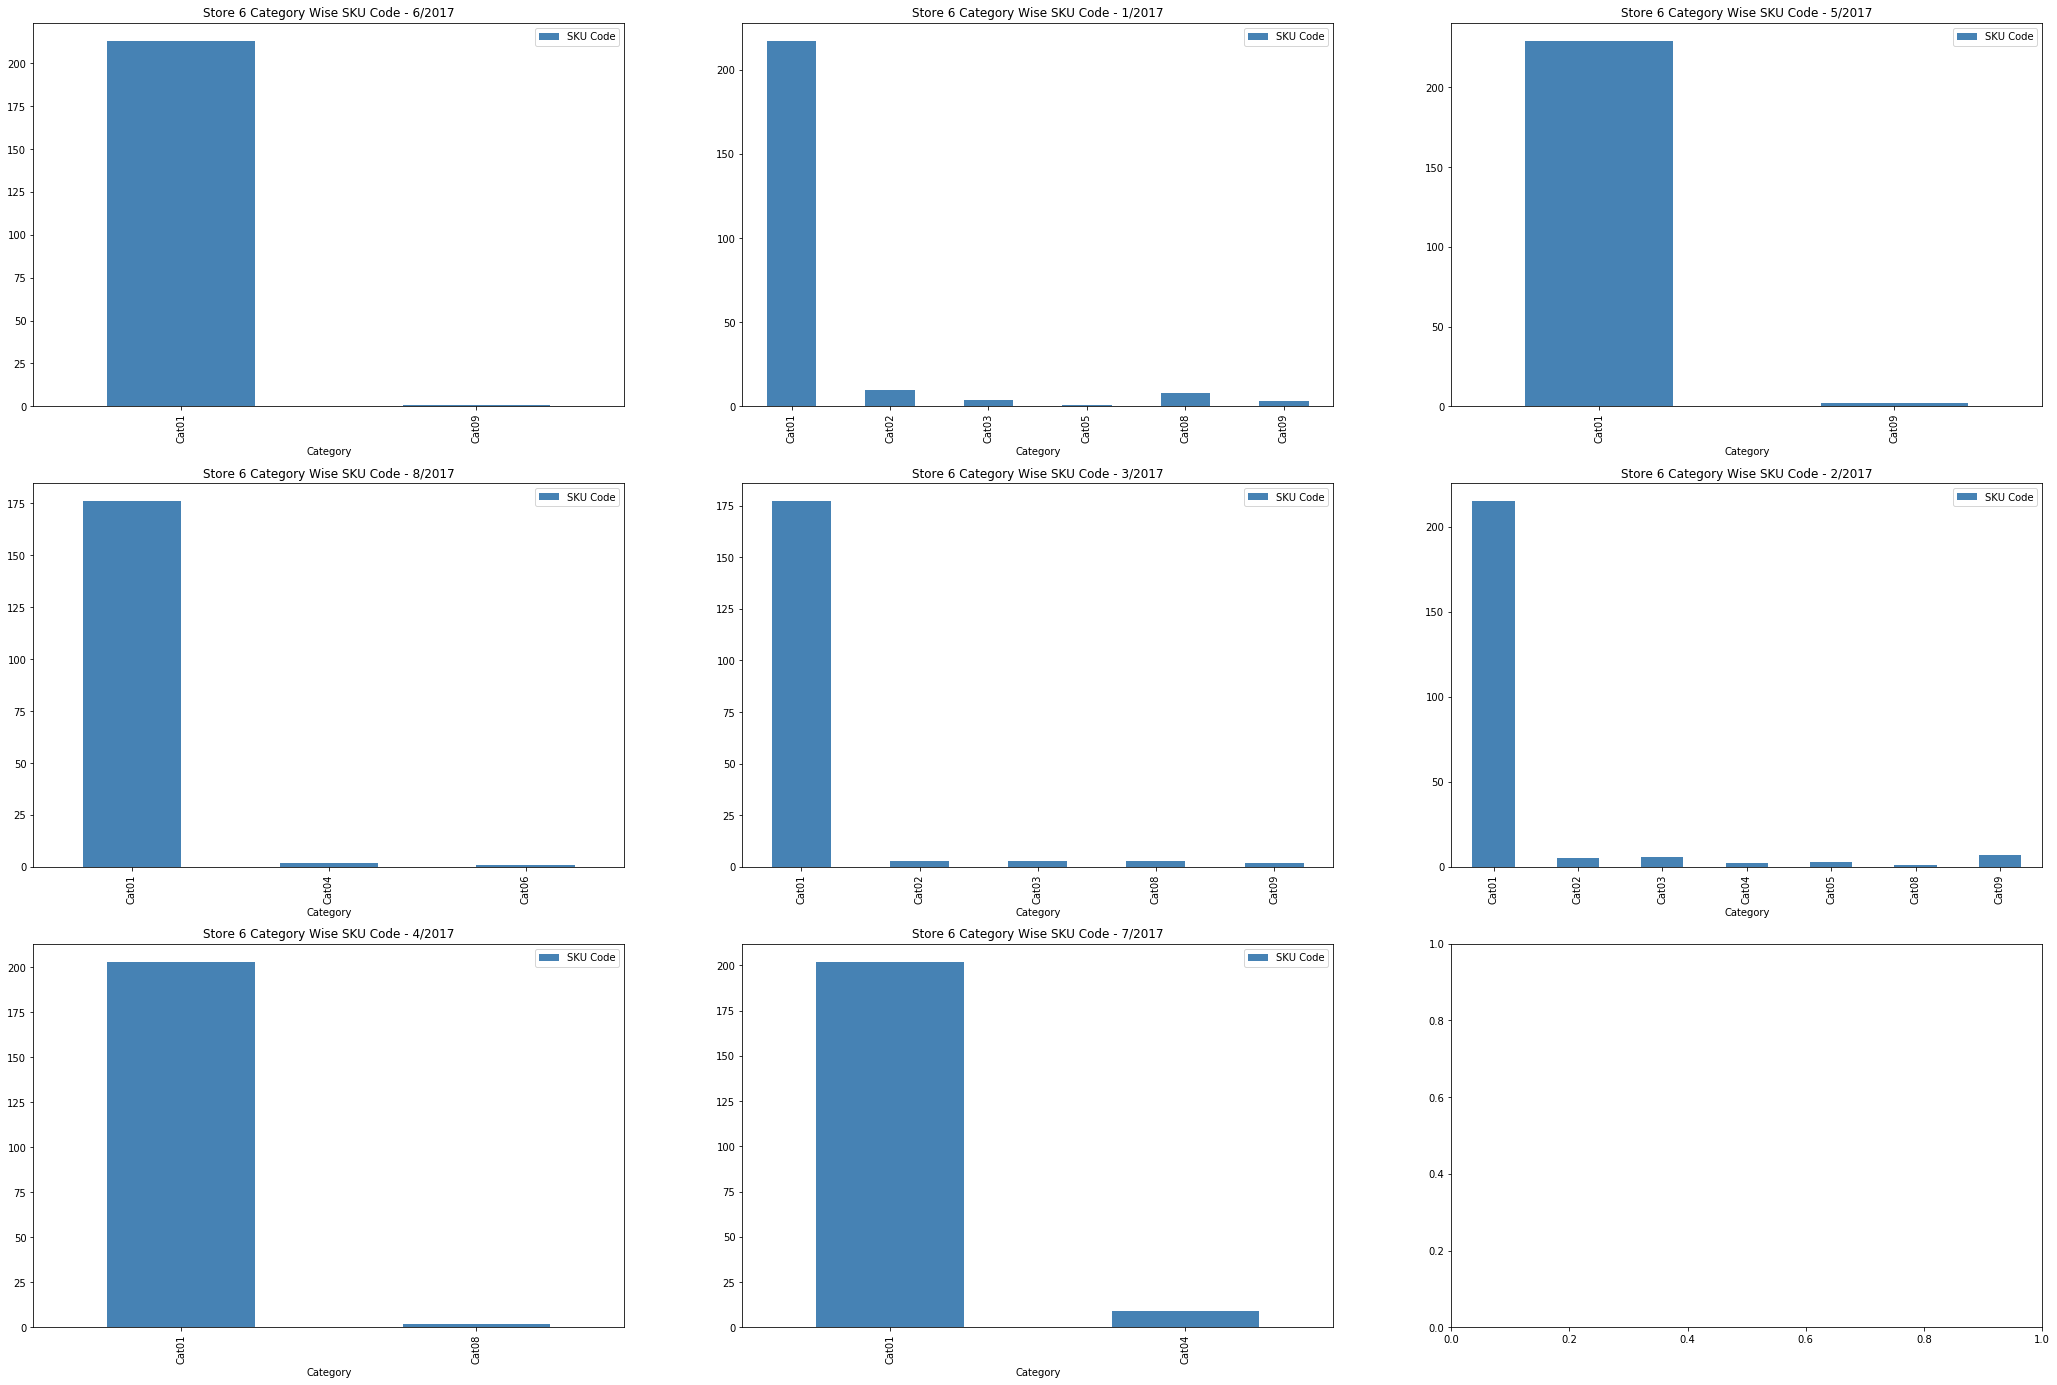

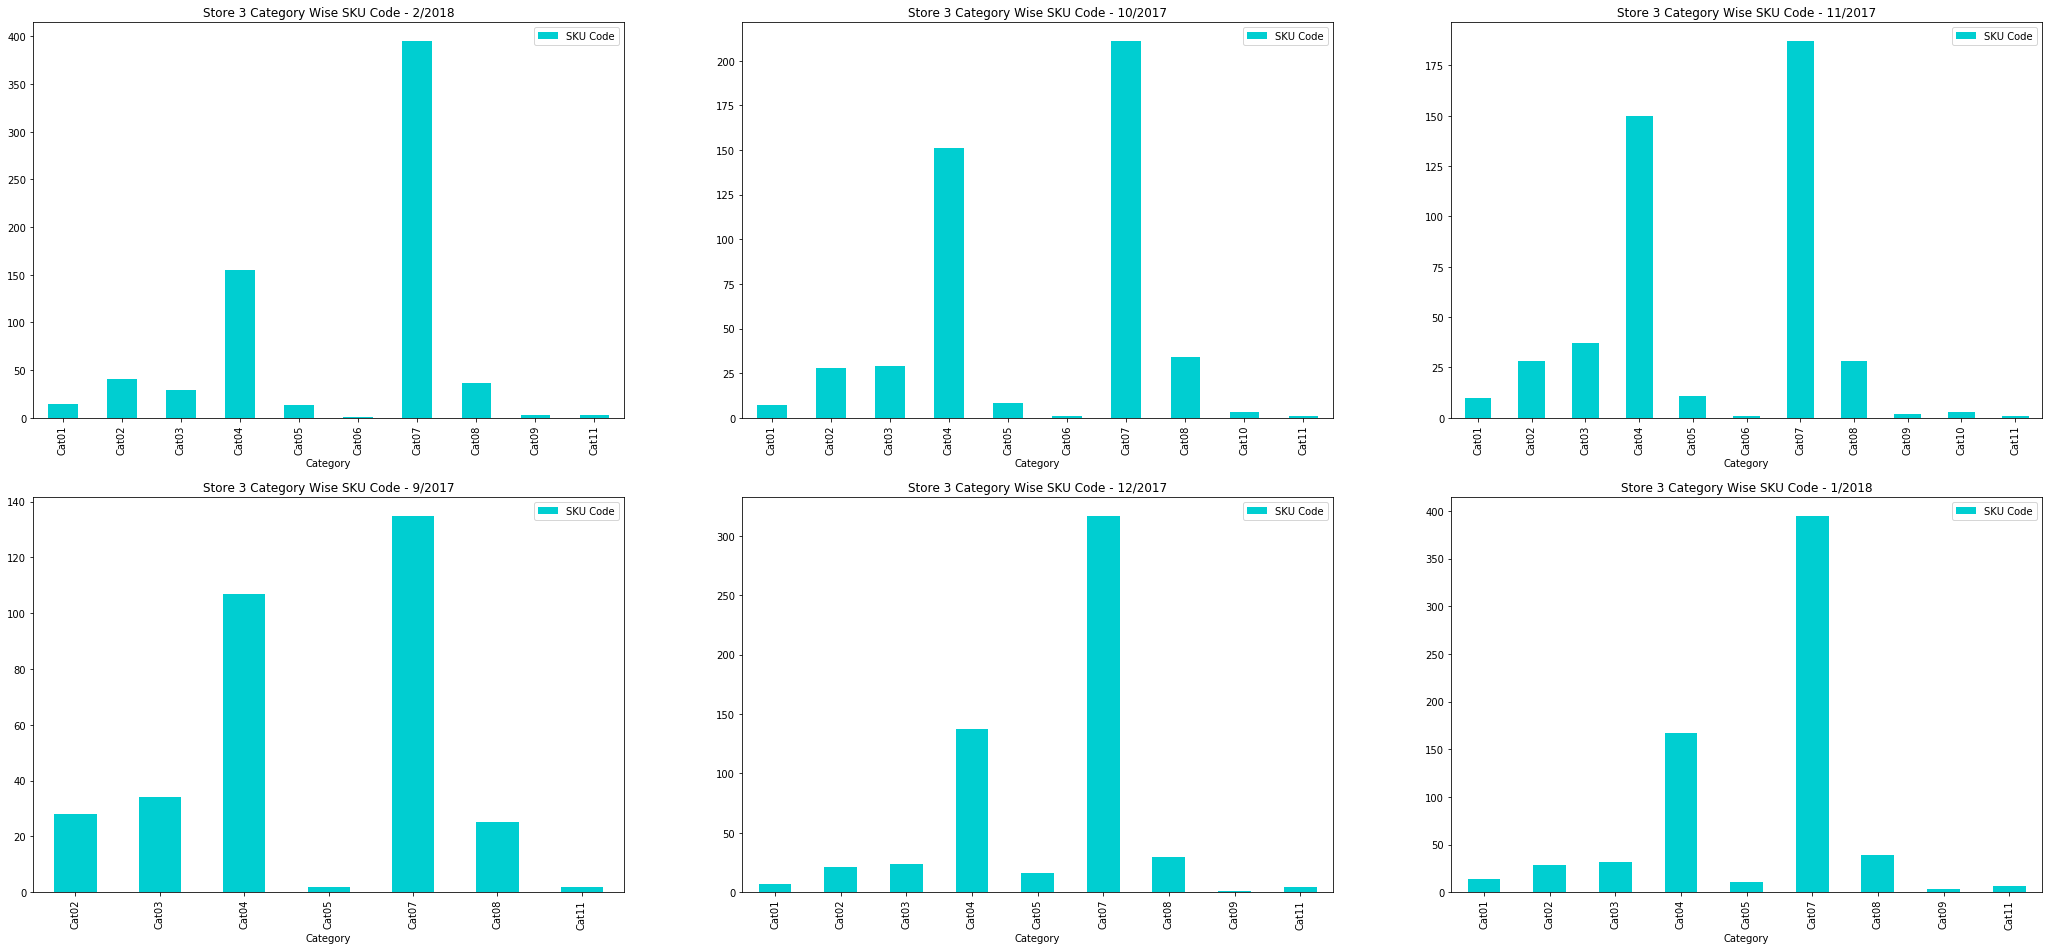

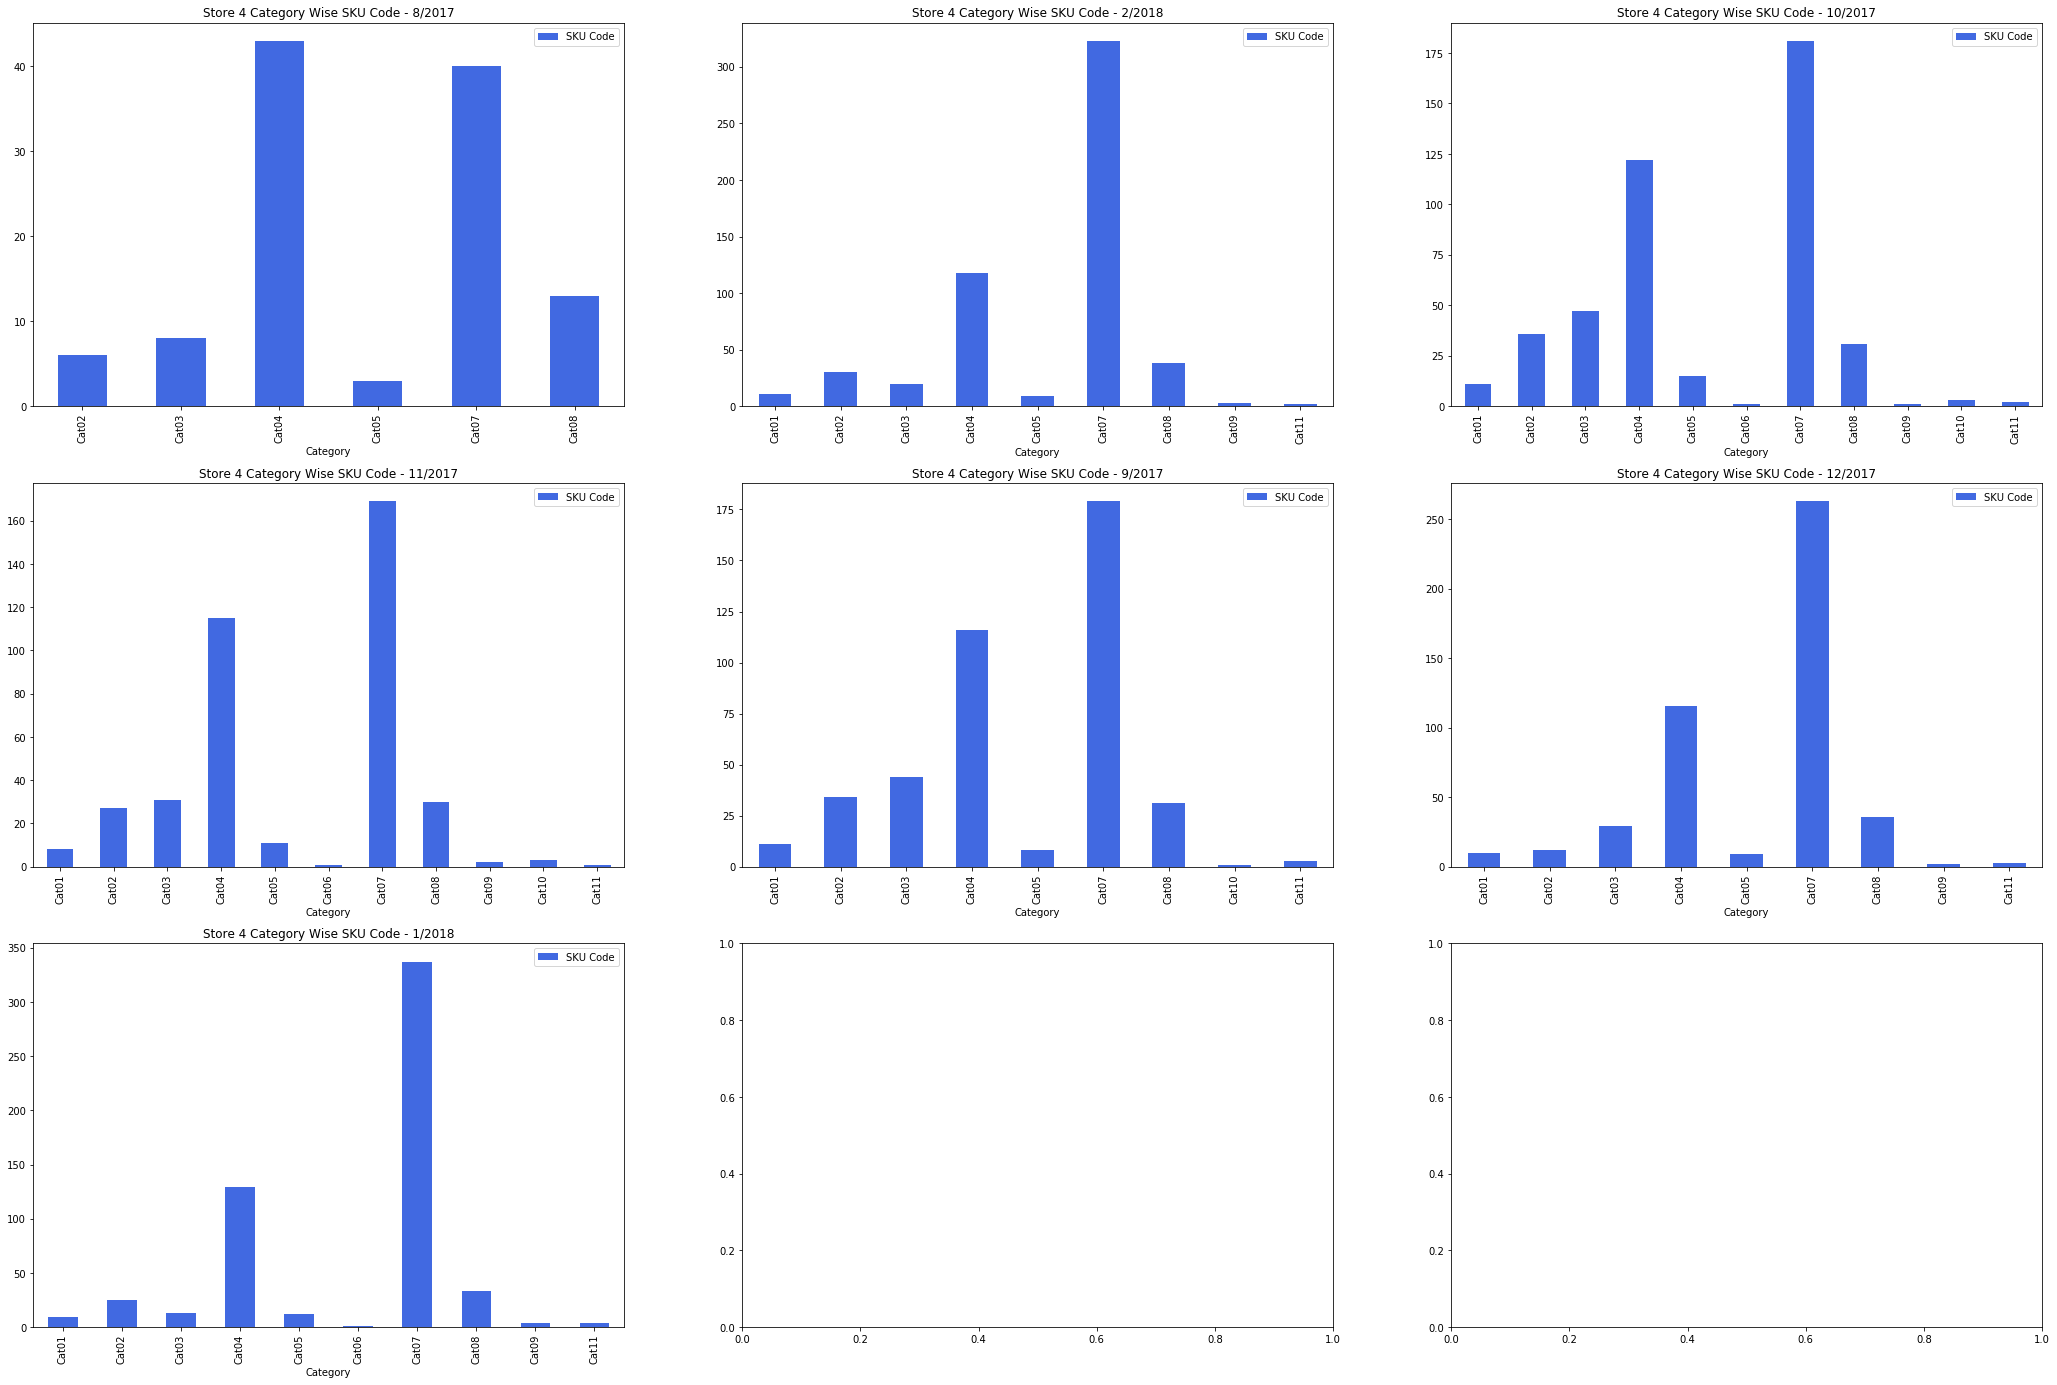

In [18]:
get_category_or_brand_wise_metrics_per_month_plots(data['sku_metrics_deep'], plot_kind='Category', df_kind='SKU Code')

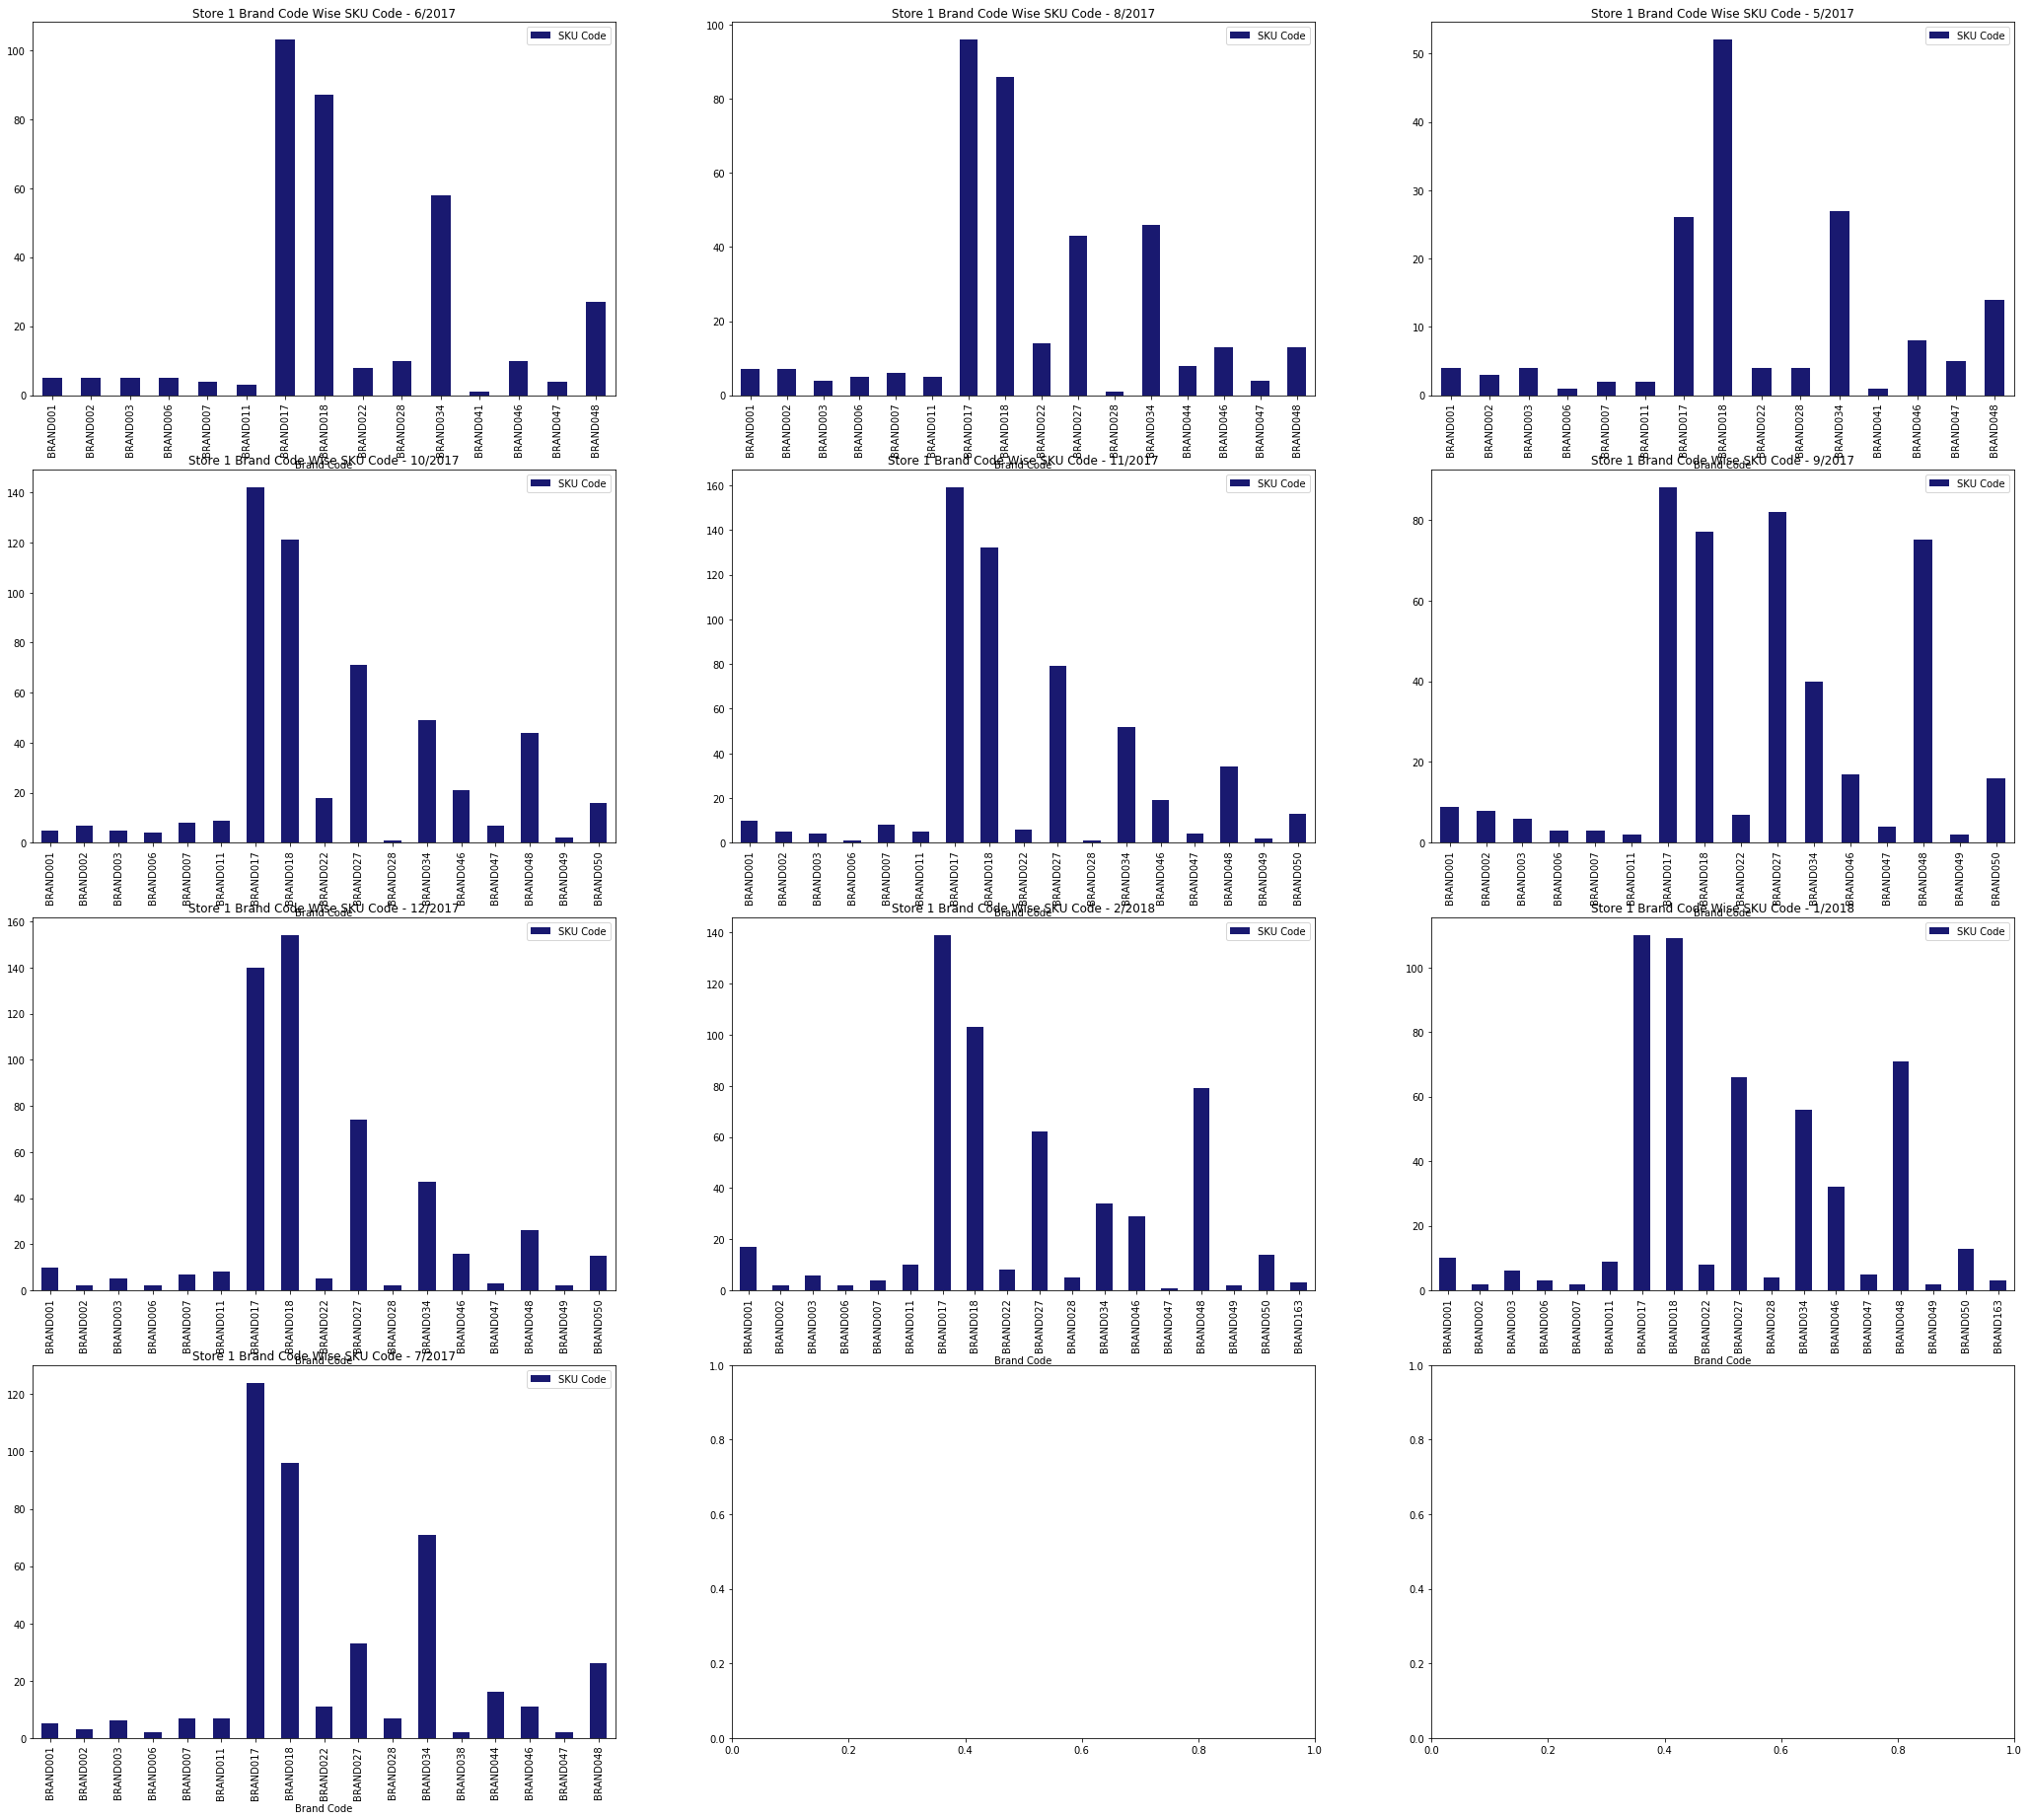

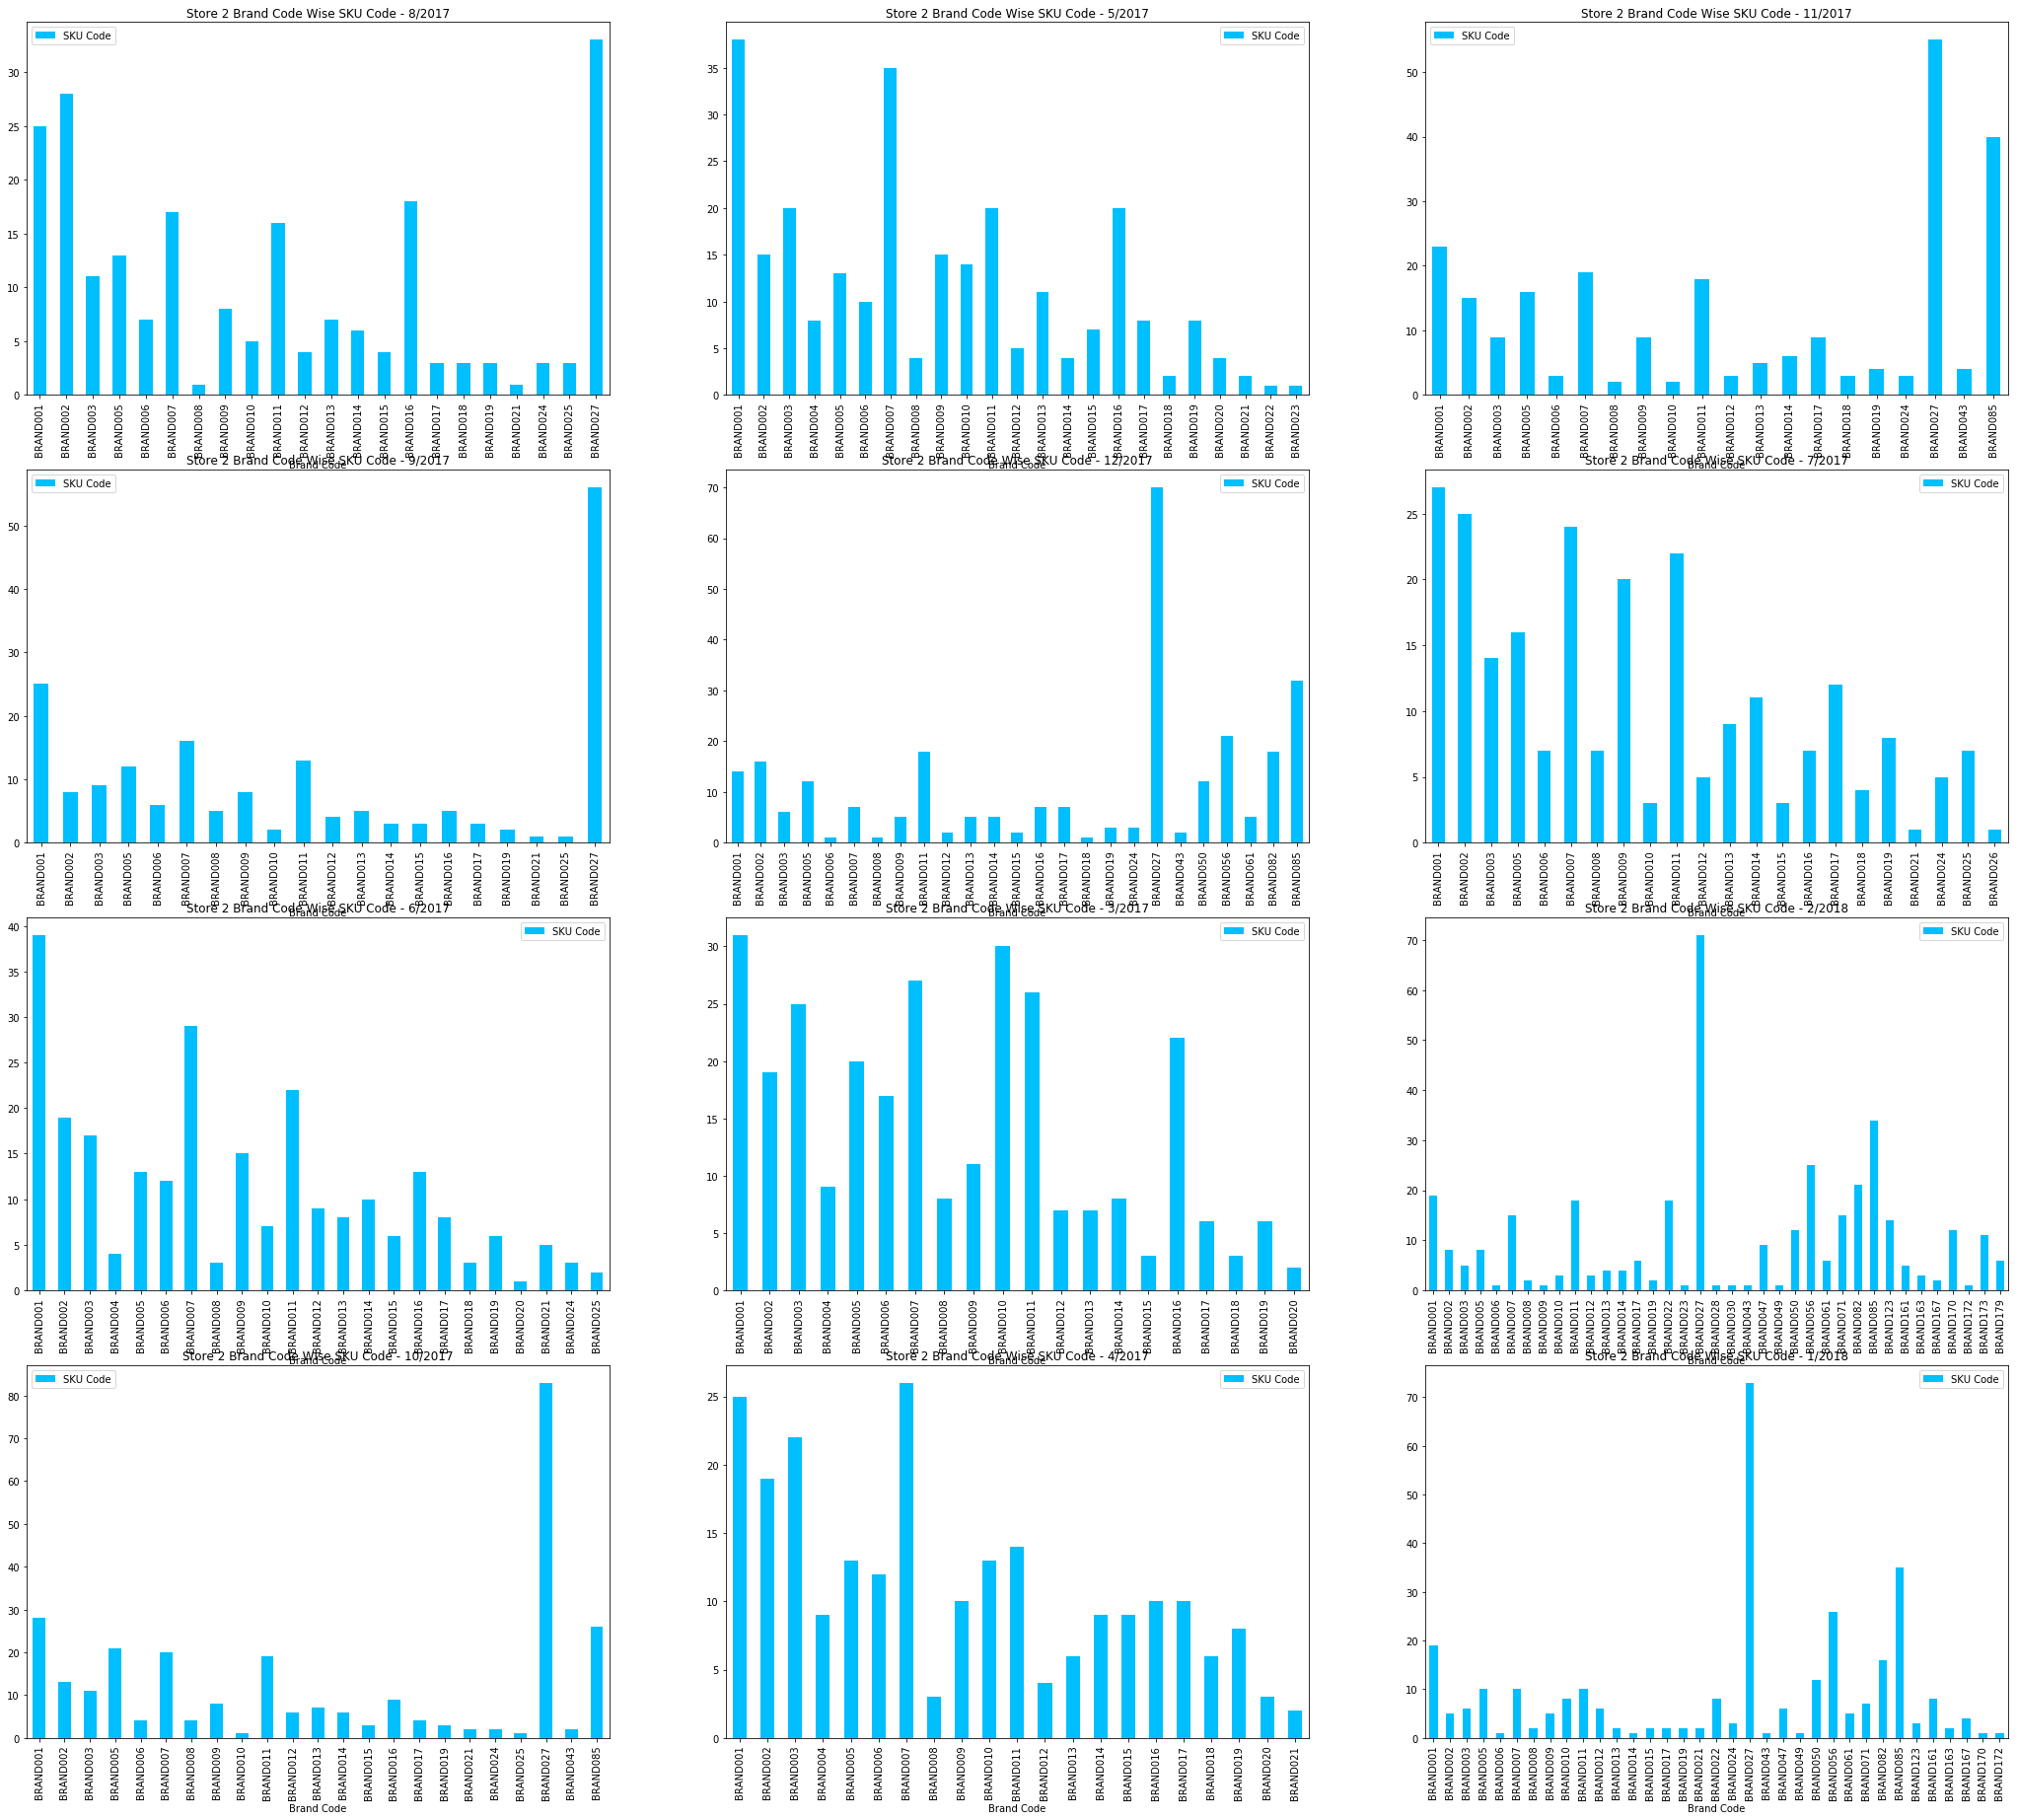

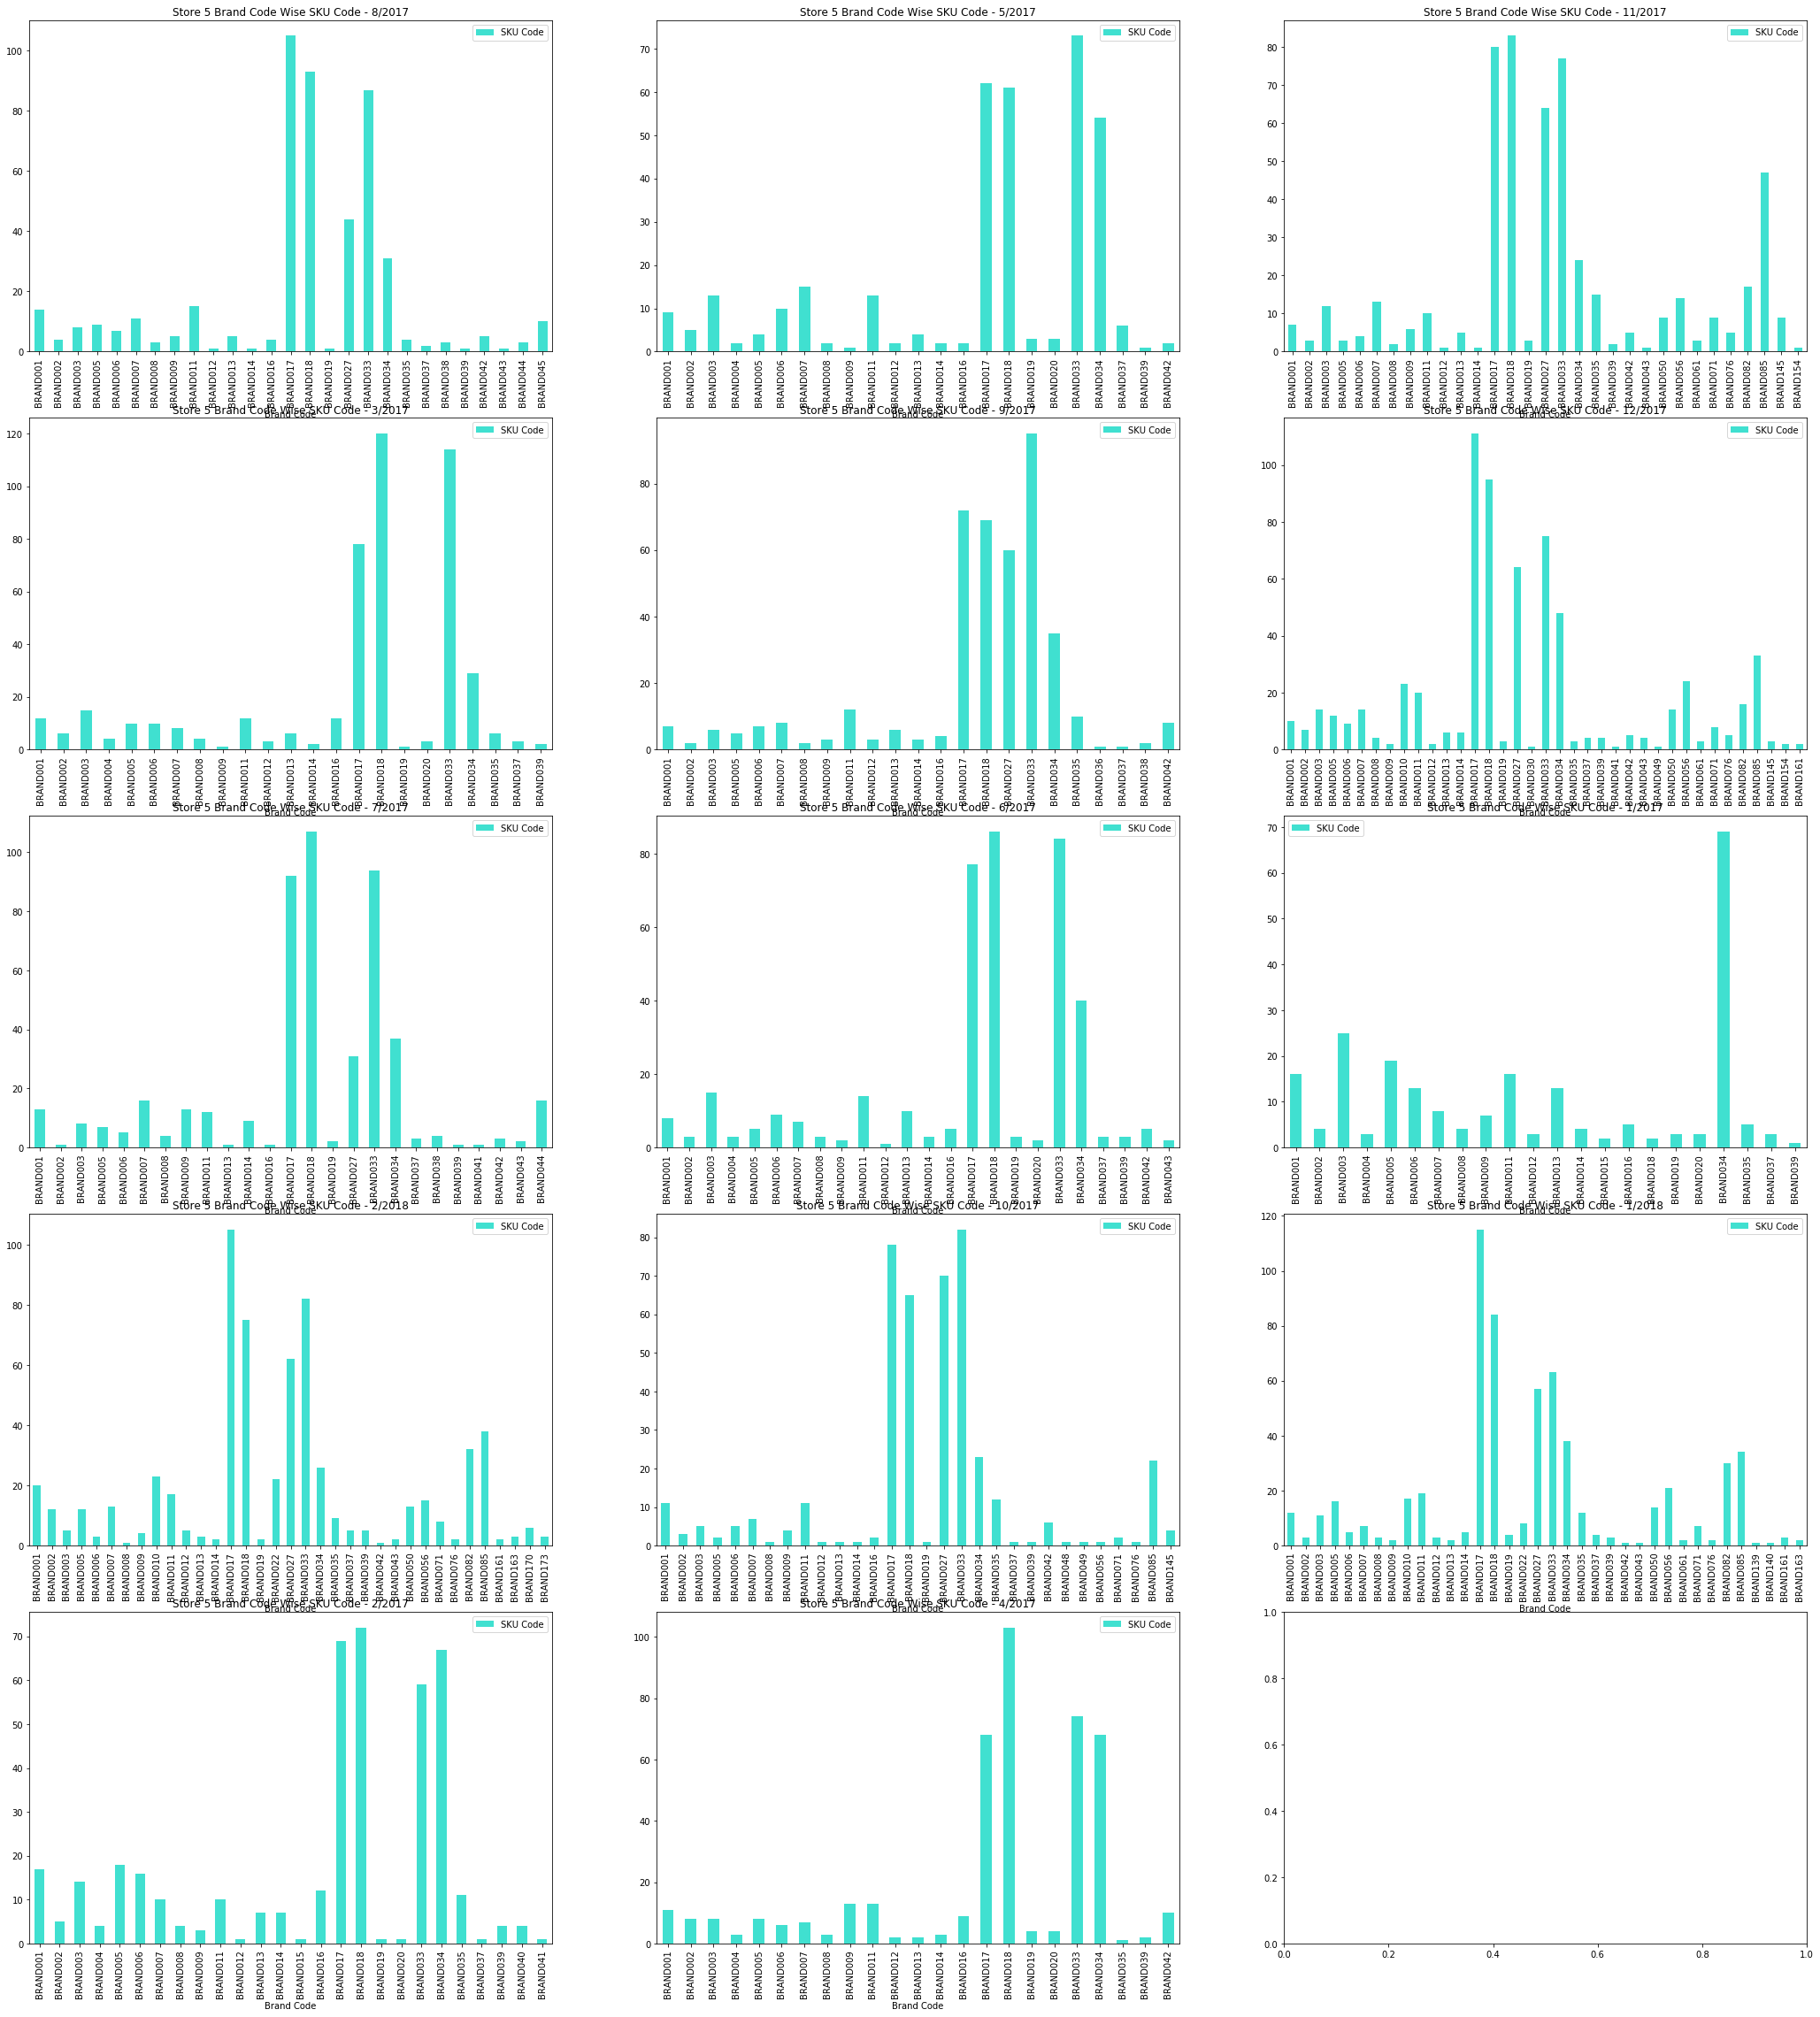

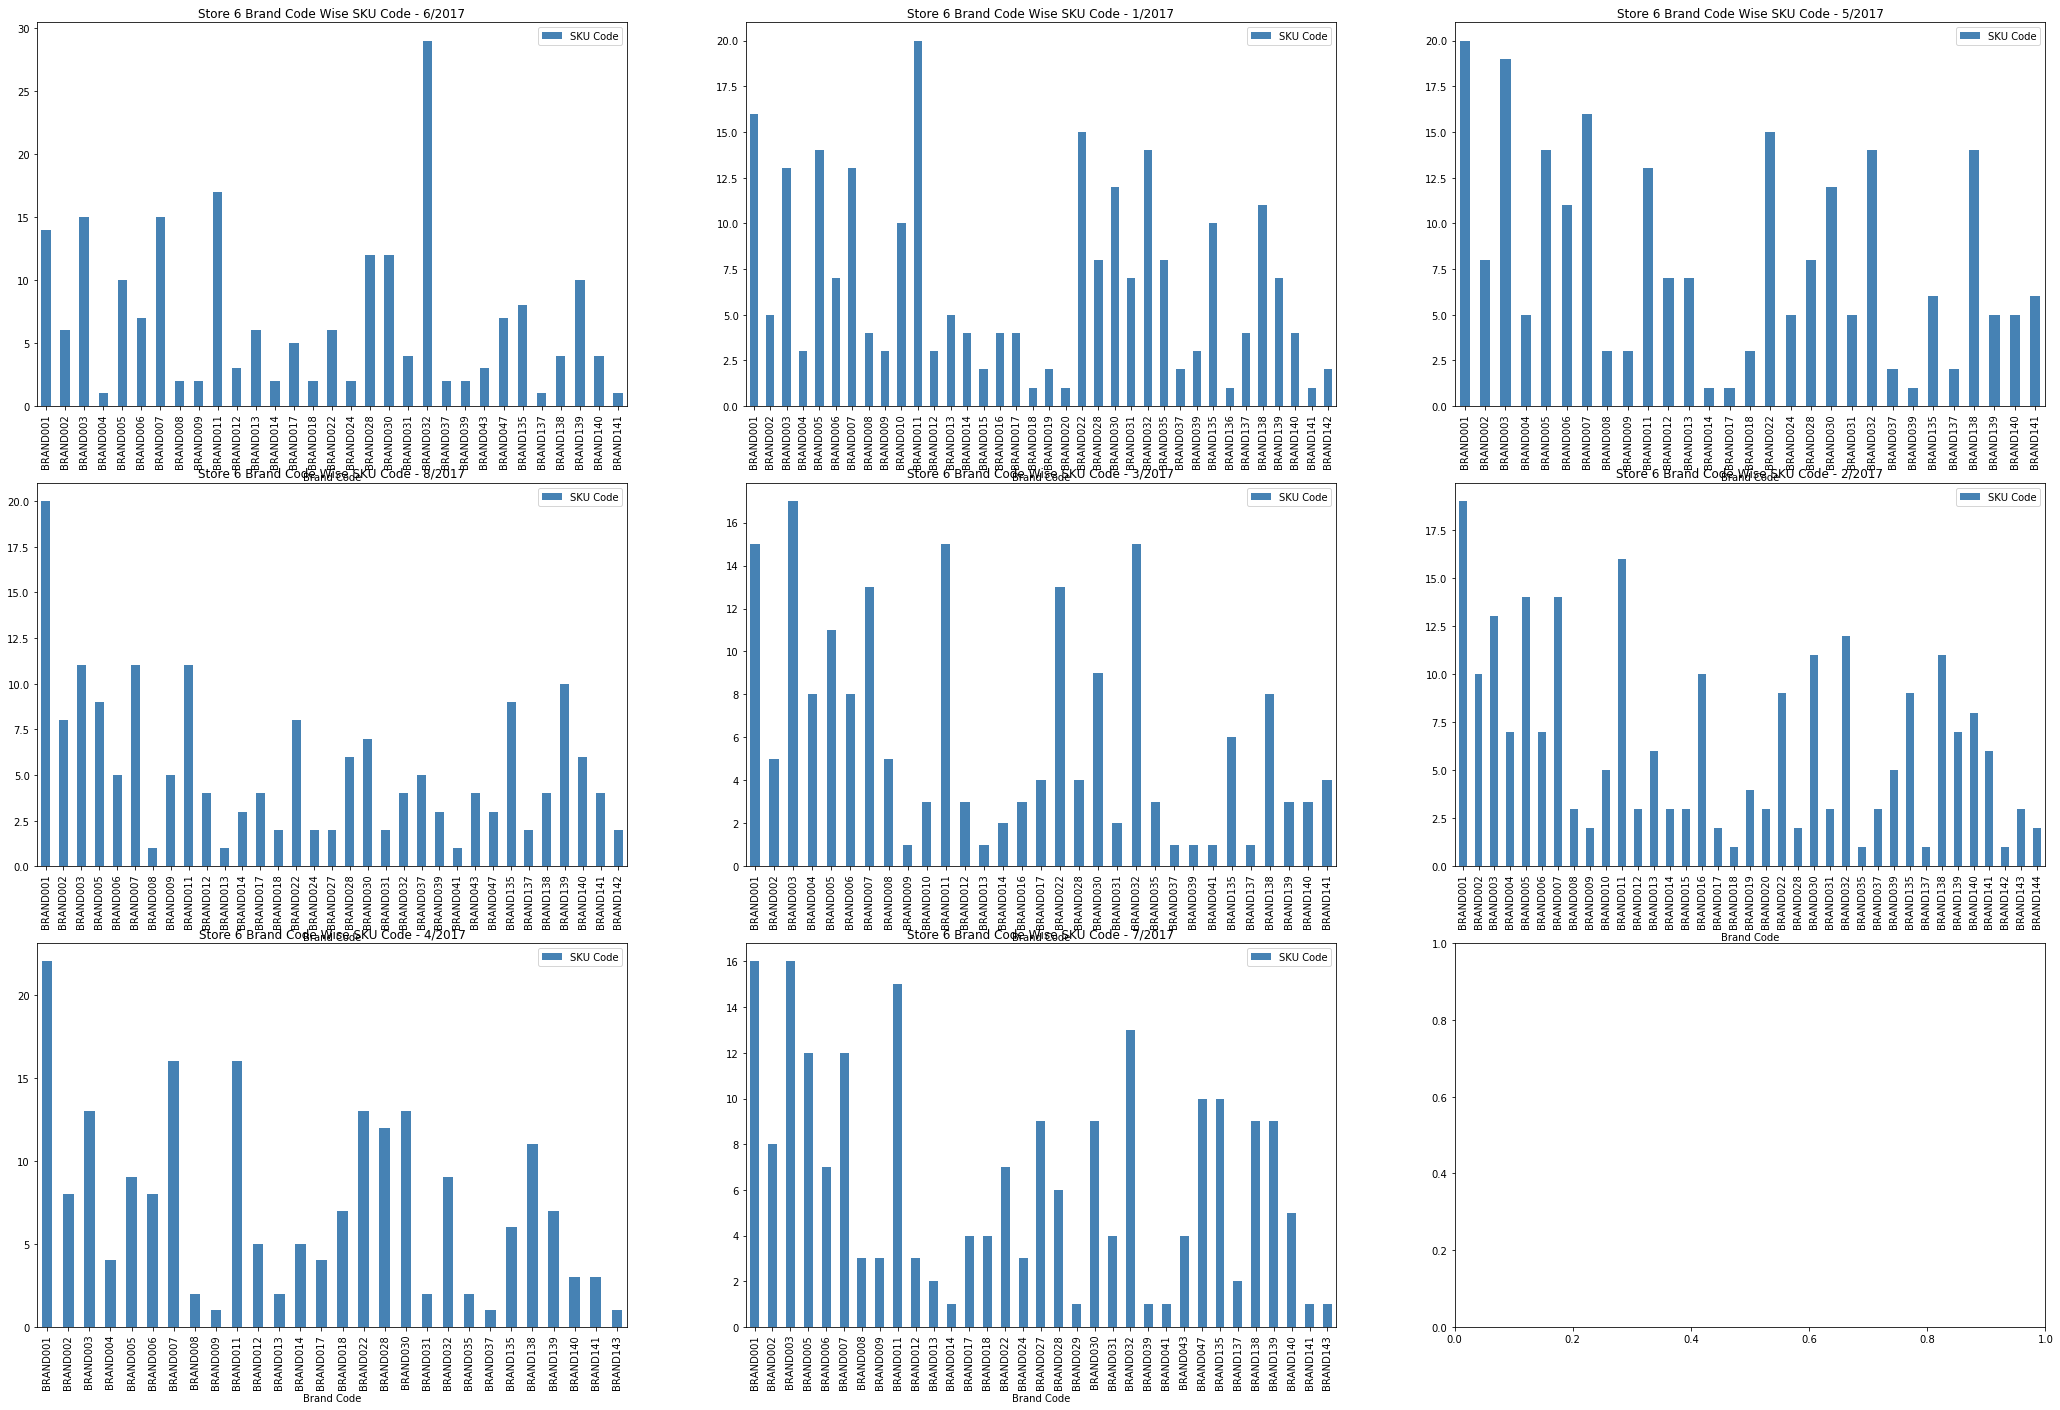

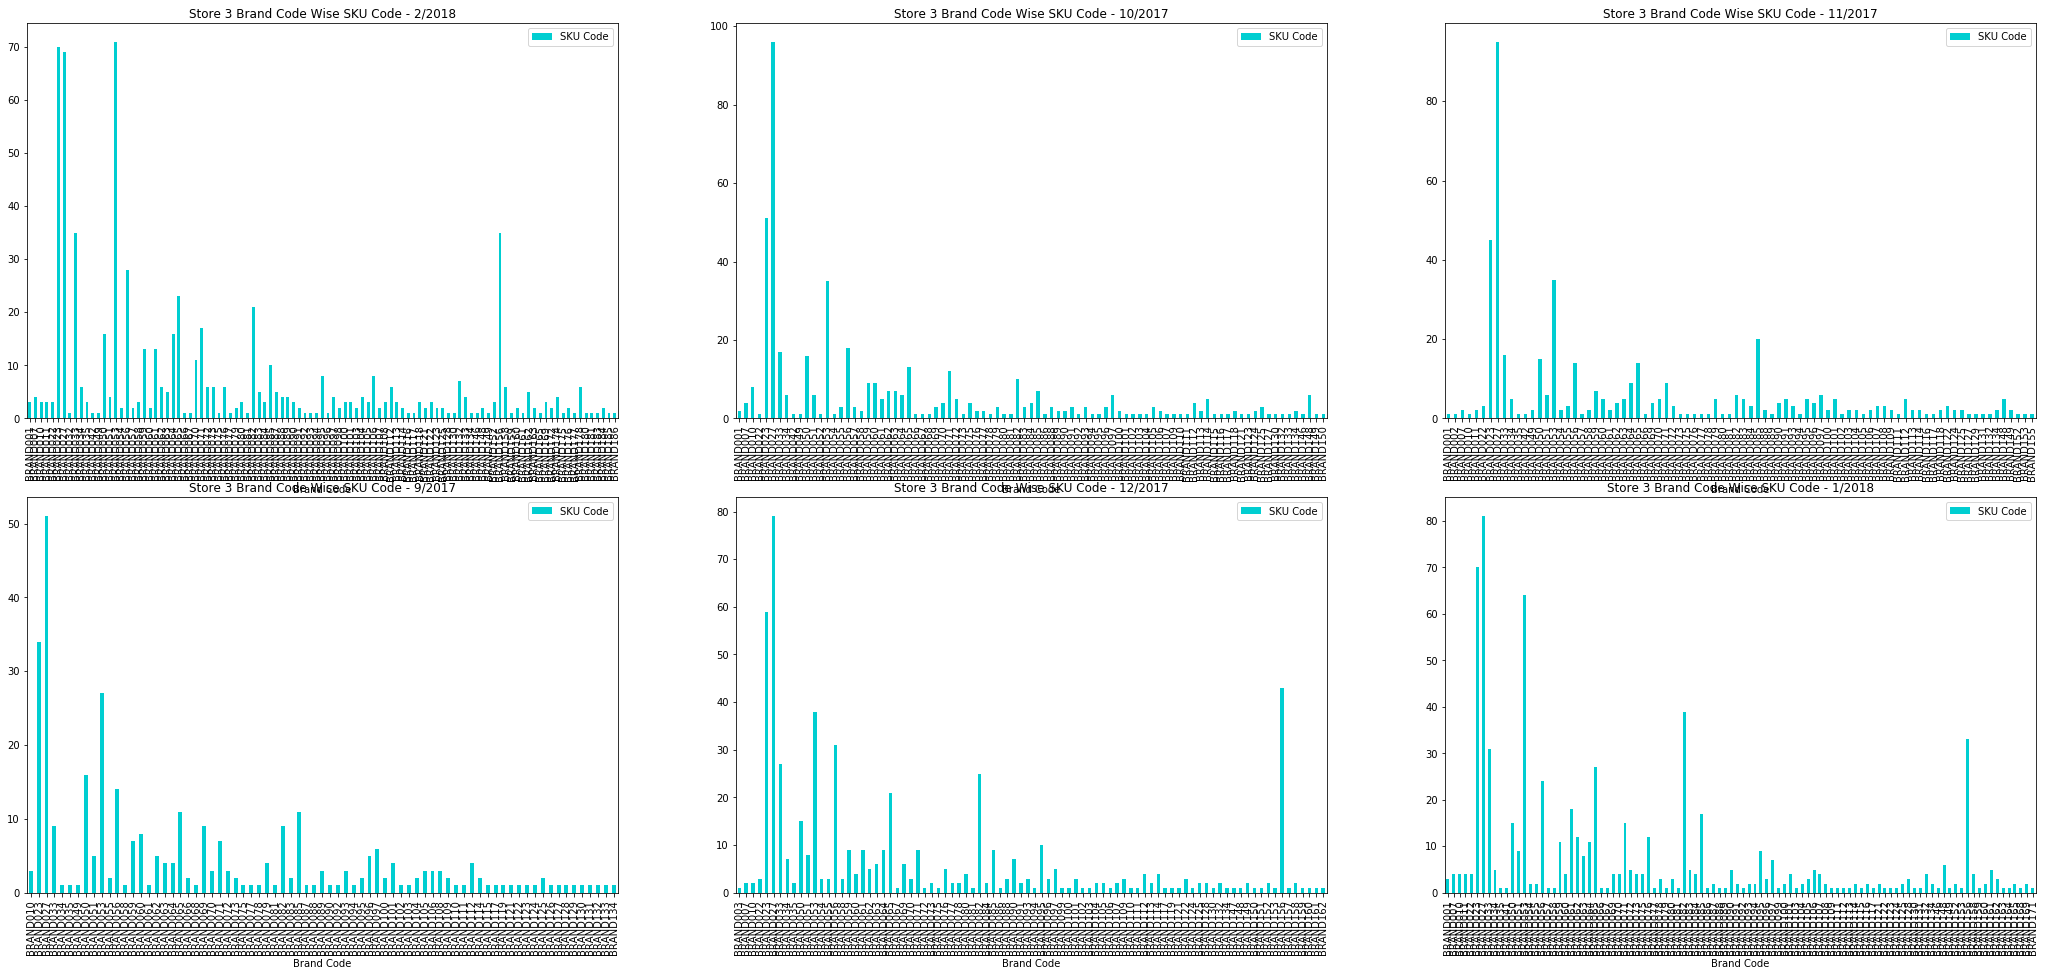

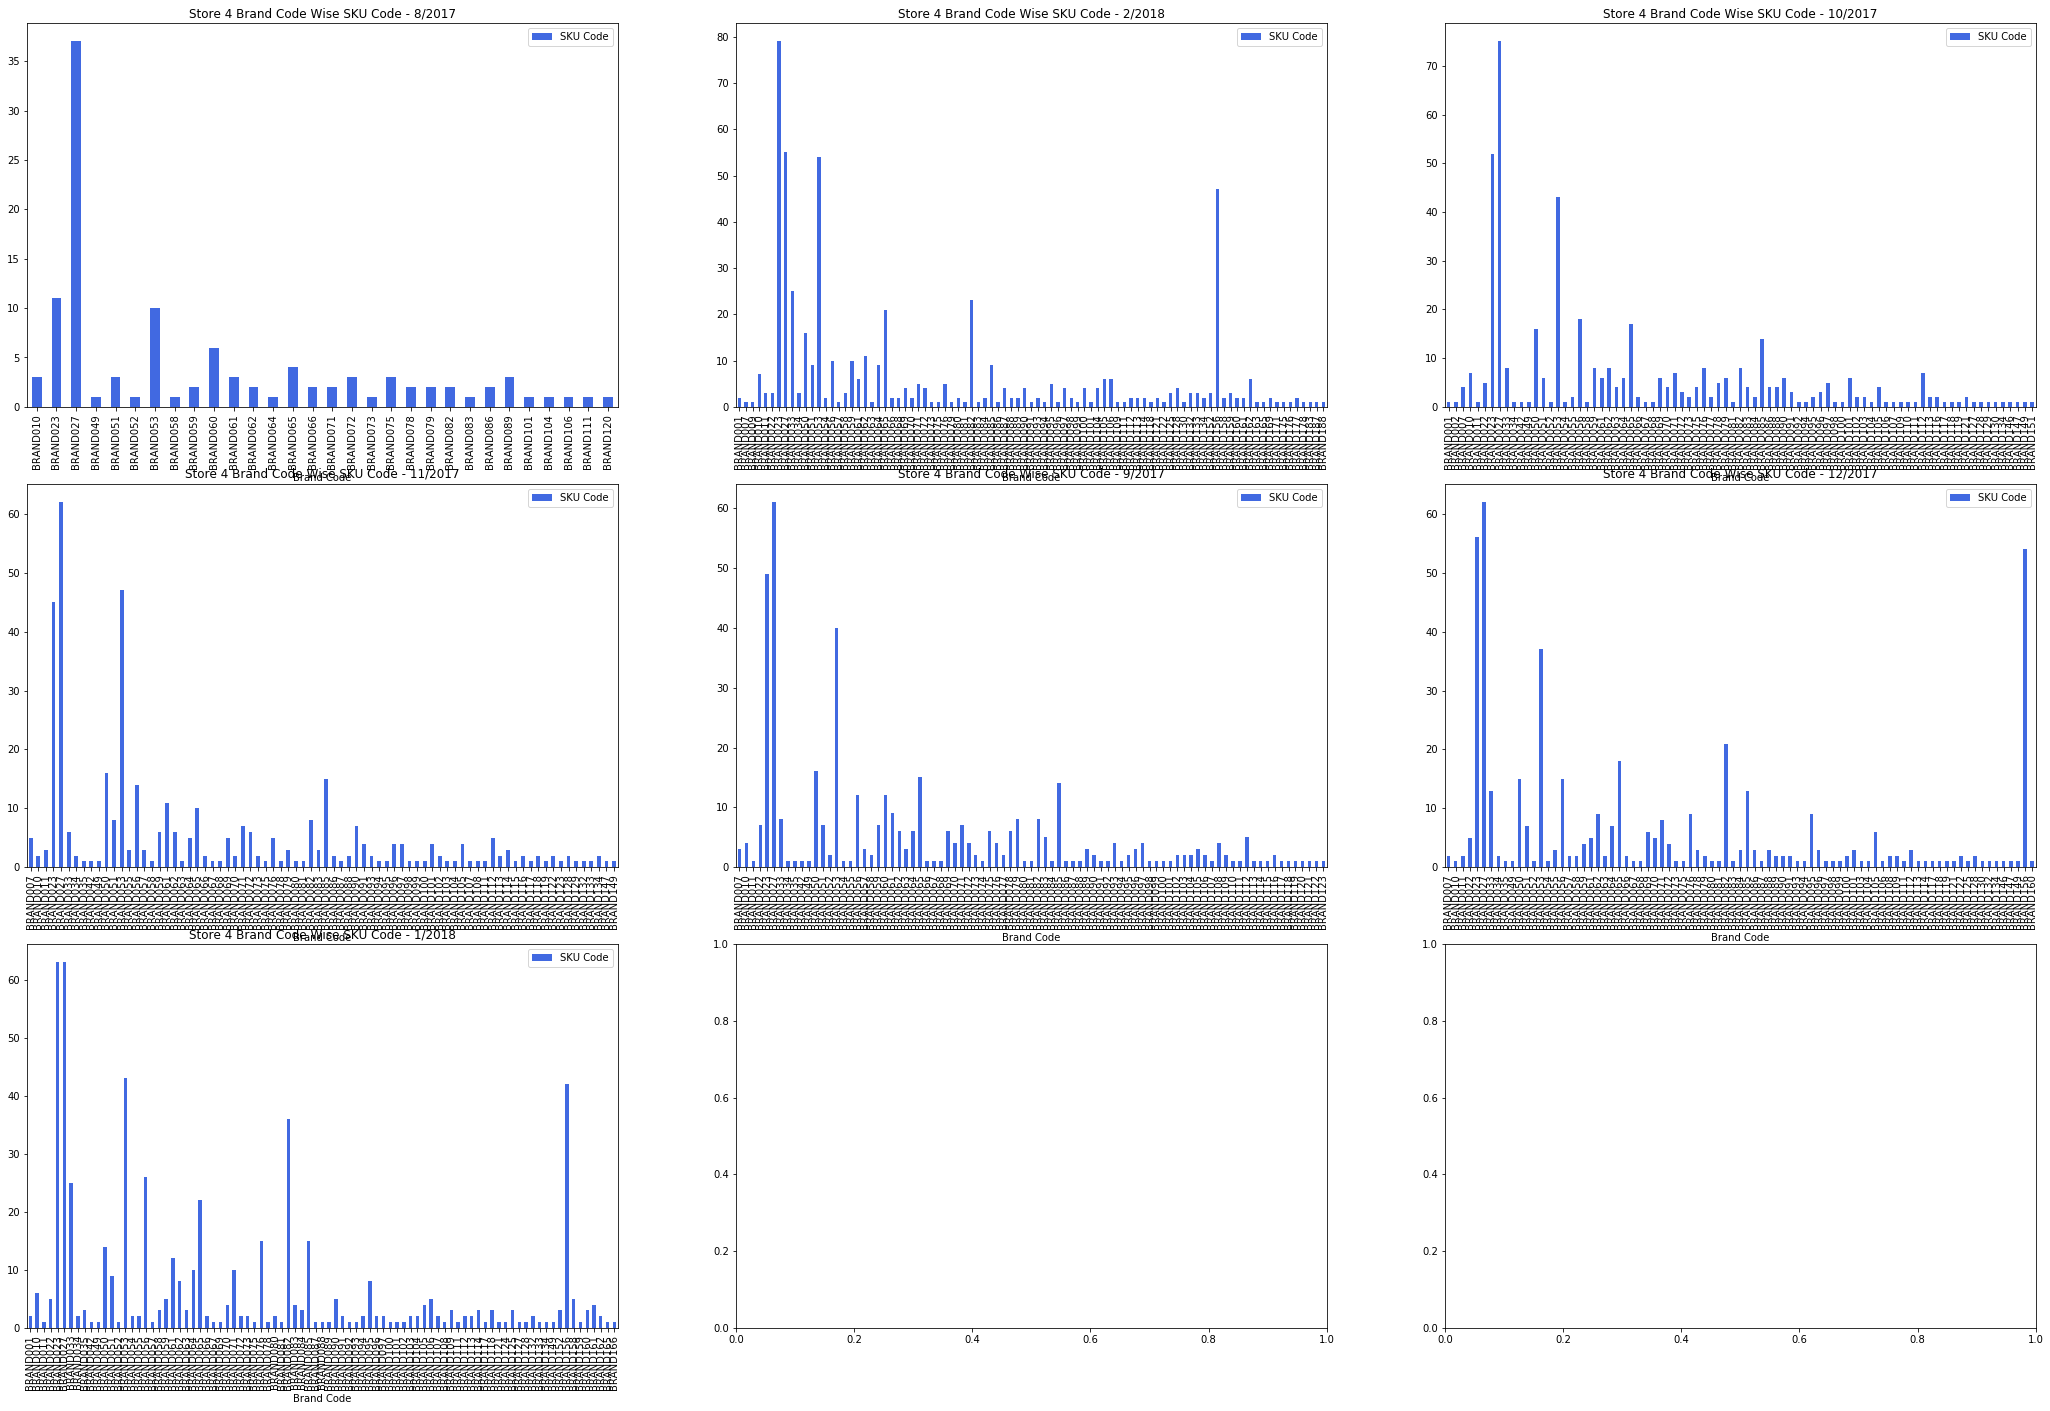

In [19]:
get_category_or_brand_wise_metrics_per_month_plots(data['sku_metrics_deep'], plot_kind='Brand Code', df_kind='SKU Code')